# Problem Statement
Kowope Mart is a Nigerian-based retail company with a vision to provide quality goods, education and automobile services to its customers at affordable price and reduce if not eradicate charges on card payments and increase customer satisfaction with credit rewards that can be used within the Mall. To achieve this, the company has partnered with DSBank on co-branded credit card with additional functionality such that customers can request for loan, pay for goods even with zero-balance and then pay back within an agreed period of time. This innovative strategy has increased sales for the company. However, there has been recent cases of credit defaults and Kowope Mart will like to have a system that profiles customers who are worthy of the card with minimum if not zero risk of defaulting.

# Objective
To predict customers who are likely to default or not.

# Dataset
The data is a structure dataset pull from the Kowope Mart’s database with few important features that can be used to predict defaulters in retail network. The data sample has been split into train and test with a volume of 56,000 and 24,000.

# Variables
Application_ID: Unique Customer Application Identification number
Risk Scoring features:

form_field1: Customer Creditworthiness score based on historical data
form_field2: A score that measures the number and riskiness of credit enquiries made by a borrower.
Severity features: Severity is a function of amount, time since default, and number of defaults

form_field3: Severity of default by the borrower on any loan(s).
form_field4: Severity of default by the borrower on auto loan(s).
form_field5: Severity of default by the borrower on education loan(s).
Credit features

form_field6: Minimum of credit available on all credit cards that is automatically renewed as debts are paid off on the customer’s cards (in NGN)
form_field7: Maximum of credit available on customer’s active credit lines (in NGN)
form_field8: Maximum of credit available on all active credit cards that is automatically renewed as debts are paid off on the customer’s cards (in NGN)
form_field9: Sum of available credit on credit cards that the borrower has missed 1 payment (in NGN)
form_field10: Total amount of credit available on accepted credit lines (in NGN)
form_field11: The amount of dues collected post-default where the due amount was more than 500 (in NGN)
form_field12: Sum of the amount due on active credit cards (in NGN)
form_field13: Annual amount paid towards all credit cards during the previous year (in NGN)
form_field14: Annual income (in NGN)
form_field15: The estimated market value of a property owned/used by the borrower (in NGN)
Credit card features:

form_field16: Number of active credit card that is automatically renewed as debts are paid off on which full credit limit is utilized by the borrower
form_field17: Number of active credit cards on which full credit limit is utilized by the borrower
form_field18: Number of active credit lines on which full credit limit is utilized by the borrower
form_field19: Number of active credit cards on which at least 75% credit limit is utilized by the borrower
form_field20: Number of active credit lines on which at least 75% credit limit is utilized by the borrower
form_field21: Average utilization of active revolving credit card loans (%)
form_field22: Average utilization of line on all active credit lines activated in last 2 years (%)
form_field23: Average utilization of line on all active credit cards activated in last 1 year (%)
form_field24: Average utilization of line on credit cards on which the borrower has missed 1 payment during the last 6 months (%)
form_field25: Average tenure of active revolving credit cards (in days)
form_field26: Tenure of oldest credit card among all active credit cards (in days)
form_field27: Tenure of oldest revolving credit card among all active revolving credit cards (in days)
Time-related features

form_field28: Number of days since last missed payment on any credit line
form_field29: Tenure of the oldest credit line (in days)
form_field30: Maximum tenure on all auto loans (in days)
form_field31: Maximum tenure on all education loans (in days)
form_field32: Sum of tenures (in months) of active credit cards
form_field33: Sum of tenures (in months) of active credit cards
form_field34: Number of active credit lines over the last 6 months on which the borrower has missed 1 payment
form_field35: Number of revolving credit cards over the last 2 years on which the borrower has missed 1 payment
form_field36: Number of active credit lines
form_field37: Number of credit cards with an active tenure of at least 2 years
form_field38: Number of credit lines activated in the last 2 years
form_field39: Number of credit lines on which the borrower has current delinquency
Percentage related features

form_field40: Utilization of line on active education loans (%)
form_field41: Utilization of line on active auto loans (%)
Other features

form_field42: Financial stress index of the borrower. This index is a function of collection trades, bankruptcies files, tax liens invoked, etc.
form_field43: Number of credit lines on which the borrower has never missed a payment in the last 2 years, yet considered as high-risk loans based on the market prediction of the economic scenario
form_field44: Ratio of the maximum amount due on all active credit lines and the sum of amounts due on all active credit lines
form_field45: Number of mortgage loans on which the borrower has missed 2 payments
form_field46: Number of auto loans on which the borrower has missed 2 payments
form_field47: Type of product that the applicant applied for. (C = Charge; L = Lending)
form_field48: Undefined Variable
form_field49: Undefined Variable
form_field50: Ratio of the minimum amount due on all active credit lines and the sum of amounts due on all active credit lines

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import lightgbm as lgb
import catboost as cat_B
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, plot_confusion_matrix, plot_roc_curve, roc_auc_score, auc, classification_report
import random

# Function Definition

In [2]:
class function() :   
    
    """
    Description : Model
    """
    
    def __init__(self, train, label, test, model, model_type, random_state):
        self.train, self.label, self.test = train, label, test
        self.model, self.model_type = model, model_type
        self.random_state = random_state
        
        assert self.model_type in ('catboost', 'xgboost', 'lgbm'), 'Model_type incorrect'
    def __call__(self, plot = True):
        return self.fit(plot)

    def fit(self, plot):
        def catboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train,y_train,eval_set=[(X_test,y_test)])
            x_test_predict = self.model.predict_proba(X_test)[:,1]
            x_train_predict = self.model.predict_proba(X_train)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test)[:,1]
            return x_test_predict, x_train_predict

        def xgboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            x_train_predict = self.model.predict_proba(X_train, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            return x_test_predict, x_train_predict

        def lgbm_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, num_iteration = self.model.best_iteration_)[:,1]
            x_train_predict = self.model.predict_proba(X_train, num_iteration = self.model.best_iteration_)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, num_iteration = self.model.best_iteration_)[:,1]
            return x_test_predict, x_train_predict


        self.val_p = np.zeros(self.train.shape[0])
        mean_val = []
        mean_train = []
        self.test_p = np.zeros(self.test.shape[0])
        splits = 5
        kf = StratifiedKFold(n_splits = splits)
        for fold_count, (train_index, test_index) in enumerate(kf.split(self.train, self.label)):
            X_train,X_test = self.train.iloc[train_index],self.train.iloc[test_index]
            y_train,y_test = self.label.iloc[train_index],self.label.iloc[test_index]

            print(f"================================Fold{fold_count+1}====================================")
            if self.model_type == 'catboost': x_test_predict, x_train_predict = catboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'xgboost': x_test_predict, x_train_predict = xgboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'lgbm': x_test_predict, x_train_predict = lgbm_fit(X_train, X_test, y_train, y_test)

            print('\nValidation scores', roc_auc_score(y_test, x_test_predict), log_loss(y_test, x_test_predict))
            print('Training scores', roc_auc_score(y_train, x_train_predict), log_loss(y_train, x_train_predict))
            mean_val.append(roc_auc_score(y_test, x_test_predict))
            mean_train.append(roc_auc_score(y_train, x_train_predict))

        if plot:
            feat_imp = pd.DataFrame(sorted(zip(self.model.feature_importances_,self.train.columns)), columns=['Value','Feature'])
            plt.figure(figsize=(30,25))
            sns.barplot(x="Value", y="Feature", data=feat_imp.sort_values(by="Value", ascending=False))
            plt.ylabel('Feature Importance Score')
            plt.show()
        print(np.mean(mean_val), np.mean(mean_train), np.std(mean_val))
        return self.val_p, self.test_p/splits, self.model

# Loading files

In [3]:
filepath = "../kowope market"
train  = pd.read_csv(filepath+'/Train.csv')
test = pd.read_csv(filepath+'/Test.csv')
len_train = len(train)

In [4]:
train.head()

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0  Apcnt_1000000       3436.0      0.28505       1.6560          0.0   
1  Apcnt_1000004       3456.0      0.67400       0.2342          0.0   
2  Apcnt_1000008       3276.0      0.53845       3.1510          0.0   
3  Apcnt_1000012       3372.0      0.17005       0.5050          0.0   
4  Apcnt_1000016       3370.0      0.77270       1.1010          0.0   

   form_field5  form_field6  form_field7  form_field8  form_field9  ...  \
0        0.000          0.0   10689720.0     252072.0    4272776.0  ...   
1        0.000          0.0     898979.0     497531.0    9073814.0  ...   
2        6.282          NaN     956940.0          NaN     192944.0  ...   
3        0.000     192166.0    3044703.0     385499.0    3986472.0  ...   
4        0.000       1556.0     214728.0     214728.0    1284089.0  ...   

   form_field42  form_field43  form_field44  form_field45  form_field46  \
0      0.392854          2.02      0.711632           0.0           0.0   
1      0.314281          8.08      0.183584           NaN           0.0   
2      0.162965         18.18      0.791136           0.0           0.0   
3      0.488884          2.02      0.685168           NaN           0.0   
4      0.275000         12.12      0.438168           0.0           0.0   

   form_field47  form_field48  form_field49  form_field50  default_status  
0        charge           NaN      1.129518      0.044335              no  
1        charge    349.805730      1.620483      0.322436              no  
2        charge           NaN      1.513370      0.011640             yes  
3        charge     89.940100      0.664452      0.082729              no  
4        charge     97.887502      1.427891      0.045630              no  

[5 rows x 52 columns]

In [5]:
test.head()

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0  Apcnt_1000032       3236.0      0.34875      10.2006       0.0000   
1  Apcnt_1000048       3284.0      1.27360       2.9606       9.0198   
2  Apcnt_1000052          NaN      0.27505       0.0600       0.0000   
3  Apcnt_1000076       3232.0      0.28505       2.8032       0.0000   
4  Apcnt_1000080       3466.0      2.09545       0.8318       2.5182   

   form_field5  form_field6  form_field7  form_field8  form_field9  ...  \
0          0.0     418564.0     418564.0     418564.0     540710.0  ...   
1          0.0          0.0    9858816.0      49014.0    1510098.0  ...   
2          0.0          NaN          NaN          NaN          NaN  ...   
3          0.0          0.0     473802.0     473802.0    1724437.0  ...   
4          0.0      19839.0    1150662.0    1150662.0    7860523.0  ...   

   form_field41  form_field42  form_field43  form_field44  form_field45  \
0           NaN      0.825000          1.01      0.800000           NaN   
1       18.8415      0.507694          4.04      0.623248           1.0   
2           NaN           NaN          0.00           NaN           NaN   
3           NaN      0.916663          2.02      0.464224           NaN   
4           NaN      0.234047         23.23      0.726688           0.0   

   form_field46  form_field47  form_field48  form_field49  form_field50  
0           0.0        charge           NaN      0.000000      0.011221  
1           0.0       lending           NaN      0.504974      0.043525  
2           NaN        charge           NaN      0.000000           NaN  
3           NaN        charge     90.163742      0.788809      0.104029  
4           0.0       lending   1303.587148      1.637733      0.163124  

[5 rows x 51 columns]

In [6]:
all_df = pd.concat([train,test], sort = False, ignore_index=True)
all_df.head()

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0  Apcnt_1000000       3436.0      0.28505       1.6560          0.0   
1  Apcnt_1000004       3456.0      0.67400       0.2342          0.0   
2  Apcnt_1000008       3276.0      0.53845       3.1510          0.0   
3  Apcnt_1000012       3372.0      0.17005       0.5050          0.0   
4  Apcnt_1000016       3370.0      0.77270       1.1010          0.0   

   form_field5  form_field6  form_field7  form_field8  form_field9  ...  \
0        0.000          0.0   10689720.0     252072.0    4272776.0  ...   
1        0.000          0.0     898979.0     497531.0    9073814.0  ...   
2        6.282          NaN     956940.0          NaN     192944.0  ...   
3        0.000     192166.0    3044703.0     385499.0    3986472.0  ...   
4        0.000       1556.0     214728.0     214728.0    1284089.0  ...   

   form_field42  form_field43  form_field44  form_field45  form_field46  \
0      0.392854          2.02      0.711632           0.0           0.0   
1      0.314281          8.08      0.183584           NaN           0.0   
2      0.162965         18.18      0.791136           0.0           0.0   
3      0.488884          2.02      0.685168           NaN           0.0   
4      0.275000         12.12      0.438168           0.0           0.0   

   form_field47  form_field48  form_field49  form_field50  default_status  
0        charge           NaN      1.129518      0.044335              no  
1        charge    349.805730      1.620483      0.322436              no  
2        charge           NaN      1.513370      0.011640             yes  
3        charge     89.940100      0.664452      0.082729              no  
4        charge     97.887502      1.427891      0.045630              no  

[5 rows x 52 columns]

In [7]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    80000 non-null  object 
 1   form_field1     76361 non-null  float64
 2   form_field2     74447 non-null  float64
 3   form_field3     79499 non-null  float64
 4   form_field4     79499 non-null  float64
 5   form_field5     79499 non-null  float64
 6   form_field6     61036 non-null  float64
 7   form_field7     72606 non-null  float64
 8   form_field8     61036 non-null  float64
 9   form_field9     68592 non-null  float64
 10  form_field10    79498 non-null  float64
 11  form_field11    35181 non-null  float64
 12  form_field12    65922 non-null  float64
 13  form_field13    71648 non-null  float64
 14  form_field14    80000 non-null  int64  
 15  form_field15    47933 non-null  float64
 16  form_field16    61490 non-null  float64
 17  form_field17    64154 non-null 

In [8]:
all_df[['form_field47', 'default_status']].sample(5)

form_field47 default_status
15361       charge             no
26172       charge             no
8709       lending             no
67625       charge            NaN
48276      lending             no

# preprocessing data

In [9]:
all_df[['form_field47', 'default_status']] = all_df[['form_field47', 'default_status']].astype('category')
all_df['form_field47'] = all_df['form_field47'].cat.codes
all_df['default_status'] = all_df['default_status'].cat.codes

In [10]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    80000 non-null  object 
 1   form_field1     76361 non-null  float64
 2   form_field2     74447 non-null  float64
 3   form_field3     79499 non-null  float64
 4   form_field4     79499 non-null  float64
 5   form_field5     79499 non-null  float64
 6   form_field6     61036 non-null  float64
 7   form_field7     72606 non-null  float64
 8   form_field8     61036 non-null  float64
 9   form_field9     68592 non-null  float64
 10  form_field10    79498 non-null  float64
 11  form_field11    35181 non-null  float64
 12  form_field12    65922 non-null  float64
 13  form_field13    71648 non-null  float64
 14  form_field14    80000 non-null  int64  
 15  form_field15    47933 non-null  float64
 16  form_field16    61490 non-null  float64
 17  form_field17    64154 non-null 

In [11]:
all_df[['form_field47', 'default_status']].sample(5)

form_field47  default_status
27673             1               0
69877             0              -1
30179             0               0
28171             0               1
60734             1              -1

# Filling Missing Values

In [12]:
test_id = test.Applicant_ID
all_df.fillna(-999999,inplace=True, axis=1)
all_df.drop('Applicant_ID', inplace=True, axis=1)

In [13]:
target = all_df.pop('default_status')

In [14]:
X = all_df.iloc[:len_train].copy()
test_df = all_df.iloc[len_train:].copy()
y = target[:len_train]

In [15]:
print(len(X),len(y) ,len( test_df))

56000 56000 24000


# Model Building

================================Fold1====================================
0:	test: 0.7845042	best: 0.7845042 (0)	total: 910ms	remaining: 2h 31m 37s
1:	test: 0.8038891	best: 0.8038891 (1)	total: 998ms	remaining: 1h 23m 8s
2:	test: 0.8096772	best: 0.8096772 (2)	total: 1.05s	remaining: 58m 24s
3:	test: 0.8118957	best: 0.8118957 (3)	total: 1.11s	remaining: 46m 16s
4:	test: 0.8127514	best: 0.8127514 (4)	total: 1.17s	remaining: 38m 57s
5:	test: 0.8126325	best: 0.8127514 (4)	total: 1.22s	remaining: 33m 55s
6:	test: 0.8130283	best: 0.8130283 (6)	total: 1.27s	remaining: 30m 20s
7:	test: 0.8140911	best: 0.8140911 (7)	total: 1.33s	remaining: 27m 44s
8:	test: 0.8159405	best: 0.8159405 (8)	total: 1.4s	remaining: 25m 53s
9:	test: 0.8164020	best: 0.8164020 (9)	total: 1.46s	remaining: 24m 16s
10:	test: 0.8171002	best: 0.8171002 (10)	total: 1.51s	remaining: 22m 54s
11:	test: 0.8177278	best: 0.8177278 (11)	total: 1.57s	remaining: 21m 46s
12:	test: 0.8178281	best: 0.8178281 (12)	total: 1.63s	remaining: 2

112:	test: 0.8309213	best: 0.8309213 (112)	total: 7.08s	remaining: 10m 19s
113:	test: 0.8309484	best: 0.8309484 (113)	total: 7.13s	remaining: 10m 18s
114:	test: 0.8309742	best: 0.8309742 (114)	total: 7.18s	remaining: 10m 17s
115:	test: 0.8309579	best: 0.8309742 (114)	total: 7.23s	remaining: 10m 16s
116:	test: 0.8310100	best: 0.8310100 (116)	total: 7.29s	remaining: 10m 15s
117:	test: 0.8310800	best: 0.8310800 (117)	total: 7.34s	remaining: 10m 14s
118:	test: 0.8311113	best: 0.8311113 (118)	total: 7.4s	remaining: 10m 14s
119:	test: 0.8311451	best: 0.8311451 (119)	total: 7.45s	remaining: 10m 13s
120:	test: 0.8311805	best: 0.8311805 (120)	total: 7.5s	remaining: 10m 12s
121:	test: 0.8312603	best: 0.8312603 (121)	total: 7.55s	remaining: 10m 11s
122:	test: 0.8312522	best: 0.8312603 (121)	total: 7.6s	remaining: 10m 10s
123:	test: 0.8312736	best: 0.8312736 (123)	total: 7.65s	remaining: 10m 9s
124:	test: 0.8313246	best: 0.8313246 (124)	total: 7.71s	remaining: 10m 8s
125:	test: 0.8313780	best: 0.8

224:	test: 0.8347087	best: 0.8347087 (224)	total: 12.8s	remaining: 9m 18s
225:	test: 0.8347257	best: 0.8347257 (225)	total: 12.9s	remaining: 9m 17s
226:	test: 0.8347454	best: 0.8347454 (226)	total: 12.9s	remaining: 9m 17s
227:	test: 0.8347459	best: 0.8347459 (227)	total: 13s	remaining: 9m 17s
228:	test: 0.8347640	best: 0.8347640 (228)	total: 13.1s	remaining: 9m 16s
229:	test: 0.8347694	best: 0.8347694 (229)	total: 13.1s	remaining: 9m 16s
230:	test: 0.8348024	best: 0.8348024 (230)	total: 13.2s	remaining: 9m 16s
231:	test: 0.8348376	best: 0.8348376 (231)	total: 13.2s	remaining: 9m 16s
232:	test: 0.8348464	best: 0.8348464 (232)	total: 13.3s	remaining: 9m 15s
233:	test: 0.8348585	best: 0.8348585 (233)	total: 13.3s	remaining: 9m 15s
234:	test: 0.8348694	best: 0.8348694 (234)	total: 13.4s	remaining: 9m 15s
235:	test: 0.8348902	best: 0.8348902 (235)	total: 13.4s	remaining: 9m 15s
236:	test: 0.8349164	best: 0.8349164 (236)	total: 13.5s	remaining: 9m 14s
237:	test: 0.8349243	best: 0.8349243 (23

337:	test: 0.8365311	best: 0.8365311 (337)	total: 19.3s	remaining: 9m 11s
338:	test: 0.8365647	best: 0.8365647 (338)	total: 19.3s	remaining: 9m 11s
339:	test: 0.8366040	best: 0.8366040 (339)	total: 19.4s	remaining: 9m 11s
340:	test: 0.8366075	best: 0.8366075 (340)	total: 19.4s	remaining: 9m 10s
341:	test: 0.8366085	best: 0.8366085 (341)	total: 19.5s	remaining: 9m 10s
342:	test: 0.8366202	best: 0.8366202 (342)	total: 19.5s	remaining: 9m 10s
343:	test: 0.8366400	best: 0.8366400 (343)	total: 19.6s	remaining: 9m 10s
344:	test: 0.8366581	best: 0.8366581 (344)	total: 19.7s	remaining: 9m 10s
345:	test: 0.8366830	best: 0.8366830 (345)	total: 19.7s	remaining: 9m 9s
346:	test: 0.8366948	best: 0.8366948 (346)	total: 19.8s	remaining: 9m 9s
347:	test: 0.8367099	best: 0.8367099 (347)	total: 19.8s	remaining: 9m 9s
348:	test: 0.8367189	best: 0.8367189 (348)	total: 19.9s	remaining: 9m 9s
349:	test: 0.8367216	best: 0.8367216 (349)	total: 19.9s	remaining: 9m 8s
350:	test: 0.8367280	best: 0.8367280 (350)	

451:	test: 0.8375340	best: 0.8375399 (445)	total: 25s	remaining: 8m 48s
452:	test: 0.8375403	best: 0.8375403 (452)	total: 25.1s	remaining: 8m 48s
453:	test: 0.8375376	best: 0.8375403 (452)	total: 25.1s	remaining: 8m 47s
454:	test: 0.8375387	best: 0.8375403 (452)	total: 25.1s	remaining: 8m 47s
455:	test: 0.8375609	best: 0.8375609 (455)	total: 25.2s	remaining: 8m 47s
456:	test: 0.8375627	best: 0.8375627 (456)	total: 25.2s	remaining: 8m 47s
457:	test: 0.8375612	best: 0.8375627 (456)	total: 25.3s	remaining: 8m 46s
458:	test: 0.8375624	best: 0.8375627 (456)	total: 25.3s	remaining: 8m 46s
459:	test: 0.8375820	best: 0.8375820 (459)	total: 25.4s	remaining: 8m 46s
460:	test: 0.8376141	best: 0.8376141 (460)	total: 25.4s	remaining: 8m 46s
461:	test: 0.8376148	best: 0.8376148 (461)	total: 25.5s	remaining: 8m 46s
462:	test: 0.8376163	best: 0.8376163 (462)	total: 25.5s	remaining: 8m 46s
463:	test: 0.8376180	best: 0.8376180 (463)	total: 25.6s	remaining: 8m 46s
464:	test: 0.8376223	best: 0.8376223 (46

566:	test: 0.8378199	best: 0.8378454 (564)	total: 30.8s	remaining: 8m 31s
567:	test: 0.8378167	best: 0.8378454 (564)	total: 30.8s	remaining: 8m 31s
568:	test: 0.8378091	best: 0.8378454 (564)	total: 30.9s	remaining: 8m 31s
569:	test: 0.8378074	best: 0.8378454 (564)	total: 30.9s	remaining: 8m 31s
570:	test: 0.8378088	best: 0.8378454 (564)	total: 31s	remaining: 8m 31s
571:	test: 0.8378068	best: 0.8378454 (564)	total: 31s	remaining: 8m 31s
572:	test: 0.8378079	best: 0.8378454 (564)	total: 31.1s	remaining: 8m 30s
573:	test: 0.8378102	best: 0.8378454 (564)	total: 31.1s	remaining: 8m 31s
574:	test: 0.8378149	best: 0.8378454 (564)	total: 31.2s	remaining: 8m 31s
575:	test: 0.8378138	best: 0.8378454 (564)	total: 31.3s	remaining: 8m 31s
576:	test: 0.8378319	best: 0.8378454 (564)	total: 31.4s	remaining: 8m 31s
577:	test: 0.8378326	best: 0.8378454 (564)	total: 31.4s	remaining: 8m 32s
578:	test: 0.8378327	best: 0.8378454 (564)	total: 31.5s	remaining: 8m 32s
579:	test: 0.8378232	best: 0.8378454 (564)

678:	test: 0.8380589	best: 0.8380935 (666)	total: 36.9s	remaining: 8m 26s
679:	test: 0.8380611	best: 0.8380935 (666)	total: 36.9s	remaining: 8m 26s
680:	test: 0.8380766	best: 0.8380935 (666)	total: 37s	remaining: 8m 26s
681:	test: 0.8380773	best: 0.8380935 (666)	total: 37s	remaining: 8m 25s
682:	test: 0.8380861	best: 0.8380935 (666)	total: 37.1s	remaining: 8m 25s
683:	test: 0.8380862	best: 0.8380935 (666)	total: 37.1s	remaining: 8m 25s
684:	test: 0.8380867	best: 0.8380935 (666)	total: 37.2s	remaining: 8m 25s
685:	test: 0.8380966	best: 0.8380966 (685)	total: 37.2s	remaining: 8m 25s
686:	test: 0.8380980	best: 0.8380980 (686)	total: 37.3s	remaining: 8m 25s
687:	test: 0.8380937	best: 0.8380980 (686)	total: 37.3s	remaining: 8m 25s
688:	test: 0.8380942	best: 0.8380980 (686)	total: 37.4s	remaining: 8m 24s
689:	test: 0.8380901	best: 0.8380980 (686)	total: 37.4s	remaining: 8m 24s
690:	test: 0.8380902	best: 0.8380980 (686)	total: 37.5s	remaining: 8m 24s
691:	test: 0.8380917	best: 0.8380980 (686)

790:	test: 0.8381794	best: 0.8381872 (784)	total: 42.3s	remaining: 8m 12s
791:	test: 0.8381893	best: 0.8381893 (791)	total: 42.4s	remaining: 8m 12s
792:	test: 0.8381890	best: 0.8381893 (791)	total: 42.4s	remaining: 8m 12s
793:	test: 0.8381888	best: 0.8381893 (791)	total: 42.5s	remaining: 8m 12s
794:	test: 0.8381885	best: 0.8381893 (791)	total: 42.5s	remaining: 8m 12s
795:	test: 0.8381883	best: 0.8381893 (791)	total: 42.6s	remaining: 8m 12s
796:	test: 0.8381927	best: 0.8381927 (796)	total: 42.6s	remaining: 8m 11s
797:	test: 0.8381923	best: 0.8381927 (796)	total: 42.7s	remaining: 8m 11s
798:	test: 0.8381922	best: 0.8381927 (796)	total: 42.7s	remaining: 8m 11s
799:	test: 0.8381909	best: 0.8381927 (796)	total: 42.8s	remaining: 8m 11s
800:	test: 0.8381894	best: 0.8381927 (796)	total: 42.8s	remaining: 8m 11s
801:	test: 0.8381893	best: 0.8381927 (796)	total: 42.8s	remaining: 8m 11s
802:	test: 0.8381871	best: 0.8381927 (796)	total: 42.9s	remaining: 8m 11s
803:	test: 0.8381868	best: 0.8381927 (

904:	test: 0.8382725	best: 0.8382747 (899)	total: 48.1s	remaining: 8m 3s
905:	test: 0.8382722	best: 0.8382747 (899)	total: 48.2s	remaining: 8m 4s
906:	test: 0.8382747	best: 0.8382747 (899)	total: 48.3s	remaining: 8m 4s
907:	test: 0.8382746	best: 0.8382747 (899)	total: 48.4s	remaining: 8m 4s
908:	test: 0.8382749	best: 0.8382749 (908)	total: 48.4s	remaining: 8m 4s
909:	test: 0.8382746	best: 0.8382749 (908)	total: 48.5s	remaining: 8m 4s
910:	test: 0.8382732	best: 0.8382749 (908)	total: 48.5s	remaining: 8m 4s
911:	test: 0.8382735	best: 0.8382749 (908)	total: 48.6s	remaining: 8m 4s
912:	test: 0.8382734	best: 0.8382749 (908)	total: 48.6s	remaining: 8m 4s
913:	test: 0.8382692	best: 0.8382749 (908)	total: 48.7s	remaining: 8m 4s
914:	test: 0.8382692	best: 0.8382749 (908)	total: 48.7s	remaining: 8m 3s
915:	test: 0.8382697	best: 0.8382749 (908)	total: 48.8s	remaining: 8m 3s
916:	test: 0.8382703	best: 0.8382749 (908)	total: 48.8s	remaining: 8m 3s
917:	test: 0.8382695	best: 0.8382749 (908)	total: 4

1019:	test: 0.8383821	best: 0.8383848 (1017)	total: 53.8s	remaining: 7m 53s
1020:	test: 0.8383819	best: 0.8383848 (1017)	total: 53.8s	remaining: 7m 53s
1021:	test: 0.8383818	best: 0.8383848 (1017)	total: 53.9s	remaining: 7m 53s
1022:	test: 0.8383823	best: 0.8383848 (1017)	total: 53.9s	remaining: 7m 53s
1023:	test: 0.8383851	best: 0.8383851 (1023)	total: 54s	remaining: 7m 53s
1024:	test: 0.8383845	best: 0.8383851 (1023)	total: 54s	remaining: 7m 52s
1025:	test: 0.8383851	best: 0.8383851 (1023)	total: 54.1s	remaining: 7m 52s
1026:	test: 0.8383858	best: 0.8383858 (1026)	total: 54.1s	remaining: 7m 52s
1027:	test: 0.8383847	best: 0.8383858 (1026)	total: 54.2s	remaining: 7m 52s
1028:	test: 0.8383845	best: 0.8383858 (1026)	total: 54.2s	remaining: 7m 52s
1029:	test: 0.8383843	best: 0.8383858 (1026)	total: 54.2s	remaining: 7m 52s
1030:	test: 0.8383842	best: 0.8383858 (1026)	total: 54.3s	remaining: 7m 52s
1031:	test: 0.8383841	best: 0.8383858 (1026)	total: 54.3s	remaining: 7m 52s
1032:	test: 0.83

1128:	test: 0.8384511	best: 0.8384677 (1120)	total: 59.5s	remaining: 7m 47s
1129:	test: 0.8384470	best: 0.8384677 (1120)	total: 59.5s	remaining: 7m 47s
1130:	test: 0.8384467	best: 0.8384677 (1120)	total: 59.6s	remaining: 7m 47s
1131:	test: 0.8384554	best: 0.8384677 (1120)	total: 59.6s	remaining: 7m 47s
1132:	test: 0.8384669	best: 0.8384677 (1120)	total: 59.7s	remaining: 7m 46s
1133:	test: 0.8384669	best: 0.8384677 (1120)	total: 59.7s	remaining: 7m 46s
1134:	test: 0.8384673	best: 0.8384677 (1120)	total: 59.8s	remaining: 7m 46s
1135:	test: 0.8384650	best: 0.8384677 (1120)	total: 59.8s	remaining: 7m 46s
1136:	test: 0.8384775	best: 0.8384775 (1136)	total: 59.9s	remaining: 7m 46s
1137:	test: 0.8384773	best: 0.8384775 (1136)	total: 59.9s	remaining: 7m 46s
1138:	test: 0.8384776	best: 0.8384776 (1138)	total: 60s	remaining: 7m 46s
1139:	test: 0.8384900	best: 0.8384900 (1139)	total: 1m	remaining: 7m 46s
1140:	test: 0.8384900	best: 0.8384900 (1139)	total: 1m	remaining: 7m 46s
1141:	test: 0.838490

1239:	test: 0.8385399	best: 0.8385477 (1211)	total: 1m 5s	remaining: 7m 44s
1240:	test: 0.8385480	best: 0.8385480 (1240)	total: 1m 5s	remaining: 7m 44s
1241:	test: 0.8385478	best: 0.8385480 (1240)	total: 1m 5s	remaining: 7m 44s
1242:	test: 0.8385568	best: 0.8385568 (1242)	total: 1m 5s	remaining: 7m 44s
1243:	test: 0.8385564	best: 0.8385568 (1242)	total: 1m 5s	remaining: 7m 44s
1244:	test: 0.8385564	best: 0.8385568 (1242)	total: 1m 5s	remaining: 7m 43s
1245:	test: 0.8385558	best: 0.8385568 (1242)	total: 1m 6s	remaining: 7m 43s
1246:	test: 0.8385553	best: 0.8385568 (1242)	total: 1m 6s	remaining: 7m 43s
1247:	test: 0.8385558	best: 0.8385568 (1242)	total: 1m 6s	remaining: 7m 43s
1248:	test: 0.8385558	best: 0.8385568 (1242)	total: 1m 6s	remaining: 7m 43s
1249:	test: 0.8385560	best: 0.8385568 (1242)	total: 1m 6s	remaining: 7m 43s
1250:	test: 0.8385557	best: 0.8385568 (1242)	total: 1m 6s	remaining: 7m 43s
1251:	test: 0.8385730	best: 0.8385730 (1251)	total: 1m 6s	remaining: 7m 43s
1252:	test: 

1348:	test: 0.8385882	best: 0.8386088 (1272)	total: 1m 10s	remaining: 7m 35s
1349:	test: 0.8385880	best: 0.8386088 (1272)	total: 1m 11s	remaining: 7m 35s
1350:	test: 0.8385877	best: 0.8386088 (1272)	total: 1m 11s	remaining: 7m 34s
1351:	test: 0.8385873	best: 0.8386088 (1272)	total: 1m 11s	remaining: 7m 34s
1352:	test: 0.8385870	best: 0.8386088 (1272)	total: 1m 11s	remaining: 7m 34s
1353:	test: 0.8385867	best: 0.8386088 (1272)	total: 1m 11s	remaining: 7m 34s
1354:	test: 0.8385858	best: 0.8386088 (1272)	total: 1m 11s	remaining: 7m 34s
1355:	test: 0.8385857	best: 0.8386088 (1272)	total: 1m 11s	remaining: 7m 34s
1356:	test: 0.8385856	best: 0.8386088 (1272)	total: 1m 11s	remaining: 7m 34s
1357:	test: 0.8385850	best: 0.8386088 (1272)	total: 1m 11s	remaining: 7m 34s
1358:	test: 0.8385852	best: 0.8386088 (1272)	total: 1m 11s	remaining: 7m 34s
1359:	test: 0.8385852	best: 0.8386088 (1272)	total: 1m 11s	remaining: 7m 34s
1360:	test: 0.8385878	best: 0.8386088 (1272)	total: 1m 11s	remaining: 7m 34s

1459:	test: 0.8386881	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 25s
1460:	test: 0.8386877	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 25s
1461:	test: 0.8386879	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 25s
1462:	test: 0.8386882	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 25s
1463:	test: 0.8386884	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 25s
1464:	test: 0.8386942	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 25s
1465:	test: 0.8386877	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 25s
1466:	test: 0.8386877	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 25s
1467:	test: 0.8386856	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 25s
1468:	test: 0.8386855	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 25s
1469:	test: 0.8386859	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 24s
1470:	test: 0.8386812	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 24s
1471:	test: 0.8386820	best: 0.8386943 (1454)	total: 1m 16s	remaining: 7m 24s

1570:	test: 0.8386708	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 22s
1571:	test: 0.8386705	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 22s
1572:	test: 0.8386778	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 22s
1573:	test: 0.8386724	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 22s
1574:	test: 0.8386723	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 21s
1575:	test: 0.8386720	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 21s
1576:	test: 0.8386742	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 21s
1577:	test: 0.8386740	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 21s
1578:	test: 0.8386745	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 21s
1579:	test: 0.8386738	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 21s
1580:	test: 0.8386743	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 21s
1581:	test: 0.8386746	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 21s
1582:	test: 0.8386742	best: 0.8386943 (1454)	total: 1m 22s	remaining: 7m 21s

1679:	test: 0.8386786	best: 0.8387264 (1649)	total: 1m 27s	remaining: 7m 13s
1680:	test: 0.8386829	best: 0.8387264 (1649)	total: 1m 27s	remaining: 7m 13s
1681:	test: 0.8386833	best: 0.8387264 (1649)	total: 1m 27s	remaining: 7m 13s
1682:	test: 0.8386825	best: 0.8387264 (1649)	total: 1m 27s	remaining: 7m 13s
1683:	test: 0.8386824	best: 0.8387264 (1649)	total: 1m 27s	remaining: 7m 13s
1684:	test: 0.8386836	best: 0.8387264 (1649)	total: 1m 27s	remaining: 7m 13s
1685:	test: 0.8386836	best: 0.8387264 (1649)	total: 1m 27s	remaining: 7m 13s
1686:	test: 0.8386793	best: 0.8387264 (1649)	total: 1m 27s	remaining: 7m 13s
1687:	test: 0.8386790	best: 0.8387264 (1649)	total: 1m 28s	remaining: 7m 13s
1688:	test: 0.8386791	best: 0.8387264 (1649)	total: 1m 28s	remaining: 7m 13s
1689:	test: 0.8386791	best: 0.8387264 (1649)	total: 1m 28s	remaining: 7m 13s
1690:	test: 0.8386750	best: 0.8387264 (1649)	total: 1m 28s	remaining: 7m 13s
1691:	test: 0.8386780	best: 0.8387264 (1649)	total: 1m 28s	remaining: 7m 13s

1787:	test: 0.8386906	best: 0.8387264 (1649)	total: 1m 32s	remaining: 7m 5s
1788:	test: 0.8386849	best: 0.8387264 (1649)	total: 1m 32s	remaining: 7m 5s
1789:	test: 0.8386847	best: 0.8387264 (1649)	total: 1m 32s	remaining: 7m 5s
1790:	test: 0.8386857	best: 0.8387264 (1649)	total: 1m 32s	remaining: 7m 5s
1791:	test: 0.8386853	best: 0.8387264 (1649)	total: 1m 32s	remaining: 7m 5s
1792:	test: 0.8386854	best: 0.8387264 (1649)	total: 1m 32s	remaining: 7m 5s
1793:	test: 0.8386971	best: 0.8387264 (1649)	total: 1m 32s	remaining: 7m 5s
1794:	test: 0.8387047	best: 0.8387264 (1649)	total: 1m 33s	remaining: 7m 5s
1795:	test: 0.8386997	best: 0.8387264 (1649)	total: 1m 33s	remaining: 7m 5s
1796:	test: 0.8386996	best: 0.8387264 (1649)	total: 1m 33s	remaining: 7m 5s
1797:	test: 0.8386995	best: 0.8387264 (1649)	total: 1m 33s	remaining: 7m 5s
1798:	test: 0.8386995	best: 0.8387264 (1649)	total: 1m 33s	remaining: 7m 4s
1799:	test: 0.8386995	best: 0.8387264 (1649)	total: 1m 33s	remaining: 7m 4s
1800:	test: 

1896:	test: 0.8387192	best: 0.8387303 (1864)	total: 1m 39s	remaining: 7m 4s
1897:	test: 0.8387184	best: 0.8387303 (1864)	total: 1m 39s	remaining: 7m 4s
1898:	test: 0.8387225	best: 0.8387303 (1864)	total: 1m 39s	remaining: 7m 4s
1899:	test: 0.8387249	best: 0.8387303 (1864)	total: 1m 39s	remaining: 7m 4s
1900:	test: 0.8387248	best: 0.8387303 (1864)	total: 1m 39s	remaining: 7m 4s
1901:	test: 0.8387245	best: 0.8387303 (1864)	total: 1m 39s	remaining: 7m 4s
1902:	test: 0.8387316	best: 0.8387316 (1902)	total: 1m 39s	remaining: 7m 4s
1903:	test: 0.8387314	best: 0.8387316 (1902)	total: 1m 39s	remaining: 7m 4s
1904:	test: 0.8387417	best: 0.8387417 (1904)	total: 1m 39s	remaining: 7m 4s
1905:	test: 0.8387416	best: 0.8387417 (1904)	total: 1m 40s	remaining: 7m 4s
1906:	test: 0.8387500	best: 0.8387500 (1906)	total: 1m 40s	remaining: 7m 5s
1907:	test: 0.8387500	best: 0.8387500 (1906)	total: 1m 40s	remaining: 7m 5s
1908:	test: 0.8387546	best: 0.8387546 (1908)	total: 1m 40s	remaining: 7m 5s
1909:	test: 

2007:	test: 0.8387692	best: 0.8387829 (2003)	total: 1m 45s	remaining: 7m
2008:	test: 0.8387763	best: 0.8387829 (2003)	total: 1m 45s	remaining: 7m
2009:	test: 0.8387877	best: 0.8387877 (2009)	total: 1m 45s	remaining: 7m
2010:	test: 0.8387876	best: 0.8387877 (2009)	total: 1m 45s	remaining: 7m
2011:	test: 0.8387863	best: 0.8387877 (2009)	total: 1m 45s	remaining: 7m
2012:	test: 0.8387861	best: 0.8387877 (2009)	total: 1m 45s	remaining: 7m
2013:	test: 0.8387863	best: 0.8387877 (2009)	total: 1m 46s	remaining: 7m
2014:	test: 0.8387746	best: 0.8387877 (2009)	total: 1m 46s	remaining: 7m
2015:	test: 0.8387655	best: 0.8387877 (2009)	total: 1m 46s	remaining: 7m
2016:	test: 0.8387653	best: 0.8387877 (2009)	total: 1m 46s	remaining: 7m
2017:	test: 0.8387654	best: 0.8387877 (2009)	total: 1m 46s	remaining: 7m
2018:	test: 0.8387670	best: 0.8387877 (2009)	total: 1m 46s	remaining: 7m
2019:	test: 0.8387574	best: 0.8387877 (2009)	total: 1m 46s	remaining: 7m
2020:	test: 0.8387573	best: 0.8387877 (2009)	total:

2117:	test: 0.8388096	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 57s
2118:	test: 0.8388097	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 56s
2119:	test: 0.8388099	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 56s
2120:	test: 0.8388067	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 56s
2121:	test: 0.8388026	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 56s
2122:	test: 0.8388027	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 56s
2123:	test: 0.8388026	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 56s
2124:	test: 0.8388026	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 56s
2125:	test: 0.8388023	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 56s
2126:	test: 0.8388022	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 56s
2127:	test: 0.8388022	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 56s
2128:	test: 0.8388021	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 56s
2129:	test: 0.8388011	best: 0.8388129 (2113)	total: 1m 52s	remaining: 6m 56s

2224:	test: 0.8387828	best: 0.8388530 (2161)	total: 1m 57s	remaining: 6m 51s
2225:	test: 0.8387833	best: 0.8388530 (2161)	total: 1m 57s	remaining: 6m 51s
2226:	test: 0.8387830	best: 0.8388530 (2161)	total: 1m 57s	remaining: 6m 51s
2227:	test: 0.8387829	best: 0.8388530 (2161)	total: 1m 57s	remaining: 6m 50s
2228:	test: 0.8387830	best: 0.8388530 (2161)	total: 1m 57s	remaining: 6m 50s
2229:	test: 0.8387854	best: 0.8388530 (2161)	total: 1m 57s	remaining: 6m 50s
2230:	test: 0.8387791	best: 0.8388530 (2161)	total: 1m 58s	remaining: 6m 51s
2231:	test: 0.8387810	best: 0.8388530 (2161)	total: 1m 58s	remaining: 6m 51s
2232:	test: 0.8387784	best: 0.8388530 (2161)	total: 1m 58s	remaining: 6m 51s
2233:	test: 0.8387782	best: 0.8388530 (2161)	total: 1m 58s	remaining: 6m 51s
2234:	test: 0.8387769	best: 0.8388530 (2161)	total: 1m 58s	remaining: 6m 51s
2235:	test: 0.8387712	best: 0.8388530 (2161)	total: 1m 58s	remaining: 6m 51s
2236:	test: 0.8387712	best: 0.8388530 (2161)	total: 1m 58s	remaining: 6m 50s

2334:	test: 0.8388025	best: 0.8388530 (2161)	total: 2m 4s	remaining: 6m 48s
2335:	test: 0.8387935	best: 0.8388530 (2161)	total: 2m 4s	remaining: 6m 48s
2336:	test: 0.8387935	best: 0.8388530 (2161)	total: 2m 4s	remaining: 6m 48s
2337:	test: 0.8387916	best: 0.8388530 (2161)	total: 2m 4s	remaining: 6m 48s
2338:	test: 0.8387918	best: 0.8388530 (2161)	total: 2m 4s	remaining: 6m 48s
2339:	test: 0.8387895	best: 0.8388530 (2161)	total: 2m 4s	remaining: 6m 48s
2340:	test: 0.8387895	best: 0.8388530 (2161)	total: 2m 4s	remaining: 6m 48s
2341:	test: 0.8387889	best: 0.8388530 (2161)	total: 2m 4s	remaining: 6m 48s
2342:	test: 0.8387906	best: 0.8388530 (2161)	total: 2m 4s	remaining: 6m 48s
2343:	test: 0.8387857	best: 0.8388530 (2161)	total: 2m 5s	remaining: 6m 48s
2344:	test: 0.8387801	best: 0.8388530 (2161)	total: 2m 5s	remaining: 6m 48s
2345:	test: 0.8387802	best: 0.8388530 (2161)	total: 2m 5s	remaining: 6m 48s
2346:	test: 0.8387725	best: 0.8388530 (2161)	total: 2m 5s	remaining: 6m 48s
2347:	test: 

2444:	test: 0.8388364	best: 0.8388530 (2161)	total: 2m 11s	remaining: 6m 46s
2445:	test: 0.8388362	best: 0.8388530 (2161)	total: 2m 11s	remaining: 6m 46s
2446:	test: 0.8388360	best: 0.8388530 (2161)	total: 2m 11s	remaining: 6m 46s
2447:	test: 0.8388360	best: 0.8388530 (2161)	total: 2m 11s	remaining: 6m 46s
2448:	test: 0.8388359	best: 0.8388530 (2161)	total: 2m 11s	remaining: 6m 46s
2449:	test: 0.8388452	best: 0.8388530 (2161)	total: 2m 11s	remaining: 6m 46s
2450:	test: 0.8388447	best: 0.8388530 (2161)	total: 2m 11s	remaining: 6m 46s
2451:	test: 0.8388442	best: 0.8388530 (2161)	total: 2m 11s	remaining: 6m 46s
2452:	test: 0.8388560	best: 0.8388560 (2452)	total: 2m 11s	remaining: 6m 46s
2453:	test: 0.8388558	best: 0.8388560 (2452)	total: 2m 12s	remaining: 6m 46s
2454:	test: 0.8388560	best: 0.8388560 (2452)	total: 2m 12s	remaining: 6m 45s
2455:	test: 0.8388662	best: 0.8388662 (2455)	total: 2m 12s	remaining: 6m 45s
2456:	test: 0.8388685	best: 0.8388685 (2456)	total: 2m 12s	remaining: 6m 46s

2553:	test: 0.8388508	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 43s
2554:	test: 0.8388513	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 43s
2555:	test: 0.8388513	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 43s
2556:	test: 0.8388509	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 43s
2557:	test: 0.8388508	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 43s
2558:	test: 0.8388505	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 42s
2559:	test: 0.8388539	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 42s
2560:	test: 0.8388539	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 42s
2561:	test: 0.8388635	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 42s
2562:	test: 0.8388636	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 42s
2563:	test: 0.8388754	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 42s
2564:	test: 0.8388752	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 42s
2565:	test: 0.8388733	best: 0.8388823 (2530)	total: 2m 18s	remaining: 6m 42s

2661:	test: 0.8388870	best: 0.8388870 (2661)	total: 2m 25s	remaining: 6m 41s
2662:	test: 0.8388871	best: 0.8388871 (2662)	total: 2m 25s	remaining: 6m 40s
2663:	test: 0.8388872	best: 0.8388872 (2663)	total: 2m 25s	remaining: 6m 40s
2664:	test: 0.8388873	best: 0.8388873 (2664)	total: 2m 25s	remaining: 6m 40s
2665:	test: 0.8388877	best: 0.8388877 (2665)	total: 2m 25s	remaining: 6m 40s
2666:	test: 0.8388874	best: 0.8388877 (2665)	total: 2m 25s	remaining: 6m 40s
2667:	test: 0.8388874	best: 0.8388877 (2665)	total: 2m 25s	remaining: 6m 40s
2668:	test: 0.8388867	best: 0.8388877 (2665)	total: 2m 25s	remaining: 6m 40s
2669:	test: 0.8388866	best: 0.8388877 (2665)	total: 2m 25s	remaining: 6m 40s
2670:	test: 0.8388865	best: 0.8388877 (2665)	total: 2m 25s	remaining: 6m 40s
2671:	test: 0.8388825	best: 0.8388877 (2665)	total: 2m 26s	remaining: 6m 40s
2672:	test: 0.8388823	best: 0.8388877 (2665)	total: 2m 26s	remaining: 6m 40s
2673:	test: 0.8388892	best: 0.8388892 (2673)	total: 2m 26s	remaining: 6m 40s

2768:	test: 0.8389518	best: 0.8389589 (2754)	total: 2m 31s	remaining: 6m 35s
2769:	test: 0.8389519	best: 0.8389589 (2754)	total: 2m 31s	remaining: 6m 35s
2770:	test: 0.8389523	best: 0.8389589 (2754)	total: 2m 31s	remaining: 6m 35s
2771:	test: 0.8389523	best: 0.8389589 (2754)	total: 2m 31s	remaining: 6m 35s
2772:	test: 0.8389522	best: 0.8389589 (2754)	total: 2m 31s	remaining: 6m 35s
2773:	test: 0.8389651	best: 0.8389651 (2773)	total: 2m 31s	remaining: 6m 35s
2774:	test: 0.8389651	best: 0.8389651 (2774)	total: 2m 31s	remaining: 6m 35s
2775:	test: 0.8389594	best: 0.8389651 (2774)	total: 2m 31s	remaining: 6m 35s
2776:	test: 0.8389598	best: 0.8389651 (2774)	total: 2m 31s	remaining: 6m 35s
2777:	test: 0.8389597	best: 0.8389651 (2774)	total: 2m 32s	remaining: 6m 35s
2778:	test: 0.8389461	best: 0.8389651 (2774)	total: 2m 32s	remaining: 6m 35s
2779:	test: 0.8389461	best: 0.8389651 (2774)	total: 2m 32s	remaining: 6m 35s
2780:	test: 0.8389455	best: 0.8389651 (2774)	total: 2m 32s	remaining: 6m 35s

2877:	test: 0.8389035	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s
2878:	test: 0.8389035	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s
2879:	test: 0.8389036	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s
2880:	test: 0.8389018	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s
2881:	test: 0.8389044	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s
2882:	test: 0.8389241	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s
2883:	test: 0.8389223	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s
2884:	test: 0.8389320	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s
2885:	test: 0.8389325	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s
2886:	test: 0.8389325	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s
2887:	test: 0.8389332	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s
2888:	test: 0.8389332	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s
2889:	test: 0.8389349	best: 0.8389651 (2774)	total: 2m 39s	remaining: 6m 33s

2984:	test: 0.8389045	best: 0.8389651 (2774)	total: 2m 46s	remaining: 6m 31s
2985:	test: 0.8389041	best: 0.8389651 (2774)	total: 2m 46s	remaining: 6m 31s
2986:	test: 0.8389053	best: 0.8389651 (2774)	total: 2m 46s	remaining: 6m 31s
2987:	test: 0.8389051	best: 0.8389651 (2774)	total: 2m 46s	remaining: 6m 31s
2988:	test: 0.8389051	best: 0.8389651 (2774)	total: 2m 46s	remaining: 6m 31s
2989:	test: 0.8389050	best: 0.8389651 (2774)	total: 2m 46s	remaining: 6m 31s
2990:	test: 0.8389047	best: 0.8389651 (2774)	total: 2m 47s	remaining: 6m 31s
2991:	test: 0.8389044	best: 0.8389651 (2774)	total: 2m 47s	remaining: 6m 31s
2992:	test: 0.8389040	best: 0.8389651 (2774)	total: 2m 47s	remaining: 6m 31s
2993:	test: 0.8389232	best: 0.8389651 (2774)	total: 2m 47s	remaining: 6m 31s
2994:	test: 0.8389229	best: 0.8389651 (2774)	total: 2m 47s	remaining: 6m 31s
2995:	test: 0.8389236	best: 0.8389651 (2774)	total: 2m 47s	remaining: 6m 31s
2996:	test: 0.8389063	best: 0.8389651 (2774)	total: 2m 47s	remaining: 6m 31s

3093:	test: 0.8389127	best: 0.8389651 (2774)	total: 2m 55s	remaining: 6m 32s
3094:	test: 0.8389131	best: 0.8389651 (2774)	total: 2m 56s	remaining: 6m 32s
3095:	test: 0.8389127	best: 0.8389651 (2774)	total: 2m 56s	remaining: 6m 32s
3096:	test: 0.8389050	best: 0.8389651 (2774)	total: 2m 56s	remaining: 6m 32s
3097:	test: 0.8389053	best: 0.8389651 (2774)	total: 2m 56s	remaining: 6m 32s
3098:	test: 0.8389048	best: 0.8389651 (2774)	total: 2m 56s	remaining: 6m 32s
3099:	test: 0.8389028	best: 0.8389651 (2774)	total: 2m 56s	remaining: 6m 32s
3100:	test: 0.8388981	best: 0.8389651 (2774)	total: 2m 56s	remaining: 6m 32s
3101:	test: 0.8389076	best: 0.8389651 (2774)	total: 2m 56s	remaining: 6m 32s
3102:	test: 0.8389058	best: 0.8389651 (2774)	total: 2m 56s	remaining: 6m 32s
3103:	test: 0.8389058	best: 0.8389651 (2774)	total: 2m 56s	remaining: 6m 32s
3104:	test: 0.8389056	best: 0.8389651 (2774)	total: 2m 56s	remaining: 6m 32s
3105:	test: 0.8389154	best: 0.8389651 (2774)	total: 2m 56s	remaining: 6m 32s

3201:	test: 0.8389631	best: 0.8389651 (2774)	total: 3m 1s	remaining: 6m 25s
3202:	test: 0.8389631	best: 0.8389651 (2774)	total: 3m 1s	remaining: 6m 25s
3203:	test: 0.8389632	best: 0.8389651 (2774)	total: 3m 1s	remaining: 6m 25s
3204:	test: 0.8389639	best: 0.8389651 (2774)	total: 3m 1s	remaining: 6m 25s
3205:	test: 0.8389639	best: 0.8389651 (2774)	total: 3m 1s	remaining: 6m 25s
3206:	test: 0.8389549	best: 0.8389651 (2774)	total: 3m 1s	remaining: 6m 25s
3207:	test: 0.8389644	best: 0.8389651 (2774)	total: 3m 2s	remaining: 6m 25s
3208:	test: 0.8389638	best: 0.8389651 (2774)	total: 3m 2s	remaining: 6m 25s
3209:	test: 0.8389648	best: 0.8389651 (2774)	total: 3m 2s	remaining: 6m 25s
3210:	test: 0.8389688	best: 0.8389688 (3210)	total: 3m 2s	remaining: 6m 25s
3211:	test: 0.8389711	best: 0.8389711 (3211)	total: 3m 2s	remaining: 6m 25s
3212:	test: 0.8389559	best: 0.8389711 (3211)	total: 3m 2s	remaining: 6m 24s
3213:	test: 0.8389521	best: 0.8389711 (3211)	total: 3m 2s	remaining: 6m 24s
3214:	test: 

3310:	test: 0.8389965	best: 0.8390214 (3274)	total: 3m 7s	remaining: 6m 18s
3311:	test: 0.8389964	best: 0.8390214 (3274)	total: 3m 7s	remaining: 6m 18s
3312:	test: 0.8389963	best: 0.8390214 (3274)	total: 3m 7s	remaining: 6m 18s
3313:	test: 0.8389973	best: 0.8390214 (3274)	total: 3m 7s	remaining: 6m 17s
3314:	test: 0.8389968	best: 0.8390214 (3274)	total: 3m 7s	remaining: 6m 17s
3315:	test: 0.8389958	best: 0.8390214 (3274)	total: 3m 7s	remaining: 6m 17s
3316:	test: 0.8389959	best: 0.8390214 (3274)	total: 3m 7s	remaining: 6m 17s
3317:	test: 0.8389948	best: 0.8390214 (3274)	total: 3m 7s	remaining: 6m 17s
3318:	test: 0.8389976	best: 0.8390214 (3274)	total: 3m 7s	remaining: 6m 17s
3319:	test: 0.8389970	best: 0.8390214 (3274)	total: 3m 7s	remaining: 6m 17s
3320:	test: 0.8389971	best: 0.8390214 (3274)	total: 3m 7s	remaining: 6m 17s
3321:	test: 0.8389919	best: 0.8390214 (3274)	total: 3m 7s	remaining: 6m 17s
3322:	test: 0.8389940	best: 0.8390214 (3274)	total: 3m 8s	remaining: 6m 17s
3323:	test: 

3420:	test: 0.8389476	best: 0.8390214 (3274)	total: 3m 13s	remaining: 6m 12s
3421:	test: 0.8389535	best: 0.8390214 (3274)	total: 3m 13s	remaining: 6m 12s
3422:	test: 0.8389579	best: 0.8390214 (3274)	total: 3m 13s	remaining: 6m 12s
3423:	test: 0.8389580	best: 0.8390214 (3274)	total: 3m 13s	remaining: 6m 12s
3424:	test: 0.8389543	best: 0.8390214 (3274)	total: 3m 13s	remaining: 6m 12s
3425:	test: 0.8389571	best: 0.8390214 (3274)	total: 3m 13s	remaining: 6m 12s
3426:	test: 0.8389571	best: 0.8390214 (3274)	total: 3m 13s	remaining: 6m 12s
3427:	test: 0.8389606	best: 0.8390214 (3274)	total: 3m 14s	remaining: 6m 11s
3428:	test: 0.8389589	best: 0.8390214 (3274)	total: 3m 14s	remaining: 6m 12s
3429:	test: 0.8389577	best: 0.8390214 (3274)	total: 3m 14s	remaining: 6m 12s
3430:	test: 0.8389577	best: 0.8390214 (3274)	total: 3m 14s	remaining: 6m 11s
3431:	test: 0.8389576	best: 0.8390214 (3274)	total: 3m 14s	remaining: 6m 11s
3432:	test: 0.8389577	best: 0.8390214 (3274)	total: 3m 14s	remaining: 6m 11s

3531:	test: 0.8389640	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3532:	test: 0.8389598	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3533:	test: 0.8389580	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3534:	test: 0.8389590	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3535:	test: 0.8389521	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3536:	test: 0.8389522	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3537:	test: 0.8389511	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3538:	test: 0.8389534	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3539:	test: 0.8389526	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3540:	test: 0.8389543	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3541:	test: 0.8389531	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3542:	test: 0.8389530	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3543:	test: 0.8389533	best: 0.8390214 (3274)	total: 3m 19s	remaining: 6m 4s
3544:	test: 

3640:	test: 0.8389383	best: 0.8390214 (3274)	total: 3m 25s	remaining: 5m 59s
3641:	test: 0.8389467	best: 0.8390214 (3274)	total: 3m 25s	remaining: 5m 58s
3642:	test: 0.8389476	best: 0.8390214 (3274)	total: 3m 25s	remaining: 5m 58s
3643:	test: 0.8389452	best: 0.8390214 (3274)	total: 3m 25s	remaining: 5m 58s
3644:	test: 0.8389488	best: 0.8390214 (3274)	total: 3m 25s	remaining: 5m 58s
3645:	test: 0.8389489	best: 0.8390214 (3274)	total: 3m 25s	remaining: 5m 58s
3646:	test: 0.8389498	best: 0.8390214 (3274)	total: 3m 25s	remaining: 5m 58s
3647:	test: 0.8389551	best: 0.8390214 (3274)	total: 3m 25s	remaining: 5m 58s
3648:	test: 0.8389553	best: 0.8390214 (3274)	total: 3m 25s	remaining: 5m 58s
3649:	test: 0.8389614	best: 0.8390214 (3274)	total: 3m 26s	remaining: 5m 58s
3650:	test: 0.8389616	best: 0.8390214 (3274)	total: 3m 26s	remaining: 5m 58s
3651:	test: 0.8389606	best: 0.8390214 (3274)	total: 3m 26s	remaining: 5m 58s
3652:	test: 0.8389575	best: 0.8390214 (3274)	total: 3m 26s	remaining: 5m 58s

3747:	test: 0.8390106	best: 0.8390333 (3736)	total: 3m 30s	remaining: 5m 51s
3748:	test: 0.8390116	best: 0.8390333 (3736)	total: 3m 30s	remaining: 5m 51s
3749:	test: 0.8390114	best: 0.8390333 (3736)	total: 3m 30s	remaining: 5m 51s
3750:	test: 0.8390099	best: 0.8390333 (3736)	total: 3m 30s	remaining: 5m 51s
3751:	test: 0.8390088	best: 0.8390333 (3736)	total: 3m 30s	remaining: 5m 50s
3752:	test: 0.8390062	best: 0.8390333 (3736)	total: 3m 30s	remaining: 5m 50s
3753:	test: 0.8390147	best: 0.8390333 (3736)	total: 3m 30s	remaining: 5m 50s
3754:	test: 0.8390144	best: 0.8390333 (3736)	total: 3m 30s	remaining: 5m 50s
3755:	test: 0.8390157	best: 0.8390333 (3736)	total: 3m 30s	remaining: 5m 50s
3756:	test: 0.8390157	best: 0.8390333 (3736)	total: 3m 30s	remaining: 5m 50s
3757:	test: 0.8390173	best: 0.8390333 (3736)	total: 3m 31s	remaining: 5m 50s
3758:	test: 0.8390337	best: 0.8390337 (3758)	total: 3m 31s	remaining: 5m 50s
3759:	test: 0.8390292	best: 0.8390337 (3758)	total: 3m 31s	remaining: 5m 50s

3854:	test: 0.8390248	best: 0.8390634 (3835)	total: 3m 35s	remaining: 5m 43s
3855:	test: 0.8390251	best: 0.8390634 (3835)	total: 3m 35s	remaining: 5m 43s
3856:	test: 0.8390261	best: 0.8390634 (3835)	total: 3m 35s	remaining: 5m 43s
3857:	test: 0.8390260	best: 0.8390634 (3835)	total: 3m 35s	remaining: 5m 43s
3858:	test: 0.8390264	best: 0.8390634 (3835)	total: 3m 35s	remaining: 5m 43s
3859:	test: 0.8390286	best: 0.8390634 (3835)	total: 3m 35s	remaining: 5m 43s
3860:	test: 0.8390218	best: 0.8390634 (3835)	total: 3m 36s	remaining: 5m 43s
3861:	test: 0.8390223	best: 0.8390634 (3835)	total: 3m 36s	remaining: 5m 43s
3862:	test: 0.8390209	best: 0.8390634 (3835)	total: 3m 36s	remaining: 5m 43s
3863:	test: 0.8390232	best: 0.8390634 (3835)	total: 3m 36s	remaining: 5m 43s
3864:	test: 0.8390170	best: 0.8390634 (3835)	total: 3m 36s	remaining: 5m 43s
3865:	test: 0.8390160	best: 0.8390634 (3835)	total: 3m 36s	remaining: 5m 43s
3866:	test: 0.8390152	best: 0.8390634 (3835)	total: 3m 36s	remaining: 5m 43s

3961:	test: 0.8390209	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s
3962:	test: 0.8390221	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s
3963:	test: 0.8390174	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s
3964:	test: 0.8390241	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s
3965:	test: 0.8390245	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s
3966:	test: 0.8390244	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s
3967:	test: 0.8390247	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s
3968:	test: 0.8390253	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s
3969:	test: 0.8390274	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s
3970:	test: 0.8390270	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s
3971:	test: 0.8390311	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s
3972:	test: 0.8390309	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s
3973:	test: 0.8390331	best: 0.8390634 (3835)	total: 3m 43s	remaining: 5m 39s

4069:	test: 0.8390193	best: 0.8390634 (3835)	total: 3m 48s	remaining: 5m 32s
4070:	test: 0.8390175	best: 0.8390634 (3835)	total: 3m 48s	remaining: 5m 32s
4071:	test: 0.8390170	best: 0.8390634 (3835)	total: 3m 48s	remaining: 5m 32s
4072:	test: 0.8390135	best: 0.8390634 (3835)	total: 3m 48s	remaining: 5m 32s
4073:	test: 0.8390182	best: 0.8390634 (3835)	total: 3m 48s	remaining: 5m 32s
4074:	test: 0.8390189	best: 0.8390634 (3835)	total: 3m 48s	remaining: 5m 32s
4075:	test: 0.8390183	best: 0.8390634 (3835)	total: 3m 48s	remaining: 5m 32s
4076:	test: 0.8390180	best: 0.8390634 (3835)	total: 3m 48s	remaining: 5m 32s
4077:	test: 0.8390112	best: 0.8390634 (3835)	total: 3m 48s	remaining: 5m 32s
4078:	test: 0.8390082	best: 0.8390634 (3835)	total: 3m 48s	remaining: 5m 32s
4079:	test: 0.8389990	best: 0.8390634 (3835)	total: 3m 49s	remaining: 5m 32s
4080:	test: 0.8389986	best: 0.8390634 (3835)	total: 3m 49s	remaining: 5m 32s
4081:	test: 0.8389989	best: 0.8390634 (3835)	total: 3m 49s	remaining: 5m 32s

4177:	test: 0.8389840	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s
4178:	test: 0.8389837	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s
4179:	test: 0.8389836	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s
4180:	test: 0.8389836	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s
4181:	test: 0.8389817	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s
4182:	test: 0.8389815	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s
4183:	test: 0.8389835	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s
4184:	test: 0.8389778	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s
4185:	test: 0.8389775	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s
4186:	test: 0.8389727	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s
4187:	test: 0.8389730	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s
4188:	test: 0.8389721	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s
4189:	test: 0.8389718	best: 0.8390634 (3835)	total: 3m 55s	remaining: 5m 27s

4286:	test: 0.8389997	best: 0.8390634 (3835)	total: 4m 2s	remaining: 5m 22s
4287:	test: 0.8389947	best: 0.8390634 (3835)	total: 4m 2s	remaining: 5m 22s
4288:	test: 0.8389975	best: 0.8390634 (3835)	total: 4m 2s	remaining: 5m 22s
4289:	test: 0.8389959	best: 0.8390634 (3835)	total: 4m 2s	remaining: 5m 22s
4290:	test: 0.8389976	best: 0.8390634 (3835)	total: 4m 2s	remaining: 5m 22s
4291:	test: 0.8389967	best: 0.8390634 (3835)	total: 4m 2s	remaining: 5m 22s
4292:	test: 0.8389956	best: 0.8390634 (3835)	total: 4m 2s	remaining: 5m 22s
4293:	test: 0.8389952	best: 0.8390634 (3835)	total: 4m 2s	remaining: 5m 22s
4294:	test: 0.8389952	best: 0.8390634 (3835)	total: 4m 2s	remaining: 5m 22s
4295:	test: 0.8389944	best: 0.8390634 (3835)	total: 4m 2s	remaining: 5m 22s
4296:	test: 0.8389920	best: 0.8390634 (3835)	total: 4m 2s	remaining: 5m 22s
4297:	test: 0.8389923	best: 0.8390634 (3835)	total: 4m 2s	remaining: 5m 22s
4298:	test: 0.8389923	best: 0.8390634 (3835)	total: 4m 3s	remaining: 5m 22s
4299:	test: 

4394:	test: 0.8389655	best: 0.8390634 (3835)	total: 4m 9s	remaining: 5m 18s
4395:	test: 0.8389654	best: 0.8390634 (3835)	total: 4m 9s	remaining: 5m 18s
4396:	test: 0.8389654	best: 0.8390634 (3835)	total: 4m 9s	remaining: 5m 18s
4397:	test: 0.8389588	best: 0.8390634 (3835)	total: 4m 9s	remaining: 5m 18s
4398:	test: 0.8389589	best: 0.8390634 (3835)	total: 4m 9s	remaining: 5m 17s
4399:	test: 0.8389595	best: 0.8390634 (3835)	total: 4m 9s	remaining: 5m 17s
4400:	test: 0.8389595	best: 0.8390634 (3835)	total: 4m 9s	remaining: 5m 17s
4401:	test: 0.8389594	best: 0.8390634 (3835)	total: 4m 10s	remaining: 5m 17s
4402:	test: 0.8389575	best: 0.8390634 (3835)	total: 4m 10s	remaining: 5m 17s
4403:	test: 0.8389576	best: 0.8390634 (3835)	total: 4m 10s	remaining: 5m 17s
4404:	test: 0.8389579	best: 0.8390634 (3835)	total: 4m 10s	remaining: 5m 17s
4405:	test: 0.8389521	best: 0.8390634 (3835)	total: 4m 10s	remaining: 5m 17s
4406:	test: 0.8389519	best: 0.8390634 (3835)	total: 4m 10s	remaining: 5m 17s
4407:	

4501:	test: 0.8389394	best: 0.8390634 (3835)	total: 4m 15s	remaining: 5m 12s
4502:	test: 0.8389422	best: 0.8390634 (3835)	total: 4m 15s	remaining: 5m 12s
4503:	test: 0.8389423	best: 0.8390634 (3835)	total: 4m 15s	remaining: 5m 11s
4504:	test: 0.8389435	best: 0.8390634 (3835)	total: 4m 15s	remaining: 5m 11s
4505:	test: 0.8389431	best: 0.8390634 (3835)	total: 4m 15s	remaining: 5m 11s
4506:	test: 0.8389433	best: 0.8390634 (3835)	total: 4m 15s	remaining: 5m 11s
4507:	test: 0.8389436	best: 0.8390634 (3835)	total: 4m 15s	remaining: 5m 11s
4508:	test: 0.8389427	best: 0.8390634 (3835)	total: 4m 15s	remaining: 5m 11s
4509:	test: 0.8389449	best: 0.8390634 (3835)	total: 4m 15s	remaining: 5m 11s
4510:	test: 0.8389448	best: 0.8390634 (3835)	total: 4m 16s	remaining: 5m 11s
4511:	test: 0.8389449	best: 0.8390634 (3835)	total: 4m 16s	remaining: 5m 11s
4512:	test: 0.8389451	best: 0.8390634 (3835)	total: 4m 16s	remaining: 5m 11s
4513:	test: 0.8389457	best: 0.8390634 (3835)	total: 4m 16s	remaining: 5m 11s

4609:	test: 0.8388828	best: 0.8390634 (3835)	total: 4m 21s	remaining: 5m 6s
4610:	test: 0.8388839	best: 0.8390634 (3835)	total: 4m 21s	remaining: 5m 6s
4611:	test: 0.8388841	best: 0.8390634 (3835)	total: 4m 22s	remaining: 5m 6s
4612:	test: 0.8388858	best: 0.8390634 (3835)	total: 4m 22s	remaining: 5m 6s
4613:	test: 0.8388789	best: 0.8390634 (3835)	total: 4m 22s	remaining: 5m 5s
4614:	test: 0.8388828	best: 0.8390634 (3835)	total: 4m 22s	remaining: 5m 5s
4615:	test: 0.8388850	best: 0.8390634 (3835)	total: 4m 22s	remaining: 5m 5s
4616:	test: 0.8388884	best: 0.8390634 (3835)	total: 4m 22s	remaining: 5m 5s
4617:	test: 0.8388879	best: 0.8390634 (3835)	total: 4m 22s	remaining: 5m 5s
4618:	test: 0.8388898	best: 0.8390634 (3835)	total: 4m 22s	remaining: 5m 5s
4619:	test: 0.8388928	best: 0.8390634 (3835)	total: 4m 22s	remaining: 5m 5s
4620:	test: 0.8388925	best: 0.8390634 (3835)	total: 4m 22s	remaining: 5m 5s
4621:	test: 0.8388929	best: 0.8390634 (3835)	total: 4m 22s	remaining: 5m 5s
4622:	test: 

4721:	test: 0.8389677	best: 0.8390634 (3835)	total: 4m 28s	remaining: 4m 59s
4722:	test: 0.8389681	best: 0.8390634 (3835)	total: 4m 28s	remaining: 4m 59s
4723:	test: 0.8389779	best: 0.8390634 (3835)	total: 4m 28s	remaining: 4m 59s
4724:	test: 0.8389804	best: 0.8390634 (3835)	total: 4m 28s	remaining: 4m 59s
4725:	test: 0.8389723	best: 0.8390634 (3835)	total: 4m 28s	remaining: 4m 59s
4726:	test: 0.8389722	best: 0.8390634 (3835)	total: 4m 28s	remaining: 4m 59s
4727:	test: 0.8389733	best: 0.8390634 (3835)	total: 4m 28s	remaining: 4m 59s
4728:	test: 0.8389805	best: 0.8390634 (3835)	total: 4m 28s	remaining: 4m 59s
4729:	test: 0.8389812	best: 0.8390634 (3835)	total: 4m 29s	remaining: 4m 59s
4730:	test: 0.8389752	best: 0.8390634 (3835)	total: 4m 29s	remaining: 4m 59s
4731:	test: 0.8389761	best: 0.8390634 (3835)	total: 4m 29s	remaining: 4m 59s
4732:	test: 0.8389757	best: 0.8390634 (3835)	total: 4m 29s	remaining: 4m 59s
4733:	test: 0.8389771	best: 0.8390634 (3835)	total: 4m 29s	remaining: 4m 59s

4828:	test: 0.8389386	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s
4829:	test: 0.8389411	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s
4830:	test: 0.8389461	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s
4831:	test: 0.8389454	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s
4832:	test: 0.8389369	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s
4833:	test: 0.8389352	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s
4834:	test: 0.8389397	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s
4835:	test: 0.8389358	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s
4836:	test: 0.8389358	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s
4837:	test: 0.8389365	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s
4838:	test: 0.8389364	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s
4839:	test: 0.8389384	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s
4840:	test: 0.8389339	best: 0.8390634 (3835)	total: 4m 35s	remaining: 4m 54s

4936:	test: 0.8389142	best: 0.8390634 (3835)	total: 4m 41s	remaining: 4m 48s
4937:	test: 0.8389142	best: 0.8390634 (3835)	total: 4m 41s	remaining: 4m 48s
4938:	test: 0.8389154	best: 0.8390634 (3835)	total: 4m 41s	remaining: 4m 48s
4939:	test: 0.8389154	best: 0.8390634 (3835)	total: 4m 41s	remaining: 4m 48s
4940:	test: 0.8389160	best: 0.8390634 (3835)	total: 4m 41s	remaining: 4m 48s
4941:	test: 0.8389154	best: 0.8390634 (3835)	total: 4m 41s	remaining: 4m 48s
4942:	test: 0.8389164	best: 0.8390634 (3835)	total: 4m 41s	remaining: 4m 48s
4943:	test: 0.8389142	best: 0.8390634 (3835)	total: 4m 41s	remaining: 4m 48s
4944:	test: 0.8389139	best: 0.8390634 (3835)	total: 4m 41s	remaining: 4m 48s
4945:	test: 0.8389139	best: 0.8390634 (3835)	total: 4m 42s	remaining: 4m 48s
4946:	test: 0.8389119	best: 0.8390634 (3835)	total: 4m 42s	remaining: 4m 48s
4947:	test: 0.8389120	best: 0.8390634 (3835)	total: 4m 42s	remaining: 4m 48s
4948:	test: 0.8389114	best: 0.8390634 (3835)	total: 4m 42s	remaining: 4m 48s

5045:	test: 0.8389115	best: 0.8390634 (3835)	total: 4m 47s	remaining: 4m 42s
5046:	test: 0.8389077	best: 0.8390634 (3835)	total: 4m 47s	remaining: 4m 42s
5047:	test: 0.8388902	best: 0.8390634 (3835)	total: 4m 47s	remaining: 4m 42s
5048:	test: 0.8388904	best: 0.8390634 (3835)	total: 4m 47s	remaining: 4m 42s
5049:	test: 0.8388945	best: 0.8390634 (3835)	total: 4m 48s	remaining: 4m 42s
5050:	test: 0.8389011	best: 0.8390634 (3835)	total: 4m 48s	remaining: 4m 42s
5051:	test: 0.8389038	best: 0.8390634 (3835)	total: 4m 48s	remaining: 4m 42s
5052:	test: 0.8389037	best: 0.8390634 (3835)	total: 4m 48s	remaining: 4m 42s
5053:	test: 0.8389035	best: 0.8390634 (3835)	total: 4m 48s	remaining: 4m 42s
5054:	test: 0.8389001	best: 0.8390634 (3835)	total: 4m 48s	remaining: 4m 42s
5055:	test: 0.8389146	best: 0.8390634 (3835)	total: 4m 48s	remaining: 4m 41s
5056:	test: 0.8389149	best: 0.8390634 (3835)	total: 4m 48s	remaining: 4m 41s
5057:	test: 0.8389149	best: 0.8390634 (3835)	total: 4m 48s	remaining: 4m 41s

5155:	test: 0.8388787	best: 0.8390634 (3835)	total: 4m 53s	remaining: 4m 35s
5156:	test: 0.8388787	best: 0.8390634 (3835)	total: 4m 53s	remaining: 4m 35s
5157:	test: 0.8388813	best: 0.8390634 (3835)	total: 4m 53s	remaining: 4m 35s
5158:	test: 0.8388813	best: 0.8390634 (3835)	total: 4m 53s	remaining: 4m 35s
5159:	test: 0.8388810	best: 0.8390634 (3835)	total: 4m 53s	remaining: 4m 35s
5160:	test: 0.8388817	best: 0.8390634 (3835)	total: 4m 53s	remaining: 4m 35s
5161:	test: 0.8388804	best: 0.8390634 (3835)	total: 4m 53s	remaining: 4m 35s
5162:	test: 0.8388859	best: 0.8390634 (3835)	total: 4m 53s	remaining: 4m 35s
5163:	test: 0.8388862	best: 0.8390634 (3835)	total: 4m 53s	remaining: 4m 35s
5164:	test: 0.8388867	best: 0.8390634 (3835)	total: 4m 53s	remaining: 4m 35s
5165:	test: 0.8388898	best: 0.8390634 (3835)	total: 4m 53s	remaining: 4m 35s
5166:	test: 0.8388898	best: 0.8390634 (3835)	total: 4m 54s	remaining: 4m 35s
5167:	test: 0.8388942	best: 0.8390634 (3835)	total: 4m 54s	remaining: 4m 34s

5265:	test: 0.8388957	best: 0.8390634 (3835)	total: 4m 59s	remaining: 4m 29s
5266:	test: 0.8388949	best: 0.8390634 (3835)	total: 4m 59s	remaining: 4m 29s
5267:	test: 0.8388942	best: 0.8390634 (3835)	total: 4m 59s	remaining: 4m 29s
5268:	test: 0.8388932	best: 0.8390634 (3835)	total: 4m 59s	remaining: 4m 29s
5269:	test: 0.8388928	best: 0.8390634 (3835)	total: 4m 59s	remaining: 4m 28s
5270:	test: 0.8388923	best: 0.8390634 (3835)	total: 4m 59s	remaining: 4m 28s
5271:	test: 0.8388924	best: 0.8390634 (3835)	total: 4m 59s	remaining: 4m 28s
5272:	test: 0.8388781	best: 0.8390634 (3835)	total: 4m 59s	remaining: 4m 28s
5273:	test: 0.8388777	best: 0.8390634 (3835)	total: 4m 59s	remaining: 4m 28s
5274:	test: 0.8388885	best: 0.8390634 (3835)	total: 4m 59s	remaining: 4m 28s
5275:	test: 0.8388886	best: 0.8390634 (3835)	total: 4m 59s	remaining: 4m 28s
5276:	test: 0.8388888	best: 0.8390634 (3835)	total: 5m	remaining: 4m 28s
5277:	test: 0.8388884	best: 0.8390634 (3835)	total: 5m	remaining: 4m 28s
5278:	t

5377:	test: 0.8388704	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 22s
5378:	test: 0.8388704	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 22s
5379:	test: 0.8388705	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 22s
5380:	test: 0.8388704	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 22s
5381:	test: 0.8388677	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 22s
5382:	test: 0.8388676	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 22s
5383:	test: 0.8388657	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 21s
5384:	test: 0.8388660	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 21s
5385:	test: 0.8388654	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 21s
5386:	test: 0.8388667	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 21s
5387:	test: 0.8388621	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 21s
5388:	test: 0.8388620	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 21s
5389:	test: 0.8388611	best: 0.8390634 (3835)	total: 5m 5s	remaining: 4m 21s
5390:	test: 

5485:	test: 0.8389080	best: 0.8390634 (3835)	total: 5m 11s	remaining: 4m 16s
5486:	test: 0.8389062	best: 0.8390634 (3835)	total: 5m 11s	remaining: 4m 16s
5487:	test: 0.8389063	best: 0.8390634 (3835)	total: 5m 12s	remaining: 4m 16s
5488:	test: 0.8389062	best: 0.8390634 (3835)	total: 5m 12s	remaining: 4m 16s
5489:	test: 0.8389064	best: 0.8390634 (3835)	total: 5m 12s	remaining: 4m 16s
5490:	test: 0.8389066	best: 0.8390634 (3835)	total: 5m 12s	remaining: 4m 16s
5491:	test: 0.8388914	best: 0.8390634 (3835)	total: 5m 12s	remaining: 4m 16s
5492:	test: 0.8388886	best: 0.8390634 (3835)	total: 5m 12s	remaining: 4m 16s
5493:	test: 0.8388886	best: 0.8390634 (3835)	total: 5m 12s	remaining: 4m 16s
5494:	test: 0.8388887	best: 0.8390634 (3835)	total: 5m 12s	remaining: 4m 16s
5495:	test: 0.8388835	best: 0.8390634 (3835)	total: 5m 12s	remaining: 4m 16s
5496:	test: 0.8388835	best: 0.8390634 (3835)	total: 5m 12s	remaining: 4m 16s
5497:	test: 0.8388840	best: 0.8390634 (3835)	total: 5m 12s	remaining: 4m 16s

5592:	test: 0.8388680	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s
5593:	test: 0.8388680	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s
5594:	test: 0.8388683	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s
5595:	test: 0.8388661	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s
5596:	test: 0.8388608	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s
5597:	test: 0.8388619	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s
5598:	test: 0.8388670	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s
5599:	test: 0.8388711	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s
5600:	test: 0.8388697	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s
5601:	test: 0.8388705	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s
5602:	test: 0.8388800	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s
5603:	test: 0.8388803	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s
5604:	test: 0.8388804	best: 0.8390634 (3835)	total: 5m 18s	remaining: 4m 10s

5700:	test: 0.8388471	best: 0.8390634 (3835)	total: 5m 23s	remaining: 4m 4s
5701:	test: 0.8388464	best: 0.8390634 (3835)	total: 5m 23s	remaining: 4m 4s
5702:	test: 0.8388443	best: 0.8390634 (3835)	total: 5m 23s	remaining: 4m 4s
5703:	test: 0.8388343	best: 0.8390634 (3835)	total: 5m 23s	remaining: 4m 3s
5704:	test: 0.8388443	best: 0.8390634 (3835)	total: 5m 23s	remaining: 4m 3s
5705:	test: 0.8388441	best: 0.8390634 (3835)	total: 5m 24s	remaining: 4m 3s
5706:	test: 0.8388446	best: 0.8390634 (3835)	total: 5m 24s	remaining: 4m 3s
5707:	test: 0.8388450	best: 0.8390634 (3835)	total: 5m 24s	remaining: 4m 3s
5708:	test: 0.8388442	best: 0.8390634 (3835)	total: 5m 24s	remaining: 4m 3s
5709:	test: 0.8388466	best: 0.8390634 (3835)	total: 5m 24s	remaining: 4m 3s
5710:	test: 0.8388524	best: 0.8390634 (3835)	total: 5m 24s	remaining: 4m 3s
5711:	test: 0.8388514	best: 0.8390634 (3835)	total: 5m 24s	remaining: 4m 3s
5712:	test: 0.8388520	best: 0.8390634 (3835)	total: 5m 24s	remaining: 4m 3s
5713:	test: 

5810:	test: 0.8388769	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s
5811:	test: 0.8388760	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s
5812:	test: 0.8388776	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s
5813:	test: 0.8388802	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s
5814:	test: 0.8388805	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s
5815:	test: 0.8388657	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s
5816:	test: 0.8388674	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s
5817:	test: 0.8388676	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s
5818:	test: 0.8388671	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s
5819:	test: 0.8388676	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s
5820:	test: 0.8388666	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s
5821:	test: 0.8388773	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s
5822:	test: 0.8388767	best: 0.8390634 (3835)	total: 5m 30s	remaining: 3m 57s

5919:	test: 0.8388357	best: 0.8390634 (3835)	total: 5m 35s	remaining: 3m 51s
5920:	test: 0.8388354	best: 0.8390634 (3835)	total: 5m 35s	remaining: 3m 51s
5921:	test: 0.8388354	best: 0.8390634 (3835)	total: 5m 35s	remaining: 3m 51s
5922:	test: 0.8388354	best: 0.8390634 (3835)	total: 5m 35s	remaining: 3m 51s
5923:	test: 0.8388281	best: 0.8390634 (3835)	total: 5m 35s	remaining: 3m 50s
5924:	test: 0.8388283	best: 0.8390634 (3835)	total: 5m 35s	remaining: 3m 50s
5925:	test: 0.8388284	best: 0.8390634 (3835)	total: 5m 35s	remaining: 3m 50s
5926:	test: 0.8388282	best: 0.8390634 (3835)	total: 5m 35s	remaining: 3m 50s
5927:	test: 0.8388270	best: 0.8390634 (3835)	total: 5m 35s	remaining: 3m 50s
5928:	test: 0.8388355	best: 0.8390634 (3835)	total: 5m 35s	remaining: 3m 50s
5929:	test: 0.8388288	best: 0.8390634 (3835)	total: 5m 35s	remaining: 3m 50s
5930:	test: 0.8388255	best: 0.8390634 (3835)	total: 5m 36s	remaining: 3m 50s
5931:	test: 0.8388229	best: 0.8390634 (3835)	total: 5m 36s	remaining: 3m 50s

6029:	test: 0.8387533	best: 0.8390634 (3835)	total: 5m 40s	remaining: 3m 44s
6030:	test: 0.8387557	best: 0.8390634 (3835)	total: 5m 40s	remaining: 3m 44s
6031:	test: 0.8387549	best: 0.8390634 (3835)	total: 5m 40s	remaining: 3m 44s
6032:	test: 0.8387548	best: 0.8390634 (3835)	total: 5m 40s	remaining: 3m 44s
6033:	test: 0.8387548	best: 0.8390634 (3835)	total: 5m 40s	remaining: 3m 44s
6034:	test: 0.8387546	best: 0.8390634 (3835)	total: 5m 40s	remaining: 3m 43s
6035:	test: 0.8387572	best: 0.8390634 (3835)	total: 5m 40s	remaining: 3m 43s
6036:	test: 0.8387580	best: 0.8390634 (3835)	total: 5m 41s	remaining: 3m 43s
6037:	test: 0.8387568	best: 0.8390634 (3835)	total: 5m 41s	remaining: 3m 43s
6038:	test: 0.8387579	best: 0.8390634 (3835)	total: 5m 41s	remaining: 3m 43s
6039:	test: 0.8387585	best: 0.8390634 (3835)	total: 5m 41s	remaining: 3m 43s
6040:	test: 0.8387588	best: 0.8390634 (3835)	total: 5m 41s	remaining: 3m 43s
6041:	test: 0.8387605	best: 0.8390634 (3835)	total: 5m 41s	remaining: 3m 43s

6137:	test: 0.8387642	best: 0.8390634 (3835)	total: 5m 47s	remaining: 3m 38s
6138:	test: 0.8387688	best: 0.8390634 (3835)	total: 5m 47s	remaining: 3m 38s
6139:	test: 0.8387687	best: 0.8390634 (3835)	total: 5m 47s	remaining: 3m 38s
6140:	test: 0.8387708	best: 0.8390634 (3835)	total: 5m 47s	remaining: 3m 38s
6141:	test: 0.8387707	best: 0.8390634 (3835)	total: 5m 48s	remaining: 3m 38s
6142:	test: 0.8387707	best: 0.8390634 (3835)	total: 5m 48s	remaining: 3m 38s
6143:	test: 0.8387721	best: 0.8390634 (3835)	total: 5m 48s	remaining: 3m 38s
6144:	test: 0.8387721	best: 0.8390634 (3835)	total: 5m 48s	remaining: 3m 38s
6145:	test: 0.8387694	best: 0.8390634 (3835)	total: 5m 48s	remaining: 3m 38s
6146:	test: 0.8387694	best: 0.8390634 (3835)	total: 5m 48s	remaining: 3m 38s
6147:	test: 0.8387728	best: 0.8390634 (3835)	total: 5m 48s	remaining: 3m 38s
6148:	test: 0.8387746	best: 0.8390634 (3835)	total: 5m 48s	remaining: 3m 38s
6149:	test: 0.8387740	best: 0.8390634 (3835)	total: 5m 48s	remaining: 3m 38s

6245:	test: 0.8387364	best: 0.8390634 (3835)	total: 5m 55s	remaining: 3m 33s
6246:	test: 0.8387354	best: 0.8390634 (3835)	total: 5m 55s	remaining: 3m 33s
6247:	test: 0.8387355	best: 0.8390634 (3835)	total: 5m 55s	remaining: 3m 33s
6248:	test: 0.8387350	best: 0.8390634 (3835)	total: 5m 56s	remaining: 3m 33s
6249:	test: 0.8387297	best: 0.8390634 (3835)	total: 5m 56s	remaining: 3m 33s
6250:	test: 0.8387297	best: 0.8390634 (3835)	total: 5m 56s	remaining: 3m 33s
6251:	test: 0.8387300	best: 0.8390634 (3835)	total: 5m 56s	remaining: 3m 33s
6252:	test: 0.8387303	best: 0.8390634 (3835)	total: 5m 56s	remaining: 3m 33s
6253:	test: 0.8387296	best: 0.8390634 (3835)	total: 5m 56s	remaining: 3m 33s
6254:	test: 0.8387242	best: 0.8390634 (3835)	total: 5m 56s	remaining: 3m 33s
6255:	test: 0.8387238	best: 0.8390634 (3835)	total: 5m 56s	remaining: 3m 33s
6256:	test: 0.8387288	best: 0.8390634 (3835)	total: 5m 56s	remaining: 3m 33s
6257:	test: 0.8387268	best: 0.8390634 (3835)	total: 5m 56s	remaining: 3m 33s

6354:	test: 0.8387474	best: 0.8390634 (3835)	total: 6m 6s	remaining: 3m 30s
6355:	test: 0.8387474	best: 0.8390634 (3835)	total: 6m 6s	remaining: 3m 30s
6356:	test: 0.8387450	best: 0.8390634 (3835)	total: 6m 6s	remaining: 3m 30s
6357:	test: 0.8387451	best: 0.8390634 (3835)	total: 6m 6s	remaining: 3m 30s
6358:	test: 0.8387403	best: 0.8390634 (3835)	total: 6m 6s	remaining: 3m 30s
6359:	test: 0.8387381	best: 0.8390634 (3835)	total: 6m 7s	remaining: 3m 30s
6360:	test: 0.8387379	best: 0.8390634 (3835)	total: 6m 7s	remaining: 3m 30s
6361:	test: 0.8387385	best: 0.8390634 (3835)	total: 6m 7s	remaining: 3m 29s
6362:	test: 0.8387369	best: 0.8390634 (3835)	total: 6m 7s	remaining: 3m 29s
6363:	test: 0.8387437	best: 0.8390634 (3835)	total: 6m 7s	remaining: 3m 29s
6364:	test: 0.8387415	best: 0.8390634 (3835)	total: 6m 7s	remaining: 3m 29s
6365:	test: 0.8387470	best: 0.8390634 (3835)	total: 6m 7s	remaining: 3m 29s
6366:	test: 0.8387474	best: 0.8390634 (3835)	total: 6m 7s	remaining: 3m 29s
6367:	test: 

6464:	test: 0.8387141	best: 0.8390634 (3835)	total: 6m 12s	remaining: 3m 23s
6465:	test: 0.8387142	best: 0.8390634 (3835)	total: 6m 12s	remaining: 3m 23s
6466:	test: 0.8387120	best: 0.8390634 (3835)	total: 6m 12s	remaining: 3m 23s
6467:	test: 0.8387119	best: 0.8390634 (3835)	total: 6m 12s	remaining: 3m 23s
6468:	test: 0.8387119	best: 0.8390634 (3835)	total: 6m 13s	remaining: 3m 23s
6469:	test: 0.8387027	best: 0.8390634 (3835)	total: 6m 13s	remaining: 3m 23s
6470:	test: 0.8387030	best: 0.8390634 (3835)	total: 6m 13s	remaining: 3m 23s
6471:	test: 0.8387030	best: 0.8390634 (3835)	total: 6m 13s	remaining: 3m 23s
6472:	test: 0.8387026	best: 0.8390634 (3835)	total: 6m 13s	remaining: 3m 23s
6473:	test: 0.8387021	best: 0.8390634 (3835)	total: 6m 13s	remaining: 3m 23s
6474:	test: 0.8387043	best: 0.8390634 (3835)	total: 6m 13s	remaining: 3m 23s
6475:	test: 0.8387042	best: 0.8390634 (3835)	total: 6m 13s	remaining: 3m 23s
6476:	test: 0.8387044	best: 0.8390634 (3835)	total: 6m 13s	remaining: 3m 23s

6574:	test: 0.8387117	best: 0.8390634 (3835)	total: 6m 19s	remaining: 3m 17s
6575:	test: 0.8387100	best: 0.8390634 (3835)	total: 6m 19s	remaining: 3m 17s
6576:	test: 0.8387115	best: 0.8390634 (3835)	total: 6m 19s	remaining: 3m 17s
6577:	test: 0.8387116	best: 0.8390634 (3835)	total: 6m 19s	remaining: 3m 17s
6578:	test: 0.8387174	best: 0.8390634 (3835)	total: 6m 19s	remaining: 3m 17s
6579:	test: 0.8387175	best: 0.8390634 (3835)	total: 6m 19s	remaining: 3m 17s
6580:	test: 0.8387164	best: 0.8390634 (3835)	total: 6m 19s	remaining: 3m 17s
6581:	test: 0.8387153	best: 0.8390634 (3835)	total: 6m 19s	remaining: 3m 17s
6582:	test: 0.8387156	best: 0.8390634 (3835)	total: 6m 19s	remaining: 3m 17s
6583:	test: 0.8387158	best: 0.8390634 (3835)	total: 6m 19s	remaining: 3m 17s
6584:	test: 0.8387237	best: 0.8390634 (3835)	total: 6m 20s	remaining: 3m 17s
6585:	test: 0.8387189	best: 0.8390634 (3835)	total: 6m 20s	remaining: 3m 17s
6586:	test: 0.8387165	best: 0.8390634 (3835)	total: 6m 20s	remaining: 3m 16s

6681:	test: 0.8386548	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s
6682:	test: 0.8386550	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s
6683:	test: 0.8386550	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s
6684:	test: 0.8386551	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s
6685:	test: 0.8386551	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s
6686:	test: 0.8386540	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s
6687:	test: 0.8386553	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s
6688:	test: 0.8386531	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s
6689:	test: 0.8386522	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s
6690:	test: 0.8386507	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s
6691:	test: 0.8386507	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s
6692:	test: 0.8386505	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s
6693:	test: 0.8386470	best: 0.8390634 (3835)	total: 6m 24s	remaining: 3m 10s

6790:	test: 0.8386196	best: 0.8390634 (3835)	total: 6m 29s	remaining: 3m 4s
6791:	test: 0.8386288	best: 0.8390634 (3835)	total: 6m 29s	remaining: 3m 4s
6792:	test: 0.8386158	best: 0.8390634 (3835)	total: 6m 29s	remaining: 3m 3s
6793:	test: 0.8386367	best: 0.8390634 (3835)	total: 6m 29s	remaining: 3m 3s
6794:	test: 0.8386352	best: 0.8390634 (3835)	total: 6m 29s	remaining: 3m 3s
6795:	test: 0.8386349	best: 0.8390634 (3835)	total: 6m 29s	remaining: 3m 3s
6796:	test: 0.8386347	best: 0.8390634 (3835)	total: 6m 29s	remaining: 3m 3s
6797:	test: 0.8386347	best: 0.8390634 (3835)	total: 6m 29s	remaining: 3m 3s
6798:	test: 0.8386353	best: 0.8390634 (3835)	total: 6m 29s	remaining: 3m 3s
6799:	test: 0.8386356	best: 0.8390634 (3835)	total: 6m 30s	remaining: 3m 3s
6800:	test: 0.8386356	best: 0.8390634 (3835)	total: 6m 30s	remaining: 3m 3s
6801:	test: 0.8386355	best: 0.8390634 (3835)	total: 6m 30s	remaining: 3m 3s
6802:	test: 0.8386341	best: 0.8390634 (3835)	total: 6m 30s	remaining: 3m 3s
6803:	test: 

6899:	test: 0.8385341	best: 0.8390634 (3835)	total: 6m 36s	remaining: 2m 58s
6900:	test: 0.8385350	best: 0.8390634 (3835)	total: 6m 36s	remaining: 2m 58s
6901:	test: 0.8385392	best: 0.8390634 (3835)	total: 6m 36s	remaining: 2m 57s
6902:	test: 0.8385392	best: 0.8390634 (3835)	total: 6m 36s	remaining: 2m 57s
6903:	test: 0.8385386	best: 0.8390634 (3835)	total: 6m 36s	remaining: 2m 57s
6904:	test: 0.8385386	best: 0.8390634 (3835)	total: 6m 36s	remaining: 2m 57s
6905:	test: 0.8385388	best: 0.8390634 (3835)	total: 6m 36s	remaining: 2m 57s
6906:	test: 0.8385371	best: 0.8390634 (3835)	total: 6m 36s	remaining: 2m 57s
6907:	test: 0.8385371	best: 0.8390634 (3835)	total: 6m 36s	remaining: 2m 57s
6908:	test: 0.8385371	best: 0.8390634 (3835)	total: 6m 36s	remaining: 2m 57s
6909:	test: 0.8385371	best: 0.8390634 (3835)	total: 6m 36s	remaining: 2m 57s
6910:	test: 0.8385372	best: 0.8390634 (3835)	total: 6m 37s	remaining: 2m 57s
6911:	test: 0.8385277	best: 0.8390634 (3835)	total: 6m 37s	remaining: 2m 57s

7010:	test: 0.8384728	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 51s
7011:	test: 0.8384739	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 51s
7012:	test: 0.8384737	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 51s
7013:	test: 0.8384732	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 51s
7014:	test: 0.8384716	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 51s
7015:	test: 0.8384626	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 51s
7016:	test: 0.8384545	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 51s
7017:	test: 0.8384550	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 51s
7018:	test: 0.8384528	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 51s
7019:	test: 0.8384449	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 51s
7020:	test: 0.8384426	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 50s
7021:	test: 0.8384418	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 50s
7022:	test: 0.8384417	best: 0.8390634 (3835)	total: 6m 42s	remaining: 2m 50s

7118:	test: 0.8384400	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 45s
7119:	test: 0.8384398	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 45s
7120:	test: 0.8384386	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 45s
7121:	test: 0.8384336	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 45s
7122:	test: 0.8384336	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 45s
7123:	test: 0.8384334	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 44s
7124:	test: 0.8384342	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 44s
7125:	test: 0.8384342	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 44s
7126:	test: 0.8384342	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 44s
7127:	test: 0.8384334	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 44s
7128:	test: 0.8384276	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 44s
7129:	test: 0.8384275	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 44s
7130:	test: 0.8384289	best: 0.8390634 (3835)	total: 6m 48s	remaining: 2m 44s

7228:	test: 0.8384085	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 38s
7229:	test: 0.8384088	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 38s
7230:	test: 0.8384088	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 38s
7231:	test: 0.8383901	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 38s
7232:	test: 0.8383899	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 38s
7233:	test: 0.8383893	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 38s
7234:	test: 0.8383866	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 38s
7235:	test: 0.8383867	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 38s
7236:	test: 0.8383990	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 37s
7237:	test: 0.8383990	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 37s
7238:	test: 0.8383989	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 37s
7239:	test: 0.8383984	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 37s
7240:	test: 0.8383979	best: 0.8390634 (3835)	total: 6m 53s	remaining: 2m 37s

7336:	test: 0.8384686	best: 0.8390634 (3835)	total: 6m 58s	remaining: 2m 31s
7337:	test: 0.8384684	best: 0.8390634 (3835)	total: 6m 58s	remaining: 2m 31s
7338:	test: 0.8384684	best: 0.8390634 (3835)	total: 6m 58s	remaining: 2m 31s
7339:	test: 0.8384695	best: 0.8390634 (3835)	total: 6m 58s	remaining: 2m 31s
7340:	test: 0.8384695	best: 0.8390634 (3835)	total: 6m 58s	remaining: 2m 31s
7341:	test: 0.8384688	best: 0.8390634 (3835)	total: 6m 58s	remaining: 2m 31s
7342:	test: 0.8384691	best: 0.8390634 (3835)	total: 6m 58s	remaining: 2m 31s
7343:	test: 0.8384691	best: 0.8390634 (3835)	total: 6m 58s	remaining: 2m 31s
7344:	test: 0.8384651	best: 0.8390634 (3835)	total: 6m 58s	remaining: 2m 31s
7345:	test: 0.8384658	best: 0.8390634 (3835)	total: 6m 59s	remaining: 2m 31s
7346:	test: 0.8384638	best: 0.8390634 (3835)	total: 6m 59s	remaining: 2m 31s
7347:	test: 0.8384635	best: 0.8390634 (3835)	total: 6m 59s	remaining: 2m 31s
7348:	test: 0.8384719	best: 0.8390634 (3835)	total: 6m 59s	remaining: 2m 31s

7446:	test: 0.8384682	best: 0.8390634 (3835)	total: 7m 4s	remaining: 2m 25s
7447:	test: 0.8384682	best: 0.8390634 (3835)	total: 7m 4s	remaining: 2m 25s
7448:	test: 0.8384632	best: 0.8390634 (3835)	total: 7m 5s	remaining: 2m 25s
7449:	test: 0.8384639	best: 0.8390634 (3835)	total: 7m 5s	remaining: 2m 25s
7450:	test: 0.8384639	best: 0.8390634 (3835)	total: 7m 5s	remaining: 2m 25s
7451:	test: 0.8384640	best: 0.8390634 (3835)	total: 7m 5s	remaining: 2m 25s
7452:	test: 0.8384641	best: 0.8390634 (3835)	total: 7m 5s	remaining: 2m 25s
7453:	test: 0.8384638	best: 0.8390634 (3835)	total: 7m 5s	remaining: 2m 25s
7454:	test: 0.8384639	best: 0.8390634 (3835)	total: 7m 5s	remaining: 2m 25s
7455:	test: 0.8384700	best: 0.8390634 (3835)	total: 7m 5s	remaining: 2m 25s
7456:	test: 0.8384701	best: 0.8390634 (3835)	total: 7m 5s	remaining: 2m 25s
7457:	test: 0.8384701	best: 0.8390634 (3835)	total: 7m 5s	remaining: 2m 24s
7458:	test: 0.8384727	best: 0.8390634 (3835)	total: 7m 5s	remaining: 2m 24s
7459:	test: 

7555:	test: 0.8385266	best: 0.8390634 (3835)	total: 7m 9s	remaining: 2m 19s
7556:	test: 0.8385250	best: 0.8390634 (3835)	total: 7m 9s	remaining: 2m 18s
7557:	test: 0.8385250	best: 0.8390634 (3835)	total: 7m 9s	remaining: 2m 18s
7558:	test: 0.8385249	best: 0.8390634 (3835)	total: 7m 9s	remaining: 2m 18s
7559:	test: 0.8385241	best: 0.8390634 (3835)	total: 7m 10s	remaining: 2m 18s
7560:	test: 0.8385321	best: 0.8390634 (3835)	total: 7m 10s	remaining: 2m 18s
7561:	test: 0.8385321	best: 0.8390634 (3835)	total: 7m 10s	remaining: 2m 18s
7562:	test: 0.8385370	best: 0.8390634 (3835)	total: 7m 10s	remaining: 2m 18s
7563:	test: 0.8385349	best: 0.8390634 (3835)	total: 7m 10s	remaining: 2m 18s
7564:	test: 0.8385299	best: 0.8390634 (3835)	total: 7m 10s	remaining: 2m 18s
7565:	test: 0.8385358	best: 0.8390634 (3835)	total: 7m 10s	remaining: 2m 18s
7566:	test: 0.8385388	best: 0.8390634 (3835)	total: 7m 10s	remaining: 2m 18s
7567:	test: 0.8385363	best: 0.8390634 (3835)	total: 7m 10s	remaining: 2m 18s
756

7664:	test: 0.8385198	best: 0.8390634 (3835)	total: 7m 14s	remaining: 2m 12s
7665:	test: 0.8385192	best: 0.8390634 (3835)	total: 7m 14s	remaining: 2m 12s
7666:	test: 0.8385231	best: 0.8390634 (3835)	total: 7m 15s	remaining: 2m 12s
7667:	test: 0.8385230	best: 0.8390634 (3835)	total: 7m 15s	remaining: 2m 12s
7668:	test: 0.8385239	best: 0.8390634 (3835)	total: 7m 15s	remaining: 2m 12s
7669:	test: 0.8385239	best: 0.8390634 (3835)	total: 7m 15s	remaining: 2m 12s
7670:	test: 0.8385236	best: 0.8390634 (3835)	total: 7m 15s	remaining: 2m 12s
7671:	test: 0.8385139	best: 0.8390634 (3835)	total: 7m 15s	remaining: 2m 12s
7672:	test: 0.8385139	best: 0.8390634 (3835)	total: 7m 15s	remaining: 2m 12s
7673:	test: 0.8385192	best: 0.8390634 (3835)	total: 7m 15s	remaining: 2m 11s
7674:	test: 0.8385107	best: 0.8390634 (3835)	total: 7m 15s	remaining: 2m 11s
7675:	test: 0.8385106	best: 0.8390634 (3835)	total: 7m 15s	remaining: 2m 11s
7676:	test: 0.8385084	best: 0.8390634 (3835)	total: 7m 15s	remaining: 2m 11s

7774:	test: 0.8384681	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 6s
7775:	test: 0.8384679	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 6s
7776:	test: 0.8384648	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 6s
7777:	test: 0.8384649	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 6s
7778:	test: 0.8384649	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 6s
7779:	test: 0.8384649	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 5s
7780:	test: 0.8384654	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 5s
7781:	test: 0.8384654	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 5s
7782:	test: 0.8384651	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 5s
7783:	test: 0.8384676	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 5s
7784:	test: 0.8384671	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 5s
7785:	test: 0.8384672	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 5s
7786:	test: 0.8384531	best: 0.8390634 (3835)	total: 7m 21s	remaining: 2m 5s
7787:	test: 

7886:	test: 0.8384395	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 59s
7887:	test: 0.8384361	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 59s
7888:	test: 0.8384349	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 59s
7889:	test: 0.8384325	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 59s
7890:	test: 0.8384321	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 59s
7891:	test: 0.8384324	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 59s
7892:	test: 0.8384334	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 59s
7893:	test: 0.8384335	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 59s
7894:	test: 0.8384293	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 59s
7895:	test: 0.8384300	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 59s
7896:	test: 0.8384297	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 58s
7897:	test: 0.8384245	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 58s
7898:	test: 0.8384281	best: 0.8390634 (3835)	total: 7m 26s	remaining: 1m 58s

7993:	test: 0.8383362	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 53s
7994:	test: 0.8383357	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 53s
7995:	test: 0.8383354	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 53s
7996:	test: 0.8383227	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 53s
7997:	test: 0.8383219	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 52s
7998:	test: 0.8383313	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 52s
7999:	test: 0.8383319	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 52s
8000:	test: 0.8383318	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 52s
8001:	test: 0.8383337	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 52s
8002:	test: 0.8383376	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 52s
8003:	test: 0.8383375	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 52s
8004:	test: 0.8383375	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 52s
8005:	test: 0.8383439	best: 0.8390634 (3835)	total: 7m 31s	remaining: 1m 52s

8104:	test: 0.8383415	best: 0.8390634 (3835)	total: 7m 36s	remaining: 1m 46s
8105:	test: 0.8383394	best: 0.8390634 (3835)	total: 7m 36s	remaining: 1m 46s
8106:	test: 0.8383393	best: 0.8390634 (3835)	total: 7m 36s	remaining: 1m 46s
8107:	test: 0.8383384	best: 0.8390634 (3835)	total: 7m 36s	remaining: 1m 46s
8108:	test: 0.8383390	best: 0.8390634 (3835)	total: 7m 36s	remaining: 1m 46s
8109:	test: 0.8383395	best: 0.8390634 (3835)	total: 7m 36s	remaining: 1m 46s
8110:	test: 0.8383389	best: 0.8390634 (3835)	total: 7m 37s	remaining: 1m 46s
8111:	test: 0.8383388	best: 0.8390634 (3835)	total: 7m 37s	remaining: 1m 46s
8112:	test: 0.8383394	best: 0.8390634 (3835)	total: 7m 37s	remaining: 1m 46s
8113:	test: 0.8383427	best: 0.8390634 (3835)	total: 7m 37s	remaining: 1m 46s
8114:	test: 0.8383388	best: 0.8390634 (3835)	total: 7m 37s	remaining: 1m 46s
8115:	test: 0.8383392	best: 0.8390634 (3835)	total: 7m 37s	remaining: 1m 46s
8116:	test: 0.8383457	best: 0.8390634 (3835)	total: 7m 37s	remaining: 1m 46s

8213:	test: 0.8383514	best: 0.8390634 (3835)	total: 7m 41s	remaining: 1m 40s
8214:	test: 0.8383514	best: 0.8390634 (3835)	total: 7m 41s	remaining: 1m 40s
8215:	test: 0.8383537	best: 0.8390634 (3835)	total: 7m 41s	remaining: 1m 40s
8216:	test: 0.8383534	best: 0.8390634 (3835)	total: 7m 41s	remaining: 1m 40s
8217:	test: 0.8383530	best: 0.8390634 (3835)	total: 7m 41s	remaining: 1m 40s
8218:	test: 0.8383530	best: 0.8390634 (3835)	total: 7m 41s	remaining: 1m 40s
8219:	test: 0.8383529	best: 0.8390634 (3835)	total: 7m 41s	remaining: 1m 40s
8220:	test: 0.8383530	best: 0.8390634 (3835)	total: 7m 41s	remaining: 1m 39s
8221:	test: 0.8383530	best: 0.8390634 (3835)	total: 7m 41s	remaining: 1m 39s
8222:	test: 0.8383593	best: 0.8390634 (3835)	total: 7m 42s	remaining: 1m 39s
8223:	test: 0.8383608	best: 0.8390634 (3835)	total: 7m 42s	remaining: 1m 39s
8224:	test: 0.8383612	best: 0.8390634 (3835)	total: 7m 42s	remaining: 1m 39s
8225:	test: 0.8383612	best: 0.8390634 (3835)	total: 7m 42s	remaining: 1m 39s

8322:	test: 0.8383250	best: 0.8390634 (3835)	total: 7m 46s	remaining: 1m 34s
8323:	test: 0.8383252	best: 0.8390634 (3835)	total: 7m 46s	remaining: 1m 33s
8324:	test: 0.8383252	best: 0.8390634 (3835)	total: 7m 46s	remaining: 1m 33s
8325:	test: 0.8383168	best: 0.8390634 (3835)	total: 7m 46s	remaining: 1m 33s
8326:	test: 0.8383181	best: 0.8390634 (3835)	total: 7m 46s	remaining: 1m 33s
8327:	test: 0.8383180	best: 0.8390634 (3835)	total: 7m 46s	remaining: 1m 33s
8328:	test: 0.8383184	best: 0.8390634 (3835)	total: 7m 46s	remaining: 1m 33s
8329:	test: 0.8383156	best: 0.8390634 (3835)	total: 7m 46s	remaining: 1m 33s
8330:	test: 0.8383156	best: 0.8390634 (3835)	total: 7m 46s	remaining: 1m 33s
8331:	test: 0.8383092	best: 0.8390634 (3835)	total: 7m 47s	remaining: 1m 33s
8332:	test: 0.8383115	best: 0.8390634 (3835)	total: 7m 47s	remaining: 1m 33s
8333:	test: 0.8383089	best: 0.8390634 (3835)	total: 7m 47s	remaining: 1m 33s
8334:	test: 0.8383081	best: 0.8390634 (3835)	total: 7m 47s	remaining: 1m 33s

8431:	test: 0.8382234	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s
8432:	test: 0.8382231	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s
8433:	test: 0.8382212	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s
8434:	test: 0.8382212	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s
8435:	test: 0.8382205	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s
8436:	test: 0.8382206	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s
8437:	test: 0.8382205	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s
8438:	test: 0.8382205	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s
8439:	test: 0.8382200	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s
8440:	test: 0.8382209	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s
8441:	test: 0.8382190	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s
8442:	test: 0.8382190	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s
8443:	test: 0.8382179	best: 0.8390634 (3835)	total: 7m 52s	remaining: 1m 27s

8541:	test: 0.8382249	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 21s
8542:	test: 0.8382228	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 21s
8543:	test: 0.8382228	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 21s
8544:	test: 0.8382226	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 21s
8545:	test: 0.8382230	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 21s
8546:	test: 0.8382199	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 21s
8547:	test: 0.8382114	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 21s
8548:	test: 0.8382118	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 21s
8549:	test: 0.8382134	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 20s
8550:	test: 0.8382127	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 20s
8551:	test: 0.8382128	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 20s
8552:	test: 0.8382135	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 20s
8553:	test: 0.8382135	best: 0.8390634 (3835)	total: 7m 57s	remaining: 1m 20s

8653:	test: 0.8381626	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 15s
8654:	test: 0.8381626	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 14s
8655:	test: 0.8381628	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 14s
8656:	test: 0.8381571	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 14s
8657:	test: 0.8381571	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 14s
8658:	test: 0.8381542	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 14s
8659:	test: 0.8381541	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 14s
8660:	test: 0.8381534	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 14s
8661:	test: 0.8381509	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 14s
8662:	test: 0.8381509	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 14s
8663:	test: 0.8381511	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 14s
8664:	test: 0.8381533	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 14s
8665:	test: 0.8381540	best: 0.8390634 (3835)	total: 8m 2s	remaining: 1m 14s
8666:	test: 

8766:	test: 0.8381224	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 8s
8767:	test: 0.8381230	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 8s
8768:	test: 0.8381113	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 8s
8769:	test: 0.8381124	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 8s
8770:	test: 0.8381124	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 8s
8771:	test: 0.8381081	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 8s
8772:	test: 0.8381067	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 8s
8773:	test: 0.8381067	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 8s
8774:	test: 0.8381162	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 8s
8775:	test: 0.8381105	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 8s
8776:	test: 0.8381084	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 8s
8777:	test: 0.8381223	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 8s
8778:	test: 0.8381224	best: 0.8390634 (3835)	total: 8m 8s	remaining: 1m 7s
8779:	test: 0.8381223	bes

8878:	test: 0.8380672	best: 0.8390634 (3835)	total: 8m 14s	remaining: 1m 2s
8879:	test: 0.8380588	best: 0.8390634 (3835)	total: 8m 14s	remaining: 1m 2s
8880:	test: 0.8380652	best: 0.8390634 (3835)	total: 8m 14s	remaining: 1m 2s
8881:	test: 0.8380653	best: 0.8390634 (3835)	total: 8m 14s	remaining: 1m 2s
8882:	test: 0.8380652	best: 0.8390634 (3835)	total: 8m 14s	remaining: 1m 2s
8883:	test: 0.8380653	best: 0.8390634 (3835)	total: 8m 14s	remaining: 1m 2s
8884:	test: 0.8380590	best: 0.8390634 (3835)	total: 8m 14s	remaining: 1m 2s
8885:	test: 0.8380590	best: 0.8390634 (3835)	total: 8m 15s	remaining: 1m 2s
8886:	test: 0.8380562	best: 0.8390634 (3835)	total: 8m 15s	remaining: 1m 2s
8887:	test: 0.8380574	best: 0.8390634 (3835)	total: 8m 15s	remaining: 1m 1s
8888:	test: 0.8380559	best: 0.8390634 (3835)	total: 8m 15s	remaining: 1m 1s
8889:	test: 0.8380525	best: 0.8390634 (3835)	total: 8m 15s	remaining: 1m 1s
8890:	test: 0.8380521	best: 0.8390634 (3835)	total: 8m 15s	remaining: 1m 1s
8891:	test: 

8988:	test: 0.8380380	best: 0.8390634 (3835)	total: 8m 20s	remaining: 56.3s
8989:	test: 0.8380381	best: 0.8390634 (3835)	total: 8m 20s	remaining: 56.3s
8990:	test: 0.8380380	best: 0.8390634 (3835)	total: 8m 21s	remaining: 56.2s
8991:	test: 0.8380270	best: 0.8390634 (3835)	total: 8m 21s	remaining: 56.2s
8992:	test: 0.8380270	best: 0.8390634 (3835)	total: 8m 21s	remaining: 56.1s
8993:	test: 0.8380269	best: 0.8390634 (3835)	total: 8m 21s	remaining: 56.1s
8994:	test: 0.8380204	best: 0.8390634 (3835)	total: 8m 21s	remaining: 56s
8995:	test: 0.8380203	best: 0.8390634 (3835)	total: 8m 21s	remaining: 56s
8996:	test: 0.8380202	best: 0.8390634 (3835)	total: 8m 21s	remaining: 55.9s
8997:	test: 0.8380182	best: 0.8390634 (3835)	total: 8m 21s	remaining: 55.8s
8998:	test: 0.8380107	best: 0.8390634 (3835)	total: 8m 21s	remaining: 55.8s
8999:	test: 0.8380093	best: 0.8390634 (3835)	total: 8m 21s	remaining: 55.7s
9000:	test: 0.8380189	best: 0.8390634 (3835)	total: 8m 21s	remaining: 55.7s
9001:	test: 0.83

9098:	test: 0.8379536	best: 0.8390634 (3835)	total: 8m 26s	remaining: 50.2s
9099:	test: 0.8379537	best: 0.8390634 (3835)	total: 8m 26s	remaining: 50.1s
9100:	test: 0.8379501	best: 0.8390634 (3835)	total: 8m 26s	remaining: 50s
9101:	test: 0.8379536	best: 0.8390634 (3835)	total: 8m 26s	remaining: 50s
9102:	test: 0.8379534	best: 0.8390634 (3835)	total: 8m 26s	remaining: 49.9s
9103:	test: 0.8379532	best: 0.8390634 (3835)	total: 8m 26s	remaining: 49.9s
9104:	test: 0.8379515	best: 0.8390634 (3835)	total: 8m 26s	remaining: 49.8s
9105:	test: 0.8379516	best: 0.8390634 (3835)	total: 8m 26s	remaining: 49.8s
9106:	test: 0.8379516	best: 0.8390634 (3835)	total: 8m 26s	remaining: 49.7s
9107:	test: 0.8379593	best: 0.8390634 (3835)	total: 8m 26s	remaining: 49.6s
9108:	test: 0.8379547	best: 0.8390634 (3835)	total: 8m 26s	remaining: 49.6s
9109:	test: 0.8379549	best: 0.8390634 (3835)	total: 8m 27s	remaining: 49.5s
9110:	test: 0.8379558	best: 0.8390634 (3835)	total: 8m 27s	remaining: 49.5s
9111:	test: 0.83

9208:	test: 0.8379492	best: 0.8390634 (3835)	total: 8m 31s	remaining: 44s
9209:	test: 0.8379538	best: 0.8390634 (3835)	total: 8m 31s	remaining: 43.9s
9210:	test: 0.8379543	best: 0.8390634 (3835)	total: 8m 32s	remaining: 43.9s
9211:	test: 0.8379537	best: 0.8390634 (3835)	total: 8m 32s	remaining: 43.8s
9212:	test: 0.8379536	best: 0.8390634 (3835)	total: 8m 32s	remaining: 43.7s
9213:	test: 0.8379566	best: 0.8390634 (3835)	total: 8m 32s	remaining: 43.7s
9214:	test: 0.8379566	best: 0.8390634 (3835)	total: 8m 32s	remaining: 43.6s
9215:	test: 0.8379565	best: 0.8390634 (3835)	total: 8m 32s	remaining: 43.6s
9216:	test: 0.8379597	best: 0.8390634 (3835)	total: 8m 32s	remaining: 43.5s
9217:	test: 0.8379604	best: 0.8390634 (3835)	total: 8m 32s	remaining: 43.5s
9218:	test: 0.8379587	best: 0.8390634 (3835)	total: 8m 32s	remaining: 43.4s
9219:	test: 0.8379587	best: 0.8390634 (3835)	total: 8m 32s	remaining: 43.4s
9220:	test: 0.8379586	best: 0.8390634 (3835)	total: 8m 32s	remaining: 43.3s
9221:	test: 0.

9318:	test: 0.8379065	best: 0.8390634 (3835)	total: 8m 38s	remaining: 37.9s
9319:	test: 0.8379056	best: 0.8390634 (3835)	total: 8m 38s	remaining: 37.9s
9320:	test: 0.8379085	best: 0.8390634 (3835)	total: 8m 38s	remaining: 37.8s
9321:	test: 0.8379085	best: 0.8390634 (3835)	total: 8m 38s	remaining: 37.7s
9322:	test: 0.8379081	best: 0.8390634 (3835)	total: 8m 38s	remaining: 37.7s
9323:	test: 0.8379083	best: 0.8390634 (3835)	total: 8m 38s	remaining: 37.6s
9324:	test: 0.8379083	best: 0.8390634 (3835)	total: 8m 38s	remaining: 37.6s
9325:	test: 0.8379090	best: 0.8390634 (3835)	total: 8m 39s	remaining: 37.5s
9326:	test: 0.8379071	best: 0.8390634 (3835)	total: 8m 39s	remaining: 37.5s
9327:	test: 0.8379067	best: 0.8390634 (3835)	total: 8m 39s	remaining: 37.4s
9328:	test: 0.8379066	best: 0.8390634 (3835)	total: 8m 39s	remaining: 37.3s
9329:	test: 0.8379065	best: 0.8390634 (3835)	total: 8m 39s	remaining: 37.3s
9330:	test: 0.8379036	best: 0.8390634 (3835)	total: 8m 39s	remaining: 37.2s
9331:	test: 

9427:	test: 0.8379191	best: 0.8390634 (3835)	total: 8m 43s	remaining: 31.8s
9428:	test: 0.8379194	best: 0.8390634 (3835)	total: 8m 44s	remaining: 31.7s
9429:	test: 0.8379194	best: 0.8390634 (3835)	total: 8m 44s	remaining: 31.7s
9430:	test: 0.8379201	best: 0.8390634 (3835)	total: 8m 44s	remaining: 31.6s
9431:	test: 0.8379198	best: 0.8390634 (3835)	total: 8m 44s	remaining: 31.6s
9432:	test: 0.8379149	best: 0.8390634 (3835)	total: 8m 44s	remaining: 31.5s
9433:	test: 0.8379149	best: 0.8390634 (3835)	total: 8m 44s	remaining: 31.5s
9434:	test: 0.8379141	best: 0.8390634 (3835)	total: 8m 44s	remaining: 31.4s
9435:	test: 0.8379140	best: 0.8390634 (3835)	total: 8m 44s	remaining: 31.3s
9436:	test: 0.8379137	best: 0.8390634 (3835)	total: 8m 44s	remaining: 31.3s
9437:	test: 0.8379133	best: 0.8390634 (3835)	total: 8m 44s	remaining: 31.2s
9438:	test: 0.8379134	best: 0.8390634 (3835)	total: 8m 44s	remaining: 31.2s
9439:	test: 0.8378963	best: 0.8390634 (3835)	total: 8m 44s	remaining: 31.1s
9440:	test: 

9539:	test: 0.8378740	best: 0.8390634 (3835)	total: 8m 49s	remaining: 25.5s
9540:	test: 0.8378740	best: 0.8390634 (3835)	total: 8m 49s	remaining: 25.5s
9541:	test: 0.8378745	best: 0.8390634 (3835)	total: 8m 49s	remaining: 25.4s
9542:	test: 0.8378755	best: 0.8390634 (3835)	total: 8m 49s	remaining: 25.4s
9543:	test: 0.8378890	best: 0.8390634 (3835)	total: 8m 49s	remaining: 25.3s
9544:	test: 0.8378890	best: 0.8390634 (3835)	total: 8m 49s	remaining: 25.3s
9545:	test: 0.8378825	best: 0.8390634 (3835)	total: 8m 50s	remaining: 25.2s
9546:	test: 0.8378820	best: 0.8390634 (3835)	total: 8m 50s	remaining: 25.2s
9547:	test: 0.8378816	best: 0.8390634 (3835)	total: 8m 50s	remaining: 25.1s
9548:	test: 0.8378814	best: 0.8390634 (3835)	total: 8m 50s	remaining: 25s
9549:	test: 0.8378815	best: 0.8390634 (3835)	total: 8m 50s	remaining: 25s
9550:	test: 0.8378815	best: 0.8390634 (3835)	total: 8m 50s	remaining: 24.9s
9551:	test: 0.8378845	best: 0.8390634 (3835)	total: 8m 50s	remaining: 24.9s
9552:	test: 0.83

9648:	test: 0.8378993	best: 0.8390634 (3835)	total: 8m 57s	remaining: 19.5s
9649:	test: 0.8379011	best: 0.8390634 (3835)	total: 8m 57s	remaining: 19.5s
9650:	test: 0.8378994	best: 0.8390634 (3835)	total: 8m 57s	remaining: 19.4s
9651:	test: 0.8378978	best: 0.8390634 (3835)	total: 8m 57s	remaining: 19.4s
9652:	test: 0.8378999	best: 0.8390634 (3835)	total: 8m 57s	remaining: 19.3s
9653:	test: 0.8378981	best: 0.8390634 (3835)	total: 8m 57s	remaining: 19.3s
9654:	test: 0.8378996	best: 0.8390634 (3835)	total: 8m 57s	remaining: 19.2s
9655:	test: 0.8378954	best: 0.8390634 (3835)	total: 8m 57s	remaining: 19.1s
9656:	test: 0.8378873	best: 0.8390634 (3835)	total: 8m 57s	remaining: 19.1s
9657:	test: 0.8378848	best: 0.8390634 (3835)	total: 8m 57s	remaining: 19s
9658:	test: 0.8378846	best: 0.8390634 (3835)	total: 8m 57s	remaining: 19s
9659:	test: 0.8378876	best: 0.8390634 (3835)	total: 8m 57s	remaining: 18.9s
9660:	test: 0.8378957	best: 0.8390634 (3835)	total: 8m 57s	remaining: 18.9s
9661:	test: 0.83

9760:	test: 0.8378641	best: 0.8390634 (3835)	total: 9m 3s	remaining: 13.3s
9761:	test: 0.8378640	best: 0.8390634 (3835)	total: 9m 3s	remaining: 13.2s
9762:	test: 0.8378671	best: 0.8390634 (3835)	total: 9m 3s	remaining: 13.2s
9763:	test: 0.8378686	best: 0.8390634 (3835)	total: 9m 3s	remaining: 13.1s
9764:	test: 0.8378684	best: 0.8390634 (3835)	total: 9m 3s	remaining: 13.1s
9765:	test: 0.8378670	best: 0.8390634 (3835)	total: 9m 3s	remaining: 13s
9766:	test: 0.8378670	best: 0.8390634 (3835)	total: 9m 3s	remaining: 13s
9767:	test: 0.8378656	best: 0.8390634 (3835)	total: 9m 3s	remaining: 12.9s
9768:	test: 0.8378687	best: 0.8390634 (3835)	total: 9m 3s	remaining: 12.9s
9769:	test: 0.8378687	best: 0.8390634 (3835)	total: 9m 3s	remaining: 12.8s
9770:	test: 0.8378687	best: 0.8390634 (3835)	total: 9m 3s	remaining: 12.7s
9771:	test: 0.8378687	best: 0.8390634 (3835)	total: 9m 3s	remaining: 12.7s
9772:	test: 0.8378671	best: 0.8390634 (3835)	total: 9m 3s	remaining: 12.6s
9773:	test: 0.8378671	best: 0

9874:	test: 0.8378067	best: 0.8390634 (3835)	total: 9m 10s	remaining: 6.97s
9875:	test: 0.8378067	best: 0.8390634 (3835)	total: 9m 10s	remaining: 6.92s
9876:	test: 0.8378068	best: 0.8390634 (3835)	total: 9m 10s	remaining: 6.86s
9877:	test: 0.8378103	best: 0.8390634 (3835)	total: 9m 10s	remaining: 6.8s
9878:	test: 0.8378100	best: 0.8390634 (3835)	total: 9m 10s	remaining: 6.75s
9879:	test: 0.8378099	best: 0.8390634 (3835)	total: 9m 10s	remaining: 6.69s
9880:	test: 0.8378094	best: 0.8390634 (3835)	total: 9m 10s	remaining: 6.63s
9881:	test: 0.8378088	best: 0.8390634 (3835)	total: 9m 11s	remaining: 6.58s
9882:	test: 0.8378051	best: 0.8390634 (3835)	total: 9m 11s	remaining: 6.52s
9883:	test: 0.8378154	best: 0.8390634 (3835)	total: 9m 11s	remaining: 6.47s
9884:	test: 0.8378154	best: 0.8390634 (3835)	total: 9m 11s	remaining: 6.41s
9885:	test: 0.8378156	best: 0.8390634 (3835)	total: 9m 11s	remaining: 6.36s
9886:	test: 0.8378156	best: 0.8390634 (3835)	total: 9m 11s	remaining: 6.3s
9887:	test: 0.

9982:	test: 0.8377279	best: 0.8390634 (3835)	total: 9m 16s	remaining: 948ms
9983:	test: 0.8377274	best: 0.8390634 (3835)	total: 9m 16s	remaining: 892ms
9984:	test: 0.8377274	best: 0.8390634 (3835)	total: 9m 16s	remaining: 837ms
9985:	test: 0.8377277	best: 0.8390634 (3835)	total: 9m 16s	remaining: 781ms
9986:	test: 0.8377282	best: 0.8390634 (3835)	total: 9m 16s	remaining: 725ms
9987:	test: 0.8377278	best: 0.8390634 (3835)	total: 9m 17s	remaining: 669ms
9988:	test: 0.8377284	best: 0.8390634 (3835)	total: 9m 17s	remaining: 613ms
9989:	test: 0.8377277	best: 0.8390634 (3835)	total: 9m 17s	remaining: 558ms
9990:	test: 0.8377280	best: 0.8390634 (3835)	total: 9m 17s	remaining: 502ms
9991:	test: 0.8377275	best: 0.8390634 (3835)	total: 9m 17s	remaining: 446ms
9992:	test: 0.8377275	best: 0.8390634 (3835)	total: 9m 17s	remaining: 390ms
9993:	test: 0.8377289	best: 0.8390634 (3835)	total: 9m 17s	remaining: 335ms
9994:	test: 0.8377280	best: 0.8390634 (3835)	total: 9m 17s	remaining: 279ms
9995:	test: 

94:	test: 0.8285778	best: 0.8285778 (94)	total: 5.83s	remaining: 10m 8s
95:	test: 0.8286252	best: 0.8286252 (95)	total: 5.89s	remaining: 10m 7s
96:	test: 0.8287370	best: 0.8287370 (96)	total: 5.94s	remaining: 10m 6s
97:	test: 0.8288090	best: 0.8288090 (97)	total: 6s	remaining: 10m 5s
98:	test: 0.8289351	best: 0.8289351 (98)	total: 6.06s	remaining: 10m 5s
99:	test: 0.8290245	best: 0.8290245 (99)	total: 6.11s	remaining: 10m 5s
100:	test: 0.8291134	best: 0.8291134 (100)	total: 6.16s	remaining: 10m 3s
101:	test: 0.8291518	best: 0.8291518 (101)	total: 6.21s	remaining: 10m 3s
102:	test: 0.8291539	best: 0.8291539 (102)	total: 6.27s	remaining: 10m 2s
103:	test: 0.8292166	best: 0.8292166 (103)	total: 6.32s	remaining: 10m 1s
104:	test: 0.8292893	best: 0.8292893 (104)	total: 6.37s	remaining: 10m
105:	test: 0.8293117	best: 0.8293117 (105)	total: 6.48s	remaining: 10m 4s
106:	test: 0.8293534	best: 0.8293534 (106)	total: 6.56s	remaining: 10m 6s
107:	test: 0.8294449	best: 0.8294449 (107)	total: 6.62s	

207:	test: 0.8330314	best: 0.8330314 (207)	total: 13s	remaining: 10m 11s
208:	test: 0.8330282	best: 0.8330314 (207)	total: 13.1s	remaining: 10m 12s
209:	test: 0.8330536	best: 0.8330536 (209)	total: 13.2s	remaining: 10m 14s
210:	test: 0.8330729	best: 0.8330729 (210)	total: 13.3s	remaining: 10m 17s
211:	test: 0.8330802	best: 0.8330802 (211)	total: 13.4s	remaining: 10m 19s
212:	test: 0.8331450	best: 0.8331450 (212)	total: 13.5s	remaining: 10m 22s
213:	test: 0.8331506	best: 0.8331506 (213)	total: 13.6s	remaining: 10m 22s
214:	test: 0.8331707	best: 0.8331707 (214)	total: 13.7s	remaining: 10m 23s
215:	test: 0.8331755	best: 0.8331755 (215)	total: 13.8s	remaining: 10m 26s
216:	test: 0.8331930	best: 0.8331930 (216)	total: 13.9s	remaining: 10m 27s
217:	test: 0.8332109	best: 0.8332109 (217)	total: 14s	remaining: 10m 27s
218:	test: 0.8332354	best: 0.8332354 (218)	total: 14.1s	remaining: 10m 28s
219:	test: 0.8332852	best: 0.8332852 (219)	total: 14.2s	remaining: 10m 29s
220:	test: 0.8333127	best: 0.

319:	test: 0.8350908	best: 0.8350908 (319)	total: 20.9s	remaining: 10m 31s
320:	test: 0.8350929	best: 0.8350929 (320)	total: 21s	remaining: 10m 33s
321:	test: 0.8350965	best: 0.8350965 (321)	total: 21.1s	remaining: 10m 32s
322:	test: 0.8351321	best: 0.8351321 (322)	total: 21.1s	remaining: 10m 33s
323:	test: 0.8351482	best: 0.8351482 (323)	total: 21.2s	remaining: 10m 33s
324:	test: 0.8351656	best: 0.8351656 (324)	total: 21.3s	remaining: 10m 33s
325:	test: 0.8351642	best: 0.8351656 (324)	total: 21.4s	remaining: 10m 33s
326:	test: 0.8351709	best: 0.8351709 (326)	total: 21.4s	remaining: 10m 33s
327:	test: 0.8351971	best: 0.8351971 (327)	total: 21.5s	remaining: 10m 34s
328:	test: 0.8352141	best: 0.8352141 (328)	total: 21.6s	remaining: 10m 34s
329:	test: 0.8352460	best: 0.8352460 (329)	total: 21.6s	remaining: 10m 33s
330:	test: 0.8352544	best: 0.8352544 (330)	total: 21.7s	remaining: 10m 33s
331:	test: 0.8352623	best: 0.8352623 (331)	total: 21.7s	remaining: 10m 33s
332:	test: 0.8352812	best: 

430:	test: 0.8360953	best: 0.8361075 (427)	total: 27.5s	remaining: 10m 10s
431:	test: 0.8360961	best: 0.8361075 (427)	total: 27.5s	remaining: 10m 10s
432:	test: 0.8361232	best: 0.8361232 (432)	total: 27.6s	remaining: 10m 9s
433:	test: 0.8361229	best: 0.8361232 (432)	total: 27.6s	remaining: 10m 9s
434:	test: 0.8361257	best: 0.8361257 (434)	total: 27.7s	remaining: 10m 9s
435:	test: 0.8361249	best: 0.8361257 (434)	total: 27.8s	remaining: 10m 8s
436:	test: 0.8361243	best: 0.8361257 (434)	total: 27.8s	remaining: 10m 8s
437:	test: 0.8361285	best: 0.8361285 (437)	total: 27.9s	remaining: 10m 8s
438:	test: 0.8361279	best: 0.8361285 (437)	total: 27.9s	remaining: 10m 8s
439:	test: 0.8361307	best: 0.8361307 (439)	total: 28s	remaining: 10m 7s
440:	test: 0.8361197	best: 0.8361307 (439)	total: 28s	remaining: 10m 7s
441:	test: 0.8361249	best: 0.8361307 (439)	total: 28.1s	remaining: 10m 7s
442:	test: 0.8361617	best: 0.8361617 (442)	total: 28.1s	remaining: 10m 6s
443:	test: 0.8361742	best: 0.8361742 (44

542:	test: 0.8366672	best: 0.8366839 (538)	total: 34.6s	remaining: 10m 2s
543:	test: 0.8366880	best: 0.8366880 (543)	total: 34.7s	remaining: 10m 2s
544:	test: 0.8366878	best: 0.8366880 (543)	total: 34.7s	remaining: 10m 2s
545:	test: 0.8366920	best: 0.8366920 (545)	total: 34.8s	remaining: 10m 2s
546:	test: 0.8366955	best: 0.8366955 (546)	total: 34.9s	remaining: 10m 2s
547:	test: 0.8366808	best: 0.8366955 (546)	total: 34.9s	remaining: 10m 2s
548:	test: 0.8366797	best: 0.8366955 (546)	total: 35s	remaining: 10m 1s
549:	test: 0.8366882	best: 0.8366955 (546)	total: 35s	remaining: 10m 1s
550:	test: 0.8366870	best: 0.8366955 (546)	total: 35.1s	remaining: 10m 1s
551:	test: 0.8366871	best: 0.8366955 (546)	total: 35.1s	remaining: 10m
552:	test: 0.8367012	best: 0.8367012 (552)	total: 35.2s	remaining: 10m
553:	test: 0.8367014	best: 0.8367014 (553)	total: 35.2s	remaining: 10m
554:	test: 0.8367029	best: 0.8367029 (554)	total: 35.3s	remaining: 10m
555:	test: 0.8367037	best: 0.8367037 (555)	total: 35.3

654:	test: 0.8369929	best: 0.8370290 (635)	total: 40.9s	remaining: 9m 43s
655:	test: 0.8369927	best: 0.8370290 (635)	total: 41s	remaining: 9m 43s
656:	test: 0.8369948	best: 0.8370290 (635)	total: 41s	remaining: 9m 43s
657:	test: 0.8369918	best: 0.8370290 (635)	total: 41.1s	remaining: 9m 43s
658:	test: 0.8369907	best: 0.8370290 (635)	total: 41.1s	remaining: 9m 43s
659:	test: 0.8369926	best: 0.8370290 (635)	total: 41.2s	remaining: 9m 42s
660:	test: 0.8369867	best: 0.8370290 (635)	total: 41.2s	remaining: 9m 42s
661:	test: 0.8369848	best: 0.8370290 (635)	total: 41.3s	remaining: 9m 42s
662:	test: 0.8369849	best: 0.8370290 (635)	total: 41.3s	remaining: 9m 42s
663:	test: 0.8369968	best: 0.8370290 (635)	total: 41.4s	remaining: 9m 41s
664:	test: 0.8369932	best: 0.8370290 (635)	total: 41.5s	remaining: 9m 42s
665:	test: 0.8369936	best: 0.8370290 (635)	total: 41.5s	remaining: 9m 42s
666:	test: 0.8369937	best: 0.8370290 (635)	total: 41.6s	remaining: 9m 41s
667:	test: 0.8369935	best: 0.8370290 (635)

769:	test: 0.8371795	best: 0.8371863 (759)	total: 48.3s	remaining: 9m 39s
770:	test: 0.8371794	best: 0.8371863 (759)	total: 48.4s	remaining: 9m 39s
771:	test: 0.8371794	best: 0.8371863 (759)	total: 48.4s	remaining: 9m 38s
772:	test: 0.8371799	best: 0.8371863 (759)	total: 48.5s	remaining: 9m 38s
773:	test: 0.8371792	best: 0.8371863 (759)	total: 48.5s	remaining: 9m 38s
774:	test: 0.8371772	best: 0.8371863 (759)	total: 48.6s	remaining: 9m 38s
775:	test: 0.8371780	best: 0.8371863 (759)	total: 48.7s	remaining: 9m 38s
776:	test: 0.8371779	best: 0.8371863 (759)	total: 48.7s	remaining: 9m 38s
777:	test: 0.8371780	best: 0.8371863 (759)	total: 48.8s	remaining: 9m 38s
778:	test: 0.8371785	best: 0.8371863 (759)	total: 48.8s	remaining: 9m 38s
779:	test: 0.8371846	best: 0.8371863 (759)	total: 48.9s	remaining: 9m 38s
780:	test: 0.8371802	best: 0.8371863 (759)	total: 49s	remaining: 9m 37s
781:	test: 0.8371799	best: 0.8371863 (759)	total: 49s	remaining: 9m 37s
782:	test: 0.8371797	best: 0.8371863 (759)

883:	test: 0.8373222	best: 0.8373259 (881)	total: 54.8s	remaining: 9m 25s
884:	test: 0.8373292	best: 0.8373292 (884)	total: 54.9s	remaining: 9m 25s
885:	test: 0.8373216	best: 0.8373292 (884)	total: 54.9s	remaining: 9m 25s
886:	test: 0.8373217	best: 0.8373292 (884)	total: 55s	remaining: 9m 24s
887:	test: 0.8373218	best: 0.8373292 (884)	total: 55s	remaining: 9m 24s
888:	test: 0.8373220	best: 0.8373292 (884)	total: 55.1s	remaining: 9m 24s
889:	test: 0.8373237	best: 0.8373292 (884)	total: 55.1s	remaining: 9m 24s
890:	test: 0.8373250	best: 0.8373292 (884)	total: 55.2s	remaining: 9m 24s
891:	test: 0.8373234	best: 0.8373292 (884)	total: 55.2s	remaining: 9m 23s
892:	test: 0.8373236	best: 0.8373292 (884)	total: 55.3s	remaining: 9m 23s
893:	test: 0.8373233	best: 0.8373292 (884)	total: 55.3s	remaining: 9m 23s
894:	test: 0.8373237	best: 0.8373292 (884)	total: 55.4s	remaining: 9m 23s
895:	test: 0.8373234	best: 0.8373292 (884)	total: 55.4s	remaining: 9m 23s
896:	test: 0.8373223	best: 0.8373292 (884)

997:	test: 0.8374184	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 11s
998:	test: 0.8374183	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 12s
999:	test: 0.8374160	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 11s
1000:	test: 0.8374162	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 12s
1001:	test: 0.8374089	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 12s
1002:	test: 0.8374091	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 12s
1003:	test: 0.8374053	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 12s
1004:	test: 0.8373812	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 12s
1005:	test: 0.8373809	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 11s
1006:	test: 0.8373876	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 11s
1007:	test: 0.8373876	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 11s
1008:	test: 0.8373878	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 11s
1009:	test: 0.8373866	best: 0.8374184 (997)	total: 1m 1s	remaining: 9m 11s
1010:	test: 0.8373906	best: 

1107:	test: 0.8374517	best: 0.8374582 (1101)	total: 1m 7s	remaining: 9m 4s
1108:	test: 0.8374520	best: 0.8374582 (1101)	total: 1m 7s	remaining: 9m 4s
1109:	test: 0.8374523	best: 0.8374582 (1101)	total: 1m 7s	remaining: 9m 4s
1110:	test: 0.8374533	best: 0.8374582 (1101)	total: 1m 8s	remaining: 9m 4s
1111:	test: 0.8374455	best: 0.8374582 (1101)	total: 1m 8s	remaining: 9m 3s
1112:	test: 0.8374457	best: 0.8374582 (1101)	total: 1m 8s	remaining: 9m 3s
1113:	test: 0.8374457	best: 0.8374582 (1101)	total: 1m 8s	remaining: 9m 3s
1114:	test: 0.8374700	best: 0.8374700 (1114)	total: 1m 8s	remaining: 9m 3s
1115:	test: 0.8374703	best: 0.8374703 (1115)	total: 1m 8s	remaining: 9m 3s
1116:	test: 0.8374684	best: 0.8374703 (1115)	total: 1m 8s	remaining: 9m 3s
1117:	test: 0.8374707	best: 0.8374707 (1117)	total: 1m 8s	remaining: 9m 3s
1118:	test: 0.8374696	best: 0.8374707 (1117)	total: 1m 8s	remaining: 9m 3s
1119:	test: 0.8374696	best: 0.8374707 (1117)	total: 1m 8s	remaining: 9m 3s
1120:	test: 0.8374706	bes

1216:	test: 0.8375350	best: 0.8375363 (1215)	total: 1m 14s	remaining: 8m 56s
1217:	test: 0.8375354	best: 0.8375363 (1215)	total: 1m 14s	remaining: 8m 56s
1218:	test: 0.8375360	best: 0.8375363 (1215)	total: 1m 14s	remaining: 8m 56s
1219:	test: 0.8375360	best: 0.8375363 (1215)	total: 1m 14s	remaining: 8m 56s
1220:	test: 0.8375361	best: 0.8375363 (1215)	total: 1m 14s	remaining: 8m 56s
1221:	test: 0.8375358	best: 0.8375363 (1215)	total: 1m 14s	remaining: 8m 56s
1222:	test: 0.8375397	best: 0.8375397 (1222)	total: 1m 14s	remaining: 8m 56s
1223:	test: 0.8375325	best: 0.8375397 (1222)	total: 1m 14s	remaining: 8m 56s
1224:	test: 0.8375342	best: 0.8375397 (1222)	total: 1m 14s	remaining: 8m 56s
1225:	test: 0.8375344	best: 0.8375397 (1222)	total: 1m 14s	remaining: 8m 56s
1226:	test: 0.8375347	best: 0.8375397 (1222)	total: 1m 15s	remaining: 8m 56s
1227:	test: 0.8375344	best: 0.8375397 (1222)	total: 1m 15s	remaining: 8m 56s
1228:	test: 0.8375344	best: 0.8375397 (1222)	total: 1m 15s	remaining: 8m 56s

1325:	test: 0.8375860	best: 0.8376126 (1279)	total: 1m 21s	remaining: 8m 50s
1326:	test: 0.8375906	best: 0.8376126 (1279)	total: 1m 21s	remaining: 8m 50s
1327:	test: 0.8375874	best: 0.8376126 (1279)	total: 1m 21s	remaining: 8m 49s
1328:	test: 0.8375870	best: 0.8376126 (1279)	total: 1m 21s	remaining: 8m 49s
1329:	test: 0.8375985	best: 0.8376126 (1279)	total: 1m 21s	remaining: 8m 49s
1330:	test: 0.8376051	best: 0.8376126 (1279)	total: 1m 21s	remaining: 8m 49s
1331:	test: 0.8376042	best: 0.8376126 (1279)	total: 1m 21s	remaining: 8m 49s
1332:	test: 0.8376046	best: 0.8376126 (1279)	total: 1m 21s	remaining: 8m 49s
1333:	test: 0.8376168	best: 0.8376168 (1333)	total: 1m 21s	remaining: 8m 49s
1334:	test: 0.8376251	best: 0.8376251 (1334)	total: 1m 21s	remaining: 8m 49s
1335:	test: 0.8376177	best: 0.8376251 (1334)	total: 1m 21s	remaining: 8m 49s
1336:	test: 0.8376178	best: 0.8376251 (1334)	total: 1m 21s	remaining: 8m 49s
1337:	test: 0.8376178	best: 0.8376251 (1334)	total: 1m 21s	remaining: 8m 49s

1434:	test: 0.8377119	best: 0.8377442 (1421)	total: 1m 27s	remaining: 8m 41s
1435:	test: 0.8377118	best: 0.8377442 (1421)	total: 1m 27s	remaining: 8m 41s
1436:	test: 0.8377119	best: 0.8377442 (1421)	total: 1m 27s	remaining: 8m 41s
1437:	test: 0.8377106	best: 0.8377442 (1421)	total: 1m 27s	remaining: 8m 41s
1438:	test: 0.8377106	best: 0.8377442 (1421)	total: 1m 27s	remaining: 8m 41s
1439:	test: 0.8377106	best: 0.8377442 (1421)	total: 1m 27s	remaining: 8m 40s
1440:	test: 0.8377089	best: 0.8377442 (1421)	total: 1m 27s	remaining: 8m 40s
1441:	test: 0.8377313	best: 0.8377442 (1421)	total: 1m 27s	remaining: 8m 40s
1442:	test: 0.8377183	best: 0.8377442 (1421)	total: 1m 27s	remaining: 8m 40s
1443:	test: 0.8377183	best: 0.8377442 (1421)	total: 1m 27s	remaining: 8m 40s
1444:	test: 0.8377178	best: 0.8377442 (1421)	total: 1m 27s	remaining: 8m 40s
1445:	test: 0.8377178	best: 0.8377442 (1421)	total: 1m 27s	remaining: 8m 40s
1446:	test: 0.8377173	best: 0.8377442 (1421)	total: 1m 28s	remaining: 8m 40s

1543:	test: 0.8378080	best: 0.8378214 (1510)	total: 1m 34s	remaining: 8m 36s
1544:	test: 0.8378293	best: 0.8378293 (1544)	total: 1m 34s	remaining: 8m 36s
1545:	test: 0.8378327	best: 0.8378327 (1545)	total: 1m 34s	remaining: 8m 37s
1546:	test: 0.8378323	best: 0.8378327 (1545)	total: 1m 34s	remaining: 8m 37s
1547:	test: 0.8378330	best: 0.8378330 (1547)	total: 1m 34s	remaining: 8m 36s
1548:	test: 0.8378329	best: 0.8378330 (1547)	total: 1m 34s	remaining: 8m 36s
1549:	test: 0.8378325	best: 0.8378330 (1547)	total: 1m 34s	remaining: 8m 36s
1550:	test: 0.8378322	best: 0.8378330 (1547)	total: 1m 34s	remaining: 8m 36s
1551:	test: 0.8378318	best: 0.8378330 (1547)	total: 1m 34s	remaining: 8m 36s
1552:	test: 0.8378336	best: 0.8378336 (1552)	total: 1m 34s	remaining: 8m 36s
1553:	test: 0.8378323	best: 0.8378336 (1552)	total: 1m 34s	remaining: 8m 36s
1554:	test: 0.8378322	best: 0.8378336 (1552)	total: 1m 35s	remaining: 8m 36s
1555:	test: 0.8378299	best: 0.8378336 (1552)	total: 1m 35s	remaining: 8m 36s

1650:	test: 0.8378899	best: 0.8379117 (1621)	total: 1m 40s	remaining: 8m 29s
1651:	test: 0.8378901	best: 0.8379117 (1621)	total: 1m 40s	remaining: 8m 29s
1652:	test: 0.8378897	best: 0.8379117 (1621)	total: 1m 40s	remaining: 8m 29s
1653:	test: 0.8378826	best: 0.8379117 (1621)	total: 1m 40s	remaining: 8m 29s
1654:	test: 0.8378828	best: 0.8379117 (1621)	total: 1m 41s	remaining: 8m 29s
1655:	test: 0.8378834	best: 0.8379117 (1621)	total: 1m 41s	remaining: 8m 29s
1656:	test: 0.8378835	best: 0.8379117 (1621)	total: 1m 41s	remaining: 8m 29s
1657:	test: 0.8378809	best: 0.8379117 (1621)	total: 1m 41s	remaining: 8m 29s
1658:	test: 0.8378799	best: 0.8379117 (1621)	total: 1m 41s	remaining: 8m 28s
1659:	test: 0.8378799	best: 0.8379117 (1621)	total: 1m 41s	remaining: 8m 28s
1660:	test: 0.8378797	best: 0.8379117 (1621)	total: 1m 41s	remaining: 8m 28s
1661:	test: 0.8378823	best: 0.8379117 (1621)	total: 1m 41s	remaining: 8m 28s
1662:	test: 0.8378821	best: 0.8379117 (1621)	total: 1m 41s	remaining: 8m 28s

1757:	test: 0.8378918	best: 0.8379117 (1621)	total: 1m 47s	remaining: 8m 22s
1758:	test: 0.8378916	best: 0.8379117 (1621)	total: 1m 47s	remaining: 8m 22s
1759:	test: 0.8378943	best: 0.8379117 (1621)	total: 1m 47s	remaining: 8m 22s
1760:	test: 0.8378939	best: 0.8379117 (1621)	total: 1m 47s	remaining: 8m 22s
1761:	test: 0.8378935	best: 0.8379117 (1621)	total: 1m 47s	remaining: 8m 22s
1762:	test: 0.8378936	best: 0.8379117 (1621)	total: 1m 47s	remaining: 8m 23s
1763:	test: 0.8378968	best: 0.8379117 (1621)	total: 1m 47s	remaining: 8m 23s
1764:	test: 0.8378997	best: 0.8379117 (1621)	total: 1m 47s	remaining: 8m 23s
1765:	test: 0.8378997	best: 0.8379117 (1621)	total: 1m 48s	remaining: 8m 23s
1766:	test: 0.8379035	best: 0.8379117 (1621)	total: 1m 48s	remaining: 8m 23s
1767:	test: 0.8378988	best: 0.8379117 (1621)	total: 1m 48s	remaining: 8m 23s
1768:	test: 0.8378929	best: 0.8379117 (1621)	total: 1m 48s	remaining: 8m 24s
1769:	test: 0.8378981	best: 0.8379117 (1621)	total: 1m 48s	remaining: 8m 24s

1865:	test: 0.8379771	best: 0.8379807 (1853)	total: 1m 53s	remaining: 8m 15s
1866:	test: 0.8379729	best: 0.8379807 (1853)	total: 1m 53s	remaining: 8m 15s
1867:	test: 0.8379685	best: 0.8379807 (1853)	total: 1m 53s	remaining: 8m 15s
1868:	test: 0.8379694	best: 0.8379807 (1853)	total: 1m 53s	remaining: 8m 15s
1869:	test: 0.8379706	best: 0.8379807 (1853)	total: 1m 53s	remaining: 8m 15s
1870:	test: 0.8379801	best: 0.8379807 (1853)	total: 1m 54s	remaining: 8m 15s
1871:	test: 0.8379578	best: 0.8379807 (1853)	total: 1m 54s	remaining: 8m 15s
1872:	test: 0.8379560	best: 0.8379807 (1853)	total: 1m 54s	remaining: 8m 15s
1873:	test: 0.8379543	best: 0.8379807 (1853)	total: 1m 54s	remaining: 8m 15s
1874:	test: 0.8379641	best: 0.8379807 (1853)	total: 1m 54s	remaining: 8m 15s
1875:	test: 0.8379572	best: 0.8379807 (1853)	total: 1m 54s	remaining: 8m 14s
1876:	test: 0.8379515	best: 0.8379807 (1853)	total: 1m 54s	remaining: 8m 14s
1877:	test: 0.8379509	best: 0.8379807 (1853)	total: 1m 54s	remaining: 8m 14s

1973:	test: 0.8380074	best: 0.8380139 (1967)	total: 1m 59s	remaining: 8m 5s
1974:	test: 0.8380075	best: 0.8380139 (1967)	total: 1m 59s	remaining: 8m 5s
1975:	test: 0.8380072	best: 0.8380139 (1967)	total: 1m 59s	remaining: 8m 5s
1976:	test: 0.8380084	best: 0.8380139 (1967)	total: 1m 59s	remaining: 8m 4s
1977:	test: 0.8380153	best: 0.8380153 (1977)	total: 1m 59s	remaining: 8m 4s
1978:	test: 0.8380125	best: 0.8380153 (1977)	total: 1m 59s	remaining: 8m 4s
1979:	test: 0.8380127	best: 0.8380153 (1977)	total: 1m 59s	remaining: 8m 4s
1980:	test: 0.8380131	best: 0.8380153 (1977)	total: 1m 59s	remaining: 8m 4s
1981:	test: 0.8380134	best: 0.8380153 (1977)	total: 1m 59s	remaining: 8m 4s
1982:	test: 0.8380133	best: 0.8380153 (1977)	total: 1m 59s	remaining: 8m 4s
1983:	test: 0.8380140	best: 0.8380153 (1977)	total: 1m 59s	remaining: 8m 4s
1984:	test: 0.8380146	best: 0.8380153 (1977)	total: 1m 59s	remaining: 8m 4s
1985:	test: 0.8380146	best: 0.8380153 (1977)	total: 1m 59s	remaining: 8m 3s
1986:	test: 

2087:	test: 0.8380168	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 57s
2088:	test: 0.8380167	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 57s
2089:	test: 0.8380167	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 57s
2090:	test: 0.8380167	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 57s
2091:	test: 0.8380202	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 57s
2092:	test: 0.8380168	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 57s
2093:	test: 0.8380196	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 57s
2094:	test: 0.8380187	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 57s
2095:	test: 0.8380140	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 57s
2096:	test: 0.8380137	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 56s
2097:	test: 0.8380135	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 56s
2098:	test: 0.8380104	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 56s
2099:	test: 0.8380172	best: 0.8380390 (2032)	total: 2m 6s	remaining: 7m 56s
2100:	test: 

2196:	test: 0.8380548	best: 0.8380781 (2183)	total: 2m 11s	remaining: 7m 48s
2197:	test: 0.8380538	best: 0.8380781 (2183)	total: 2m 11s	remaining: 7m 48s
2198:	test: 0.8380536	best: 0.8380781 (2183)	total: 2m 11s	remaining: 7m 48s
2199:	test: 0.8380536	best: 0.8380781 (2183)	total: 2m 12s	remaining: 7m 48s
2200:	test: 0.8380538	best: 0.8380781 (2183)	total: 2m 12s	remaining: 7m 48s
2201:	test: 0.8380531	best: 0.8380781 (2183)	total: 2m 12s	remaining: 7m 47s
2202:	test: 0.8380530	best: 0.8380781 (2183)	total: 2m 12s	remaining: 7m 47s
2203:	test: 0.8380583	best: 0.8380781 (2183)	total: 2m 12s	remaining: 7m 47s
2204:	test: 0.8380588	best: 0.8380781 (2183)	total: 2m 12s	remaining: 7m 47s
2205:	test: 0.8380601	best: 0.8380781 (2183)	total: 2m 12s	remaining: 7m 47s
2206:	test: 0.8380602	best: 0.8380781 (2183)	total: 2m 12s	remaining: 7m 47s
2207:	test: 0.8380597	best: 0.8380781 (2183)	total: 2m 12s	remaining: 7m 47s
2208:	test: 0.8380647	best: 0.8380781 (2183)	total: 2m 12s	remaining: 7m 47s

2304:	test: 0.8380454	best: 0.8380781 (2183)	total: 2m 17s	remaining: 7m 38s
2305:	test: 0.8380448	best: 0.8380781 (2183)	total: 2m 17s	remaining: 7m 38s
2306:	test: 0.8380447	best: 0.8380781 (2183)	total: 2m 17s	remaining: 7m 38s
2307:	test: 0.8380443	best: 0.8380781 (2183)	total: 2m 17s	remaining: 7m 38s
2308:	test: 0.8380475	best: 0.8380781 (2183)	total: 2m 17s	remaining: 7m 38s
2309:	test: 0.8380469	best: 0.8380781 (2183)	total: 2m 17s	remaining: 7m 38s
2310:	test: 0.8380557	best: 0.8380781 (2183)	total: 2m 17s	remaining: 7m 38s
2311:	test: 0.8380452	best: 0.8380781 (2183)	total: 2m 17s	remaining: 7m 38s
2312:	test: 0.8380454	best: 0.8380781 (2183)	total: 2m 17s	remaining: 7m 38s
2313:	test: 0.8380452	best: 0.8380781 (2183)	total: 2m 17s	remaining: 7m 38s
2314:	test: 0.8380532	best: 0.8380781 (2183)	total: 2m 18s	remaining: 7m 38s
2315:	test: 0.8380528	best: 0.8380781 (2183)	total: 2m 18s	remaining: 7m 38s
2316:	test: 0.8380514	best: 0.8380781 (2183)	total: 2m 18s	remaining: 7m 38s

2411:	test: 0.8380135	best: 0.8380781 (2183)	total: 2m 23s	remaining: 7m 32s
2412:	test: 0.8380106	best: 0.8380781 (2183)	total: 2m 23s	remaining: 7m 32s
2413:	test: 0.8380107	best: 0.8380781 (2183)	total: 2m 23s	remaining: 7m 31s
2414:	test: 0.8380107	best: 0.8380781 (2183)	total: 2m 23s	remaining: 7m 31s
2415:	test: 0.8380104	best: 0.8380781 (2183)	total: 2m 23s	remaining: 7m 31s
2416:	test: 0.8380095	best: 0.8380781 (2183)	total: 2m 23s	remaining: 7m 31s
2417:	test: 0.8380036	best: 0.8380781 (2183)	total: 2m 24s	remaining: 7m 31s
2418:	test: 0.8380072	best: 0.8380781 (2183)	total: 2m 24s	remaining: 7m 31s
2419:	test: 0.8380073	best: 0.8380781 (2183)	total: 2m 24s	remaining: 7m 31s
2420:	test: 0.8380074	best: 0.8380781 (2183)	total: 2m 24s	remaining: 7m 31s
2421:	test: 0.8380075	best: 0.8380781 (2183)	total: 2m 24s	remaining: 7m 31s
2422:	test: 0.8380068	best: 0.8380781 (2183)	total: 2m 24s	remaining: 7m 31s
2423:	test: 0.8380067	best: 0.8380781 (2183)	total: 2m 24s	remaining: 7m 31s

2522:	test: 0.8380371	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 22s
2523:	test: 0.8380378	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 22s
2524:	test: 0.8380370	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 22s
2525:	test: 0.8380479	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 22s
2526:	test: 0.8380467	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 22s
2527:	test: 0.8380466	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 22s
2528:	test: 0.8380432	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 22s
2529:	test: 0.8380345	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 22s
2530:	test: 0.8380345	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 22s
2531:	test: 0.8380274	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 21s
2532:	test: 0.8380270	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 21s
2533:	test: 0.8380274	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 21s
2534:	test: 0.8380273	best: 0.8380781 (2183)	total: 2m 29s	remaining: 7m 21s

2629:	test: 0.8380277	best: 0.8380781 (2183)	total: 2m 35s	remaining: 7m 15s
2630:	test: 0.8380277	best: 0.8380781 (2183)	total: 2m 35s	remaining: 7m 15s
2631:	test: 0.8380280	best: 0.8380781 (2183)	total: 2m 35s	remaining: 7m 15s
2632:	test: 0.8380275	best: 0.8380781 (2183)	total: 2m 35s	remaining: 7m 15s
2633:	test: 0.8380154	best: 0.8380781 (2183)	total: 2m 35s	remaining: 7m 15s
2634:	test: 0.8380096	best: 0.8380781 (2183)	total: 2m 35s	remaining: 7m 15s
2635:	test: 0.8380128	best: 0.8380781 (2183)	total: 2m 35s	remaining: 7m 15s
2636:	test: 0.8380133	best: 0.8380781 (2183)	total: 2m 35s	remaining: 7m 15s
2637:	test: 0.8380132	best: 0.8380781 (2183)	total: 2m 36s	remaining: 7m 15s
2638:	test: 0.8380069	best: 0.8380781 (2183)	total: 2m 36s	remaining: 7m 15s
2639:	test: 0.8380107	best: 0.8380781 (2183)	total: 2m 36s	remaining: 7m 15s
2640:	test: 0.8380106	best: 0.8380781 (2183)	total: 2m 36s	remaining: 7m 15s
2641:	test: 0.8380126	best: 0.8380781 (2183)	total: 2m 36s	remaining: 7m 15s

2737:	test: 0.8380490	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 7s
2738:	test: 0.8380483	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 7s
2739:	test: 0.8380492	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 7s
2740:	test: 0.8380498	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 7s
2741:	test: 0.8380490	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 7s
2742:	test: 0.8380467	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 7s
2743:	test: 0.8380423	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 6s
2744:	test: 0.8380425	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 6s
2745:	test: 0.8380560	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 6s
2746:	test: 0.8380556	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 6s
2747:	test: 0.8380545	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 6s
2748:	test: 0.8380544	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 6s
2749:	test: 0.8380528	best: 0.8380781 (2183)	total: 2m 41s	remaining: 7m 6s
2750:	test: 

2848:	test: 0.8380180	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 59s
2849:	test: 0.8379968	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 59s
2850:	test: 0.8379971	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 59s
2851:	test: 0.8380004	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 59s
2852:	test: 0.8379994	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 58s
2853:	test: 0.8380000	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 58s
2854:	test: 0.8379979	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 58s
2855:	test: 0.8379983	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 58s
2856:	test: 0.8379968	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 58s
2857:	test: 0.8380048	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 58s
2858:	test: 0.8380135	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 58s
2859:	test: 0.8380169	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 58s
2860:	test: 0.8380171	best: 0.8380781 (2183)	total: 2m 47s	remaining: 6m 58s

2957:	test: 0.8380167	best: 0.8380781 (2183)	total: 2m 53s	remaining: 6m 53s
2958:	test: 0.8380157	best: 0.8380781 (2183)	total: 2m 53s	remaining: 6m 53s
2959:	test: 0.8380163	best: 0.8380781 (2183)	total: 2m 53s	remaining: 6m 53s
2960:	test: 0.8380169	best: 0.8380781 (2183)	total: 2m 54s	remaining: 6m 53s
2961:	test: 0.8380169	best: 0.8380781 (2183)	total: 2m 54s	remaining: 6m 53s
2962:	test: 0.8380176	best: 0.8380781 (2183)	total: 2m 54s	remaining: 6m 53s
2963:	test: 0.8380095	best: 0.8380781 (2183)	total: 2m 54s	remaining: 6m 53s
2964:	test: 0.8380102	best: 0.8380781 (2183)	total: 2m 54s	remaining: 6m 53s
2965:	test: 0.8380085	best: 0.8380781 (2183)	total: 2m 54s	remaining: 6m 53s
2966:	test: 0.8380093	best: 0.8380781 (2183)	total: 2m 54s	remaining: 6m 53s
2967:	test: 0.8380088	best: 0.8380781 (2183)	total: 2m 54s	remaining: 6m 53s
2968:	test: 0.8379901	best: 0.8380781 (2183)	total: 2m 54s	remaining: 6m 53s
2969:	test: 0.8379898	best: 0.8380781 (2183)	total: 2m 54s	remaining: 6m 53s

3064:	test: 0.8379572	best: 0.8380781 (2183)	total: 2m 59s	remaining: 6m 46s
3065:	test: 0.8379576	best: 0.8380781 (2183)	total: 2m 59s	remaining: 6m 46s
3066:	test: 0.8379577	best: 0.8380781 (2183)	total: 2m 59s	remaining: 6m 46s
3067:	test: 0.8379557	best: 0.8380781 (2183)	total: 2m 59s	remaining: 6m 46s
3068:	test: 0.8379564	best: 0.8380781 (2183)	total: 2m 59s	remaining: 6m 46s
3069:	test: 0.8379609	best: 0.8380781 (2183)	total: 2m 59s	remaining: 6m 46s
3070:	test: 0.8379608	best: 0.8380781 (2183)	total: 2m 59s	remaining: 6m 45s
3071:	test: 0.8379625	best: 0.8380781 (2183)	total: 2m 59s	remaining: 6m 45s
3072:	test: 0.8379724	best: 0.8380781 (2183)	total: 3m	remaining: 6m 45s
3073:	test: 0.8379724	best: 0.8380781 (2183)	total: 3m	remaining: 6m 45s
3074:	test: 0.8379711	best: 0.8380781 (2183)	total: 3m	remaining: 6m 45s
3075:	test: 0.8379710	best: 0.8380781 (2183)	total: 3m	remaining: 6m 45s
3076:	test: 0.8379716	best: 0.8380781 (2183)	total: 3m	remaining: 6m 45s
3077:	test: 0.83797

3174:	test: 0.8380578	best: 0.8380781 (2183)	total: 3m 6s	remaining: 6m 41s
3175:	test: 0.8380579	best: 0.8380781 (2183)	total: 3m 6s	remaining: 6m 40s
3176:	test: 0.8380582	best: 0.8380781 (2183)	total: 3m 6s	remaining: 6m 40s
3177:	test: 0.8380587	best: 0.8380781 (2183)	total: 3m 6s	remaining: 6m 40s
3178:	test: 0.8380453	best: 0.8380781 (2183)	total: 3m 6s	remaining: 6m 40s
3179:	test: 0.8380451	best: 0.8380781 (2183)	total: 3m 6s	remaining: 6m 40s
3180:	test: 0.8380443	best: 0.8380781 (2183)	total: 3m 6s	remaining: 6m 40s
3181:	test: 0.8380445	best: 0.8380781 (2183)	total: 3m 6s	remaining: 6m 40s
3182:	test: 0.8380442	best: 0.8380781 (2183)	total: 3m 6s	remaining: 6m 40s
3183:	test: 0.8380469	best: 0.8380781 (2183)	total: 3m 7s	remaining: 6m 40s
3184:	test: 0.8380468	best: 0.8380781 (2183)	total: 3m 7s	remaining: 6m 40s
3185:	test: 0.8380467	best: 0.8380781 (2183)	total: 3m 7s	remaining: 6m 40s
3186:	test: 0.8380463	best: 0.8380781 (2183)	total: 3m 7s	remaining: 6m 40s
3187:	test: 

3282:	test: 0.8380476	best: 0.8380781 (2183)	total: 3m 12s	remaining: 6m 34s
3283:	test: 0.8380474	best: 0.8380781 (2183)	total: 3m 12s	remaining: 6m 34s
3284:	test: 0.8380441	best: 0.8380781 (2183)	total: 3m 12s	remaining: 6m 34s
3285:	test: 0.8380445	best: 0.8380781 (2183)	total: 3m 12s	remaining: 6m 34s
3286:	test: 0.8380427	best: 0.8380781 (2183)	total: 3m 12s	remaining: 6m 34s
3287:	test: 0.8380419	best: 0.8380781 (2183)	total: 3m 13s	remaining: 6m 33s
3288:	test: 0.8380414	best: 0.8380781 (2183)	total: 3m 13s	remaining: 6m 33s
3289:	test: 0.8380582	best: 0.8380781 (2183)	total: 3m 13s	remaining: 6m 33s
3290:	test: 0.8380604	best: 0.8380781 (2183)	total: 3m 13s	remaining: 6m 33s
3291:	test: 0.8380555	best: 0.8380781 (2183)	total: 3m 13s	remaining: 6m 33s
3292:	test: 0.8380548	best: 0.8380781 (2183)	total: 3m 13s	remaining: 6m 33s
3293:	test: 0.8380596	best: 0.8380781 (2183)	total: 3m 13s	remaining: 6m 33s
3294:	test: 0.8380583	best: 0.8380781 (2183)	total: 3m 13s	remaining: 6m 33s

3390:	test: 0.8380459	best: 0.8380781 (2183)	total: 3m 18s	remaining: 6m 27s
3391:	test: 0.8380476	best: 0.8380781 (2183)	total: 3m 18s	remaining: 6m 26s
3392:	test: 0.8380476	best: 0.8380781 (2183)	total: 3m 18s	remaining: 6m 26s
3393:	test: 0.8380476	best: 0.8380781 (2183)	total: 3m 18s	remaining: 6m 26s
3394:	test: 0.8380445	best: 0.8380781 (2183)	total: 3m 18s	remaining: 6m 26s
3395:	test: 0.8380436	best: 0.8380781 (2183)	total: 3m 18s	remaining: 6m 26s
3396:	test: 0.8380437	best: 0.8380781 (2183)	total: 3m 18s	remaining: 6m 26s
3397:	test: 0.8380475	best: 0.8380781 (2183)	total: 3m 18s	remaining: 6m 26s
3398:	test: 0.8380468	best: 0.8380781 (2183)	total: 3m 18s	remaining: 6m 26s
3399:	test: 0.8380479	best: 0.8380781 (2183)	total: 3m 19s	remaining: 6m 26s
3400:	test: 0.8380460	best: 0.8380781 (2183)	total: 3m 19s	remaining: 6m 26s
3401:	test: 0.8380451	best: 0.8380781 (2183)	total: 3m 19s	remaining: 6m 26s
3402:	test: 0.8380454	best: 0.8380781 (2183)	total: 3m 19s	remaining: 6m 26s

3497:	test: 0.8380726	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 21s
3498:	test: 0.8380724	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 21s
3499:	test: 0.8380732	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 21s
3500:	test: 0.8380727	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 21s
3501:	test: 0.8380772	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 21s
3502:	test: 0.8380773	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 21s
3503:	test: 0.8380761	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 21s
3504:	test: 0.8380764	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 21s
3505:	test: 0.8380778	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 21s
3506:	test: 0.8380780	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 21s
3507:	test: 0.8380782	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 20s
3508:	test: 0.8380789	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 20s
3509:	test: 0.8380778	best: 0.8380970 (3465)	total: 3m 25s	remaining: 6m 20s

3606:	test: 0.8380172	best: 0.8381058 (3529)	total: 3m 31s	remaining: 6m 14s
3607:	test: 0.8380148	best: 0.8381058 (3529)	total: 3m 31s	remaining: 6m 14s
3608:	test: 0.8380113	best: 0.8381058 (3529)	total: 3m 31s	remaining: 6m 14s
3609:	test: 0.8380116	best: 0.8381058 (3529)	total: 3m 31s	remaining: 6m 14s
3610:	test: 0.8380066	best: 0.8381058 (3529)	total: 3m 31s	remaining: 6m 14s
3611:	test: 0.8380064	best: 0.8381058 (3529)	total: 3m 31s	remaining: 6m 14s
3612:	test: 0.8380091	best: 0.8381058 (3529)	total: 3m 31s	remaining: 6m 14s
3613:	test: 0.8379956	best: 0.8381058 (3529)	total: 3m 31s	remaining: 6m 14s
3614:	test: 0.8379948	best: 0.8381058 (3529)	total: 3m 31s	remaining: 6m 14s
3615:	test: 0.8379946	best: 0.8381058 (3529)	total: 3m 31s	remaining: 6m 14s
3616:	test: 0.8379926	best: 0.8381058 (3529)	total: 3m 32s	remaining: 6m 14s
3617:	test: 0.8379960	best: 0.8381058 (3529)	total: 3m 32s	remaining: 6m 14s
3618:	test: 0.8379982	best: 0.8381058 (3529)	total: 3m 32s	remaining: 6m 14s

3713:	test: 0.8379560	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 9s
3714:	test: 0.8379399	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 9s
3715:	test: 0.8379399	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 9s
3716:	test: 0.8379397	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 9s
3717:	test: 0.8379384	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 9s
3718:	test: 0.8379498	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 9s
3719:	test: 0.8379501	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 9s
3720:	test: 0.8379501	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 9s
3721:	test: 0.8379534	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 9s
3722:	test: 0.8379582	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 8s
3723:	test: 0.8379591	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 8s
3724:	test: 0.8379582	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 8s
3725:	test: 0.8379538	best: 0.8381058 (3529)	total: 3m 38s	remaining: 6m 8s
3726:	test: 

3823:	test: 0.8378531	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 2s
3824:	test: 0.8378569	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 2s
3825:	test: 0.8378514	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 2s
3826:	test: 0.8378624	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 2s
3827:	test: 0.8378624	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 2s
3828:	test: 0.8378625	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 1s
3829:	test: 0.8378620	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 1s
3830:	test: 0.8378614	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 1s
3831:	test: 0.8378616	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 1s
3832:	test: 0.8378597	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 1s
3833:	test: 0.8378593	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 1s
3834:	test: 0.8378615	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 1s
3835:	test: 0.8378615	best: 0.8381058 (3529)	total: 3m 44s	remaining: 6m 1s
3836:	test: 

3932:	test: 0.8378559	best: 0.8381058 (3529)	total: 3m 50s	remaining: 5m 55s
3933:	test: 0.8378553	best: 0.8381058 (3529)	total: 3m 50s	remaining: 5m 55s
3934:	test: 0.8378559	best: 0.8381058 (3529)	total: 3m 50s	remaining: 5m 55s
3935:	test: 0.8378509	best: 0.8381058 (3529)	total: 3m 50s	remaining: 5m 55s
3936:	test: 0.8378509	best: 0.8381058 (3529)	total: 3m 50s	remaining: 5m 55s
3937:	test: 0.8378499	best: 0.8381058 (3529)	total: 3m 50s	remaining: 5m 55s
3938:	test: 0.8378494	best: 0.8381058 (3529)	total: 3m 50s	remaining: 5m 55s
3939:	test: 0.8378471	best: 0.8381058 (3529)	total: 3m 50s	remaining: 5m 55s
3940:	test: 0.8378529	best: 0.8381058 (3529)	total: 3m 50s	remaining: 5m 55s
3941:	test: 0.8378528	best: 0.8381058 (3529)	total: 3m 51s	remaining: 5m 55s
3942:	test: 0.8378542	best: 0.8381058 (3529)	total: 3m 51s	remaining: 5m 54s
3943:	test: 0.8378539	best: 0.8381058 (3529)	total: 3m 51s	remaining: 5m 54s
3944:	test: 0.8378543	best: 0.8381058 (3529)	total: 3m 51s	remaining: 5m 54s

4042:	test: 0.8378345	best: 0.8381058 (3529)	total: 3m 57s	remaining: 5m 49s
4043:	test: 0.8378341	best: 0.8381058 (3529)	total: 3m 57s	remaining: 5m 49s
4044:	test: 0.8378342	best: 0.8381058 (3529)	total: 3m 57s	remaining: 5m 49s
4045:	test: 0.8378417	best: 0.8381058 (3529)	total: 3m 57s	remaining: 5m 49s
4046:	test: 0.8378417	best: 0.8381058 (3529)	total: 3m 57s	remaining: 5m 49s
4047:	test: 0.8378414	best: 0.8381058 (3529)	total: 3m 57s	remaining: 5m 49s
4048:	test: 0.8378433	best: 0.8381058 (3529)	total: 3m 57s	remaining: 5m 49s
4049:	test: 0.8378423	best: 0.8381058 (3529)	total: 3m 57s	remaining: 5m 49s
4050:	test: 0.8378423	best: 0.8381058 (3529)	total: 3m 57s	remaining: 5m 49s
4051:	test: 0.8378410	best: 0.8381058 (3529)	total: 3m 57s	remaining: 5m 49s
4052:	test: 0.8378394	best: 0.8381058 (3529)	total: 3m 58s	remaining: 5m 49s
4053:	test: 0.8378388	best: 0.8381058 (3529)	total: 3m 58s	remaining: 5m 49s
4054:	test: 0.8378394	best: 0.8381058 (3529)	total: 3m 58s	remaining: 5m 49s

4150:	test: 0.8378405	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 42s
4151:	test: 0.8378403	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 42s
4152:	test: 0.8378497	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 42s
4153:	test: 0.8378490	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 42s
4154:	test: 0.8378478	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 42s
4155:	test: 0.8378455	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 42s
4156:	test: 0.8378436	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 42s
4157:	test: 0.8378493	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 42s
4158:	test: 0.8378513	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 42s
4159:	test: 0.8378487	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 41s
4160:	test: 0.8378501	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 41s
4161:	test: 0.8378497	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 41s
4162:	test: 0.8378474	best: 0.8381058 (3529)	total: 4m 3s	remaining: 5m 41s
4163:	test: 

4259:	test: 0.8377953	best: 0.8381058 (3529)	total: 4m 9s	remaining: 5m 36s
4260:	test: 0.8377949	best: 0.8381058 (3529)	total: 4m 9s	remaining: 5m 36s
4261:	test: 0.8377955	best: 0.8381058 (3529)	total: 4m 10s	remaining: 5m 36s
4262:	test: 0.8377690	best: 0.8381058 (3529)	total: 4m 10s	remaining: 5m 36s
4263:	test: 0.8377701	best: 0.8381058 (3529)	total: 4m 10s	remaining: 5m 36s
4264:	test: 0.8377689	best: 0.8381058 (3529)	total: 4m 10s	remaining: 5m 36s
4265:	test: 0.8377677	best: 0.8381058 (3529)	total: 4m 10s	remaining: 5m 36s
4266:	test: 0.8377665	best: 0.8381058 (3529)	total: 4m 10s	remaining: 5m 36s
4267:	test: 0.8377665	best: 0.8381058 (3529)	total: 4m 10s	remaining: 5m 36s
4268:	test: 0.8377579	best: 0.8381058 (3529)	total: 4m 10s	remaining: 5m 36s
4269:	test: 0.8377627	best: 0.8381058 (3529)	total: 4m 10s	remaining: 5m 36s
4270:	test: 0.8377612	best: 0.8381058 (3529)	total: 4m 10s	remaining: 5m 36s
4271:	test: 0.8377615	best: 0.8381058 (3529)	total: 4m 10s	remaining: 5m 35s
4

4368:	test: 0.8377413	best: 0.8381058 (3529)	total: 4m 15s	remaining: 5m 29s
4369:	test: 0.8377421	best: 0.8381058 (3529)	total: 4m 15s	remaining: 5m 29s
4370:	test: 0.8377415	best: 0.8381058 (3529)	total: 4m 15s	remaining: 5m 29s
4371:	test: 0.8377360	best: 0.8381058 (3529)	total: 4m 15s	remaining: 5m 29s
4372:	test: 0.8377395	best: 0.8381058 (3529)	total: 4m 16s	remaining: 5m 29s
4373:	test: 0.8377186	best: 0.8381058 (3529)	total: 4m 16s	remaining: 5m 29s
4374:	test: 0.8377184	best: 0.8381058 (3529)	total: 4m 16s	remaining: 5m 29s
4375:	test: 0.8377186	best: 0.8381058 (3529)	total: 4m 16s	remaining: 5m 29s
4376:	test: 0.8377291	best: 0.8381058 (3529)	total: 4m 16s	remaining: 5m 29s
4377:	test: 0.8377288	best: 0.8381058 (3529)	total: 4m 16s	remaining: 5m 29s
4378:	test: 0.8377235	best: 0.8381058 (3529)	total: 4m 16s	remaining: 5m 29s
4379:	test: 0.8377221	best: 0.8381058 (3529)	total: 4m 16s	remaining: 5m 29s
4380:	test: 0.8377131	best: 0.8381058 (3529)	total: 4m 16s	remaining: 5m 28s

4477:	test: 0.8377280	best: 0.8381058 (3529)	total: 4m 21s	remaining: 5m 22s
4478:	test: 0.8377278	best: 0.8381058 (3529)	total: 4m 21s	remaining: 5m 22s
4479:	test: 0.8377378	best: 0.8381058 (3529)	total: 4m 21s	remaining: 5m 22s
4480:	test: 0.8377377	best: 0.8381058 (3529)	total: 4m 22s	remaining: 5m 22s
4481:	test: 0.8377384	best: 0.8381058 (3529)	total: 4m 22s	remaining: 5m 22s
4482:	test: 0.8377393	best: 0.8381058 (3529)	total: 4m 22s	remaining: 5m 22s
4483:	test: 0.8377386	best: 0.8381058 (3529)	total: 4m 22s	remaining: 5m 22s
4484:	test: 0.8377210	best: 0.8381058 (3529)	total: 4m 22s	remaining: 5m 22s
4485:	test: 0.8377141	best: 0.8381058 (3529)	total: 4m 22s	remaining: 5m 22s
4486:	test: 0.8377148	best: 0.8381058 (3529)	total: 4m 22s	remaining: 5m 22s
4487:	test: 0.8377136	best: 0.8381058 (3529)	total: 4m 22s	remaining: 5m 22s
4488:	test: 0.8377136	best: 0.8381058 (3529)	total: 4m 22s	remaining: 5m 22s
4489:	test: 0.8377136	best: 0.8381058 (3529)	total: 4m 22s	remaining: 5m 22s

4584:	test: 0.8376598	best: 0.8381058 (3529)	total: 4m 28s	remaining: 5m 17s
4585:	test: 0.8376537	best: 0.8381058 (3529)	total: 4m 28s	remaining: 5m 17s
4586:	test: 0.8376533	best: 0.8381058 (3529)	total: 4m 28s	remaining: 5m 16s
4587:	test: 0.8376504	best: 0.8381058 (3529)	total: 4m 28s	remaining: 5m 16s
4588:	test: 0.8376526	best: 0.8381058 (3529)	total: 4m 28s	remaining: 5m 16s
4589:	test: 0.8376520	best: 0.8381058 (3529)	total: 4m 28s	remaining: 5m 16s
4590:	test: 0.8376491	best: 0.8381058 (3529)	total: 4m 28s	remaining: 5m 16s
4591:	test: 0.8376495	best: 0.8381058 (3529)	total: 4m 28s	remaining: 5m 16s
4592:	test: 0.8376414	best: 0.8381058 (3529)	total: 4m 28s	remaining: 5m 16s
4593:	test: 0.8376423	best: 0.8381058 (3529)	total: 4m 28s	remaining: 5m 16s
4594:	test: 0.8376473	best: 0.8381058 (3529)	total: 4m 29s	remaining: 5m 16s
4595:	test: 0.8376521	best: 0.8381058 (3529)	total: 4m 29s	remaining: 5m 16s
4596:	test: 0.8376529	best: 0.8381058 (3529)	total: 4m 29s	remaining: 5m 16s

4692:	test: 0.8376761	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 10s
4693:	test: 0.8376711	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 9s
4694:	test: 0.8376745	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 9s
4695:	test: 0.8376744	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 9s
4696:	test: 0.8376738	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 9s
4697:	test: 0.8376588	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 9s
4698:	test: 0.8376588	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 9s
4699:	test: 0.8376588	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 9s
4700:	test: 0.8376588	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 9s
4701:	test: 0.8376617	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 9s
4702:	test: 0.8376613	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 9s
4703:	test: 0.8376763	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 9s
4704:	test: 0.8376745	best: 0.8381058 (3529)	total: 4m 34s	remaining: 5m 9s
4705:	test:

4801:	test: 0.8376670	best: 0.8381058 (3529)	total: 4m 40s	remaining: 5m 3s
4802:	test: 0.8376664	best: 0.8381058 (3529)	total: 4m 40s	remaining: 5m 3s
4803:	test: 0.8376691	best: 0.8381058 (3529)	total: 4m 40s	remaining: 5m 3s
4804:	test: 0.8376684	best: 0.8381058 (3529)	total: 4m 40s	remaining: 5m 3s
4805:	test: 0.8376693	best: 0.8381058 (3529)	total: 4m 40s	remaining: 5m 3s
4806:	test: 0.8376693	best: 0.8381058 (3529)	total: 4m 40s	remaining: 5m 3s
4807:	test: 0.8376697	best: 0.8381058 (3529)	total: 4m 40s	remaining: 5m 3s
4808:	test: 0.8376675	best: 0.8381058 (3529)	total: 4m 40s	remaining: 5m 3s
4809:	test: 0.8376675	best: 0.8381058 (3529)	total: 4m 40s	remaining: 5m 3s
4810:	test: 0.8376679	best: 0.8381058 (3529)	total: 4m 40s	remaining: 5m 3s
4811:	test: 0.8376579	best: 0.8381058 (3529)	total: 4m 41s	remaining: 5m 2s
4812:	test: 0.8376607	best: 0.8381058 (3529)	total: 4m 41s	remaining: 5m 2s
4813:	test: 0.8376607	best: 0.8381058 (3529)	total: 4m 41s	remaining: 5m 2s
4814:	test: 

4911:	test: 0.8376262	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 56s
4912:	test: 0.8376260	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 56s
4913:	test: 0.8376274	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 56s
4914:	test: 0.8376224	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 56s
4915:	test: 0.8376222	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 56s
4916:	test: 0.8376202	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 56s
4917:	test: 0.8376200	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 56s
4918:	test: 0.8376193	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 56s
4919:	test: 0.8376214	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 56s
4920:	test: 0.8376213	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 55s
4921:	test: 0.8376185	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 55s
4922:	test: 0.8376190	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 55s
4923:	test: 0.8376181	best: 0.8381058 (3529)	total: 4m 46s	remaining: 4m 55s

5018:	test: 0.8375824	best: 0.8381058 (3529)	total: 4m 51s	remaining: 4m 49s
5019:	test: 0.8375794	best: 0.8381058 (3529)	total: 4m 51s	remaining: 4m 49s
5020:	test: 0.8375788	best: 0.8381058 (3529)	total: 4m 51s	remaining: 4m 49s
5021:	test: 0.8375773	best: 0.8381058 (3529)	total: 4m 51s	remaining: 4m 49s
5022:	test: 0.8375727	best: 0.8381058 (3529)	total: 4m 52s	remaining: 4m 49s
5023:	test: 0.8375833	best: 0.8381058 (3529)	total: 4m 52s	remaining: 4m 49s
5024:	test: 0.8375839	best: 0.8381058 (3529)	total: 4m 52s	remaining: 4m 49s
5025:	test: 0.8375838	best: 0.8381058 (3529)	total: 4m 52s	remaining: 4m 49s
5026:	test: 0.8375727	best: 0.8381058 (3529)	total: 4m 52s	remaining: 4m 49s
5027:	test: 0.8375725	best: 0.8381058 (3529)	total: 4m 52s	remaining: 4m 49s
5028:	test: 0.8375720	best: 0.8381058 (3529)	total: 4m 52s	remaining: 4m 48s
5029:	test: 0.8375734	best: 0.8381058 (3529)	total: 4m 52s	remaining: 4m 48s
5030:	test: 0.8375765	best: 0.8381058 (3529)	total: 4m 52s	remaining: 4m 48s

5127:	test: 0.8374559	best: 0.8381058 (3529)	total: 4m 58s	remaining: 4m 43s
5128:	test: 0.8374493	best: 0.8381058 (3529)	total: 4m 58s	remaining: 4m 43s
5129:	test: 0.8374493	best: 0.8381058 (3529)	total: 4m 58s	remaining: 4m 43s
5130:	test: 0.8374493	best: 0.8381058 (3529)	total: 4m 58s	remaining: 4m 43s
5131:	test: 0.8374513	best: 0.8381058 (3529)	total: 4m 58s	remaining: 4m 43s
5132:	test: 0.8374512	best: 0.8381058 (3529)	total: 4m 58s	remaining: 4m 43s
5133:	test: 0.8374507	best: 0.8381058 (3529)	total: 4m 58s	remaining: 4m 43s
5134:	test: 0.8374508	best: 0.8381058 (3529)	total: 4m 58s	remaining: 4m 43s
5135:	test: 0.8374491	best: 0.8381058 (3529)	total: 4m 59s	remaining: 4m 43s
5136:	test: 0.8374470	best: 0.8381058 (3529)	total: 4m 59s	remaining: 4m 43s
5137:	test: 0.8374470	best: 0.8381058 (3529)	total: 4m 59s	remaining: 4m 43s
5138:	test: 0.8374480	best: 0.8381058 (3529)	total: 4m 59s	remaining: 4m 43s
5139:	test: 0.8374499	best: 0.8381058 (3529)	total: 4m 59s	remaining: 4m 42s

5237:	test: 0.8373941	best: 0.8381058 (3529)	total: 5m 4s	remaining: 4m 37s
5238:	test: 0.8373946	best: 0.8381058 (3529)	total: 5m 4s	remaining: 4m 37s
5239:	test: 0.8373942	best: 0.8381058 (3529)	total: 5m 4s	remaining: 4m 36s
5240:	test: 0.8373977	best: 0.8381058 (3529)	total: 5m 4s	remaining: 4m 36s
5241:	test: 0.8373882	best: 0.8381058 (3529)	total: 5m 5s	remaining: 4m 36s
5242:	test: 0.8373902	best: 0.8381058 (3529)	total: 5m 5s	remaining: 4m 36s
5243:	test: 0.8373909	best: 0.8381058 (3529)	total: 5m 5s	remaining: 4m 36s
5244:	test: 0.8373922	best: 0.8381058 (3529)	total: 5m 5s	remaining: 4m 36s
5245:	test: 0.8373922	best: 0.8381058 (3529)	total: 5m 5s	remaining: 4m 36s
5246:	test: 0.8373899	best: 0.8381058 (3529)	total: 5m 5s	remaining: 4m 36s
5247:	test: 0.8373911	best: 0.8381058 (3529)	total: 5m 5s	remaining: 4m 36s
5248:	test: 0.8374112	best: 0.8381058 (3529)	total: 5m 5s	remaining: 4m 36s
5249:	test: 0.8374092	best: 0.8381058 (3529)	total: 5m 5s	remaining: 4m 36s
5250:	test: 

5346:	test: 0.8373298	best: 0.8381058 (3529)	total: 5m 11s	remaining: 4m 31s
5347:	test: 0.8373279	best: 0.8381058 (3529)	total: 5m 11s	remaining: 4m 31s
5348:	test: 0.8373173	best: 0.8381058 (3529)	total: 5m 11s	remaining: 4m 31s
5349:	test: 0.8373172	best: 0.8381058 (3529)	total: 5m 11s	remaining: 4m 31s
5350:	test: 0.8373152	best: 0.8381058 (3529)	total: 5m 12s	remaining: 4m 31s
5351:	test: 0.8373153	best: 0.8381058 (3529)	total: 5m 12s	remaining: 4m 31s
5352:	test: 0.8373153	best: 0.8381058 (3529)	total: 5m 12s	remaining: 4m 31s
5353:	test: 0.8373129	best: 0.8381058 (3529)	total: 5m 12s	remaining: 4m 30s
5354:	test: 0.8373148	best: 0.8381058 (3529)	total: 5m 12s	remaining: 4m 30s
5355:	test: 0.8373148	best: 0.8381058 (3529)	total: 5m 12s	remaining: 4m 30s
5356:	test: 0.8373149	best: 0.8381058 (3529)	total: 5m 12s	remaining: 4m 30s
5357:	test: 0.8373149	best: 0.8381058 (3529)	total: 5m 12s	remaining: 4m 30s
5358:	test: 0.8373143	best: 0.8381058 (3529)	total: 5m 12s	remaining: 4m 30s

5455:	test: 0.8372993	best: 0.8381058 (3529)	total: 5m 17s	remaining: 4m 24s
5456:	test: 0.8372995	best: 0.8381058 (3529)	total: 5m 17s	remaining: 4m 24s
5457:	test: 0.8372990	best: 0.8381058 (3529)	total: 5m 17s	remaining: 4m 24s
5458:	test: 0.8372999	best: 0.8381058 (3529)	total: 5m 17s	remaining: 4m 24s
5459:	test: 0.8372908	best: 0.8381058 (3529)	total: 5m 17s	remaining: 4m 24s
5460:	test: 0.8372881	best: 0.8381058 (3529)	total: 5m 17s	remaining: 4m 24s
5461:	test: 0.8372808	best: 0.8381058 (3529)	total: 5m 18s	remaining: 4m 24s
5462:	test: 0.8372714	best: 0.8381058 (3529)	total: 5m 18s	remaining: 4m 24s
5463:	test: 0.8372787	best: 0.8381058 (3529)	total: 5m 18s	remaining: 4m 24s
5464:	test: 0.8372885	best: 0.8381058 (3529)	total: 5m 18s	remaining: 4m 24s
5465:	test: 0.8372896	best: 0.8381058 (3529)	total: 5m 18s	remaining: 4m 24s
5466:	test: 0.8372836	best: 0.8381058 (3529)	total: 5m 18s	remaining: 4m 23s
5467:	test: 0.8372808	best: 0.8381058 (3529)	total: 5m 18s	remaining: 4m 23s

5565:	test: 0.8372182	best: 0.8381058 (3529)	total: 5m 23s	remaining: 4m 17s
5566:	test: 0.8372182	best: 0.8381058 (3529)	total: 5m 23s	remaining: 4m 17s
5567:	test: 0.8372186	best: 0.8381058 (3529)	total: 5m 23s	remaining: 4m 17s
5568:	test: 0.8372185	best: 0.8381058 (3529)	total: 5m 23s	remaining: 4m 17s
5569:	test: 0.8372179	best: 0.8381058 (3529)	total: 5m 23s	remaining: 4m 17s
5570:	test: 0.8372220	best: 0.8381058 (3529)	total: 5m 23s	remaining: 4m 17s
5571:	test: 0.8372209	best: 0.8381058 (3529)	total: 5m 23s	remaining: 4m 17s
5572:	test: 0.8372205	best: 0.8381058 (3529)	total: 5m 24s	remaining: 4m 17s
5573:	test: 0.8372195	best: 0.8381058 (3529)	total: 5m 24s	remaining: 4m 17s
5574:	test: 0.8372235	best: 0.8381058 (3529)	total: 5m 24s	remaining: 4m 17s
5575:	test: 0.8372234	best: 0.8381058 (3529)	total: 5m 24s	remaining: 4m 17s
5576:	test: 0.8372234	best: 0.8381058 (3529)	total: 5m 24s	remaining: 4m 17s
5577:	test: 0.8372238	best: 0.8381058 (3529)	total: 5m 24s	remaining: 4m 17s

5676:	test: 0.8371188	best: 0.8381058 (3529)	total: 5m 30s	remaining: 4m 11s
5677:	test: 0.8371184	best: 0.8381058 (3529)	total: 5m 30s	remaining: 4m 11s
5678:	test: 0.8371182	best: 0.8381058 (3529)	total: 5m 30s	remaining: 4m 11s
5679:	test: 0.8371189	best: 0.8381058 (3529)	total: 5m 30s	remaining: 4m 11s
5680:	test: 0.8371176	best: 0.8381058 (3529)	total: 5m 30s	remaining: 4m 11s
5681:	test: 0.8371151	best: 0.8381058 (3529)	total: 5m 31s	remaining: 4m 11s
5682:	test: 0.8371182	best: 0.8381058 (3529)	total: 5m 31s	remaining: 4m 11s
5683:	test: 0.8371231	best: 0.8381058 (3529)	total: 5m 31s	remaining: 4m 11s
5684:	test: 0.8371229	best: 0.8381058 (3529)	total: 5m 31s	remaining: 4m 11s
5685:	test: 0.8371222	best: 0.8381058 (3529)	total: 5m 31s	remaining: 4m 11s
5686:	test: 0.8371054	best: 0.8381058 (3529)	total: 5m 31s	remaining: 4m 11s
5687:	test: 0.8371066	best: 0.8381058 (3529)	total: 5m 31s	remaining: 4m 11s
5688:	test: 0.8371056	best: 0.8381058 (3529)	total: 5m 31s	remaining: 4m 11s

5786:	test: 0.8370291	best: 0.8381058 (3529)	total: 5m 36s	remaining: 4m 5s
5787:	test: 0.8370265	best: 0.8381058 (3529)	total: 5m 36s	remaining: 4m 5s
5788:	test: 0.8370264	best: 0.8381058 (3529)	total: 5m 36s	remaining: 4m 4s
5789:	test: 0.8370260	best: 0.8381058 (3529)	total: 5m 36s	remaining: 4m 4s
5790:	test: 0.8370250	best: 0.8381058 (3529)	total: 5m 36s	remaining: 4m 4s
5791:	test: 0.8370191	best: 0.8381058 (3529)	total: 5m 36s	remaining: 4m 4s
5792:	test: 0.8370193	best: 0.8381058 (3529)	total: 5m 37s	remaining: 4m 4s
5793:	test: 0.8370312	best: 0.8381058 (3529)	total: 5m 37s	remaining: 4m 4s
5794:	test: 0.8370314	best: 0.8381058 (3529)	total: 5m 37s	remaining: 4m 4s
5795:	test: 0.8370303	best: 0.8381058 (3529)	total: 5m 37s	remaining: 4m 4s
5796:	test: 0.8370307	best: 0.8381058 (3529)	total: 5m 37s	remaining: 4m 4s
5797:	test: 0.8370293	best: 0.8381058 (3529)	total: 5m 37s	remaining: 4m 4s
5798:	test: 0.8370290	best: 0.8381058 (3529)	total: 5m 37s	remaining: 4m 4s
5799:	test: 

5895:	test: 0.8369121	best: 0.8381058 (3529)	total: 5m 43s	remaining: 3m 58s
5896:	test: 0.8369121	best: 0.8381058 (3529)	total: 5m 43s	remaining: 3m 58s
5897:	test: 0.8369124	best: 0.8381058 (3529)	total: 5m 43s	remaining: 3m 58s
5898:	test: 0.8369148	best: 0.8381058 (3529)	total: 5m 43s	remaining: 3m 58s
5899:	test: 0.8369149	best: 0.8381058 (3529)	total: 5m 43s	remaining: 3m 58s
5900:	test: 0.8369145	best: 0.8381058 (3529)	total: 5m 43s	remaining: 3m 58s
5901:	test: 0.8369163	best: 0.8381058 (3529)	total: 5m 43s	remaining: 3m 58s
5902:	test: 0.8369205	best: 0.8381058 (3529)	total: 5m 43s	remaining: 3m 58s
5903:	test: 0.8369207	best: 0.8381058 (3529)	total: 5m 43s	remaining: 3m 58s
5904:	test: 0.8369208	best: 0.8381058 (3529)	total: 5m 43s	remaining: 3m 58s
5905:	test: 0.8369205	best: 0.8381058 (3529)	total: 5m 43s	remaining: 3m 58s
5906:	test: 0.8369200	best: 0.8381058 (3529)	total: 5m 43s	remaining: 3m 58s
5907:	test: 0.8369196	best: 0.8381058 (3529)	total: 5m 44s	remaining: 3m 58s

6002:	test: 0.8369367	best: 0.8381058 (3529)	total: 5m 48s	remaining: 3m 52s
6003:	test: 0.8369406	best: 0.8381058 (3529)	total: 5m 49s	remaining: 3m 52s
6004:	test: 0.8369407	best: 0.8381058 (3529)	total: 5m 49s	remaining: 3m 52s
6005:	test: 0.8369405	best: 0.8381058 (3529)	total: 5m 49s	remaining: 3m 52s
6006:	test: 0.8369411	best: 0.8381058 (3529)	total: 5m 49s	remaining: 3m 52s
6007:	test: 0.8369357	best: 0.8381058 (3529)	total: 5m 49s	remaining: 3m 52s
6008:	test: 0.8369203	best: 0.8381058 (3529)	total: 5m 49s	remaining: 3m 51s
6009:	test: 0.8369203	best: 0.8381058 (3529)	total: 5m 49s	remaining: 3m 51s
6010:	test: 0.8369154	best: 0.8381058 (3529)	total: 5m 49s	remaining: 3m 51s
6011:	test: 0.8369203	best: 0.8381058 (3529)	total: 5m 49s	remaining: 3m 51s
6012:	test: 0.8369206	best: 0.8381058 (3529)	total: 5m 49s	remaining: 3m 51s
6013:	test: 0.8369208	best: 0.8381058 (3529)	total: 5m 49s	remaining: 3m 51s
6014:	test: 0.8369170	best: 0.8381058 (3529)	total: 5m 49s	remaining: 3m 51s

6110:	test: 0.8368805	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 46s
6111:	test: 0.8368810	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 45s
6112:	test: 0.8368745	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 45s
6113:	test: 0.8368755	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 45s
6114:	test: 0.8368748	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 45s
6115:	test: 0.8368747	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 45s
6116:	test: 0.8368748	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 45s
6117:	test: 0.8368742	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 45s
6118:	test: 0.8368736	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 45s
6119:	test: 0.8368754	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 45s
6120:	test: 0.8368754	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 45s
6121:	test: 0.8368745	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 45s
6122:	test: 0.8368688	best: 0.8381058 (3529)	total: 5m 55s	remaining: 3m 45s

6219:	test: 0.8368280	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 40s
6220:	test: 0.8368281	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 39s
6221:	test: 0.8368279	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 39s
6222:	test: 0.8368276	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 39s
6223:	test: 0.8368268	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 39s
6224:	test: 0.8368268	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 39s
6225:	test: 0.8368298	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 39s
6226:	test: 0.8368257	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 39s
6227:	test: 0.8368259	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 39s
6228:	test: 0.8368159	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 39s
6229:	test: 0.8368056	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 39s
6230:	test: 0.8368079	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 39s
6231:	test: 0.8368146	best: 0.8381058 (3529)	total: 6m 2s	remaining: 3m 39s
6232:	test: 

6327:	test: 0.8366952	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 33s
6328:	test: 0.8366947	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 33s
6329:	test: 0.8366929	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 33s
6330:	test: 0.8366907	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 33s
6331:	test: 0.8366903	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 33s
6332:	test: 0.8366922	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 33s
6333:	test: 0.8366922	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 33s
6334:	test: 0.8366926	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 33s
6335:	test: 0.8366872	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 33s
6336:	test: 0.8367012	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 33s
6337:	test: 0.8367010	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 32s
6338:	test: 0.8366878	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 32s
6339:	test: 0.8366831	best: 0.8381058 (3529)	total: 6m 8s	remaining: 3m 32s
6340:	test: 

6435:	test: 0.8366311	best: 0.8381058 (3529)	total: 6m 14s	remaining: 3m 27s
6436:	test: 0.8366310	best: 0.8381058 (3529)	total: 6m 14s	remaining: 3m 27s
6437:	test: 0.8366299	best: 0.8381058 (3529)	total: 6m 14s	remaining: 3m 27s
6438:	test: 0.8366300	best: 0.8381058 (3529)	total: 6m 14s	remaining: 3m 27s
6439:	test: 0.8366304	best: 0.8381058 (3529)	total: 6m 14s	remaining: 3m 27s
6440:	test: 0.8366283	best: 0.8381058 (3529)	total: 6m 14s	remaining: 3m 27s
6441:	test: 0.8366283	best: 0.8381058 (3529)	total: 6m 14s	remaining: 3m 27s
6442:	test: 0.8366291	best: 0.8381058 (3529)	total: 6m 15s	remaining: 3m 27s
6443:	test: 0.8366291	best: 0.8381058 (3529)	total: 6m 15s	remaining: 3m 26s
6444:	test: 0.8366135	best: 0.8381058 (3529)	total: 6m 15s	remaining: 3m 26s
6445:	test: 0.8366148	best: 0.8381058 (3529)	total: 6m 15s	remaining: 3m 26s
6446:	test: 0.8366151	best: 0.8381058 (3529)	total: 6m 15s	remaining: 3m 26s
6447:	test: 0.8366114	best: 0.8381058 (3529)	total: 6m 15s	remaining: 3m 26s

6543:	test: 0.8365388	best: 0.8381058 (3529)	total: 6m 21s	remaining: 3m 21s
6544:	test: 0.8365363	best: 0.8381058 (3529)	total: 6m 21s	remaining: 3m 21s
6545:	test: 0.8365366	best: 0.8381058 (3529)	total: 6m 21s	remaining: 3m 21s
6546:	test: 0.8365365	best: 0.8381058 (3529)	total: 6m 21s	remaining: 3m 21s
6547:	test: 0.8365304	best: 0.8381058 (3529)	total: 6m 21s	remaining: 3m 21s
6548:	test: 0.8365308	best: 0.8381058 (3529)	total: 6m 22s	remaining: 3m 21s
6549:	test: 0.8365307	best: 0.8381058 (3529)	total: 6m 22s	remaining: 3m 21s
6550:	test: 0.8365303	best: 0.8381058 (3529)	total: 6m 22s	remaining: 3m 21s
6551:	test: 0.8365330	best: 0.8381058 (3529)	total: 6m 22s	remaining: 3m 21s
6552:	test: 0.8365316	best: 0.8381058 (3529)	total: 6m 22s	remaining: 3m 21s
6553:	test: 0.8365317	best: 0.8381058 (3529)	total: 6m 22s	remaining: 3m 20s
6554:	test: 0.8365305	best: 0.8381058 (3529)	total: 6m 22s	remaining: 3m 20s
6555:	test: 0.8365307	best: 0.8381058 (3529)	total: 6m 22s	remaining: 3m 20s

6654:	test: 0.8363748	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 15s
6655:	test: 0.8363666	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 15s
6656:	test: 0.8363560	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 15s
6657:	test: 0.8363564	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 14s
6658:	test: 0.8363566	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 14s
6659:	test: 0.8363565	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 14s
6660:	test: 0.8363563	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 14s
6661:	test: 0.8363564	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 14s
6662:	test: 0.8363592	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 14s
6663:	test: 0.8363600	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 14s
6664:	test: 0.8363539	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 14s
6665:	test: 0.8363534	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 14s
6666:	test: 0.8363536	best: 0.8381058 (3529)	total: 6m 28s	remaining: 3m 14s

6763:	test: 0.8363879	best: 0.8381058 (3529)	total: 6m 35s	remaining: 3m 9s
6764:	test: 0.8363858	best: 0.8381058 (3529)	total: 6m 35s	remaining: 3m 9s
6765:	test: 0.8363742	best: 0.8381058 (3529)	total: 6m 35s	remaining: 3m 9s
6766:	test: 0.8363817	best: 0.8381058 (3529)	total: 6m 35s	remaining: 3m 9s
6767:	test: 0.8363808	best: 0.8381058 (3529)	total: 6m 36s	remaining: 3m 9s
6768:	test: 0.8363811	best: 0.8381058 (3529)	total: 6m 36s	remaining: 3m 9s
6769:	test: 0.8363808	best: 0.8381058 (3529)	total: 6m 36s	remaining: 3m 8s
6770:	test: 0.8363753	best: 0.8381058 (3529)	total: 6m 36s	remaining: 3m 8s
6771:	test: 0.8363801	best: 0.8381058 (3529)	total: 6m 36s	remaining: 3m 8s
6772:	test: 0.8363842	best: 0.8381058 (3529)	total: 6m 36s	remaining: 3m 8s
6773:	test: 0.8363895	best: 0.8381058 (3529)	total: 6m 36s	remaining: 3m 8s
6774:	test: 0.8363895	best: 0.8381058 (3529)	total: 6m 36s	remaining: 3m 8s
6775:	test: 0.8363859	best: 0.8381058 (3529)	total: 6m 36s	remaining: 3m 8s
6776:	test: 

6871:	test: 0.8363619	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 3s
6872:	test: 0.8363614	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 2s
6873:	test: 0.8363699	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 2s
6874:	test: 0.8363688	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 2s
6875:	test: 0.8363638	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 2s
6876:	test: 0.8363663	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 2s
6877:	test: 0.8363663	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 2s
6878:	test: 0.8363662	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 2s
6879:	test: 0.8363663	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 2s
6880:	test: 0.8363579	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 2s
6881:	test: 0.8363558	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 2s
6882:	test: 0.8363523	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 2s
6883:	test: 0.8363526	best: 0.8381058 (3529)	total: 6m 42s	remaining: 3m 2s
6884:	test: 

6979:	test: 0.8363216	best: 0.8381058 (3529)	total: 6m 48s	remaining: 2m 56s
6980:	test: 0.8363088	best: 0.8381058 (3529)	total: 6m 48s	remaining: 2m 56s
6981:	test: 0.8363106	best: 0.8381058 (3529)	total: 6m 48s	remaining: 2m 56s
6982:	test: 0.8363120	best: 0.8381058 (3529)	total: 6m 48s	remaining: 2m 56s
6983:	test: 0.8363148	best: 0.8381058 (3529)	total: 6m 48s	remaining: 2m 56s
6984:	test: 0.8363107	best: 0.8381058 (3529)	total: 6m 48s	remaining: 2m 56s
6985:	test: 0.8363107	best: 0.8381058 (3529)	total: 6m 48s	remaining: 2m 56s
6986:	test: 0.8363129	best: 0.8381058 (3529)	total: 6m 48s	remaining: 2m 56s
6987:	test: 0.8363118	best: 0.8381058 (3529)	total: 6m 48s	remaining: 2m 56s
6988:	test: 0.8363062	best: 0.8381058 (3529)	total: 6m 49s	remaining: 2m 56s
6989:	test: 0.8363056	best: 0.8381058 (3529)	total: 6m 49s	remaining: 2m 56s
6990:	test: 0.8363070	best: 0.8381058 (3529)	total: 6m 49s	remaining: 2m 56s
6991:	test: 0.8363107	best: 0.8381058 (3529)	total: 6m 49s	remaining: 2m 56s

7087:	test: 0.8362841	best: 0.8381058 (3529)	total: 6m 56s	remaining: 2m 51s
7088:	test: 0.8362841	best: 0.8381058 (3529)	total: 6m 56s	remaining: 2m 51s
7089:	test: 0.8362843	best: 0.8381058 (3529)	total: 6m 56s	remaining: 2m 51s
7090:	test: 0.8362837	best: 0.8381058 (3529)	total: 6m 56s	remaining: 2m 50s
7091:	test: 0.8362746	best: 0.8381058 (3529)	total: 6m 56s	remaining: 2m 50s
7092:	test: 0.8362746	best: 0.8381058 (3529)	total: 6m 56s	remaining: 2m 50s
7093:	test: 0.8362666	best: 0.8381058 (3529)	total: 6m 56s	remaining: 2m 50s
7094:	test: 0.8362657	best: 0.8381058 (3529)	total: 6m 56s	remaining: 2m 50s
7095:	test: 0.8362650	best: 0.8381058 (3529)	total: 6m 56s	remaining: 2m 50s
7096:	test: 0.8362614	best: 0.8381058 (3529)	total: 6m 56s	remaining: 2m 50s
7097:	test: 0.8362631	best: 0.8381058 (3529)	total: 6m 57s	remaining: 2m 50s
7098:	test: 0.8362595	best: 0.8381058 (3529)	total: 6m 57s	remaining: 2m 50s
7099:	test: 0.8362594	best: 0.8381058 (3529)	total: 6m 57s	remaining: 2m 50s

7197:	test: 0.8361522	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7198:	test: 0.8361518	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7199:	test: 0.8361519	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7200:	test: 0.8361519	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7201:	test: 0.8361516	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7202:	test: 0.8361621	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7203:	test: 0.8361591	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7204:	test: 0.8361594	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7205:	test: 0.8361587	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7206:	test: 0.8361544	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7207:	test: 0.8361618	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7208:	test: 0.8361755	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7209:	test: 0.8361795	best: 0.8381058 (3529)	total: 7m 3s	remaining: 2m 44s
7210:	test: 

7306:	test: 0.8361698	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 38s
7307:	test: 0.8361699	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 38s
7308:	test: 0.8361702	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 38s
7309:	test: 0.8361674	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 38s
7310:	test: 0.8361656	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 38s
7311:	test: 0.8361656	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 38s
7312:	test: 0.8361670	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 38s
7313:	test: 0.8361662	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 38s
7314:	test: 0.8361662	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 38s
7315:	test: 0.8361660	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 38s
7316:	test: 0.8361657	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 37s
7317:	test: 0.8361684	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 37s
7318:	test: 0.8361687	best: 0.8381058 (3529)	total: 7m 10s	remaining: 2m 37s

7416:	test: 0.8361441	best: 0.8381058 (3529)	total: 7m 15s	remaining: 2m 31s
7417:	test: 0.8361440	best: 0.8381058 (3529)	total: 7m 15s	remaining: 2m 31s
7418:	test: 0.8361441	best: 0.8381058 (3529)	total: 7m 15s	remaining: 2m 31s
7419:	test: 0.8361481	best: 0.8381058 (3529)	total: 7m 15s	remaining: 2m 31s
7420:	test: 0.8361464	best: 0.8381058 (3529)	total: 7m 16s	remaining: 2m 31s
7421:	test: 0.8361447	best: 0.8381058 (3529)	total: 7m 16s	remaining: 2m 31s
7422:	test: 0.8361450	best: 0.8381058 (3529)	total: 7m 16s	remaining: 2m 31s
7423:	test: 0.8361452	best: 0.8381058 (3529)	total: 7m 16s	remaining: 2m 31s
7424:	test: 0.8361453	best: 0.8381058 (3529)	total: 7m 16s	remaining: 2m 31s
7425:	test: 0.8361457	best: 0.8381058 (3529)	total: 7m 16s	remaining: 2m 31s
7426:	test: 0.8361430	best: 0.8381058 (3529)	total: 7m 16s	remaining: 2m 31s
7427:	test: 0.8361430	best: 0.8381058 (3529)	total: 7m 16s	remaining: 2m 31s
7428:	test: 0.8361430	best: 0.8381058 (3529)	total: 7m 16s	remaining: 2m 31s

7523:	test: 0.8360887	best: 0.8381058 (3529)	total: 7m 21s	remaining: 2m 25s
7524:	test: 0.8360899	best: 0.8381058 (3529)	total: 7m 22s	remaining: 2m 25s
7525:	test: 0.8360899	best: 0.8381058 (3529)	total: 7m 22s	remaining: 2m 25s
7526:	test: 0.8360898	best: 0.8381058 (3529)	total: 7m 22s	remaining: 2m 25s
7527:	test: 0.8360813	best: 0.8381058 (3529)	total: 7m 22s	remaining: 2m 25s
7528:	test: 0.8360797	best: 0.8381058 (3529)	total: 7m 22s	remaining: 2m 25s
7529:	test: 0.8360786	best: 0.8381058 (3529)	total: 7m 22s	remaining: 2m 25s
7530:	test: 0.8360746	best: 0.8381058 (3529)	total: 7m 22s	remaining: 2m 25s
7531:	test: 0.8360747	best: 0.8381058 (3529)	total: 7m 22s	remaining: 2m 24s
7532:	test: 0.8360779	best: 0.8381058 (3529)	total: 7m 22s	remaining: 2m 24s
7533:	test: 0.8360781	best: 0.8381058 (3529)	total: 7m 22s	remaining: 2m 24s
7534:	test: 0.8360800	best: 0.8381058 (3529)	total: 7m 22s	remaining: 2m 24s
7535:	test: 0.8360807	best: 0.8381058 (3529)	total: 7m 22s	remaining: 2m 24s

7630:	test: 0.8359917	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 19s
7631:	test: 0.8359913	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 19s
7632:	test: 0.8359950	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 19s
7633:	test: 0.8359966	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 18s
7634:	test: 0.8359967	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 18s
7635:	test: 0.8359948	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 18s
7636:	test: 0.8359901	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 18s
7637:	test: 0.8359853	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 18s
7638:	test: 0.8359854	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 18s
7639:	test: 0.8359863	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 18s
7640:	test: 0.8359893	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 18s
7641:	test: 0.8359872	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 18s
7642:	test: 0.8359871	best: 0.8381058 (3529)	total: 7m 28s	remaining: 2m 18s

7740:	test: 0.8359344	best: 0.8381058 (3529)	total: 7m 36s	remaining: 2m 13s
7741:	test: 0.8359335	best: 0.8381058 (3529)	total: 7m 36s	remaining: 2m 13s
7742:	test: 0.8359338	best: 0.8381058 (3529)	total: 7m 36s	remaining: 2m 13s
7743:	test: 0.8359341	best: 0.8381058 (3529)	total: 7m 36s	remaining: 2m 13s
7744:	test: 0.8359342	best: 0.8381058 (3529)	total: 7m 36s	remaining: 2m 12s
7745:	test: 0.8359310	best: 0.8381058 (3529)	total: 7m 36s	remaining: 2m 12s
7746:	test: 0.8359303	best: 0.8381058 (3529)	total: 7m 36s	remaining: 2m 12s
7747:	test: 0.8359303	best: 0.8381058 (3529)	total: 7m 36s	remaining: 2m 12s
7748:	test: 0.8359308	best: 0.8381058 (3529)	total: 7m 36s	remaining: 2m 12s
7749:	test: 0.8359240	best: 0.8381058 (3529)	total: 7m 36s	remaining: 2m 12s
7750:	test: 0.8359187	best: 0.8381058 (3529)	total: 7m 36s	remaining: 2m 12s
7751:	test: 0.8359233	best: 0.8381058 (3529)	total: 7m 37s	remaining: 2m 12s
7752:	test: 0.8359233	best: 0.8381058 (3529)	total: 7m 37s	remaining: 2m 12s

7850:	test: 0.8358375	best: 0.8381058 (3529)	total: 7m 42s	remaining: 2m 6s
7851:	test: 0.8358375	best: 0.8381058 (3529)	total: 7m 42s	remaining: 2m 6s
7852:	test: 0.8358382	best: 0.8381058 (3529)	total: 7m 42s	remaining: 2m 6s
7853:	test: 0.8358271	best: 0.8381058 (3529)	total: 7m 42s	remaining: 2m 6s
7854:	test: 0.8358230	best: 0.8381058 (3529)	total: 7m 42s	remaining: 2m 6s
7855:	test: 0.8358218	best: 0.8381058 (3529)	total: 7m 42s	remaining: 2m 6s
7856:	test: 0.8358169	best: 0.8381058 (3529)	total: 7m 42s	remaining: 2m 6s
7857:	test: 0.8358191	best: 0.8381058 (3529)	total: 7m 42s	remaining: 2m 6s
7858:	test: 0.8358199	best: 0.8381058 (3529)	total: 7m 42s	remaining: 2m 6s
7859:	test: 0.8358140	best: 0.8381058 (3529)	total: 7m 42s	remaining: 2m 6s
7860:	test: 0.8358140	best: 0.8381058 (3529)	total: 7m 43s	remaining: 2m 5s
7861:	test: 0.8358137	best: 0.8381058 (3529)	total: 7m 43s	remaining: 2m 5s
7862:	test: 0.8358124	best: 0.8381058 (3529)	total: 7m 43s	remaining: 2m 5s
7863:	test: 

7960:	test: 0.8357127	best: 0.8381058 (3529)	total: 7m 50s	remaining: 2m
7961:	test: 0.8357218	best: 0.8381058 (3529)	total: 7m 50s	remaining: 2m
7962:	test: 0.8357218	best: 0.8381058 (3529)	total: 7m 50s	remaining: 2m
7963:	test: 0.8357218	best: 0.8381058 (3529)	total: 7m 50s	remaining: 2m
7964:	test: 0.8357178	best: 0.8381058 (3529)	total: 7m 50s	remaining: 2m
7965:	test: 0.8357177	best: 0.8381058 (3529)	total: 7m 50s	remaining: 2m
7966:	test: 0.8357059	best: 0.8381058 (3529)	total: 7m 50s	remaining: 2m
7967:	test: 0.8357062	best: 0.8381058 (3529)	total: 7m 50s	remaining: 2m
7968:	test: 0.8357062	best: 0.8381058 (3529)	total: 7m 50s	remaining: 2m
7969:	test: 0.8357060	best: 0.8381058 (3529)	total: 7m 50s	remaining: 1m 59s
7970:	test: 0.8357059	best: 0.8381058 (3529)	total: 7m 50s	remaining: 1m 59s
7971:	test: 0.8357049	best: 0.8381058 (3529)	total: 7m 51s	remaining: 1m 59s
7972:	test: 0.8357055	best: 0.8381058 (3529)	total: 7m 51s	remaining: 1m 59s
7973:	test: 0.8357016	best: 0.83810

8068:	test: 0.8356888	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s
8069:	test: 0.8356939	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s
8070:	test: 0.8356893	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s
8071:	test: 0.8356902	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s
8072:	test: 0.8356853	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s
8073:	test: 0.8356854	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s
8074:	test: 0.8356810	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s
8075:	test: 0.8356802	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s
8076:	test: 0.8356802	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s
8077:	test: 0.8356809	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s
8078:	test: 0.8356811	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s
8079:	test: 0.8356809	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s
8080:	test: 0.8356809	best: 0.8381058 (3529)	total: 7m 56s	remaining: 1m 53s

8177:	test: 0.8356246	best: 0.8381058 (3529)	total: 8m 1s	remaining: 1m 47s
8178:	test: 0.8356243	best: 0.8381058 (3529)	total: 8m 1s	remaining: 1m 47s
8179:	test: 0.8356254	best: 0.8381058 (3529)	total: 8m 1s	remaining: 1m 47s
8180:	test: 0.8356258	best: 0.8381058 (3529)	total: 8m 1s	remaining: 1m 47s
8181:	test: 0.8356258	best: 0.8381058 (3529)	total: 8m 1s	remaining: 1m 47s
8182:	test: 0.8356260	best: 0.8381058 (3529)	total: 8m 1s	remaining: 1m 46s
8183:	test: 0.8356248	best: 0.8381058 (3529)	total: 8m 1s	remaining: 1m 46s
8184:	test: 0.8356247	best: 0.8381058 (3529)	total: 8m 1s	remaining: 1m 46s
8185:	test: 0.8356251	best: 0.8381058 (3529)	total: 8m 1s	remaining: 1m 46s
8186:	test: 0.8356265	best: 0.8381058 (3529)	total: 8m 1s	remaining: 1m 46s
8187:	test: 0.8356139	best: 0.8381058 (3529)	total: 8m 2s	remaining: 1m 46s
8188:	test: 0.8356110	best: 0.8381058 (3529)	total: 8m 2s	remaining: 1m 46s
8189:	test: 0.8356133	best: 0.8381058 (3529)	total: 8m 2s	remaining: 1m 46s
8190:	test: 

8286:	test: 0.8355117	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8287:	test: 0.8355116	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8288:	test: 0.8355050	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8289:	test: 0.8355050	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8290:	test: 0.8355043	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8291:	test: 0.8355048	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8292:	test: 0.8354948	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8293:	test: 0.8354948	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8294:	test: 0.8354950	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8295:	test: 0.8354947	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8296:	test: 0.8354949	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8297:	test: 0.8354914	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8298:	test: 0.8354920	best: 0.8381058 (3529)	total: 8m 8s	remaining: 1m 40s
8299:	test: 

8394:	test: 0.8354037	best: 0.8381058 (3529)	total: 8m 13s	remaining: 1m 34s
8395:	test: 0.8354045	best: 0.8381058 (3529)	total: 8m 13s	remaining: 1m 34s
8396:	test: 0.8354049	best: 0.8381058 (3529)	total: 8m 13s	remaining: 1m 34s
8397:	test: 0.8354047	best: 0.8381058 (3529)	total: 8m 13s	remaining: 1m 34s
8398:	test: 0.8354047	best: 0.8381058 (3529)	total: 8m 13s	remaining: 1m 34s
8399:	test: 0.8354049	best: 0.8381058 (3529)	total: 8m 13s	remaining: 1m 34s
8400:	test: 0.8354121	best: 0.8381058 (3529)	total: 8m 14s	remaining: 1m 34s
8401:	test: 0.8354121	best: 0.8381058 (3529)	total: 8m 14s	remaining: 1m 33s
8402:	test: 0.8354160	best: 0.8381058 (3529)	total: 8m 14s	remaining: 1m 33s
8403:	test: 0.8354164	best: 0.8381058 (3529)	total: 8m 14s	remaining: 1m 33s
8404:	test: 0.8354148	best: 0.8381058 (3529)	total: 8m 14s	remaining: 1m 33s
8405:	test: 0.8354147	best: 0.8381058 (3529)	total: 8m 14s	remaining: 1m 33s
8406:	test: 0.8354145	best: 0.8381058 (3529)	total: 8m 14s	remaining: 1m 33s

8502:	test: 0.8353585	best: 0.8381058 (3529)	total: 8m 19s	remaining: 1m 27s
8503:	test: 0.8353582	best: 0.8381058 (3529)	total: 8m 19s	remaining: 1m 27s
8504:	test: 0.8353581	best: 0.8381058 (3529)	total: 8m 19s	remaining: 1m 27s
8505:	test: 0.8353571	best: 0.8381058 (3529)	total: 8m 19s	remaining: 1m 27s
8506:	test: 0.8353571	best: 0.8381058 (3529)	total: 8m 19s	remaining: 1m 27s
8507:	test: 0.8353603	best: 0.8381058 (3529)	total: 8m 19s	remaining: 1m 27s
8508:	test: 0.8353652	best: 0.8381058 (3529)	total: 8m 19s	remaining: 1m 27s
8509:	test: 0.8353665	best: 0.8381058 (3529)	total: 8m 19s	remaining: 1m 27s
8510:	test: 0.8353684	best: 0.8381058 (3529)	total: 8m 19s	remaining: 1m 27s
8511:	test: 0.8353688	best: 0.8381058 (3529)	total: 8m 20s	remaining: 1m 27s
8512:	test: 0.8353605	best: 0.8381058 (3529)	total: 8m 20s	remaining: 1m 27s
8513:	test: 0.8353605	best: 0.8381058 (3529)	total: 8m 20s	remaining: 1m 27s
8514:	test: 0.8353606	best: 0.8381058 (3529)	total: 8m 20s	remaining: 1m 27s

8609:	test: 0.8353320	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 21s
8610:	test: 0.8353319	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 21s
8611:	test: 0.8353323	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 21s
8612:	test: 0.8353366	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 21s
8613:	test: 0.8353366	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 21s
8614:	test: 0.8353417	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 21s
8615:	test: 0.8353465	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 21s
8616:	test: 0.8353460	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 21s
8617:	test: 0.8353451	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 21s
8618:	test: 0.8353442	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 21s
8619:	test: 0.8353445	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 21s
8620:	test: 0.8353478	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 21s
8621:	test: 0.8353475	best: 0.8381058 (3529)	total: 8m 26s	remaining: 1m 20s

8717:	test: 0.8352669	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 15s
8718:	test: 0.8352655	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 15s
8719:	test: 0.8352643	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 15s
8720:	test: 0.8352644	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 15s
8721:	test: 0.8352611	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 15s
8722:	test: 0.8352589	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 15s
8723:	test: 0.8352589	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 14s
8724:	test: 0.8352589	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 14s
8725:	test: 0.8352595	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 14s
8726:	test: 0.8352602	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 14s
8727:	test: 0.8352630	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 14s
8728:	test: 0.8352624	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 14s
8729:	test: 0.8352610	best: 0.8381058 (3529)	total: 8m 32s	remaining: 1m 14s

8824:	test: 0.8352407	best: 0.8381058 (3529)	total: 8m 38s	remaining: 1m 9s
8825:	test: 0.8352457	best: 0.8381058 (3529)	total: 8m 38s	remaining: 1m 9s
8826:	test: 0.8352452	best: 0.8381058 (3529)	total: 8m 39s	remaining: 1m 8s
8827:	test: 0.8352456	best: 0.8381058 (3529)	total: 8m 39s	remaining: 1m 8s
8828:	test: 0.8352407	best: 0.8381058 (3529)	total: 8m 39s	remaining: 1m 8s
8829:	test: 0.8352482	best: 0.8381058 (3529)	total: 8m 39s	remaining: 1m 8s
8830:	test: 0.8352653	best: 0.8381058 (3529)	total: 8m 39s	remaining: 1m 8s
8831:	test: 0.8352721	best: 0.8381058 (3529)	total: 8m 39s	remaining: 1m 8s
8832:	test: 0.8352714	best: 0.8381058 (3529)	total: 8m 39s	remaining: 1m 8s
8833:	test: 0.8352665	best: 0.8381058 (3529)	total: 8m 39s	remaining: 1m 8s
8834:	test: 0.8352659	best: 0.8381058 (3529)	total: 8m 39s	remaining: 1m 8s
8835:	test: 0.8352632	best: 0.8381058 (3529)	total: 8m 39s	remaining: 1m 8s
8836:	test: 0.8352620	best: 0.8381058 (3529)	total: 8m 39s	remaining: 1m 8s
8837:	test: 

8932:	test: 0.8352408	best: 0.8381058 (3529)	total: 8m 44s	remaining: 1m 2s
8933:	test: 0.8352530	best: 0.8381058 (3529)	total: 8m 44s	remaining: 1m 2s
8934:	test: 0.8352536	best: 0.8381058 (3529)	total: 8m 44s	remaining: 1m 2s
8935:	test: 0.8352547	best: 0.8381058 (3529)	total: 8m 44s	remaining: 1m 2s
8936:	test: 0.8352467	best: 0.8381058 (3529)	total: 8m 45s	remaining: 1m 2s
8937:	test: 0.8352430	best: 0.8381058 (3529)	total: 8m 45s	remaining: 1m 2s
8938:	test: 0.8352448	best: 0.8381058 (3529)	total: 8m 45s	remaining: 1m 2s
8939:	test: 0.8352365	best: 0.8381058 (3529)	total: 8m 45s	remaining: 1m 2s
8940:	test: 0.8352364	best: 0.8381058 (3529)	total: 8m 45s	remaining: 1m 2s
8941:	test: 0.8352370	best: 0.8381058 (3529)	total: 8m 45s	remaining: 1m 2s
8942:	test: 0.8352370	best: 0.8381058 (3529)	total: 8m 45s	remaining: 1m 2s
8943:	test: 0.8352306	best: 0.8381058 (3529)	total: 8m 45s	remaining: 1m 2s
8944:	test: 0.8352287	best: 0.8381058 (3529)	total: 8m 45s	remaining: 1m 1s
8945:	test: 

9043:	test: 0.8351435	best: 0.8381058 (3529)	total: 8m 51s	remaining: 56.2s
9044:	test: 0.8351491	best: 0.8381058 (3529)	total: 8m 52s	remaining: 56.2s
9045:	test: 0.8351421	best: 0.8381058 (3529)	total: 8m 52s	remaining: 56.1s
9046:	test: 0.8351315	best: 0.8381058 (3529)	total: 8m 52s	remaining: 56.1s
9047:	test: 0.8351313	best: 0.8381058 (3529)	total: 8m 52s	remaining: 56s
9048:	test: 0.8351310	best: 0.8381058 (3529)	total: 8m 52s	remaining: 55.9s
9049:	test: 0.8351280	best: 0.8381058 (3529)	total: 8m 52s	remaining: 55.9s
9050:	test: 0.8351322	best: 0.8381058 (3529)	total: 8m 52s	remaining: 55.8s
9051:	test: 0.8351261	best: 0.8381058 (3529)	total: 8m 52s	remaining: 55.8s
9052:	test: 0.8351242	best: 0.8381058 (3529)	total: 8m 52s	remaining: 55.7s
9053:	test: 0.8351247	best: 0.8381058 (3529)	total: 8m 52s	remaining: 55.6s
9054:	test: 0.8351189	best: 0.8381058 (3529)	total: 8m 52s	remaining: 55.6s
9055:	test: 0.8351219	best: 0.8381058 (3529)	total: 8m 52s	remaining: 55.5s
9056:	test: 0.

9155:	test: 0.8350896	best: 0.8381058 (3529)	total: 8m 57s	remaining: 49.6s
9156:	test: 0.8350897	best: 0.8381058 (3529)	total: 8m 58s	remaining: 49.5s
9157:	test: 0.8350903	best: 0.8381058 (3529)	total: 8m 58s	remaining: 49.5s
9158:	test: 0.8350903	best: 0.8381058 (3529)	total: 8m 58s	remaining: 49.4s
9159:	test: 0.8350914	best: 0.8381058 (3529)	total: 8m 58s	remaining: 49.4s
9160:	test: 0.8350912	best: 0.8381058 (3529)	total: 8m 58s	remaining: 49.3s
9161:	test: 0.8350910	best: 0.8381058 (3529)	total: 8m 58s	remaining: 49.2s
9162:	test: 0.8350929	best: 0.8381058 (3529)	total: 8m 58s	remaining: 49.2s
9163:	test: 0.8350920	best: 0.8381058 (3529)	total: 8m 58s	remaining: 49.1s
9164:	test: 0.8350920	best: 0.8381058 (3529)	total: 8m 58s	remaining: 49.1s
9165:	test: 0.8350726	best: 0.8381058 (3529)	total: 8m 58s	remaining: 49s
9166:	test: 0.8350742	best: 0.8381058 (3529)	total: 8m 58s	remaining: 48.9s
9167:	test: 0.8350742	best: 0.8381058 (3529)	total: 8m 58s	remaining: 48.9s
9168:	test: 0.

9266:	test: 0.8350467	best: 0.8381058 (3529)	total: 9m 4s	remaining: 43.1s
9267:	test: 0.8350492	best: 0.8381058 (3529)	total: 9m 4s	remaining: 43s
9268:	test: 0.8350489	best: 0.8381058 (3529)	total: 9m 4s	remaining: 42.9s
9269:	test: 0.8350519	best: 0.8381058 (3529)	total: 9m 4s	remaining: 42.9s
9270:	test: 0.8350513	best: 0.8381058 (3529)	total: 9m 4s	remaining: 42.8s
9271:	test: 0.8350476	best: 0.8381058 (3529)	total: 9m 4s	remaining: 42.8s
9272:	test: 0.8350474	best: 0.8381058 (3529)	total: 9m 4s	remaining: 42.7s
9273:	test: 0.8350474	best: 0.8381058 (3529)	total: 9m 4s	remaining: 42.7s
9274:	test: 0.8350474	best: 0.8381058 (3529)	total: 9m 5s	remaining: 42.6s
9275:	test: 0.8350514	best: 0.8381058 (3529)	total: 9m 5s	remaining: 42.5s
9276:	test: 0.8350526	best: 0.8381058 (3529)	total: 9m 5s	remaining: 42.5s
9277:	test: 0.8350591	best: 0.8381058 (3529)	total: 9m 5s	remaining: 42.4s
9278:	test: 0.8350608	best: 0.8381058 (3529)	total: 9m 5s	remaining: 42.4s
9279:	test: 0.8350608	best:

9378:	test: 0.8350190	best: 0.8381058 (3529)	total: 9m 12s	remaining: 36.6s
9379:	test: 0.8350190	best: 0.8381058 (3529)	total: 9m 12s	remaining: 36.5s
9380:	test: 0.8350206	best: 0.8381058 (3529)	total: 9m 12s	remaining: 36.4s
9381:	test: 0.8350164	best: 0.8381058 (3529)	total: 9m 12s	remaining: 36.4s
9382:	test: 0.8350150	best: 0.8381058 (3529)	total: 9m 12s	remaining: 36.3s
9383:	test: 0.8350194	best: 0.8381058 (3529)	total: 9m 12s	remaining: 36.3s
9384:	test: 0.8350223	best: 0.8381058 (3529)	total: 9m 12s	remaining: 36.2s
9385:	test: 0.8350191	best: 0.8381058 (3529)	total: 9m 12s	remaining: 36.2s
9386:	test: 0.8350194	best: 0.8381058 (3529)	total: 9m 12s	remaining: 36.1s
9387:	test: 0.8350203	best: 0.8381058 (3529)	total: 9m 12s	remaining: 36s
9388:	test: 0.8350199	best: 0.8381058 (3529)	total: 9m 12s	remaining: 36s
9389:	test: 0.8350242	best: 0.8381058 (3529)	total: 9m 12s	remaining: 35.9s
9390:	test: 0.8350224	best: 0.8381058 (3529)	total: 9m 12s	remaining: 35.9s
9391:	test: 0.83

9490:	test: 0.8349842	best: 0.8381058 (3529)	total: 9m 18s	remaining: 30s
9491:	test: 0.8349842	best: 0.8381058 (3529)	total: 9m 18s	remaining: 29.9s
9492:	test: 0.8349854	best: 0.8381058 (3529)	total: 9m 18s	remaining: 29.9s
9493:	test: 0.8349922	best: 0.8381058 (3529)	total: 9m 18s	remaining: 29.8s
9494:	test: 0.8349922	best: 0.8381058 (3529)	total: 9m 19s	remaining: 29.7s
9495:	test: 0.8349912	best: 0.8381058 (3529)	total: 9m 19s	remaining: 29.7s
9496:	test: 0.8349981	best: 0.8381058 (3529)	total: 9m 19s	remaining: 29.6s
9497:	test: 0.8349987	best: 0.8381058 (3529)	total: 9m 19s	remaining: 29.6s
9498:	test: 0.8349944	best: 0.8381058 (3529)	total: 9m 19s	remaining: 29.5s
9499:	test: 0.8349907	best: 0.8381058 (3529)	total: 9m 19s	remaining: 29.4s
9500:	test: 0.8349925	best: 0.8381058 (3529)	total: 9m 19s	remaining: 29.4s
9501:	test: 0.8349768	best: 0.8381058 (3529)	total: 9m 19s	remaining: 29.3s
9502:	test: 0.8349761	best: 0.8381058 (3529)	total: 9m 19s	remaining: 29.3s
9503:	test: 0.

9599:	test: 0.8349433	best: 0.8381058 (3529)	total: 9m 27s	remaining: 23.6s
9600:	test: 0.8349435	best: 0.8381058 (3529)	total: 9m 27s	remaining: 23.6s
9601:	test: 0.8349506	best: 0.8381058 (3529)	total: 9m 27s	remaining: 23.5s
9602:	test: 0.8349531	best: 0.8381058 (3529)	total: 9m 27s	remaining: 23.5s
9603:	test: 0.8349525	best: 0.8381058 (3529)	total: 9m 27s	remaining: 23.4s
9604:	test: 0.8349553	best: 0.8381058 (3529)	total: 9m 27s	remaining: 23.3s
9605:	test: 0.8349579	best: 0.8381058 (3529)	total: 9m 27s	remaining: 23.3s
9606:	test: 0.8349512	best: 0.8381058 (3529)	total: 9m 27s	remaining: 23.2s
9607:	test: 0.8349523	best: 0.8381058 (3529)	total: 9m 27s	remaining: 23.2s
9608:	test: 0.8349522	best: 0.8381058 (3529)	total: 9m 27s	remaining: 23.1s
9609:	test: 0.8349523	best: 0.8381058 (3529)	total: 9m 27s	remaining: 23s
9610:	test: 0.8349501	best: 0.8381058 (3529)	total: 9m 27s	remaining: 23s
9611:	test: 0.8349502	best: 0.8381058 (3529)	total: 9m 27s	remaining: 22.9s
9612:	test: 0.83

9708:	test: 0.8349666	best: 0.8381058 (3529)	total: 9m 34s	remaining: 17.2s
9709:	test: 0.8349666	best: 0.8381058 (3529)	total: 9m 34s	remaining: 17.2s
9710:	test: 0.8349665	best: 0.8381058 (3529)	total: 9m 34s	remaining: 17.1s
9711:	test: 0.8349705	best: 0.8381058 (3529)	total: 9m 34s	remaining: 17s
9712:	test: 0.8349712	best: 0.8381058 (3529)	total: 9m 34s	remaining: 17s
9713:	test: 0.8349699	best: 0.8381058 (3529)	total: 9m 34s	remaining: 16.9s
9714:	test: 0.8349699	best: 0.8381058 (3529)	total: 9m 35s	remaining: 16.9s
9715:	test: 0.8349695	best: 0.8381058 (3529)	total: 9m 35s	remaining: 16.8s
9716:	test: 0.8349587	best: 0.8381058 (3529)	total: 9m 35s	remaining: 16.7s
9717:	test: 0.8349587	best: 0.8381058 (3529)	total: 9m 35s	remaining: 16.7s
9718:	test: 0.8349596	best: 0.8381058 (3529)	total: 9m 35s	remaining: 16.6s
9719:	test: 0.8349597	best: 0.8381058 (3529)	total: 9m 35s	remaining: 16.6s
9720:	test: 0.8349600	best: 0.8381058 (3529)	total: 9m 35s	remaining: 16.5s
9721:	test: 0.83

9819:	test: 0.8349614	best: 0.8381058 (3529)	total: 9m 44s	remaining: 10.7s
9820:	test: 0.8349675	best: 0.8381058 (3529)	total: 9m 44s	remaining: 10.7s
9821:	test: 0.8349681	best: 0.8381058 (3529)	total: 9m 44s	remaining: 10.6s
9822:	test: 0.8349682	best: 0.8381058 (3529)	total: 9m 44s	remaining: 10.5s
9823:	test: 0.8349673	best: 0.8381058 (3529)	total: 9m 44s	remaining: 10.5s
9824:	test: 0.8349673	best: 0.8381058 (3529)	total: 9m 44s	remaining: 10.4s
9825:	test: 0.8349606	best: 0.8381058 (3529)	total: 9m 44s	remaining: 10.4s
9826:	test: 0.8349609	best: 0.8381058 (3529)	total: 9m 45s	remaining: 10.3s
9827:	test: 0.8349609	best: 0.8381058 (3529)	total: 9m 45s	remaining: 10.2s
9828:	test: 0.8349574	best: 0.8381058 (3529)	total: 9m 45s	remaining: 10.2s
9829:	test: 0.8349582	best: 0.8381058 (3529)	total: 9m 45s	remaining: 10.1s
9830:	test: 0.8349546	best: 0.8381058 (3529)	total: 9m 45s	remaining: 10.1s
9831:	test: 0.8349545	best: 0.8381058 (3529)	total: 9m 45s	remaining: 10s
9832:	test: 0.

9929:	test: 0.8349367	best: 0.8381058 (3529)	total: 9m 50s	remaining: 4.16s
9930:	test: 0.8349257	best: 0.8381058 (3529)	total: 9m 50s	remaining: 4.11s
9931:	test: 0.8349257	best: 0.8381058 (3529)	total: 9m 50s	remaining: 4.04s
9932:	test: 0.8349256	best: 0.8381058 (3529)	total: 9m 50s	remaining: 3.98s
9933:	test: 0.8349259	best: 0.8381058 (3529)	total: 9m 50s	remaining: 3.93s
9934:	test: 0.8349293	best: 0.8381058 (3529)	total: 9m 51s	remaining: 3.87s
9935:	test: 0.8349292	best: 0.8381058 (3529)	total: 9m 51s	remaining: 3.81s
9936:	test: 0.8349312	best: 0.8381058 (3529)	total: 9m 51s	remaining: 3.75s
9937:	test: 0.8349231	best: 0.8381058 (3529)	total: 9m 51s	remaining: 3.69s
9938:	test: 0.8349206	best: 0.8381058 (3529)	total: 9m 51s	remaining: 3.63s
9939:	test: 0.8349235	best: 0.8381058 (3529)	total: 9m 51s	remaining: 3.57s
9940:	test: 0.8349245	best: 0.8381058 (3529)	total: 9m 51s	remaining: 3.51s
9941:	test: 0.8349256	best: 0.8381058 (3529)	total: 9m 51s	remaining: 3.45s
9942:	test: 

36:	test: 0.8255018	best: 0.8255018 (36)	total: 3.24s	remaining: 14m 32s
37:	test: 0.8256376	best: 0.8256376 (37)	total: 3.29s	remaining: 14m 24s
38:	test: 0.8259224	best: 0.8259224 (38)	total: 3.35s	remaining: 14m 15s
39:	test: 0.8260801	best: 0.8260801 (39)	total: 3.4s	remaining: 14m 7s
40:	test: 0.8261387	best: 0.8261387 (40)	total: 3.47s	remaining: 14m 3s
41:	test: 0.8262881	best: 0.8262881 (41)	total: 3.52s	remaining: 13m 55s
42:	test: 0.8263542	best: 0.8263542 (42)	total: 3.58s	remaining: 13m 48s
43:	test: 0.8265803	best: 0.8265803 (43)	total: 3.63s	remaining: 13m 41s
44:	test: 0.8267640	best: 0.8267640 (44)	total: 3.7s	remaining: 13m 38s
45:	test: 0.8270786	best: 0.8270786 (45)	total: 3.75s	remaining: 13m 31s
46:	test: 0.8272566	best: 0.8272566 (46)	total: 3.81s	remaining: 13m 25s
47:	test: 0.8274785	best: 0.8274785 (47)	total: 3.86s	remaining: 13m 20s
48:	test: 0.8275979	best: 0.8275979 (48)	total: 3.92s	remaining: 13m 16s
49:	test: 0.8277876	best: 0.8277876 (49)	total: 3.98s	r

150:	test: 0.8356911	best: 0.8356911 (150)	total: 9.74s	remaining: 10m 35s
151:	test: 0.8357332	best: 0.8357332 (151)	total: 9.8s	remaining: 10m 34s
152:	test: 0.8357944	best: 0.8357944 (152)	total: 9.85s	remaining: 10m 33s
153:	test: 0.8358564	best: 0.8358564 (153)	total: 9.89s	remaining: 10m 32s
154:	test: 0.8358888	best: 0.8358888 (154)	total: 9.95s	remaining: 10m 31s
155:	test: 0.8358886	best: 0.8358888 (154)	total: 10s	remaining: 10m 32s
156:	test: 0.8359354	best: 0.8359354 (156)	total: 10.1s	remaining: 10m 31s
157:	test: 0.8359941	best: 0.8359941 (157)	total: 10.1s	remaining: 10m 30s
158:	test: 0.8360178	best: 0.8360178 (158)	total: 10.2s	remaining: 10m 29s
159:	test: 0.8360752	best: 0.8360752 (159)	total: 10.2s	remaining: 10m 29s
160:	test: 0.8361493	best: 0.8361493 (160)	total: 10.3s	remaining: 10m 28s
161:	test: 0.8362215	best: 0.8362215 (161)	total: 10.3s	remaining: 10m 27s
162:	test: 0.8363025	best: 0.8363025 (162)	total: 10.4s	remaining: 10m 27s
163:	test: 0.8363745	best: 0

262:	test: 0.8390459	best: 0.8390459 (262)	total: 16s	remaining: 9m 53s
263:	test: 0.8390469	best: 0.8390469 (263)	total: 16.1s	remaining: 9m 52s
264:	test: 0.8390948	best: 0.8390948 (264)	total: 16.1s	remaining: 9m 53s
265:	test: 0.8391169	best: 0.8391169 (265)	total: 16.2s	remaining: 9m 53s
266:	test: 0.8390999	best: 0.8391169 (265)	total: 16.3s	remaining: 9m 53s
267:	test: 0.8391120	best: 0.8391169 (265)	total: 16.3s	remaining: 9m 53s
268:	test: 0.8391399	best: 0.8391399 (268)	total: 16.5s	remaining: 9m 55s
269:	test: 0.8391491	best: 0.8391491 (269)	total: 16.6s	remaining: 9m 57s
270:	test: 0.8391987	best: 0.8391987 (270)	total: 16.7s	remaining: 9m 58s
271:	test: 0.8392013	best: 0.8392013 (271)	total: 16.8s	remaining: 10m 1s
272:	test: 0.8392178	best: 0.8392178 (272)	total: 16.9s	remaining: 10m 2s
273:	test: 0.8392336	best: 0.8392336 (273)	total: 17s	remaining: 10m 2s
274:	test: 0.8392623	best: 0.8392623 (274)	total: 17.1s	remaining: 10m 3s
275:	test: 0.8392837	best: 0.8392837 (275)

374:	test: 0.8407163	best: 0.8407163 (374)	total: 23s	remaining: 9m 50s
375:	test: 0.8407259	best: 0.8407259 (375)	total: 23.1s	remaining: 9m 50s
376:	test: 0.8407334	best: 0.8407334 (376)	total: 23.1s	remaining: 9m 49s
377:	test: 0.8407178	best: 0.8407334 (376)	total: 23.2s	remaining: 9m 49s
378:	test: 0.8407230	best: 0.8407334 (376)	total: 23.2s	remaining: 9m 49s
379:	test: 0.8407648	best: 0.8407648 (379)	total: 23.3s	remaining: 9m 49s
380:	test: 0.8407664	best: 0.8407664 (380)	total: 23.3s	remaining: 9m 48s
381:	test: 0.8407703	best: 0.8407703 (381)	total: 23.4s	remaining: 9m 48s
382:	test: 0.8407672	best: 0.8407703 (381)	total: 23.4s	remaining: 9m 48s
383:	test: 0.8407977	best: 0.8407977 (383)	total: 23.5s	remaining: 9m 48s
384:	test: 0.8408044	best: 0.8408044 (384)	total: 23.5s	remaining: 9m 47s
385:	test: 0.8408070	best: 0.8408070 (385)	total: 23.6s	remaining: 9m 47s
386:	test: 0.8408116	best: 0.8408116 (386)	total: 23.6s	remaining: 9m 47s
387:	test: 0.8408138	best: 0.8408138 (38

489:	test: 0.8414128	best: 0.8414128 (489)	total: 29.3s	remaining: 9m 29s
490:	test: 0.8414128	best: 0.8414128 (490)	total: 29.4s	remaining: 9m 29s
491:	test: 0.8414175	best: 0.8414175 (491)	total: 29.4s	remaining: 9m 28s
492:	test: 0.8414099	best: 0.8414175 (491)	total: 29.5s	remaining: 9m 28s
493:	test: 0.8414006	best: 0.8414175 (491)	total: 29.5s	remaining: 9m 28s
494:	test: 0.8413986	best: 0.8414175 (491)	total: 29.6s	remaining: 9m 28s
495:	test: 0.8413987	best: 0.8414175 (491)	total: 29.6s	remaining: 9m 28s
496:	test: 0.8413989	best: 0.8414175 (491)	total: 29.7s	remaining: 9m 27s
497:	test: 0.8414143	best: 0.8414175 (491)	total: 29.8s	remaining: 9m 28s
498:	test: 0.8414139	best: 0.8414175 (491)	total: 29.8s	remaining: 9m 27s
499:	test: 0.8414136	best: 0.8414175 (491)	total: 29.9s	remaining: 9m 27s
500:	test: 0.8414061	best: 0.8414175 (491)	total: 29.9s	remaining: 9m 27s
501:	test: 0.8414049	best: 0.8414175 (491)	total: 30s	remaining: 9m 26s
502:	test: 0.8414046	best: 0.8414175 (49

604:	test: 0.8417661	best: 0.8417661 (604)	total: 36.4s	remaining: 9m 24s
605:	test: 0.8417590	best: 0.8417661 (604)	total: 36.4s	remaining: 9m 24s
606:	test: 0.8417583	best: 0.8417661 (604)	total: 36.5s	remaining: 9m 24s
607:	test: 0.8417620	best: 0.8417661 (604)	total: 36.5s	remaining: 9m 24s
608:	test: 0.8417634	best: 0.8417661 (604)	total: 36.6s	remaining: 9m 24s
609:	test: 0.8417643	best: 0.8417661 (604)	total: 36.7s	remaining: 9m 24s
610:	test: 0.8417629	best: 0.8417661 (604)	total: 36.8s	remaining: 9m 24s
611:	test: 0.8417833	best: 0.8417833 (611)	total: 36.8s	remaining: 9m 25s
612:	test: 0.8417845	best: 0.8417845 (612)	total: 36.9s	remaining: 9m 25s
613:	test: 0.8417778	best: 0.8417845 (612)	total: 37s	remaining: 9m 25s
614:	test: 0.8417777	best: 0.8417845 (612)	total: 37.1s	remaining: 9m 25s
615:	test: 0.8417782	best: 0.8417845 (612)	total: 37.2s	remaining: 9m 26s
616:	test: 0.8417785	best: 0.8417845 (612)	total: 37.2s	remaining: 9m 26s
617:	test: 0.8418069	best: 0.8418069 (61

719:	test: 0.8421067	best: 0.8421067 (719)	total: 43.9s	remaining: 9m 25s
720:	test: 0.8421051	best: 0.8421067 (719)	total: 44s	remaining: 9m 25s
721:	test: 0.8421056	best: 0.8421067 (719)	total: 44s	remaining: 9m 25s
722:	test: 0.8421036	best: 0.8421067 (719)	total: 44.1s	remaining: 9m 25s
723:	test: 0.8421038	best: 0.8421067 (719)	total: 44.1s	remaining: 9m 25s
724:	test: 0.8421038	best: 0.8421067 (719)	total: 44.2s	remaining: 9m 25s
725:	test: 0.8421175	best: 0.8421175 (725)	total: 44.2s	remaining: 9m 25s
726:	test: 0.8421173	best: 0.8421175 (725)	total: 44.3s	remaining: 9m 24s
727:	test: 0.8421196	best: 0.8421196 (727)	total: 44.3s	remaining: 9m 24s
728:	test: 0.8421300	best: 0.8421300 (728)	total: 44.4s	remaining: 9m 24s
729:	test: 0.8421455	best: 0.8421455 (729)	total: 44.5s	remaining: 9m 24s
730:	test: 0.8421495	best: 0.8421495 (730)	total: 44.5s	remaining: 9m 24s
731:	test: 0.8421504	best: 0.8421504 (731)	total: 44.6s	remaining: 9m 24s
732:	test: 0.8421554	best: 0.8421554 (732)

833:	test: 0.8423594	best: 0.8423594 (833)	total: 50.8s	remaining: 9m 18s
834:	test: 0.8423597	best: 0.8423597 (834)	total: 50.9s	remaining: 9m 18s
835:	test: 0.8423469	best: 0.8423597 (834)	total: 50.9s	remaining: 9m 18s
836:	test: 0.8423469	best: 0.8423597 (834)	total: 50.9s	remaining: 9m 17s
837:	test: 0.8423384	best: 0.8423597 (834)	total: 51s	remaining: 9m 17s
838:	test: 0.8423276	best: 0.8423597 (834)	total: 51.1s	remaining: 9m 17s
839:	test: 0.8423278	best: 0.8423597 (834)	total: 51.1s	remaining: 9m 17s
840:	test: 0.8423293	best: 0.8423597 (834)	total: 51.2s	remaining: 9m 17s
841:	test: 0.8423269	best: 0.8423597 (834)	total: 51.2s	remaining: 9m 17s
842:	test: 0.8423228	best: 0.8423597 (834)	total: 51.3s	remaining: 9m 16s
843:	test: 0.8423230	best: 0.8423597 (834)	total: 51.3s	remaining: 9m 16s
844:	test: 0.8423271	best: 0.8423597 (834)	total: 51.4s	remaining: 9m 16s
845:	test: 0.8423250	best: 0.8423597 (834)	total: 51.4s	remaining: 9m 16s
846:	test: 0.8423328	best: 0.8423597 (83

946:	test: 0.8425263	best: 0.8425328 (944)	total: 57.2s	remaining: 9m 6s
947:	test: 0.8425666	best: 0.8425666 (947)	total: 57.3s	remaining: 9m 6s
948:	test: 0.8425655	best: 0.8425666 (947)	total: 57.3s	remaining: 9m 6s
949:	test: 0.8425660	best: 0.8425666 (947)	total: 57.4s	remaining: 9m 6s
950:	test: 0.8425667	best: 0.8425667 (950)	total: 57.4s	remaining: 9m 6s
951:	test: 0.8425670	best: 0.8425670 (951)	total: 57.5s	remaining: 9m 6s
952:	test: 0.8425761	best: 0.8425761 (952)	total: 57.5s	remaining: 9m 6s
953:	test: 0.8425804	best: 0.8425804 (953)	total: 57.6s	remaining: 9m 5s
954:	test: 0.8425824	best: 0.8425824 (954)	total: 57.6s	remaining: 9m 5s
955:	test: 0.8426061	best: 0.8426061 (955)	total: 57.7s	remaining: 9m 5s
956:	test: 0.8426060	best: 0.8426061 (955)	total: 57.7s	remaining: 9m 5s
957:	test: 0.8426052	best: 0.8426061 (955)	total: 57.8s	remaining: 9m 5s
958:	test: 0.8426073	best: 0.8426073 (958)	total: 57.8s	remaining: 9m 5s
959:	test: 0.8426212	best: 0.8426212 (959)	total: 5

1059:	test: 0.8428511	best: 0.8428511 (1059)	total: 1m 3s	remaining: 8m 56s
1060:	test: 0.8428512	best: 0.8428512 (1060)	total: 1m 3s	remaining: 8m 57s
1061:	test: 0.8428513	best: 0.8428513 (1061)	total: 1m 3s	remaining: 8m 57s
1062:	test: 0.8428580	best: 0.8428580 (1062)	total: 1m 4s	remaining: 8m 58s
1063:	test: 0.8428609	best: 0.8428609 (1063)	total: 1m 4s	remaining: 8m 58s
1064:	test: 0.8428638	best: 0.8428638 (1064)	total: 1m 4s	remaining: 8m 58s
1065:	test: 0.8428613	best: 0.8428638 (1064)	total: 1m 4s	remaining: 8m 59s
1066:	test: 0.8428610	best: 0.8428638 (1064)	total: 1m 4s	remaining: 8m 59s
1067:	test: 0.8428399	best: 0.8428638 (1064)	total: 1m 4s	remaining: 8m 59s
1068:	test: 0.8428399	best: 0.8428638 (1064)	total: 1m 4s	remaining: 8m 59s
1069:	test: 0.8428335	best: 0.8428638 (1064)	total: 1m 4s	remaining: 8m 59s
1070:	test: 0.8428337	best: 0.8428638 (1064)	total: 1m 4s	remaining: 8m 59s
1071:	test: 0.8428336	best: 0.8428638 (1064)	total: 1m 4s	remaining: 8m 59s
1072:	test: 

1167:	test: 0.8429395	best: 0.8429395 (1167)	total: 1m 9s	remaining: 8m 49s
1168:	test: 0.8429415	best: 0.8429415 (1168)	total: 1m 10s	remaining: 8m 49s
1169:	test: 0.8429413	best: 0.8429415 (1168)	total: 1m 10s	remaining: 8m 49s
1170:	test: 0.8429414	best: 0.8429415 (1168)	total: 1m 10s	remaining: 8m 49s
1171:	test: 0.8429410	best: 0.8429415 (1168)	total: 1m 10s	remaining: 8m 49s
1172:	test: 0.8429408	best: 0.8429415 (1168)	total: 1m 10s	remaining: 8m 48s
1173:	test: 0.8429411	best: 0.8429415 (1168)	total: 1m 10s	remaining: 8m 48s
1174:	test: 0.8429604	best: 0.8429604 (1174)	total: 1m 10s	remaining: 8m 48s
1175:	test: 0.8429583	best: 0.8429604 (1174)	total: 1m 10s	remaining: 8m 48s
1176:	test: 0.8429592	best: 0.8429604 (1174)	total: 1m 10s	remaining: 8m 48s
1177:	test: 0.8429607	best: 0.8429607 (1177)	total: 1m 10s	remaining: 8m 48s
1178:	test: 0.8429616	best: 0.8429616 (1178)	total: 1m 10s	remaining: 8m 48s
1179:	test: 0.8429614	best: 0.8429616 (1178)	total: 1m 10s	remaining: 8m 48s


1276:	test: 0.8430758	best: 0.8430758 (1276)	total: 1m 15s	remaining: 8m 37s
1277:	test: 0.8430752	best: 0.8430758 (1276)	total: 1m 15s	remaining: 8m 37s
1278:	test: 0.8430747	best: 0.8430758 (1276)	total: 1m 15s	remaining: 8m 37s
1279:	test: 0.8430740	best: 0.8430758 (1276)	total: 1m 15s	remaining: 8m 36s
1280:	test: 0.8430743	best: 0.8430758 (1276)	total: 1m 15s	remaining: 8m 36s
1281:	test: 0.8430845	best: 0.8430845 (1281)	total: 1m 15s	remaining: 8m 36s
1282:	test: 0.8430901	best: 0.8430901 (1282)	total: 1m 16s	remaining: 8m 36s
1283:	test: 0.8430952	best: 0.8430952 (1283)	total: 1m 16s	remaining: 8m 36s
1284:	test: 0.8430912	best: 0.8430952 (1283)	total: 1m 16s	remaining: 8m 36s
1285:	test: 0.8430912	best: 0.8430952 (1283)	total: 1m 16s	remaining: 8m 36s
1286:	test: 0.8430925	best: 0.8430952 (1283)	total: 1m 16s	remaining: 8m 36s
1287:	test: 0.8430936	best: 0.8430952 (1283)	total: 1m 16s	remaining: 8m 36s
1288:	test: 0.8430943	best: 0.8430952 (1283)	total: 1m 16s	remaining: 8m 36s

1387:	test: 0.8431291	best: 0.8431367 (1333)	total: 1m 22s	remaining: 8m 31s
1388:	test: 0.8431365	best: 0.8431367 (1333)	total: 1m 22s	remaining: 8m 30s
1389:	test: 0.8431352	best: 0.8431367 (1333)	total: 1m 22s	remaining: 8m 30s
1390:	test: 0.8431325	best: 0.8431367 (1333)	total: 1m 22s	remaining: 8m 30s
1391:	test: 0.8431382	best: 0.8431382 (1391)	total: 1m 22s	remaining: 8m 30s
1392:	test: 0.8431447	best: 0.8431447 (1392)	total: 1m 22s	remaining: 8m 30s
1393:	test: 0.8431446	best: 0.8431447 (1392)	total: 1m 22s	remaining: 8m 30s
1394:	test: 0.8431443	best: 0.8431447 (1392)	total: 1m 22s	remaining: 8m 30s
1395:	test: 0.8431493	best: 0.8431493 (1395)	total: 1m 22s	remaining: 8m 30s
1396:	test: 0.8431485	best: 0.8431493 (1395)	total: 1m 22s	remaining: 8m 30s
1397:	test: 0.8431474	best: 0.8431493 (1395)	total: 1m 22s	remaining: 8m 30s
1398:	test: 0.8431476	best: 0.8431493 (1395)	total: 1m 22s	remaining: 8m 29s
1399:	test: 0.8431502	best: 0.8431502 (1399)	total: 1m 23s	remaining: 8m 29s

1495:	test: 0.8432623	best: 0.8432623 (1495)	total: 1m 28s	remaining: 8m 23s
1496:	test: 0.8432620	best: 0.8432623 (1495)	total: 1m 28s	remaining: 8m 23s
1497:	test: 0.8432616	best: 0.8432623 (1495)	total: 1m 28s	remaining: 8m 23s
1498:	test: 0.8432619	best: 0.8432623 (1495)	total: 1m 28s	remaining: 8m 23s
1499:	test: 0.8432719	best: 0.8432719 (1499)	total: 1m 28s	remaining: 8m 23s
1500:	test: 0.8432730	best: 0.8432730 (1500)	total: 1m 28s	remaining: 8m 23s
1501:	test: 0.8432753	best: 0.8432753 (1501)	total: 1m 28s	remaining: 8m 23s
1502:	test: 0.8432750	best: 0.8432753 (1501)	total: 1m 29s	remaining: 8m 23s
1503:	test: 0.8432735	best: 0.8432753 (1501)	total: 1m 29s	remaining: 8m 23s
1504:	test: 0.8432712	best: 0.8432753 (1501)	total: 1m 29s	remaining: 8m 23s
1505:	test: 0.8432704	best: 0.8432753 (1501)	total: 1m 29s	remaining: 8m 23s
1506:	test: 0.8432669	best: 0.8432753 (1501)	total: 1m 29s	remaining: 8m 22s
1507:	test: 0.8432583	best: 0.8432753 (1501)	total: 1m 29s	remaining: 8m 22s

1603:	test: 0.8433037	best: 0.8433162 (1573)	total: 1m 34s	remaining: 8m 13s
1604:	test: 0.8433037	best: 0.8433162 (1573)	total: 1m 34s	remaining: 8m 13s
1605:	test: 0.8433045	best: 0.8433162 (1573)	total: 1m 34s	remaining: 8m 13s
1606:	test: 0.8433061	best: 0.8433162 (1573)	total: 1m 34s	remaining: 8m 13s
1607:	test: 0.8433062	best: 0.8433162 (1573)	total: 1m 34s	remaining: 8m 13s
1608:	test: 0.8433061	best: 0.8433162 (1573)	total: 1m 34s	remaining: 8m 13s
1609:	test: 0.8433036	best: 0.8433162 (1573)	total: 1m 34s	remaining: 8m 13s
1610:	test: 0.8433040	best: 0.8433162 (1573)	total: 1m 34s	remaining: 8m 13s
1611:	test: 0.8433038	best: 0.8433162 (1573)	total: 1m 34s	remaining: 8m 12s
1612:	test: 0.8433039	best: 0.8433162 (1573)	total: 1m 34s	remaining: 8m 12s
1613:	test: 0.8433038	best: 0.8433162 (1573)	total: 1m 34s	remaining: 8m 12s
1614:	test: 0.8433035	best: 0.8433162 (1573)	total: 1m 34s	remaining: 8m 12s
1615:	test: 0.8433069	best: 0.8433162 (1573)	total: 1m 35s	remaining: 8m 13s

1710:	test: 0.8433365	best: 0.8433501 (1696)	total: 1m 41s	remaining: 8m 9s
1711:	test: 0.8433336	best: 0.8433501 (1696)	total: 1m 41s	remaining: 8m 9s
1712:	test: 0.8433370	best: 0.8433501 (1696)	total: 1m 41s	remaining: 8m 9s
1713:	test: 0.8433389	best: 0.8433501 (1696)	total: 1m 41s	remaining: 8m 9s
1714:	test: 0.8433566	best: 0.8433566 (1714)	total: 1m 41s	remaining: 8m 9s
1715:	test: 0.8433585	best: 0.8433585 (1715)	total: 1m 41s	remaining: 8m 9s
1716:	test: 0.8433595	best: 0.8433595 (1716)	total: 1m 41s	remaining: 8m 9s
1717:	test: 0.8433555	best: 0.8433595 (1716)	total: 1m 41s	remaining: 8m 9s
1718:	test: 0.8433730	best: 0.8433730 (1718)	total: 1m 41s	remaining: 8m 9s
1719:	test: 0.8433717	best: 0.8433730 (1718)	total: 1m 41s	remaining: 8m 9s
1720:	test: 0.8433717	best: 0.8433730 (1718)	total: 1m 41s	remaining: 8m 8s
1721:	test: 0.8433565	best: 0.8433730 (1718)	total: 1m 41s	remaining: 8m 8s
1722:	test: 0.8433567	best: 0.8433730 (1718)	total: 1m 41s	remaining: 8m 8s
1723:	test: 

1820:	test: 0.8434002	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 5s
1821:	test: 0.8433983	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 5s
1822:	test: 0.8433992	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 4s
1823:	test: 0.8433995	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 4s
1824:	test: 0.8433991	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 4s
1825:	test: 0.8433997	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 4s
1826:	test: 0.8433995	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 4s
1827:	test: 0.8434031	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 4s
1828:	test: 0.8434031	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 4s
1829:	test: 0.8434008	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 4s
1830:	test: 0.8434077	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 4s
1831:	test: 0.8434075	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 4s
1832:	test: 0.8434083	best: 0.8434187 (1810)	total: 1m 48s	remaining: 8m 4s
1833:	test: 

1931:	test: 0.8434643	best: 0.8434719 (1912)	total: 1m 56s	remaining: 8m 4s
1932:	test: 0.8434644	best: 0.8434719 (1912)	total: 1m 56s	remaining: 8m 4s
1933:	test: 0.8434644	best: 0.8434719 (1912)	total: 1m 56s	remaining: 8m 4s
1934:	test: 0.8434654	best: 0.8434719 (1912)	total: 1m 56s	remaining: 8m 4s
1935:	test: 0.8434673	best: 0.8434719 (1912)	total: 1m 56s	remaining: 8m 4s
1936:	test: 0.8434674	best: 0.8434719 (1912)	total: 1m 56s	remaining: 8m 3s
1937:	test: 0.8434681	best: 0.8434719 (1912)	total: 1m 56s	remaining: 8m 3s
1938:	test: 0.8434678	best: 0.8434719 (1912)	total: 1m 56s	remaining: 8m 3s
1939:	test: 0.8434675	best: 0.8434719 (1912)	total: 1m 56s	remaining: 8m 3s
1940:	test: 0.8434702	best: 0.8434719 (1912)	total: 1m 56s	remaining: 8m 3s
1941:	test: 0.8434702	best: 0.8434719 (1912)	total: 1m 56s	remaining: 8m 3s
1942:	test: 0.8434708	best: 0.8434719 (1912)	total: 1m 56s	remaining: 8m 3s
1943:	test: 0.8434776	best: 0.8434776 (1943)	total: 1m 56s	remaining: 8m 3s
1944:	test: 

2043:	test: 0.8434913	best: 0.8434998 (1953)	total: 2m 2s	remaining: 7m 55s
2044:	test: 0.8434912	best: 0.8434998 (1953)	total: 2m 2s	remaining: 7m 55s
2045:	test: 0.8434910	best: 0.8434998 (1953)	total: 2m 2s	remaining: 7m 55s
2046:	test: 0.8434912	best: 0.8434998 (1953)	total: 2m 2s	remaining: 7m 55s
2047:	test: 0.8434980	best: 0.8434998 (1953)	total: 2m 2s	remaining: 7m 55s
2048:	test: 0.8435124	best: 0.8435124 (2048)	total: 2m 2s	remaining: 7m 55s
2049:	test: 0.8435117	best: 0.8435124 (2048)	total: 2m 2s	remaining: 7m 55s
2050:	test: 0.8435184	best: 0.8435184 (2050)	total: 2m 2s	remaining: 7m 55s
2051:	test: 0.8435152	best: 0.8435184 (2050)	total: 2m 2s	remaining: 7m 55s
2052:	test: 0.8435152	best: 0.8435184 (2050)	total: 2m 2s	remaining: 7m 54s
2053:	test: 0.8435151	best: 0.8435184 (2050)	total: 2m 2s	remaining: 7m 54s
2054:	test: 0.8435150	best: 0.8435184 (2050)	total: 2m 2s	remaining: 7m 54s
2055:	test: 0.8435149	best: 0.8435184 (2050)	total: 2m 2s	remaining: 7m 54s
2056:	test: 

2153:	test: 0.8435071	best: 0.8435460 (2120)	total: 2m 8s	remaining: 7m 49s
2154:	test: 0.8435072	best: 0.8435460 (2120)	total: 2m 8s	remaining: 7m 49s
2155:	test: 0.8435078	best: 0.8435460 (2120)	total: 2m 8s	remaining: 7m 49s
2156:	test: 0.8435038	best: 0.8435460 (2120)	total: 2m 8s	remaining: 7m 48s
2157:	test: 0.8435036	best: 0.8435460 (2120)	total: 2m 9s	remaining: 7m 48s
2158:	test: 0.8435035	best: 0.8435460 (2120)	total: 2m 9s	remaining: 7m 48s
2159:	test: 0.8435044	best: 0.8435460 (2120)	total: 2m 9s	remaining: 7m 48s
2160:	test: 0.8435045	best: 0.8435460 (2120)	total: 2m 9s	remaining: 7m 48s
2161:	test: 0.8435048	best: 0.8435460 (2120)	total: 2m 9s	remaining: 7m 48s
2162:	test: 0.8435029	best: 0.8435460 (2120)	total: 2m 9s	remaining: 7m 48s
2163:	test: 0.8434946	best: 0.8435460 (2120)	total: 2m 9s	remaining: 7m 48s
2164:	test: 0.8434946	best: 0.8435460 (2120)	total: 2m 9s	remaining: 7m 48s
2165:	test: 0.8434932	best: 0.8435460 (2120)	total: 2m 9s	remaining: 7m 48s
2166:	test: 

2262:	test: 0.8434960	best: 0.8435460 (2120)	total: 2m 14s	remaining: 7m 41s
2263:	test: 0.8434932	best: 0.8435460 (2120)	total: 2m 14s	remaining: 7m 41s
2264:	test: 0.8434920	best: 0.8435460 (2120)	total: 2m 14s	remaining: 7m 40s
2265:	test: 0.8434893	best: 0.8435460 (2120)	total: 2m 15s	remaining: 7m 40s
2266:	test: 0.8434972	best: 0.8435460 (2120)	total: 2m 15s	remaining: 7m 40s
2267:	test: 0.8434970	best: 0.8435460 (2120)	total: 2m 15s	remaining: 7m 40s
2268:	test: 0.8434902	best: 0.8435460 (2120)	total: 2m 15s	remaining: 7m 40s
2269:	test: 0.8434837	best: 0.8435460 (2120)	total: 2m 15s	remaining: 7m 40s
2270:	test: 0.8434806	best: 0.8435460 (2120)	total: 2m 15s	remaining: 7m 40s
2271:	test: 0.8434857	best: 0.8435460 (2120)	total: 2m 15s	remaining: 7m 40s
2272:	test: 0.8434875	best: 0.8435460 (2120)	total: 2m 15s	remaining: 7m 40s
2273:	test: 0.8434874	best: 0.8435460 (2120)	total: 2m 15s	remaining: 7m 40s
2274:	test: 0.8434854	best: 0.8435460 (2120)	total: 2m 15s	remaining: 7m 40s

2371:	test: 0.8435105	best: 0.8435460 (2120)	total: 2m 20s	remaining: 7m 32s
2372:	test: 0.8435105	best: 0.8435460 (2120)	total: 2m 20s	remaining: 7m 32s
2373:	test: 0.8435093	best: 0.8435460 (2120)	total: 2m 20s	remaining: 7m 32s
2374:	test: 0.8435027	best: 0.8435460 (2120)	total: 2m 20s	remaining: 7m 32s
2375:	test: 0.8435027	best: 0.8435460 (2120)	total: 2m 20s	remaining: 7m 31s
2376:	test: 0.8435012	best: 0.8435460 (2120)	total: 2m 20s	remaining: 7m 31s
2377:	test: 0.8435012	best: 0.8435460 (2120)	total: 2m 20s	remaining: 7m 31s
2378:	test: 0.8435126	best: 0.8435460 (2120)	total: 2m 21s	remaining: 7m 31s
2379:	test: 0.8435126	best: 0.8435460 (2120)	total: 2m 21s	remaining: 7m 31s
2380:	test: 0.8435126	best: 0.8435460 (2120)	total: 2m 21s	remaining: 7m 31s
2381:	test: 0.8435126	best: 0.8435460 (2120)	total: 2m 21s	remaining: 7m 31s
2382:	test: 0.8435123	best: 0.8435460 (2120)	total: 2m 21s	remaining: 7m 31s
2383:	test: 0.8435113	best: 0.8435460 (2120)	total: 2m 21s	remaining: 7m 31s

2479:	test: 0.8434502	best: 0.8435460 (2120)	total: 2m 26s	remaining: 7m 25s
2480:	test: 0.8434505	best: 0.8435460 (2120)	total: 2m 27s	remaining: 7m 25s
2481:	test: 0.8434473	best: 0.8435460 (2120)	total: 2m 27s	remaining: 7m 25s
2482:	test: 0.8434409	best: 0.8435460 (2120)	total: 2m 27s	remaining: 7m 25s
2483:	test: 0.8434408	best: 0.8435460 (2120)	total: 2m 27s	remaining: 7m 25s
2484:	test: 0.8434396	best: 0.8435460 (2120)	total: 2m 27s	remaining: 7m 25s
2485:	test: 0.8434391	best: 0.8435460 (2120)	total: 2m 27s	remaining: 7m 25s
2486:	test: 0.8434388	best: 0.8435460 (2120)	total: 2m 27s	remaining: 7m 25s
2487:	test: 0.8434475	best: 0.8435460 (2120)	total: 2m 27s	remaining: 7m 25s
2488:	test: 0.8434357	best: 0.8435460 (2120)	total: 2m 27s	remaining: 7m 24s
2489:	test: 0.8434359	best: 0.8435460 (2120)	total: 2m 27s	remaining: 7m 24s
2490:	test: 0.8434390	best: 0.8435460 (2120)	total: 2m 27s	remaining: 7m 24s
2491:	test: 0.8434389	best: 0.8435460 (2120)	total: 2m 27s	remaining: 7m 24s

2587:	test: 0.8433819	best: 0.8435460 (2120)	total: 2m 32s	remaining: 7m 17s
2588:	test: 0.8433820	best: 0.8435460 (2120)	total: 2m 32s	remaining: 7m 16s
2589:	test: 0.8433825	best: 0.8435460 (2120)	total: 2m 32s	remaining: 7m 16s
2590:	test: 0.8433955	best: 0.8435460 (2120)	total: 2m 32s	remaining: 7m 16s
2591:	test: 0.8433980	best: 0.8435460 (2120)	total: 2m 32s	remaining: 7m 16s
2592:	test: 0.8433981	best: 0.8435460 (2120)	total: 2m 32s	remaining: 7m 16s
2593:	test: 0.8433984	best: 0.8435460 (2120)	total: 2m 32s	remaining: 7m 16s
2594:	test: 0.8433974	best: 0.8435460 (2120)	total: 2m 32s	remaining: 7m 16s
2595:	test: 0.8433864	best: 0.8435460 (2120)	total: 2m 33s	remaining: 7m 16s
2596:	test: 0.8433858	best: 0.8435460 (2120)	total: 2m 33s	remaining: 7m 16s
2597:	test: 0.8433881	best: 0.8435460 (2120)	total: 2m 33s	remaining: 7m 16s
2598:	test: 0.8433881	best: 0.8435460 (2120)	total: 2m 33s	remaining: 7m 16s
2599:	test: 0.8433891	best: 0.8435460 (2120)	total: 2m 33s	remaining: 7m 16s

2694:	test: 0.8433643	best: 0.8435460 (2120)	total: 2m 38s	remaining: 7m 9s
2695:	test: 0.8433609	best: 0.8435460 (2120)	total: 2m 38s	remaining: 7m 9s
2696:	test: 0.8433642	best: 0.8435460 (2120)	total: 2m 38s	remaining: 7m 9s
2697:	test: 0.8433640	best: 0.8435460 (2120)	total: 2m 38s	remaining: 7m 9s
2698:	test: 0.8433655	best: 0.8435460 (2120)	total: 2m 38s	remaining: 7m 9s
2699:	test: 0.8433451	best: 0.8435460 (2120)	total: 2m 38s	remaining: 7m 9s
2700:	test: 0.8433452	best: 0.8435460 (2120)	total: 2m 39s	remaining: 7m 9s
2701:	test: 0.8433452	best: 0.8435460 (2120)	total: 2m 39s	remaining: 7m 9s
2702:	test: 0.8433456	best: 0.8435460 (2120)	total: 2m 39s	remaining: 7m 9s
2703:	test: 0.8433447	best: 0.8435460 (2120)	total: 2m 39s	remaining: 7m 9s
2704:	test: 0.8433442	best: 0.8435460 (2120)	total: 2m 39s	remaining: 7m 9s
2705:	test: 0.8433442	best: 0.8435460 (2120)	total: 2m 39s	remaining: 7m 9s
2706:	test: 0.8433443	best: 0.8435460 (2120)	total: 2m 39s	remaining: 7m 9s
2707:	test: 

2802:	test: 0.8433827	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m 1s
2803:	test: 0.8433903	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m 1s
2804:	test: 0.8433910	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m 1s
2805:	test: 0.8433909	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m 1s
2806:	test: 0.8433910	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m 1s
2807:	test: 0.8433908	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m 1s
2808:	test: 0.8433908	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m 1s
2809:	test: 0.8433907	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m 1s
2810:	test: 0.8433907	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m 1s
2811:	test: 0.8433911	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m 1s
2812:	test: 0.8433911	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m
2813:	test: 0.8433908	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m
2814:	test: 0.8434055	best: 0.8435460 (2120)	total: 2m 44s	remaining: 7m
2815:	test: 0.8434055

2914:	test: 0.8434097	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 53s
2915:	test: 0.8434096	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 53s
2916:	test: 0.8434093	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 53s
2917:	test: 0.8434088	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 53s
2918:	test: 0.8434088	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 53s
2919:	test: 0.8434088	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 53s
2920:	test: 0.8434073	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 52s
2921:	test: 0.8434074	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 52s
2922:	test: 0.8434071	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 52s
2923:	test: 0.8434138	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 52s
2924:	test: 0.8434086	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 52s
2925:	test: 0.8434098	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 52s
2926:	test: 0.8434208	best: 0.8435460 (2120)	total: 2m 50s	remaining: 6m 52s

3021:	test: 0.8434846	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 48s
3022:	test: 0.8434755	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 48s
3023:	test: 0.8434759	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 48s
3024:	test: 0.8434760	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 48s
3025:	test: 0.8434760	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 48s
3026:	test: 0.8434750	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 48s
3027:	test: 0.8434753	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 48s
3028:	test: 0.8434743	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 48s
3029:	test: 0.8434666	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 48s
3030:	test: 0.8434665	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 48s
3031:	test: 0.8434665	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 48s
3032:	test: 0.8434744	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 48s
3033:	test: 0.8434750	best: 0.8435460 (2120)	total: 2m 57s	remaining: 6m 47s

3131:	test: 0.8434177	best: 0.8435460 (2120)	total: 3m 2s	remaining: 6m 40s
3132:	test: 0.8434177	best: 0.8435460 (2120)	total: 3m 2s	remaining: 6m 40s
3133:	test: 0.8434199	best: 0.8435460 (2120)	total: 3m 2s	remaining: 6m 40s
3134:	test: 0.8434149	best: 0.8435460 (2120)	total: 3m 2s	remaining: 6m 40s
3135:	test: 0.8434149	best: 0.8435460 (2120)	total: 3m 2s	remaining: 6m 40s
3136:	test: 0.8434149	best: 0.8435460 (2120)	total: 3m 3s	remaining: 6m 40s
3137:	test: 0.8434128	best: 0.8435460 (2120)	total: 3m 3s	remaining: 6m 40s
3138:	test: 0.8434122	best: 0.8435460 (2120)	total: 3m 3s	remaining: 6m 40s
3139:	test: 0.8434123	best: 0.8435460 (2120)	total: 3m 3s	remaining: 6m 40s
3140:	test: 0.8434127	best: 0.8435460 (2120)	total: 3m 3s	remaining: 6m 40s
3141:	test: 0.8434145	best: 0.8435460 (2120)	total: 3m 3s	remaining: 6m 40s
3142:	test: 0.8434145	best: 0.8435460 (2120)	total: 3m 3s	remaining: 6m 39s
3143:	test: 0.8434045	best: 0.8435460 (2120)	total: 3m 3s	remaining: 6m 39s
3144:	test: 

3242:	test: 0.8434230	best: 0.8435460 (2120)	total: 3m 8s	remaining: 6m 32s
3243:	test: 0.8434226	best: 0.8435460 (2120)	total: 3m 8s	remaining: 6m 32s
3244:	test: 0.8434230	best: 0.8435460 (2120)	total: 3m 8s	remaining: 6m 32s
3245:	test: 0.8434207	best: 0.8435460 (2120)	total: 3m 8s	remaining: 6m 32s
3246:	test: 0.8434205	best: 0.8435460 (2120)	total: 3m 8s	remaining: 6m 32s
3247:	test: 0.8434180	best: 0.8435460 (2120)	total: 3m 8s	remaining: 6m 32s
3248:	test: 0.8434174	best: 0.8435460 (2120)	total: 3m 8s	remaining: 6m 32s
3249:	test: 0.8434137	best: 0.8435460 (2120)	total: 3m 8s	remaining: 6m 32s
3250:	test: 0.8434248	best: 0.8435460 (2120)	total: 3m 9s	remaining: 6m 32s
3251:	test: 0.8434255	best: 0.8435460 (2120)	total: 3m 9s	remaining: 6m 32s
3252:	test: 0.8434250	best: 0.8435460 (2120)	total: 3m 9s	remaining: 6m 32s
3253:	test: 0.8434255	best: 0.8435460 (2120)	total: 3m 9s	remaining: 6m 32s
3254:	test: 0.8434205	best: 0.8435460 (2120)	total: 3m 9s	remaining: 6m 32s
3255:	test: 

3350:	test: 0.8433889	best: 0.8435460 (2120)	total: 3m 14s	remaining: 6m 26s
3351:	test: 0.8433901	best: 0.8435460 (2120)	total: 3m 14s	remaining: 6m 26s
3352:	test: 0.8433900	best: 0.8435460 (2120)	total: 3m 14s	remaining: 6m 26s
3353:	test: 0.8433898	best: 0.8435460 (2120)	total: 3m 14s	remaining: 6m 26s
3354:	test: 0.8433897	best: 0.8435460 (2120)	total: 3m 15s	remaining: 6m 26s
3355:	test: 0.8433900	best: 0.8435460 (2120)	total: 3m 15s	remaining: 6m 26s
3356:	test: 0.8433903	best: 0.8435460 (2120)	total: 3m 15s	remaining: 6m 26s
3357:	test: 0.8433909	best: 0.8435460 (2120)	total: 3m 15s	remaining: 6m 26s
3358:	test: 0.8433911	best: 0.8435460 (2120)	total: 3m 15s	remaining: 6m 25s
3359:	test: 0.8433913	best: 0.8435460 (2120)	total: 3m 15s	remaining: 6m 25s
3360:	test: 0.8433917	best: 0.8435460 (2120)	total: 3m 15s	remaining: 6m 25s
3361:	test: 0.8433918	best: 0.8435460 (2120)	total: 3m 15s	remaining: 6m 25s
3362:	test: 0.8433919	best: 0.8435460 (2120)	total: 3m 15s	remaining: 6m 25s

3457:	test: 0.8433441	best: 0.8435460 (2120)	total: 3m 20s	remaining: 6m 19s
3458:	test: 0.8433439	best: 0.8435460 (2120)	total: 3m 20s	remaining: 6m 19s
3459:	test: 0.8433445	best: 0.8435460 (2120)	total: 3m 20s	remaining: 6m 19s
3460:	test: 0.8433445	best: 0.8435460 (2120)	total: 3m 20s	remaining: 6m 18s
3461:	test: 0.8433445	best: 0.8435460 (2120)	total: 3m 20s	remaining: 6m 18s
3462:	test: 0.8433442	best: 0.8435460 (2120)	total: 3m 20s	remaining: 6m 18s
3463:	test: 0.8433435	best: 0.8435460 (2120)	total: 3m 20s	remaining: 6m 18s
3464:	test: 0.8433438	best: 0.8435460 (2120)	total: 3m 20s	remaining: 6m 18s
3465:	test: 0.8433439	best: 0.8435460 (2120)	total: 3m 20s	remaining: 6m 18s
3466:	test: 0.8433377	best: 0.8435460 (2120)	total: 3m 20s	remaining: 6m 18s
3467:	test: 0.8433417	best: 0.8435460 (2120)	total: 3m 20s	remaining: 6m 18s
3468:	test: 0.8433408	best: 0.8435460 (2120)	total: 3m 20s	remaining: 6m 18s
3469:	test: 0.8433410	best: 0.8435460 (2120)	total: 3m 21s	remaining: 6m 18s

3567:	test: 0.8432908	best: 0.8435460 (2120)	total: 3m 26s	remaining: 6m 12s
3568:	test: 0.8432960	best: 0.8435460 (2120)	total: 3m 26s	remaining: 6m 12s
3569:	test: 0.8433020	best: 0.8435460 (2120)	total: 3m 26s	remaining: 6m 12s
3570:	test: 0.8433020	best: 0.8435460 (2120)	total: 3m 26s	remaining: 6m 12s
3571:	test: 0.8433041	best: 0.8435460 (2120)	total: 3m 26s	remaining: 6m 12s
3572:	test: 0.8433046	best: 0.8435460 (2120)	total: 3m 27s	remaining: 6m 12s
3573:	test: 0.8433045	best: 0.8435460 (2120)	total: 3m 27s	remaining: 6m 12s
3574:	test: 0.8433044	best: 0.8435460 (2120)	total: 3m 27s	remaining: 6m 12s
3575:	test: 0.8433044	best: 0.8435460 (2120)	total: 3m 27s	remaining: 6m 12s
3576:	test: 0.8433045	best: 0.8435460 (2120)	total: 3m 27s	remaining: 6m 12s
3577:	test: 0.8433044	best: 0.8435460 (2120)	total: 3m 27s	remaining: 6m 12s
3578:	test: 0.8432945	best: 0.8435460 (2120)	total: 3m 27s	remaining: 6m 11s
3579:	test: 0.8432923	best: 0.8435460 (2120)	total: 3m 27s	remaining: 6m 11s

3677:	test: 0.8431840	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3678:	test: 0.8431847	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3679:	test: 0.8431841	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3680:	test: 0.8431834	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3681:	test: 0.8431820	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3682:	test: 0.8431639	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3683:	test: 0.8431639	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3684:	test: 0.8431638	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3685:	test: 0.8431637	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3686:	test: 0.8431639	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3687:	test: 0.8431638	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3688:	test: 0.8431700	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3689:	test: 0.8431709	best: 0.8435460 (2120)	total: 3m 32s	remaining: 6m 4s
3690:	test: 

3785:	test: 0.8431211	best: 0.8435460 (2120)	total: 3m 37s	remaining: 5m 57s
3786:	test: 0.8431212	best: 0.8435460 (2120)	total: 3m 38s	remaining: 5m 57s
3787:	test: 0.8431212	best: 0.8435460 (2120)	total: 3m 38s	remaining: 5m 57s
3788:	test: 0.8431208	best: 0.8435460 (2120)	total: 3m 38s	remaining: 5m 57s
3789:	test: 0.8431208	best: 0.8435460 (2120)	total: 3m 38s	remaining: 5m 57s
3790:	test: 0.8431205	best: 0.8435460 (2120)	total: 3m 38s	remaining: 5m 57s
3791:	test: 0.8431206	best: 0.8435460 (2120)	total: 3m 38s	remaining: 5m 57s
3792:	test: 0.8431251	best: 0.8435460 (2120)	total: 3m 38s	remaining: 5m 57s
3793:	test: 0.8431233	best: 0.8435460 (2120)	total: 3m 38s	remaining: 5m 57s
3794:	test: 0.8431213	best: 0.8435460 (2120)	total: 3m 38s	remaining: 5m 57s
3795:	test: 0.8431212	best: 0.8435460 (2120)	total: 3m 38s	remaining: 5m 57s
3796:	test: 0.8431261	best: 0.8435460 (2120)	total: 3m 38s	remaining: 5m 56s
3797:	test: 0.8431262	best: 0.8435460 (2120)	total: 3m 38s	remaining: 5m 56s

3892:	test: 0.8431137	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s
3893:	test: 0.8431140	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s
3894:	test: 0.8431140	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s
3895:	test: 0.8431134	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s
3896:	test: 0.8431138	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s
3897:	test: 0.8431137	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s
3898:	test: 0.8431138	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s
3899:	test: 0.8431035	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s
3900:	test: 0.8431040	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s
3901:	test: 0.8431004	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s
3902:	test: 0.8431003	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s
3903:	test: 0.8431003	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s
3904:	test: 0.8431005	best: 0.8435460 (2120)	total: 3m 44s	remaining: 5m 51s

4002:	test: 0.8430771	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s
4003:	test: 0.8430780	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s
4004:	test: 0.8430778	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s
4005:	test: 0.8430775	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s
4006:	test: 0.8430770	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s
4007:	test: 0.8430774	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s
4008:	test: 0.8430701	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s
4009:	test: 0.8430703	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s
4010:	test: 0.8430670	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s
4011:	test: 0.8430672	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s
4012:	test: 0.8430670	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s
4013:	test: 0.8430687	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s
4014:	test: 0.8430686	best: 0.8435460 (2120)	total: 3m 50s	remaining: 5m 44s

4112:	test: 0.8429927	best: 0.8435460 (2120)	total: 3m 56s	remaining: 5m 37s
4113:	test: 0.8429926	best: 0.8435460 (2120)	total: 3m 56s	remaining: 5m 37s
4114:	test: 0.8429962	best: 0.8435460 (2120)	total: 3m 56s	remaining: 5m 37s
4115:	test: 0.8429959	best: 0.8435460 (2120)	total: 3m 56s	remaining: 5m 37s
4116:	test: 0.8429949	best: 0.8435460 (2120)	total: 3m 56s	remaining: 5m 37s
4117:	test: 0.8429759	best: 0.8435460 (2120)	total: 3m 56s	remaining: 5m 37s
4118:	test: 0.8429761	best: 0.8435460 (2120)	total: 3m 56s	remaining: 5m 37s
4119:	test: 0.8429761	best: 0.8435460 (2120)	total: 3m 56s	remaining: 5m 37s
4120:	test: 0.8429780	best: 0.8435460 (2120)	total: 3m 56s	remaining: 5m 37s
4121:	test: 0.8429984	best: 0.8435460 (2120)	total: 3m 56s	remaining: 5m 37s
4122:	test: 0.8429982	best: 0.8435460 (2120)	total: 3m 56s	remaining: 5m 37s
4123:	test: 0.8429977	best: 0.8435460 (2120)	total: 3m 57s	remaining: 5m 37s
4124:	test: 0.8429978	best: 0.8435460 (2120)	total: 3m 57s	remaining: 5m 37s

4220:	test: 0.8429634	best: 0.8435460 (2120)	total: 4m 2s	remaining: 5m 32s
4221:	test: 0.8429633	best: 0.8435460 (2120)	total: 4m 2s	remaining: 5m 31s
4222:	test: 0.8429627	best: 0.8435460 (2120)	total: 4m 2s	remaining: 5m 31s
4223:	test: 0.8429628	best: 0.8435460 (2120)	total: 4m 2s	remaining: 5m 31s
4224:	test: 0.8429628	best: 0.8435460 (2120)	total: 4m 2s	remaining: 5m 31s
4225:	test: 0.8429635	best: 0.8435460 (2120)	total: 4m 2s	remaining: 5m 31s
4226:	test: 0.8429695	best: 0.8435460 (2120)	total: 4m 2s	remaining: 5m 31s
4227:	test: 0.8429687	best: 0.8435460 (2120)	total: 4m 2s	remaining: 5m 31s
4228:	test: 0.8429677	best: 0.8435460 (2120)	total: 4m 2s	remaining: 5m 31s
4229:	test: 0.8429677	best: 0.8435460 (2120)	total: 4m 2s	remaining: 5m 31s
4230:	test: 0.8429678	best: 0.8435460 (2120)	total: 4m 3s	remaining: 5m 31s
4231:	test: 0.8429686	best: 0.8435460 (2120)	total: 4m 3s	remaining: 5m 31s
4232:	test: 0.8429686	best: 0.8435460 (2120)	total: 4m 3s	remaining: 5m 31s
4233:	test: 

4328:	test: 0.8429613	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 25s
4329:	test: 0.8429611	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 25s
4330:	test: 0.8429608	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 25s
4331:	test: 0.8429607	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 25s
4332:	test: 0.8429609	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 25s
4333:	test: 0.8429610	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 25s
4334:	test: 0.8429611	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 24s
4335:	test: 0.8429546	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 24s
4336:	test: 0.8429538	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 24s
4337:	test: 0.8429560	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 24s
4338:	test: 0.8429569	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 24s
4339:	test: 0.8429567	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 24s
4340:	test: 0.8429570	best: 0.8435460 (2120)	total: 4m 8s	remaining: 5m 24s
4341:	test: 

4436:	test: 0.8429453	best: 0.8435460 (2120)	total: 4m 15s	remaining: 5m 20s
4437:	test: 0.8429459	best: 0.8435460 (2120)	total: 4m 15s	remaining: 5m 20s
4438:	test: 0.8429457	best: 0.8435460 (2120)	total: 4m 15s	remaining: 5m 20s
4439:	test: 0.8429468	best: 0.8435460 (2120)	total: 4m 15s	remaining: 5m 20s
4440:	test: 0.8429448	best: 0.8435460 (2120)	total: 4m 15s	remaining: 5m 20s
4441:	test: 0.8429439	best: 0.8435460 (2120)	total: 4m 15s	remaining: 5m 20s
4442:	test: 0.8429439	best: 0.8435460 (2120)	total: 4m 16s	remaining: 5m 20s
4443:	test: 0.8429437	best: 0.8435460 (2120)	total: 4m 16s	remaining: 5m 20s
4444:	test: 0.8429393	best: 0.8435460 (2120)	total: 4m 16s	remaining: 5m 20s
4445:	test: 0.8429441	best: 0.8435460 (2120)	total: 4m 16s	remaining: 5m 20s
4446:	test: 0.8429443	best: 0.8435460 (2120)	total: 4m 16s	remaining: 5m 20s
4447:	test: 0.8429444	best: 0.8435460 (2120)	total: 4m 16s	remaining: 5m 20s
4448:	test: 0.8429429	best: 0.8435460 (2120)	total: 4m 16s	remaining: 5m 20s

4544:	test: 0.8429495	best: 0.8435460 (2120)	total: 4m 21s	remaining: 5m 14s
4545:	test: 0.8429497	best: 0.8435460 (2120)	total: 4m 21s	remaining: 5m 14s
4546:	test: 0.8429489	best: 0.8435460 (2120)	total: 4m 21s	remaining: 5m 14s
4547:	test: 0.8429571	best: 0.8435460 (2120)	total: 4m 21s	remaining: 5m 14s
4548:	test: 0.8429571	best: 0.8435460 (2120)	total: 4m 21s	remaining: 5m 13s
4549:	test: 0.8429552	best: 0.8435460 (2120)	total: 4m 22s	remaining: 5m 13s
4550:	test: 0.8429554	best: 0.8435460 (2120)	total: 4m 22s	remaining: 5m 13s
4551:	test: 0.8429532	best: 0.8435460 (2120)	total: 4m 22s	remaining: 5m 13s
4552:	test: 0.8429517	best: 0.8435460 (2120)	total: 4m 22s	remaining: 5m 13s
4553:	test: 0.8429505	best: 0.8435460 (2120)	total: 4m 22s	remaining: 5m 13s
4554:	test: 0.8429509	best: 0.8435460 (2120)	total: 4m 22s	remaining: 5m 13s
4555:	test: 0.8429501	best: 0.8435460 (2120)	total: 4m 22s	remaining: 5m 13s
4556:	test: 0.8429506	best: 0.8435460 (2120)	total: 4m 22s	remaining: 5m 13s

4651:	test: 0.8429414	best: 0.8435460 (2120)	total: 4m 27s	remaining: 5m 7s
4652:	test: 0.8429416	best: 0.8435460 (2120)	total: 4m 27s	remaining: 5m 7s
4653:	test: 0.8429414	best: 0.8435460 (2120)	total: 4m 27s	remaining: 5m 7s
4654:	test: 0.8429415	best: 0.8435460 (2120)	total: 4m 27s	remaining: 5m 6s
4655:	test: 0.8429412	best: 0.8435460 (2120)	total: 4m 27s	remaining: 5m 6s
4656:	test: 0.8429404	best: 0.8435460 (2120)	total: 4m 28s	remaining: 5m 7s
4657:	test: 0.8429395	best: 0.8435460 (2120)	total: 4m 28s	remaining: 5m 7s
4658:	test: 0.8429456	best: 0.8435460 (2120)	total: 4m 28s	remaining: 5m 7s
4659:	test: 0.8429464	best: 0.8435460 (2120)	total: 4m 28s	remaining: 5m 7s
4660:	test: 0.8429465	best: 0.8435460 (2120)	total: 4m 28s	remaining: 5m 7s
4661:	test: 0.8429418	best: 0.8435460 (2120)	total: 4m 28s	remaining: 5m 7s
4662:	test: 0.8429419	best: 0.8435460 (2120)	total: 4m 28s	remaining: 5m 7s
4663:	test: 0.8429409	best: 0.8435460 (2120)	total: 4m 28s	remaining: 5m 7s
4664:	test: 

4760:	test: 0.8428959	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4761:	test: 0.8428957	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4762:	test: 0.8428951	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4763:	test: 0.8429051	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4764:	test: 0.8429114	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4765:	test: 0.8429102	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4766:	test: 0.8429115	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4767:	test: 0.8429122	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4768:	test: 0.8429133	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4769:	test: 0.8429130	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4770:	test: 0.8429127	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4771:	test: 0.8429134	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4772:	test: 0.8429137	best: 0.8435460 (2120)	total: 4m 34s	remaining: 5m 1s
4773:	test: 

4869:	test: 0.8429173	best: 0.8435460 (2120)	total: 4m 41s	remaining: 4m 56s
4870:	test: 0.8429168	best: 0.8435460 (2120)	total: 4m 41s	remaining: 4m 56s
4871:	test: 0.8429169	best: 0.8435460 (2120)	total: 4m 41s	remaining: 4m 56s
4872:	test: 0.8429180	best: 0.8435460 (2120)	total: 4m 41s	remaining: 4m 56s
4873:	test: 0.8429192	best: 0.8435460 (2120)	total: 4m 41s	remaining: 4m 56s
4874:	test: 0.8429115	best: 0.8435460 (2120)	total: 4m 41s	remaining: 4m 56s
4875:	test: 0.8429114	best: 0.8435460 (2120)	total: 4m 42s	remaining: 4m 56s
4876:	test: 0.8429214	best: 0.8435460 (2120)	total: 4m 42s	remaining: 4m 56s
4877:	test: 0.8429215	best: 0.8435460 (2120)	total: 4m 42s	remaining: 4m 56s
4878:	test: 0.8429224	best: 0.8435460 (2120)	total: 4m 44s	remaining: 4m 58s
4879:	test: 0.8429235	best: 0.8435460 (2120)	total: 4m 44s	remaining: 4m 58s
4880:	test: 0.8429235	best: 0.8435460 (2120)	total: 4m 44s	remaining: 4m 58s
4881:	test: 0.8429234	best: 0.8435460 (2120)	total: 4m 44s	remaining: 4m 58s

4977:	test: 0.8429095	best: 0.8435460 (2120)	total: 4m 51s	remaining: 4m 54s
4978:	test: 0.8429053	best: 0.8435460 (2120)	total: 4m 51s	remaining: 4m 54s
4979:	test: 0.8429061	best: 0.8435460 (2120)	total: 4m 51s	remaining: 4m 54s
4980:	test: 0.8429058	best: 0.8435460 (2120)	total: 4m 53s	remaining: 4m 55s
4981:	test: 0.8429060	best: 0.8435460 (2120)	total: 4m 53s	remaining: 4m 55s
4982:	test: 0.8429103	best: 0.8435460 (2120)	total: 4m 53s	remaining: 4m 55s
4983:	test: 0.8429089	best: 0.8435460 (2120)	total: 4m 53s	remaining: 4m 55s
4984:	test: 0.8429127	best: 0.8435460 (2120)	total: 4m 53s	remaining: 4m 55s
4985:	test: 0.8429135	best: 0.8435460 (2120)	total: 4m 53s	remaining: 4m 55s
4986:	test: 0.8429190	best: 0.8435460 (2120)	total: 4m 53s	remaining: 4m 54s
4987:	test: 0.8429190	best: 0.8435460 (2120)	total: 4m 53s	remaining: 4m 54s
4988:	test: 0.8429271	best: 0.8435460 (2120)	total: 4m 53s	remaining: 4m 54s
4989:	test: 0.8429268	best: 0.8435460 (2120)	total: 4m 53s	remaining: 4m 54s

5087:	test: 0.8428988	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 49s
5088:	test: 0.8429033	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 48s
5089:	test: 0.8429033	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 48s
5090:	test: 0.8429048	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 48s
5091:	test: 0.8429047	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 48s
5092:	test: 0.8429047	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 48s
5093:	test: 0.8429041	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 48s
5094:	test: 0.8429041	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 48s
5095:	test: 0.8429042	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 48s
5096:	test: 0.8429061	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 48s
5097:	test: 0.8429055	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 48s
5098:	test: 0.8429056	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 48s
5099:	test: 0.8429092	best: 0.8435460 (2120)	total: 4m 59s	remaining: 4m 48s

5197:	test: 0.8428759	best: 0.8435460 (2120)	total: 5m 7s	remaining: 4m 44s
5198:	test: 0.8428803	best: 0.8435460 (2120)	total: 5m 7s	remaining: 4m 44s
5199:	test: 0.8428875	best: 0.8435460 (2120)	total: 5m 7s	remaining: 4m 44s
5200:	test: 0.8428875	best: 0.8435460 (2120)	total: 5m 7s	remaining: 4m 44s
5201:	test: 0.8428873	best: 0.8435460 (2120)	total: 5m 7s	remaining: 4m 44s
5202:	test: 0.8428873	best: 0.8435460 (2120)	total: 5m 8s	remaining: 4m 44s
5203:	test: 0.8428873	best: 0.8435460 (2120)	total: 5m 8s	remaining: 4m 44s
5204:	test: 0.8428838	best: 0.8435460 (2120)	total: 5m 8s	remaining: 4m 44s
5205:	test: 0.8428841	best: 0.8435460 (2120)	total: 5m 8s	remaining: 4m 43s
5206:	test: 0.8428841	best: 0.8435460 (2120)	total: 5m 8s	remaining: 4m 43s
5207:	test: 0.8428846	best: 0.8435460 (2120)	total: 5m 8s	remaining: 4m 43s
5208:	test: 0.8428846	best: 0.8435460 (2120)	total: 5m 8s	remaining: 4m 43s
5209:	test: 0.8428851	best: 0.8435460 (2120)	total: 5m 8s	remaining: 4m 43s
5210:	test: 

5306:	test: 0.8428248	best: 0.8435460 (2120)	total: 5m 14s	remaining: 4m 38s
5307:	test: 0.8428222	best: 0.8435460 (2120)	total: 5m 14s	remaining: 4m 38s
5308:	test: 0.8428151	best: 0.8435460 (2120)	total: 5m 14s	remaining: 4m 38s
5309:	test: 0.8428149	best: 0.8435460 (2120)	total: 5m 14s	remaining: 4m 37s
5310:	test: 0.8428156	best: 0.8435460 (2120)	total: 5m 14s	remaining: 4m 37s
5311:	test: 0.8428183	best: 0.8435460 (2120)	total: 5m 14s	remaining: 4m 37s
5312:	test: 0.8428181	best: 0.8435460 (2120)	total: 5m 14s	remaining: 4m 37s
5313:	test: 0.8428178	best: 0.8435460 (2120)	total: 5m 14s	remaining: 4m 37s
5314:	test: 0.8428195	best: 0.8435460 (2120)	total: 5m 15s	remaining: 4m 37s
5315:	test: 0.8428165	best: 0.8435460 (2120)	total: 5m 15s	remaining: 4m 37s
5316:	test: 0.8428165	best: 0.8435460 (2120)	total: 5m 15s	remaining: 4m 37s
5317:	test: 0.8428175	best: 0.8435460 (2120)	total: 5m 15s	remaining: 4m 37s
5318:	test: 0.8428175	best: 0.8435460 (2120)	total: 5m 15s	remaining: 4m 37s

5417:	test: 0.8427135	best: 0.8435460 (2120)	total: 5m 20s	remaining: 4m 31s
5418:	test: 0.8427136	best: 0.8435460 (2120)	total: 5m 20s	remaining: 4m 30s
5419:	test: 0.8427148	best: 0.8435460 (2120)	total: 5m 20s	remaining: 4m 30s
5420:	test: 0.8427161	best: 0.8435460 (2120)	total: 5m 20s	remaining: 4m 30s
5421:	test: 0.8427162	best: 0.8435460 (2120)	total: 5m 20s	remaining: 4m 30s
5422:	test: 0.8427278	best: 0.8435460 (2120)	total: 5m 20s	remaining: 4m 30s
5423:	test: 0.8427325	best: 0.8435460 (2120)	total: 5m 20s	remaining: 4m 30s
5424:	test: 0.8427243	best: 0.8435460 (2120)	total: 5m 20s	remaining: 4m 30s
5425:	test: 0.8427246	best: 0.8435460 (2120)	total: 5m 20s	remaining: 4m 30s
5426:	test: 0.8427230	best: 0.8435460 (2120)	total: 5m 20s	remaining: 4m 30s
5427:	test: 0.8427220	best: 0.8435460 (2120)	total: 5m 21s	remaining: 4m 30s
5428:	test: 0.8427281	best: 0.8435460 (2120)	total: 5m 21s	remaining: 4m 30s
5429:	test: 0.8427263	best: 0.8435460 (2120)	total: 5m 21s	remaining: 4m 30s

5524:	test: 0.8427188	best: 0.8435460 (2120)	total: 5m 26s	remaining: 4m 24s
5525:	test: 0.8427190	best: 0.8435460 (2120)	total: 5m 26s	remaining: 4m 24s
5526:	test: 0.8427186	best: 0.8435460 (2120)	total: 5m 26s	remaining: 4m 24s
5527:	test: 0.8427183	best: 0.8435460 (2120)	total: 5m 26s	remaining: 4m 24s
5528:	test: 0.8427158	best: 0.8435460 (2120)	total: 5m 26s	remaining: 4m 24s
5529:	test: 0.8427199	best: 0.8435460 (2120)	total: 5m 27s	remaining: 4m 24s
5530:	test: 0.8427201	best: 0.8435460 (2120)	total: 5m 27s	remaining: 4m 24s
5531:	test: 0.8427196	best: 0.8435460 (2120)	total: 5m 27s	remaining: 4m 24s
5532:	test: 0.8427193	best: 0.8435460 (2120)	total: 5m 27s	remaining: 4m 24s
5533:	test: 0.8427195	best: 0.8435460 (2120)	total: 5m 27s	remaining: 4m 24s
5534:	test: 0.8427191	best: 0.8435460 (2120)	total: 5m 27s	remaining: 4m 24s
5535:	test: 0.8427196	best: 0.8435460 (2120)	total: 5m 27s	remaining: 4m 24s
5536:	test: 0.8427219	best: 0.8435460 (2120)	total: 5m 27s	remaining: 4m 23s

5634:	test: 0.8426827	best: 0.8435460 (2120)	total: 5m 33s	remaining: 4m 18s
5635:	test: 0.8426827	best: 0.8435460 (2120)	total: 5m 33s	remaining: 4m 18s
5636:	test: 0.8426828	best: 0.8435460 (2120)	total: 5m 33s	remaining: 4m 18s
5637:	test: 0.8426825	best: 0.8435460 (2120)	total: 5m 33s	remaining: 4m 18s
5638:	test: 0.8426802	best: 0.8435460 (2120)	total: 5m 33s	remaining: 4m 18s
5639:	test: 0.8426779	best: 0.8435460 (2120)	total: 5m 33s	remaining: 4m 18s
5640:	test: 0.8426758	best: 0.8435460 (2120)	total: 5m 34s	remaining: 4m 18s
5641:	test: 0.8426758	best: 0.8435460 (2120)	total: 5m 34s	remaining: 4m 18s
5642:	test: 0.8426758	best: 0.8435460 (2120)	total: 5m 34s	remaining: 4m 17s
5643:	test: 0.8426768	best: 0.8435460 (2120)	total: 5m 34s	remaining: 4m 17s
5644:	test: 0.8426770	best: 0.8435460 (2120)	total: 5m 34s	remaining: 4m 17s
5645:	test: 0.8426748	best: 0.8435460 (2120)	total: 5m 34s	remaining: 4m 17s
5646:	test: 0.8426750	best: 0.8435460 (2120)	total: 5m 34s	remaining: 4m 17s

5742:	test: 0.8426844	best: 0.8435460 (2120)	total: 5m 39s	remaining: 4m 11s
5743:	test: 0.8426874	best: 0.8435460 (2120)	total: 5m 39s	remaining: 4m 11s
5744:	test: 0.8426786	best: 0.8435460 (2120)	total: 5m 39s	remaining: 4m 11s
5745:	test: 0.8426709	best: 0.8435460 (2120)	total: 5m 39s	remaining: 4m 11s
5746:	test: 0.8426703	best: 0.8435460 (2120)	total: 5m 39s	remaining: 4m 11s
5747:	test: 0.8426702	best: 0.8435460 (2120)	total: 5m 39s	remaining: 4m 11s
5748:	test: 0.8426702	best: 0.8435460 (2120)	total: 5m 40s	remaining: 4m 11s
5749:	test: 0.8426702	best: 0.8435460 (2120)	total: 5m 40s	remaining: 4m 11s
5750:	test: 0.8426729	best: 0.8435460 (2120)	total: 5m 40s	remaining: 4m 11s
5751:	test: 0.8426731	best: 0.8435460 (2120)	total: 5m 40s	remaining: 4m 11s
5752:	test: 0.8426737	best: 0.8435460 (2120)	total: 5m 40s	remaining: 4m 11s
5753:	test: 0.8426714	best: 0.8435460 (2120)	total: 5m 40s	remaining: 4m 11s
5754:	test: 0.8426595	best: 0.8435460 (2120)	total: 5m 40s	remaining: 4m 11s

5850:	test: 0.8426545	best: 0.8435460 (2120)	total: 5m 46s	remaining: 4m 5s
5851:	test: 0.8426599	best: 0.8435460 (2120)	total: 5m 47s	remaining: 4m 5s
5852:	test: 0.8426604	best: 0.8435460 (2120)	total: 5m 47s	remaining: 4m 5s
5853:	test: 0.8426621	best: 0.8435460 (2120)	total: 5m 47s	remaining: 4m 5s
5854:	test: 0.8426612	best: 0.8435460 (2120)	total: 5m 47s	remaining: 4m 5s
5855:	test: 0.8426556	best: 0.8435460 (2120)	total: 5m 47s	remaining: 4m 5s
5856:	test: 0.8426556	best: 0.8435460 (2120)	total: 5m 47s	remaining: 4m 5s
5857:	test: 0.8426499	best: 0.8435460 (2120)	total: 5m 47s	remaining: 4m 5s
5858:	test: 0.8426501	best: 0.8435460 (2120)	total: 5m 47s	remaining: 4m 5s
5859:	test: 0.8426501	best: 0.8435460 (2120)	total: 5m 47s	remaining: 4m 5s
5860:	test: 0.8426553	best: 0.8435460 (2120)	total: 5m 47s	remaining: 4m 5s
5861:	test: 0.8426560	best: 0.8435460 (2120)	total: 5m 47s	remaining: 4m 5s
5862:	test: 0.8426469	best: 0.8435460 (2120)	total: 5m 47s	remaining: 4m 5s
5863:	test: 

5959:	test: 0.8425824	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s
5960:	test: 0.8425824	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s
5961:	test: 0.8425873	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s
5962:	test: 0.8425868	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s
5963:	test: 0.8425869	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s
5964:	test: 0.8425869	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s
5965:	test: 0.8425923	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s
5966:	test: 0.8425929	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s
5967:	test: 0.8425795	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s
5968:	test: 0.8425796	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s
5969:	test: 0.8425795	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s
5970:	test: 0.8425801	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s
5971:	test: 0.8425784	best: 0.8435460 (2120)	total: 5m 54s	remaining: 3m 59s

6067:	test: 0.8426219	best: 0.8435460 (2120)	total: 6m 1s	remaining: 3m 54s
6068:	test: 0.8426208	best: 0.8435460 (2120)	total: 6m 2s	remaining: 3m 54s
6069:	test: 0.8426209	best: 0.8435460 (2120)	total: 6m 2s	remaining: 3m 54s
6070:	test: 0.8426208	best: 0.8435460 (2120)	total: 6m 2s	remaining: 3m 54s
6071:	test: 0.8426213	best: 0.8435460 (2120)	total: 6m 2s	remaining: 3m 54s
6072:	test: 0.8426355	best: 0.8435460 (2120)	total: 6m 2s	remaining: 3m 54s
6073:	test: 0.8426399	best: 0.8435460 (2120)	total: 6m 2s	remaining: 3m 54s
6074:	test: 0.8426399	best: 0.8435460 (2120)	total: 6m 2s	remaining: 3m 54s
6075:	test: 0.8426355	best: 0.8435460 (2120)	total: 6m 2s	remaining: 3m 54s
6076:	test: 0.8426379	best: 0.8435460 (2120)	total: 6m 2s	remaining: 3m 54s
6077:	test: 0.8426390	best: 0.8435460 (2120)	total: 6m 2s	remaining: 3m 53s
6078:	test: 0.8426370	best: 0.8435460 (2120)	total: 6m 2s	remaining: 3m 53s
6079:	test: 0.8426314	best: 0.8435460 (2120)	total: 6m 2s	remaining: 3m 53s
6080:	test: 

6176:	test: 0.8426116	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 48s
6177:	test: 0.8426077	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 48s
6178:	test: 0.8425987	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 48s
6179:	test: 0.8425997	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 48s
6180:	test: 0.8425997	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 48s
6181:	test: 0.8425928	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 48s
6182:	test: 0.8425935	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 48s
6183:	test: 0.8425902	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 47s
6184:	test: 0.8425912	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 47s
6185:	test: 0.8425910	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 47s
6186:	test: 0.8425790	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 47s
6187:	test: 0.8425790	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 47s
6188:	test: 0.8425767	best: 0.8435460 (2120)	total: 6m 9s	remaining: 3m 47s
6189:	test: 

6285:	test: 0.8425508	best: 0.8435460 (2120)	total: 6m 15s	remaining: 3m 42s
6286:	test: 0.8425505	best: 0.8435460 (2120)	total: 6m 15s	remaining: 3m 42s
6287:	test: 0.8425529	best: 0.8435460 (2120)	total: 6m 15s	remaining: 3m 41s
6288:	test: 0.8425509	best: 0.8435460 (2120)	total: 6m 16s	remaining: 3m 41s
6289:	test: 0.8425509	best: 0.8435460 (2120)	total: 6m 16s	remaining: 3m 41s
6290:	test: 0.8425579	best: 0.8435460 (2120)	total: 6m 16s	remaining: 3m 41s
6291:	test: 0.8425505	best: 0.8435460 (2120)	total: 6m 16s	remaining: 3m 41s
6292:	test: 0.8425517	best: 0.8435460 (2120)	total: 6m 16s	remaining: 3m 41s
6293:	test: 0.8425517	best: 0.8435460 (2120)	total: 6m 16s	remaining: 3m 41s
6294:	test: 0.8425564	best: 0.8435460 (2120)	total: 6m 16s	remaining: 3m 41s
6295:	test: 0.8425567	best: 0.8435460 (2120)	total: 6m 16s	remaining: 3m 41s
6296:	test: 0.8425569	best: 0.8435460 (2120)	total: 6m 16s	remaining: 3m 41s
6297:	test: 0.8425570	best: 0.8435460 (2120)	total: 6m 16s	remaining: 3m 41s

6393:	test: 0.8424925	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 36s
6394:	test: 0.8424926	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 36s
6395:	test: 0.8424766	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 36s
6396:	test: 0.8424766	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 35s
6397:	test: 0.8424774	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 35s
6398:	test: 0.8424771	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 35s
6399:	test: 0.8424755	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 35s
6400:	test: 0.8424818	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 35s
6401:	test: 0.8424821	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 35s
6402:	test: 0.8424823	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 35s
6403:	test: 0.8424828	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 35s
6404:	test: 0.8424825	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 35s
6405:	test: 0.8424823	best: 0.8435460 (2120)	total: 6m 23s	remaining: 3m 35s

6500:	test: 0.8424764	best: 0.8435460 (2120)	total: 6m 30s	remaining: 3m 30s
6501:	test: 0.8424764	best: 0.8435460 (2120)	total: 6m 30s	remaining: 3m 30s
6502:	test: 0.8424747	best: 0.8435460 (2120)	total: 6m 30s	remaining: 3m 30s
6503:	test: 0.8424715	best: 0.8435460 (2120)	total: 6m 30s	remaining: 3m 30s
6504:	test: 0.8424579	best: 0.8435460 (2120)	total: 6m 31s	remaining: 3m 30s
6505:	test: 0.8424606	best: 0.8435460 (2120)	total: 6m 31s	remaining: 3m 30s
6506:	test: 0.8424604	best: 0.8435460 (2120)	total: 6m 31s	remaining: 3m 29s
6507:	test: 0.8424611	best: 0.8435460 (2120)	total: 6m 31s	remaining: 3m 29s
6508:	test: 0.8424610	best: 0.8435460 (2120)	total: 6m 31s	remaining: 3m 29s
6509:	test: 0.8424609	best: 0.8435460 (2120)	total: 6m 31s	remaining: 3m 29s
6510:	test: 0.8424629	best: 0.8435460 (2120)	total: 6m 31s	remaining: 3m 29s
6511:	test: 0.8424634	best: 0.8435460 (2120)	total: 6m 31s	remaining: 3m 29s
6512:	test: 0.8424621	best: 0.8435460 (2120)	total: 6m 31s	remaining: 3m 29s

6608:	test: 0.8424252	best: 0.8435460 (2120)	total: 6m 36s	remaining: 3m 23s
6609:	test: 0.8424337	best: 0.8435460 (2120)	total: 6m 36s	remaining: 3m 23s
6610:	test: 0.8424338	best: 0.8435460 (2120)	total: 6m 36s	remaining: 3m 23s
6611:	test: 0.8424358	best: 0.8435460 (2120)	total: 6m 36s	remaining: 3m 23s
6612:	test: 0.8424347	best: 0.8435460 (2120)	total: 6m 36s	remaining: 3m 23s
6613:	test: 0.8424347	best: 0.8435460 (2120)	total: 6m 36s	remaining: 3m 23s
6614:	test: 0.8424346	best: 0.8435460 (2120)	total: 6m 37s	remaining: 3m 23s
6615:	test: 0.8424343	best: 0.8435460 (2120)	total: 6m 37s	remaining: 3m 23s
6616:	test: 0.8424347	best: 0.8435460 (2120)	total: 6m 37s	remaining: 3m 23s
6617:	test: 0.8424308	best: 0.8435460 (2120)	total: 6m 37s	remaining: 3m 22s
6618:	test: 0.8424319	best: 0.8435460 (2120)	total: 6m 37s	remaining: 3m 22s
6619:	test: 0.8424315	best: 0.8435460 (2120)	total: 6m 37s	remaining: 3m 22s
6620:	test: 0.8424282	best: 0.8435460 (2120)	total: 6m 37s	remaining: 3m 22s

6715:	test: 0.8423260	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 16s
6716:	test: 0.8423255	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 16s
6717:	test: 0.8423316	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 16s
6718:	test: 0.8423273	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 16s
6719:	test: 0.8423280	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 16s
6720:	test: 0.8423246	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 16s
6721:	test: 0.8423247	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 16s
6722:	test: 0.8423231	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 16s
6723:	test: 0.8423230	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 16s
6724:	test: 0.8423230	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 16s
6725:	test: 0.8423230	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 16s
6726:	test: 0.8423230	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 16s
6727:	test: 0.8423228	best: 0.8435460 (2120)	total: 6m 42s	remaining: 3m 15s

6826:	test: 0.8423326	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 9s
6827:	test: 0.8423326	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 9s
6828:	test: 0.8423328	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 9s
6829:	test: 0.8423327	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 9s
6830:	test: 0.8423327	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 9s
6831:	test: 0.8423327	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 9s
6832:	test: 0.8423322	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 9s
6833:	test: 0.8423186	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 9s
6834:	test: 0.8423186	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 9s
6835:	test: 0.8423186	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 9s
6836:	test: 0.8423190	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 9s
6837:	test: 0.8423184	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 8s
6838:	test: 0.8423207	best: 0.8435460 (2120)	total: 6m 48s	remaining: 3m 8s
6839:	test: 

6935:	test: 0.8422919	best: 0.8435460 (2120)	total: 6m 53s	remaining: 3m 2s
6936:	test: 0.8422919	best: 0.8435460 (2120)	total: 6m 53s	remaining: 3m 2s
6937:	test: 0.8422920	best: 0.8435460 (2120)	total: 6m 53s	remaining: 3m 2s
6938:	test: 0.8423004	best: 0.8435460 (2120)	total: 6m 53s	remaining: 3m 2s
6939:	test: 0.8423058	best: 0.8435460 (2120)	total: 6m 53s	remaining: 3m 2s
6940:	test: 0.8423056	best: 0.8435460 (2120)	total: 6m 53s	remaining: 3m 2s
6941:	test: 0.8423064	best: 0.8435460 (2120)	total: 6m 53s	remaining: 3m 2s
6942:	test: 0.8423062	best: 0.8435460 (2120)	total: 6m 53s	remaining: 3m 2s
6943:	test: 0.8423059	best: 0.8435460 (2120)	total: 6m 53s	remaining: 3m 2s
6944:	test: 0.8423060	best: 0.8435460 (2120)	total: 6m 53s	remaining: 3m 2s
6945:	test: 0.8423088	best: 0.8435460 (2120)	total: 6m 53s	remaining: 3m 2s
6946:	test: 0.8422950	best: 0.8435460 (2120)	total: 6m 54s	remaining: 3m 1s
6947:	test: 0.8422999	best: 0.8435460 (2120)	total: 6m 54s	remaining: 3m 1s
6948:	test: 

7044:	test: 0.8422937	best: 0.8435460 (2120)	total: 6m 58s	remaining: 2m 55s
7045:	test: 0.8422912	best: 0.8435460 (2120)	total: 6m 58s	remaining: 2m 55s
7046:	test: 0.8422863	best: 0.8435460 (2120)	total: 6m 58s	remaining: 2m 55s
7047:	test: 0.8422862	best: 0.8435460 (2120)	total: 6m 58s	remaining: 2m 55s
7048:	test: 0.8422863	best: 0.8435460 (2120)	total: 6m 58s	remaining: 2m 55s
7049:	test: 0.8422910	best: 0.8435460 (2120)	total: 6m 59s	remaining: 2m 55s
7050:	test: 0.8422911	best: 0.8435460 (2120)	total: 6m 59s	remaining: 2m 55s
7051:	test: 0.8422911	best: 0.8435460 (2120)	total: 6m 59s	remaining: 2m 55s
7052:	test: 0.8422911	best: 0.8435460 (2120)	total: 6m 59s	remaining: 2m 55s
7053:	test: 0.8422911	best: 0.8435460 (2120)	total: 6m 59s	remaining: 2m 55s
7054:	test: 0.8422919	best: 0.8435460 (2120)	total: 6m 59s	remaining: 2m 55s
7055:	test: 0.8422914	best: 0.8435460 (2120)	total: 6m 59s	remaining: 2m 54s
7056:	test: 0.8422914	best: 0.8435460 (2120)	total: 6m 59s	remaining: 2m 54s

7154:	test: 0.8423037	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 48s
7155:	test: 0.8423009	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 48s
7156:	test: 0.8423002	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 48s
7157:	test: 0.8423002	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 48s
7158:	test: 0.8423002	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 48s
7159:	test: 0.8423001	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 48s
7160:	test: 0.8423001	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 48s
7161:	test: 0.8423002	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 48s
7162:	test: 0.8422990	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 48s
7163:	test: 0.8423000	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 48s
7164:	test: 0.8422997	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 48s
7165:	test: 0.8422999	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 48s
7166:	test: 0.8422992	best: 0.8435460 (2120)	total: 7m 4s	remaining: 2m 47s
7167:	test: 

7264:	test: 0.8422397	best: 0.8435460 (2120)	total: 7m 10s	remaining: 2m 42s
7265:	test: 0.8422401	best: 0.8435460 (2120)	total: 7m 10s	remaining: 2m 41s
7266:	test: 0.8422365	best: 0.8435460 (2120)	total: 7m 10s	remaining: 2m 41s
7267:	test: 0.8422385	best: 0.8435460 (2120)	total: 7m 10s	remaining: 2m 41s
7268:	test: 0.8422368	best: 0.8435460 (2120)	total: 7m 10s	remaining: 2m 41s
7269:	test: 0.8422361	best: 0.8435460 (2120)	total: 7m 10s	remaining: 2m 41s
7270:	test: 0.8422361	best: 0.8435460 (2120)	total: 7m 10s	remaining: 2m 41s
7271:	test: 0.8422356	best: 0.8435460 (2120)	total: 7m 10s	remaining: 2m 41s
7272:	test: 0.8422356	best: 0.8435460 (2120)	total: 7m 10s	remaining: 2m 41s
7273:	test: 0.8422338	best: 0.8435460 (2120)	total: 7m 10s	remaining: 2m 41s
7274:	test: 0.8422338	best: 0.8435460 (2120)	total: 7m 10s	remaining: 2m 41s
7275:	test: 0.8422423	best: 0.8435460 (2120)	total: 7m 11s	remaining: 2m 41s
7276:	test: 0.8422423	best: 0.8435460 (2120)	total: 7m 11s	remaining: 2m 41s

7373:	test: 0.8422629	best: 0.8435460 (2120)	total: 7m 16s	remaining: 2m 35s
7374:	test: 0.8422629	best: 0.8435460 (2120)	total: 7m 16s	remaining: 2m 35s
7375:	test: 0.8422629	best: 0.8435460 (2120)	total: 7m 16s	remaining: 2m 35s
7376:	test: 0.8422626	best: 0.8435460 (2120)	total: 7m 16s	remaining: 2m 35s
7377:	test: 0.8422675	best: 0.8435460 (2120)	total: 7m 16s	remaining: 2m 35s
7378:	test: 0.8422683	best: 0.8435460 (2120)	total: 7m 16s	remaining: 2m 35s
7379:	test: 0.8422656	best: 0.8435460 (2120)	total: 7m 16s	remaining: 2m 35s
7380:	test: 0.8422680	best: 0.8435460 (2120)	total: 7m 17s	remaining: 2m 35s
7381:	test: 0.8422679	best: 0.8435460 (2120)	total: 7m 17s	remaining: 2m 35s
7382:	test: 0.8422584	best: 0.8435460 (2120)	total: 7m 17s	remaining: 2m 34s
7383:	test: 0.8422590	best: 0.8435460 (2120)	total: 7m 17s	remaining: 2m 34s
7384:	test: 0.8422593	best: 0.8435460 (2120)	total: 7m 17s	remaining: 2m 34s
7385:	test: 0.8422595	best: 0.8435460 (2120)	total: 7m 17s	remaining: 2m 34s

7481:	test: 0.8422528	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s
7482:	test: 0.8422527	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s
7483:	test: 0.8422574	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s
7484:	test: 0.8422574	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s
7485:	test: 0.8422586	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s
7486:	test: 0.8422572	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s
7487:	test: 0.8422668	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s
7488:	test: 0.8422668	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s
7489:	test: 0.8422642	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s
7490:	test: 0.8422655	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s
7491:	test: 0.8422687	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s
7492:	test: 0.8422686	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s
7493:	test: 0.8422694	best: 0.8435460 (2120)	total: 7m 22s	remaining: 2m 28s

7591:	test: 0.8422806	best: 0.8435460 (2120)	total: 7m 27s	remaining: 2m 22s
7592:	test: 0.8422804	best: 0.8435460 (2120)	total: 7m 27s	remaining: 2m 21s
7593:	test: 0.8422809	best: 0.8435460 (2120)	total: 7m 27s	remaining: 2m 21s
7594:	test: 0.8422809	best: 0.8435460 (2120)	total: 7m 27s	remaining: 2m 21s
7595:	test: 0.8422806	best: 0.8435460 (2120)	total: 7m 27s	remaining: 2m 21s
7596:	test: 0.8422841	best: 0.8435460 (2120)	total: 7m 28s	remaining: 2m 21s
7597:	test: 0.8422780	best: 0.8435460 (2120)	total: 7m 28s	remaining: 2m 21s
7598:	test: 0.8422687	best: 0.8435460 (2120)	total: 7m 28s	remaining: 2m 21s
7599:	test: 0.8422704	best: 0.8435460 (2120)	total: 7m 28s	remaining: 2m 21s
7600:	test: 0.8422668	best: 0.8435460 (2120)	total: 7m 28s	remaining: 2m 21s
7601:	test: 0.8422681	best: 0.8435460 (2120)	total: 7m 28s	remaining: 2m 21s
7602:	test: 0.8422679	best: 0.8435460 (2120)	total: 7m 28s	remaining: 2m 21s
7603:	test: 0.8422487	best: 0.8435460 (2120)	total: 7m 28s	remaining: 2m 21s

7701:	test: 0.8422456	best: 0.8435460 (2120)	total: 7m 33s	remaining: 2m 15s
7702:	test: 0.8422553	best: 0.8435460 (2120)	total: 7m 33s	remaining: 2m 15s
7703:	test: 0.8422413	best: 0.8435460 (2120)	total: 7m 33s	remaining: 2m 15s
7704:	test: 0.8422414	best: 0.8435460 (2120)	total: 7m 33s	remaining: 2m 15s
7705:	test: 0.8422389	best: 0.8435460 (2120)	total: 7m 33s	remaining: 2m 15s
7706:	test: 0.8422393	best: 0.8435460 (2120)	total: 7m 33s	remaining: 2m 15s
7707:	test: 0.8422397	best: 0.8435460 (2120)	total: 7m 33s	remaining: 2m 14s
7708:	test: 0.8422397	best: 0.8435460 (2120)	total: 7m 33s	remaining: 2m 14s
7709:	test: 0.8422465	best: 0.8435460 (2120)	total: 7m 33s	remaining: 2m 14s
7710:	test: 0.8422466	best: 0.8435460 (2120)	total: 7m 33s	remaining: 2m 14s
7711:	test: 0.8422467	best: 0.8435460 (2120)	total: 7m 34s	remaining: 2m 14s
7712:	test: 0.8422464	best: 0.8435460 (2120)	total: 7m 34s	remaining: 2m 14s
7713:	test: 0.8422444	best: 0.8435460 (2120)	total: 7m 34s	remaining: 2m 14s

7809:	test: 0.8422128	best: 0.8435460 (2120)	total: 7m 38s	remaining: 2m 8s
7810:	test: 0.8422129	best: 0.8435460 (2120)	total: 7m 38s	remaining: 2m 8s
7811:	test: 0.8422105	best: 0.8435460 (2120)	total: 7m 38s	remaining: 2m 8s
7812:	test: 0.8422114	best: 0.8435460 (2120)	total: 7m 39s	remaining: 2m 8s
7813:	test: 0.8422123	best: 0.8435460 (2120)	total: 7m 39s	remaining: 2m 8s
7814:	test: 0.8422128	best: 0.8435460 (2120)	total: 7m 39s	remaining: 2m 8s
7815:	test: 0.8422128	best: 0.8435460 (2120)	total: 7m 39s	remaining: 2m 8s
7816:	test: 0.8422048	best: 0.8435460 (2120)	total: 7m 39s	remaining: 2m 8s
7817:	test: 0.8422137	best: 0.8435460 (2120)	total: 7m 39s	remaining: 2m 8s
7818:	test: 0.8422135	best: 0.8435460 (2120)	total: 7m 39s	remaining: 2m 8s
7819:	test: 0.8422135	best: 0.8435460 (2120)	total: 7m 39s	remaining: 2m 8s
7820:	test: 0.8422069	best: 0.8435460 (2120)	total: 7m 39s	remaining: 2m 8s
7821:	test: 0.8422068	best: 0.8435460 (2120)	total: 7m 39s	remaining: 2m 7s
7822:	test: 

7917:	test: 0.8422215	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 2s
7918:	test: 0.8422214	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 1s
7919:	test: 0.8422197	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 1s
7920:	test: 0.8422167	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 1s
7921:	test: 0.8422158	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 1s
7922:	test: 0.8422151	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 1s
7923:	test: 0.8422149	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 1s
7924:	test: 0.8422158	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 1s
7925:	test: 0.8422201	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 1s
7926:	test: 0.8422202	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 1s
7927:	test: 0.8422205	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 1s
7928:	test: 0.8422199	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 1s
7929:	test: 0.8422202	best: 0.8435460 (2120)	total: 7m 44s	remaining: 2m 1s
7930:	test: 

8027:	test: 0.8421473	best: 0.8435460 (2120)	total: 7m 50s	remaining: 1m 55s
8028:	test: 0.8421468	best: 0.8435460 (2120)	total: 7m 50s	remaining: 1m 55s
8029:	test: 0.8421473	best: 0.8435460 (2120)	total: 7m 50s	remaining: 1m 55s
8030:	test: 0.8421470	best: 0.8435460 (2120)	total: 7m 50s	remaining: 1m 55s
8031:	test: 0.8421473	best: 0.8435460 (2120)	total: 7m 50s	remaining: 1m 55s
8032:	test: 0.8421473	best: 0.8435460 (2120)	total: 7m 50s	remaining: 1m 55s
8033:	test: 0.8421472	best: 0.8435460 (2120)	total: 7m 50s	remaining: 1m 55s
8034:	test: 0.8421514	best: 0.8435460 (2120)	total: 7m 51s	remaining: 1m 55s
8035:	test: 0.8421415	best: 0.8435460 (2120)	total: 7m 51s	remaining: 1m 55s
8036:	test: 0.8421452	best: 0.8435460 (2120)	total: 7m 51s	remaining: 1m 55s
8037:	test: 0.8421380	best: 0.8435460 (2120)	total: 7m 51s	remaining: 1m 55s
8038:	test: 0.8421378	best: 0.8435460 (2120)	total: 7m 51s	remaining: 1m 54s
8039:	test: 0.8421378	best: 0.8435460 (2120)	total: 7m 51s	remaining: 1m 54s

8134:	test: 0.8420968	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 49s
8135:	test: 0.8420996	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 49s
8136:	test: 0.8420999	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 49s
8137:	test: 0.8420995	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 48s
8138:	test: 0.8420993	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 48s
8139:	test: 0.8420992	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 48s
8140:	test: 0.8420945	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 48s
8141:	test: 0.8420946	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 48s
8142:	test: 0.8420959	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 48s
8143:	test: 0.8420954	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 48s
8144:	test: 0.8420960	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 48s
8145:	test: 0.8420954	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 48s
8146:	test: 0.8420955	best: 0.8435460 (2120)	total: 7m 56s	remaining: 1m 48s

8244:	test: 0.8420839	best: 0.8435460 (2120)	total: 8m 2s	remaining: 1m 42s
8245:	test: 0.8420797	best: 0.8435460 (2120)	total: 8m 2s	remaining: 1m 42s
8246:	test: 0.8420795	best: 0.8435460 (2120)	total: 8m 2s	remaining: 1m 42s
8247:	test: 0.8420795	best: 0.8435460 (2120)	total: 8m 2s	remaining: 1m 42s
8248:	test: 0.8420796	best: 0.8435460 (2120)	total: 8m 2s	remaining: 1m 42s
8249:	test: 0.8420796	best: 0.8435460 (2120)	total: 8m 3s	remaining: 1m 42s
8250:	test: 0.8420775	best: 0.8435460 (2120)	total: 8m 3s	remaining: 1m 42s
8251:	test: 0.8420778	best: 0.8435460 (2120)	total: 8m 3s	remaining: 1m 42s
8252:	test: 0.8420780	best: 0.8435460 (2120)	total: 8m 3s	remaining: 1m 42s
8253:	test: 0.8420779	best: 0.8435460 (2120)	total: 8m 3s	remaining: 1m 42s
8254:	test: 0.8420779	best: 0.8435460 (2120)	total: 8m 3s	remaining: 1m 42s
8255:	test: 0.8420778	best: 0.8435460 (2120)	total: 8m 3s	remaining: 1m 42s
8256:	test: 0.8420779	best: 0.8435460 (2120)	total: 8m 3s	remaining: 1m 42s
8257:	test: 

8352:	test: 0.8420101	best: 0.8435460 (2120)	total: 8m 8s	remaining: 1m 36s
8353:	test: 0.8420100	best: 0.8435460 (2120)	total: 8m 8s	remaining: 1m 36s
8354:	test: 0.8420100	best: 0.8435460 (2120)	total: 8m 8s	remaining: 1m 36s
8355:	test: 0.8420076	best: 0.8435460 (2120)	total: 8m 8s	remaining: 1m 36s
8356:	test: 0.8420085	best: 0.8435460 (2120)	total: 8m 8s	remaining: 1m 36s
8357:	test: 0.8420085	best: 0.8435460 (2120)	total: 8m 8s	remaining: 1m 36s
8358:	test: 0.8420085	best: 0.8435460 (2120)	total: 8m 8s	remaining: 1m 35s
8359:	test: 0.8419992	best: 0.8435460 (2120)	total: 8m 8s	remaining: 1m 35s
8360:	test: 0.8419988	best: 0.8435460 (2120)	total: 8m 9s	remaining: 1m 35s
8361:	test: 0.8419978	best: 0.8435460 (2120)	total: 8m 9s	remaining: 1m 35s
8362:	test: 0.8419975	best: 0.8435460 (2120)	total: 8m 9s	remaining: 1m 35s
8363:	test: 0.8419975	best: 0.8435460 (2120)	total: 8m 9s	remaining: 1m 35s
8364:	test: 0.8419975	best: 0.8435460 (2120)	total: 8m 9s	remaining: 1m 35s
8365:	test: 

8462:	test: 0.8420044	best: 0.8435460 (2120)	total: 8m 13s	remaining: 1m 29s
8463:	test: 0.8420046	best: 0.8435460 (2120)	total: 8m 13s	remaining: 1m 29s
8464:	test: 0.8420063	best: 0.8435460 (2120)	total: 8m 13s	remaining: 1m 29s
8465:	test: 0.8420060	best: 0.8435460 (2120)	total: 8m 13s	remaining: 1m 29s
8466:	test: 0.8420069	best: 0.8435460 (2120)	total: 8m 13s	remaining: 1m 29s
8467:	test: 0.8420044	best: 0.8435460 (2120)	total: 8m 14s	remaining: 1m 29s
8468:	test: 0.8420044	best: 0.8435460 (2120)	total: 8m 14s	remaining: 1m 29s
8469:	test: 0.8420038	best: 0.8435460 (2120)	total: 8m 14s	remaining: 1m 29s
8470:	test: 0.8420036	best: 0.8435460 (2120)	total: 8m 14s	remaining: 1m 29s
8471:	test: 0.8420036	best: 0.8435460 (2120)	total: 8m 14s	remaining: 1m 29s
8472:	test: 0.8420035	best: 0.8435460 (2120)	total: 8m 14s	remaining: 1m 29s
8473:	test: 0.8420035	best: 0.8435460 (2120)	total: 8m 14s	remaining: 1m 29s
8474:	test: 0.8420019	best: 0.8435460 (2120)	total: 8m 14s	remaining: 1m 28s

8570:	test: 0.8419739	best: 0.8435460 (2120)	total: 8m 19s	remaining: 1m 23s
8571:	test: 0.8419703	best: 0.8435460 (2120)	total: 8m 19s	remaining: 1m 23s
8572:	test: 0.8419716	best: 0.8435460 (2120)	total: 8m 19s	remaining: 1m 23s
8573:	test: 0.8419755	best: 0.8435460 (2120)	total: 8m 19s	remaining: 1m 23s
8574:	test: 0.8419755	best: 0.8435460 (2120)	total: 8m 19s	remaining: 1m 23s
8575:	test: 0.8419685	best: 0.8435460 (2120)	total: 8m 19s	remaining: 1m 22s
8576:	test: 0.8419677	best: 0.8435460 (2120)	total: 8m 19s	remaining: 1m 22s
8577:	test: 0.8419711	best: 0.8435460 (2120)	total: 8m 19s	remaining: 1m 22s
8578:	test: 0.8419718	best: 0.8435460 (2120)	total: 8m 20s	remaining: 1m 22s
8579:	test: 0.8419718	best: 0.8435460 (2120)	total: 8m 20s	remaining: 1m 22s
8580:	test: 0.8419751	best: 0.8435460 (2120)	total: 8m 20s	remaining: 1m 22s
8581:	test: 0.8419751	best: 0.8435460 (2120)	total: 8m 20s	remaining: 1m 22s
8582:	test: 0.8419751	best: 0.8435460 (2120)	total: 8m 20s	remaining: 1m 22s

8678:	test: 0.8419236	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s
8679:	test: 0.8419225	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s
8680:	test: 0.8419226	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s
8681:	test: 0.8419200	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s
8682:	test: 0.8419142	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s
8683:	test: 0.8419147	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s
8684:	test: 0.8419146	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s
8685:	test: 0.8419215	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s
8686:	test: 0.8419229	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s
8687:	test: 0.8419287	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s
8688:	test: 0.8419247	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s
8689:	test: 0.8419245	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s
8690:	test: 0.8419274	best: 0.8435460 (2120)	total: 8m 25s	remaining: 1m 16s

8787:	test: 0.8419107	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 10s
8788:	test: 0.8419095	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 10s
8789:	test: 0.8419164	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 10s
8790:	test: 0.8419167	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 10s
8791:	test: 0.8419209	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 10s
8792:	test: 0.8419162	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 10s
8793:	test: 0.8419127	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 10s
8794:	test: 0.8419133	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 10s
8795:	test: 0.8419133	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 10s
8796:	test: 0.8419103	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 9s
8797:	test: 0.8419104	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 9s
8798:	test: 0.8419103	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 9s
8799:	test: 0.8418990	best: 0.8435460 (2120)	total: 8m 31s	remaining: 1m 9s
880

8896:	test: 0.8418821	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 4s
8897:	test: 0.8418821	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 4s
8898:	test: 0.8418821	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 4s
8899:	test: 0.8418801	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 3s
8900:	test: 0.8418762	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 3s
8901:	test: 0.8418749	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 3s
8902:	test: 0.8418745	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 3s
8903:	test: 0.8418712	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 3s
8904:	test: 0.8418716	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 3s
8905:	test: 0.8418812	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 3s
8906:	test: 0.8418769	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 3s
8907:	test: 0.8418783	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 3s
8908:	test: 0.8418787	best: 0.8435460 (2120)	total: 8m 37s	remaining: 1m 3s
8909:	test: 

9008:	test: 0.8418462	best: 0.8435460 (2120)	total: 8m 42s	remaining: 57.5s
9009:	test: 0.8418408	best: 0.8435460 (2120)	total: 8m 42s	remaining: 57.5s
9010:	test: 0.8418405	best: 0.8435460 (2120)	total: 8m 43s	remaining: 57.4s
9011:	test: 0.8418406	best: 0.8435460 (2120)	total: 8m 43s	remaining: 57.3s
9012:	test: 0.8418405	best: 0.8435460 (2120)	total: 8m 43s	remaining: 57.3s
9013:	test: 0.8418436	best: 0.8435460 (2120)	total: 8m 43s	remaining: 57.2s
9014:	test: 0.8418436	best: 0.8435460 (2120)	total: 8m 43s	remaining: 57.2s
9015:	test: 0.8418485	best: 0.8435460 (2120)	total: 8m 43s	remaining: 57.1s
9016:	test: 0.8418485	best: 0.8435460 (2120)	total: 8m 43s	remaining: 57s
9017:	test: 0.8418487	best: 0.8435460 (2120)	total: 8m 43s	remaining: 57s
9018:	test: 0.8418490	best: 0.8435460 (2120)	total: 8m 43s	remaining: 56.9s
9019:	test: 0.8418470	best: 0.8435460 (2120)	total: 8m 43s	remaining: 56.9s
9020:	test: 0.8418436	best: 0.8435460 (2120)	total: 8m 43s	remaining: 56.8s
9021:	test: 0.84

9119:	test: 0.8417955	best: 0.8435460 (2120)	total: 8m 48s	remaining: 51s
9120:	test: 0.8417955	best: 0.8435460 (2120)	total: 8m 48s	remaining: 50.9s
9121:	test: 0.8417933	best: 0.8435460 (2120)	total: 8m 48s	remaining: 50.9s
9122:	test: 0.8417936	best: 0.8435460 (2120)	total: 8m 48s	remaining: 50.8s
9123:	test: 0.8417912	best: 0.8435460 (2120)	total: 8m 48s	remaining: 50.8s
9124:	test: 0.8417911	best: 0.8435460 (2120)	total: 8m 48s	remaining: 50.7s
9125:	test: 0.8417918	best: 0.8435460 (2120)	total: 8m 48s	remaining: 50.6s
9126:	test: 0.8417917	best: 0.8435460 (2120)	total: 8m 48s	remaining: 50.6s
9127:	test: 0.8417910	best: 0.8435460 (2120)	total: 8m 48s	remaining: 50.5s
9128:	test: 0.8417854	best: 0.8435460 (2120)	total: 8m 48s	remaining: 50.5s
9129:	test: 0.8417854	best: 0.8435460 (2120)	total: 8m 49s	remaining: 50.4s
9130:	test: 0.8417855	best: 0.8435460 (2120)	total: 8m 49s	remaining: 50.4s
9131:	test: 0.8417880	best: 0.8435460 (2120)	total: 8m 49s	remaining: 50.3s
9132:	test: 0.

9231:	test: 0.8417133	best: 0.8435460 (2120)	total: 8m 54s	remaining: 44.5s
9232:	test: 0.8417133	best: 0.8435460 (2120)	total: 8m 54s	remaining: 44.4s
9233:	test: 0.8417131	best: 0.8435460 (2120)	total: 8m 54s	remaining: 44.4s
9234:	test: 0.8417131	best: 0.8435460 (2120)	total: 8m 54s	remaining: 44.3s
9235:	test: 0.8417131	best: 0.8435460 (2120)	total: 8m 55s	remaining: 44.3s
9236:	test: 0.8417131	best: 0.8435460 (2120)	total: 8m 55s	remaining: 44.2s
9237:	test: 0.8417129	best: 0.8435460 (2120)	total: 8m 55s	remaining: 44.1s
9238:	test: 0.8417127	best: 0.8435460 (2120)	total: 8m 55s	remaining: 44.1s
9239:	test: 0.8417188	best: 0.8435460 (2120)	total: 8m 55s	remaining: 44s
9240:	test: 0.8417186	best: 0.8435460 (2120)	total: 8m 55s	remaining: 44s
9241:	test: 0.8417181	best: 0.8435460 (2120)	total: 8m 55s	remaining: 43.9s
9242:	test: 0.8417173	best: 0.8435460 (2120)	total: 8m 55s	remaining: 43.9s
9243:	test: 0.8417171	best: 0.8435460 (2120)	total: 8m 55s	remaining: 43.8s
9244:	test: 0.84

9345:	test: 0.8416959	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.9s
9346:	test: 0.8416959	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.8s
9347:	test: 0.8416941	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.8s
9348:	test: 0.8416911	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.7s
9349:	test: 0.8416956	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.6s
9350:	test: 0.8416956	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.6s
9351:	test: 0.8416954	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.5s
9352:	test: 0.8416952	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.5s
9353:	test: 0.8416965	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.4s
9354:	test: 0.8416961	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.3s
9355:	test: 0.8416963	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.3s
9356:	test: 0.8416867	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.2s
9357:	test: 0.8416859	best: 0.8435460 (2120)	total: 9m 1s	remaining: 37.2s
9358:	test: 0.8416857	bes

9457:	test: 0.8416841	best: 0.8435460 (2120)	total: 9m 7s	remaining: 31.4s
9458:	test: 0.8416834	best: 0.8435460 (2120)	total: 9m 7s	remaining: 31.3s
9459:	test: 0.8416835	best: 0.8435460 (2120)	total: 9m 7s	remaining: 31.3s
9460:	test: 0.8416836	best: 0.8435460 (2120)	total: 9m 7s	remaining: 31.2s
9461:	test: 0.8416774	best: 0.8435460 (2120)	total: 9m 7s	remaining: 31.2s
9462:	test: 0.8416665	best: 0.8435460 (2120)	total: 9m 7s	remaining: 31.1s
9463:	test: 0.8416746	best: 0.8435460 (2120)	total: 9m 8s	remaining: 31s
9464:	test: 0.8416746	best: 0.8435460 (2120)	total: 9m 8s	remaining: 31s
9465:	test: 0.8416712	best: 0.8435460 (2120)	total: 9m 8s	remaining: 30.9s
9466:	test: 0.8416648	best: 0.8435460 (2120)	total: 9m 8s	remaining: 30.9s
9467:	test: 0.8416649	best: 0.8435460 (2120)	total: 9m 8s	remaining: 30.8s
9468:	test: 0.8416632	best: 0.8435460 (2120)	total: 9m 8s	remaining: 30.7s
9469:	test: 0.8416727	best: 0.8435460 (2120)	total: 9m 8s	remaining: 30.7s
9470:	test: 0.8416703	best: 0

9566:	test: 0.8416924	best: 0.8435460 (2120)	total: 9m 13s	remaining: 25s
9567:	test: 0.8416874	best: 0.8435460 (2120)	total: 9m 13s	remaining: 25s
9568:	test: 0.8416874	best: 0.8435460 (2120)	total: 9m 13s	remaining: 24.9s
9569:	test: 0.8416888	best: 0.8435460 (2120)	total: 9m 13s	remaining: 24.9s
9570:	test: 0.8416885	best: 0.8435460 (2120)	total: 9m 13s	remaining: 24.8s
9571:	test: 0.8416878	best: 0.8435460 (2120)	total: 9m 13s	remaining: 24.7s
9572:	test: 0.8416838	best: 0.8435460 (2120)	total: 9m 13s	remaining: 24.7s
9573:	test: 0.8416813	best: 0.8435460 (2120)	total: 9m 13s	remaining: 24.6s
9574:	test: 0.8416809	best: 0.8435460 (2120)	total: 9m 13s	remaining: 24.6s
9575:	test: 0.8416825	best: 0.8435460 (2120)	total: 9m 13s	remaining: 24.5s
9576:	test: 0.8416825	best: 0.8435460 (2120)	total: 9m 13s	remaining: 24.4s
9577:	test: 0.8416824	best: 0.8435460 (2120)	total: 9m 13s	remaining: 24.4s
9578:	test: 0.8416796	best: 0.8435460 (2120)	total: 9m 13s	remaining: 24.3s
9579:	test: 0.84

9677:	test: 0.8416790	best: 0.8435460 (2120)	total: 9m 18s	remaining: 18.6s
9678:	test: 0.8416789	best: 0.8435460 (2120)	total: 9m 18s	remaining: 18.5s
9679:	test: 0.8416788	best: 0.8435460 (2120)	total: 9m 18s	remaining: 18.5s
9680:	test: 0.8416796	best: 0.8435460 (2120)	total: 9m 18s	remaining: 18.4s
9681:	test: 0.8416787	best: 0.8435460 (2120)	total: 9m 18s	remaining: 18.3s
9682:	test: 0.8416787	best: 0.8435460 (2120)	total: 9m 18s	remaining: 18.3s
9683:	test: 0.8416678	best: 0.8435460 (2120)	total: 9m 18s	remaining: 18.2s
9684:	test: 0.8416644	best: 0.8435460 (2120)	total: 9m 18s	remaining: 18.2s
9685:	test: 0.8416648	best: 0.8435460 (2120)	total: 9m 18s	remaining: 18.1s
9686:	test: 0.8416646	best: 0.8435460 (2120)	total: 9m 18s	remaining: 18s
9687:	test: 0.8416642	best: 0.8435460 (2120)	total: 9m 18s	remaining: 18s
9688:	test: 0.8416588	best: 0.8435460 (2120)	total: 9m 18s	remaining: 17.9s
9689:	test: 0.8416588	best: 0.8435460 (2120)	total: 9m 18s	remaining: 17.9s
9690:	test: 0.84

9786:	test: 0.8416583	best: 0.8435460 (2120)	total: 9m 24s	remaining: 12.3s
9787:	test: 0.8416528	best: 0.8435460 (2120)	total: 9m 24s	remaining: 12.2s
9788:	test: 0.8416528	best: 0.8435460 (2120)	total: 9m 24s	remaining: 12.2s
9789:	test: 0.8416535	best: 0.8435460 (2120)	total: 9m 24s	remaining: 12.1s
9790:	test: 0.8416519	best: 0.8435460 (2120)	total: 9m 24s	remaining: 12s
9791:	test: 0.8416521	best: 0.8435460 (2120)	total: 9m 24s	remaining: 12s
9792:	test: 0.8416566	best: 0.8435460 (2120)	total: 9m 24s	remaining: 11.9s
9793:	test: 0.8416547	best: 0.8435460 (2120)	total: 9m 24s	remaining: 11.9s
9794:	test: 0.8416545	best: 0.8435460 (2120)	total: 9m 24s	remaining: 11.8s
9795:	test: 0.8416575	best: 0.8435460 (2120)	total: 9m 24s	remaining: 11.8s
9796:	test: 0.8416577	best: 0.8435460 (2120)	total: 9m 24s	remaining: 11.7s
9797:	test: 0.8416566	best: 0.8435460 (2120)	total: 9m 24s	remaining: 11.6s
9798:	test: 0.8416566	best: 0.8435460 (2120)	total: 9m 24s	remaining: 11.6s
9799:	test: 0.84

9896:	test: 0.8416701	best: 0.8435460 (2120)	total: 9m 29s	remaining: 5.93s
9897:	test: 0.8416696	best: 0.8435460 (2120)	total: 9m 29s	remaining: 5.87s
9898:	test: 0.8416696	best: 0.8435460 (2120)	total: 9m 29s	remaining: 5.81s
9899:	test: 0.8416705	best: 0.8435460 (2120)	total: 9m 29s	remaining: 5.76s
9900:	test: 0.8416700	best: 0.8435460 (2120)	total: 9m 29s	remaining: 5.7s
9901:	test: 0.8416694	best: 0.8435460 (2120)	total: 9m 30s	remaining: 5.64s
9902:	test: 0.8416739	best: 0.8435460 (2120)	total: 9m 30s	remaining: 5.58s
9903:	test: 0.8416737	best: 0.8435460 (2120)	total: 9m 30s	remaining: 5.53s
9904:	test: 0.8416737	best: 0.8435460 (2120)	total: 9m 30s	remaining: 5.47s
9905:	test: 0.8416733	best: 0.8435460 (2120)	total: 9m 30s	remaining: 5.41s
9906:	test: 0.8416730	best: 0.8435460 (2120)	total: 9m 30s	remaining: 5.35s
9907:	test: 0.8416729	best: 0.8435460 (2120)	total: 9m 30s	remaining: 5.3s
9908:	test: 0.8416729	best: 0.8435460 (2120)	total: 9m 30s	remaining: 5.24s
9909:	test: 0.

3:	test: 0.7970096	best: 0.7970096 (3)	total: 364ms	remaining: 15m 10s
4:	test: 0.7997224	best: 0.7997224 (4)	total: 456ms	remaining: 15m 12s
5:	test: 0.8027451	best: 0.8027451 (5)	total: 531ms	remaining: 14m 43s
6:	test: 0.8033400	best: 0.8033400 (6)	total: 602ms	remaining: 14m 19s
7:	test: 0.8045615	best: 0.8045615 (7)	total: 667ms	remaining: 13m 53s
8:	test: 0.8049581	best: 0.8049581 (8)	total: 723ms	remaining: 13m 22s
9:	test: 0.8057405	best: 0.8057405 (9)	total: 776ms	remaining: 12m 55s
10:	test: 0.8064667	best: 0.8064667 (10)	total: 856ms	remaining: 12m 57s
11:	test: 0.8068909	best: 0.8068909 (11)	total: 911ms	remaining: 12m 38s
12:	test: 0.8070320	best: 0.8070320 (12)	total: 965ms	remaining: 12m 21s
13:	test: 0.8071168	best: 0.8071168 (13)	total: 1.04s	remaining: 12m 23s
14:	test: 0.8077929	best: 0.8077929 (14)	total: 1.1s	remaining: 12m 10s
15:	test: 0.8087575	best: 0.8087575 (15)	total: 1.15s	remaining: 11m 59s
16:	test: 0.8097331	best: 0.8097331 (16)	total: 1.22s	remaining: 1

118:	test: 0.8237469	best: 0.8237469 (118)	total: 8.53s	remaining: 11m 48s
119:	test: 0.8238240	best: 0.8238240 (119)	total: 8.58s	remaining: 11m 46s
120:	test: 0.8238688	best: 0.8238688 (120)	total: 8.62s	remaining: 11m 44s
121:	test: 0.8238885	best: 0.8238885 (121)	total: 8.67s	remaining: 11m 42s
122:	test: 0.8239704	best: 0.8239704 (122)	total: 8.72s	remaining: 11m 40s
123:	test: 0.8239988	best: 0.8239988 (123)	total: 8.78s	remaining: 11m 39s
124:	test: 0.8240294	best: 0.8240294 (124)	total: 8.86s	remaining: 11m 39s
125:	test: 0.8240840	best: 0.8240840 (125)	total: 8.93s	remaining: 11m 39s
126:	test: 0.8241565	best: 0.8241565 (126)	total: 8.98s	remaining: 11m 37s
127:	test: 0.8241987	best: 0.8241987 (127)	total: 9.03s	remaining: 11m 36s
128:	test: 0.8242685	best: 0.8242685 (128)	total: 9.15s	remaining: 11m 40s
129:	test: 0.8242795	best: 0.8242795 (129)	total: 9.24s	remaining: 11m 41s
130:	test: 0.8243494	best: 0.8243494 (130)	total: 9.3s	remaining: 11m 40s
131:	test: 0.8244085	best:

231:	test: 0.8277482	best: 0.8277482 (231)	total: 14.6s	remaining: 10m 14s
232:	test: 0.8277672	best: 0.8277672 (232)	total: 14.6s	remaining: 10m 13s
233:	test: 0.8277740	best: 0.8277740 (233)	total: 14.7s	remaining: 10m 12s
234:	test: 0.8277952	best: 0.8277952 (234)	total: 14.7s	remaining: 10m 12s
235:	test: 0.8278371	best: 0.8278371 (235)	total: 14.8s	remaining: 10m 12s
236:	test: 0.8278602	best: 0.8278602 (236)	total: 14.8s	remaining: 10m 11s
237:	test: 0.8278765	best: 0.8278765 (237)	total: 14.9s	remaining: 10m 11s
238:	test: 0.8278962	best: 0.8278962 (238)	total: 14.9s	remaining: 10m 10s
239:	test: 0.8279077	best: 0.8279077 (239)	total: 15s	remaining: 10m 10s
240:	test: 0.8279209	best: 0.8279209 (240)	total: 15.1s	remaining: 10m 10s
241:	test: 0.8279289	best: 0.8279289 (241)	total: 15.1s	remaining: 10m 9s
242:	test: 0.8279534	best: 0.8279534 (242)	total: 15.2s	remaining: 10m 8s
243:	test: 0.8279599	best: 0.8279599 (243)	total: 15.2s	remaining: 10m 8s
244:	test: 0.8280312	best: 0.8

345:	test: 0.8297279	best: 0.8297279 (345)	total: 21.2s	remaining: 9m 52s
346:	test: 0.8297592	best: 0.8297592 (346)	total: 21.3s	remaining: 9m 52s
347:	test: 0.8297642	best: 0.8297642 (347)	total: 21.4s	remaining: 9m 53s
348:	test: 0.8297975	best: 0.8297975 (348)	total: 21.5s	remaining: 9m 53s
349:	test: 0.8298279	best: 0.8298279 (349)	total: 21.6s	remaining: 9m 54s
350:	test: 0.8298568	best: 0.8298568 (350)	total: 21.7s	remaining: 9m 55s
351:	test: 0.8298689	best: 0.8298689 (351)	total: 21.7s	remaining: 9m 55s
352:	test: 0.8298851	best: 0.8298851 (352)	total: 21.8s	remaining: 9m 54s
353:	test: 0.8298901	best: 0.8298901 (353)	total: 21.8s	remaining: 9m 54s
354:	test: 0.8298918	best: 0.8298918 (354)	total: 21.9s	remaining: 9m 54s
355:	test: 0.8299213	best: 0.8299213 (355)	total: 21.9s	remaining: 9m 54s
356:	test: 0.8299245	best: 0.8299245 (356)	total: 22s	remaining: 9m 54s
357:	test: 0.8299438	best: 0.8299438 (357)	total: 22.1s	remaining: 9m 54s
358:	test: 0.8299522	best: 0.8299522 (35

456:	test: 0.8309883	best: 0.8309886 (455)	total: 27.5s	remaining: 9m 33s
457:	test: 0.8309883	best: 0.8309886 (455)	total: 27.5s	remaining: 9m 33s
458:	test: 0.8309882	best: 0.8309886 (455)	total: 27.6s	remaining: 9m 33s
459:	test: 0.8309903	best: 0.8309903 (459)	total: 27.6s	remaining: 9m 32s
460:	test: 0.8309794	best: 0.8309903 (459)	total: 27.7s	remaining: 9m 32s
461:	test: 0.8309987	best: 0.8309987 (461)	total: 27.7s	remaining: 9m 32s
462:	test: 0.8310003	best: 0.8310003 (462)	total: 27.8s	remaining: 9m 32s
463:	test: 0.8310247	best: 0.8310247 (463)	total: 27.9s	remaining: 9m 32s
464:	test: 0.8310260	best: 0.8310260 (464)	total: 27.9s	remaining: 9m 32s
465:	test: 0.8310256	best: 0.8310260 (464)	total: 28s	remaining: 9m 32s
466:	test: 0.8310336	best: 0.8310336 (466)	total: 28s	remaining: 9m 31s
467:	test: 0.8310376	best: 0.8310376 (467)	total: 28.1s	remaining: 9m 31s
468:	test: 0.8310535	best: 0.8310535 (468)	total: 28.2s	remaining: 9m 33s
469:	test: 0.8310513	best: 0.8310535 (468)

570:	test: 0.8315085	best: 0.8315085 (570)	total: 33.9s	remaining: 9m 19s
571:	test: 0.8315091	best: 0.8315091 (571)	total: 34s	remaining: 9m 19s
572:	test: 0.8315237	best: 0.8315237 (572)	total: 34s	remaining: 9m 19s
573:	test: 0.8315220	best: 0.8315237 (572)	total: 34s	remaining: 9m 19s
574:	test: 0.8315227	best: 0.8315237 (572)	total: 34.1s	remaining: 9m 18s
575:	test: 0.8315270	best: 0.8315270 (575)	total: 34.1s	remaining: 9m 18s
576:	test: 0.8315273	best: 0.8315273 (576)	total: 34.2s	remaining: 9m 18s
577:	test: 0.8315574	best: 0.8315574 (577)	total: 34.2s	remaining: 9m 18s
578:	test: 0.8315565	best: 0.8315574 (577)	total: 34.3s	remaining: 9m 17s
579:	test: 0.8315643	best: 0.8315643 (579)	total: 34.3s	remaining: 9m 17s
580:	test: 0.8315671	best: 0.8315671 (580)	total: 34.4s	remaining: 9m 17s
581:	test: 0.8315685	best: 0.8315685 (581)	total: 34.4s	remaining: 9m 17s
582:	test: 0.8315688	best: 0.8315688 (582)	total: 34.5s	remaining: 9m 17s
583:	test: 0.8315691	best: 0.8315691 (583)	t

682:	test: 0.8318601	best: 0.8318601 (682)	total: 40.2s	remaining: 9m 8s
683:	test: 0.8318604	best: 0.8318604 (683)	total: 40.3s	remaining: 9m 8s
684:	test: 0.8318607	best: 0.8318607 (684)	total: 40.3s	remaining: 9m 8s
685:	test: 0.8318658	best: 0.8318658 (685)	total: 40.4s	remaining: 9m 8s
686:	test: 0.8318740	best: 0.8318740 (686)	total: 40.4s	remaining: 9m 7s
687:	test: 0.8318701	best: 0.8318740 (686)	total: 40.5s	remaining: 9m 7s
688:	test: 0.8318783	best: 0.8318783 (688)	total: 40.5s	remaining: 9m 7s
689:	test: 0.8318800	best: 0.8318800 (689)	total: 40.6s	remaining: 9m 7s
690:	test: 0.8319056	best: 0.8319056 (690)	total: 40.6s	remaining: 9m 7s
691:	test: 0.8319026	best: 0.8319056 (690)	total: 40.7s	remaining: 9m 7s
692:	test: 0.8319061	best: 0.8319061 (692)	total: 40.7s	remaining: 9m 6s
693:	test: 0.8319067	best: 0.8319067 (693)	total: 40.8s	remaining: 9m 6s
694:	test: 0.8319112	best: 0.8319112 (694)	total: 40.8s	remaining: 9m 6s
695:	test: 0.8319110	best: 0.8319112 (694)	total: 4

794:	test: 0.8321337	best: 0.8321446 (791)	total: 45.9s	remaining: 8m 51s
795:	test: 0.8321368	best: 0.8321446 (791)	total: 45.9s	remaining: 8m 51s
796:	test: 0.8321372	best: 0.8321446 (791)	total: 46s	remaining: 8m 51s
797:	test: 0.8321372	best: 0.8321446 (791)	total: 46s	remaining: 8m 50s
798:	test: 0.8321442	best: 0.8321446 (791)	total: 46.1s	remaining: 8m 50s
799:	test: 0.8321416	best: 0.8321446 (791)	total: 46.1s	remaining: 8m 50s
800:	test: 0.8321416	best: 0.8321446 (791)	total: 46.2s	remaining: 8m 50s
801:	test: 0.8321417	best: 0.8321446 (791)	total: 46.2s	remaining: 8m 49s
802:	test: 0.8321436	best: 0.8321446 (791)	total: 46.3s	remaining: 8m 49s
803:	test: 0.8321294	best: 0.8321446 (791)	total: 46.3s	remaining: 8m 49s
804:	test: 0.8321290	best: 0.8321446 (791)	total: 46.4s	remaining: 8m 49s
805:	test: 0.8321290	best: 0.8321446 (791)	total: 46.4s	remaining: 8m 49s
806:	test: 0.8321356	best: 0.8321446 (791)	total: 46.5s	remaining: 8m 49s
807:	test: 0.8321364	best: 0.8321446 (791)

907:	test: 0.8323573	best: 0.8323573 (907)	total: 51.9s	remaining: 8m 40s
908:	test: 0.8323560	best: 0.8323573 (907)	total: 52s	remaining: 8m 40s
909:	test: 0.8323592	best: 0.8323592 (909)	total: 52.1s	remaining: 8m 40s
910:	test: 0.8323548	best: 0.8323592 (909)	total: 52.2s	remaining: 8m 40s
911:	test: 0.8323624	best: 0.8323624 (911)	total: 52.3s	remaining: 8m 41s
912:	test: 0.8323744	best: 0.8323744 (912)	total: 52.4s	remaining: 8m 41s
913:	test: 0.8323746	best: 0.8323746 (913)	total: 52.4s	remaining: 8m 41s
914:	test: 0.8323798	best: 0.8323798 (914)	total: 52.6s	remaining: 8m 41s
915:	test: 0.8323798	best: 0.8323798 (914)	total: 52.6s	remaining: 8m 42s
916:	test: 0.8323805	best: 0.8323805 (916)	total: 52.7s	remaining: 8m 42s
917:	test: 0.8323816	best: 0.8323816 (917)	total: 52.8s	remaining: 8m 42s
918:	test: 0.8324048	best: 0.8324048 (918)	total: 52.8s	remaining: 8m 42s
919:	test: 0.8324054	best: 0.8324054 (919)	total: 52.9s	remaining: 8m 42s
920:	test: 0.8324061	best: 0.8324061 (92

1018:	test: 0.8325450	best: 0.8325450 (1018)	total: 59.2s	remaining: 8m 41s
1019:	test: 0.8325463	best: 0.8325463 (1019)	total: 59.3s	remaining: 8m 42s
1020:	test: 0.8325442	best: 0.8325463 (1019)	total: 59.4s	remaining: 8m 42s
1021:	test: 0.8325481	best: 0.8325481 (1021)	total: 59.5s	remaining: 8m 43s
1022:	test: 0.8325490	best: 0.8325490 (1022)	total: 59.6s	remaining: 8m 43s
1023:	test: 0.8325467	best: 0.8325490 (1022)	total: 59.7s	remaining: 8m 43s
1024:	test: 0.8325331	best: 0.8325490 (1022)	total: 59.7s	remaining: 8m 43s
1025:	test: 0.8325394	best: 0.8325490 (1022)	total: 59.8s	remaining: 8m 42s
1026:	test: 0.8325401	best: 0.8325490 (1022)	total: 59.8s	remaining: 8m 42s
1027:	test: 0.8325388	best: 0.8325490 (1022)	total: 60s	remaining: 8m 43s
1028:	test: 0.8325390	best: 0.8325490 (1022)	total: 1m	remaining: 8m 43s
1029:	test: 0.8325387	best: 0.8325490 (1022)	total: 1m	remaining: 8m 43s
1030:	test: 0.8325388	best: 0.8325490 (1022)	total: 1m	remaining: 8m 43s
1031:	test: 0.8325394	b

1128:	test: 0.8326572	best: 0.8326629 (1116)	total: 1m 5s	remaining: 8m 38s
1129:	test: 0.8326584	best: 0.8326629 (1116)	total: 1m 6s	remaining: 8m 38s
1130:	test: 0.8326607	best: 0.8326629 (1116)	total: 1m 6s	remaining: 8m 38s
1131:	test: 0.8326621	best: 0.8326629 (1116)	total: 1m 6s	remaining: 8m 38s
1132:	test: 0.8326716	best: 0.8326716 (1132)	total: 1m 6s	remaining: 8m 38s
1133:	test: 0.8326721	best: 0.8326721 (1133)	total: 1m 6s	remaining: 8m 37s
1134:	test: 0.8326846	best: 0.8326846 (1134)	total: 1m 6s	remaining: 8m 38s
1135:	test: 0.8326916	best: 0.8326916 (1135)	total: 1m 6s	remaining: 8m 38s
1136:	test: 0.8326922	best: 0.8326922 (1136)	total: 1m 6s	remaining: 8m 38s
1137:	test: 0.8326914	best: 0.8326922 (1136)	total: 1m 6s	remaining: 8m 38s
1138:	test: 0.8326907	best: 0.8326922 (1136)	total: 1m 6s	remaining: 8m 38s
1139:	test: 0.8327100	best: 0.8327100 (1139)	total: 1m 6s	remaining: 8m 38s
1140:	test: 0.8327142	best: 0.8327142 (1140)	total: 1m 6s	remaining: 8m 38s
1141:	test: 

1237:	test: 0.8327119	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 36s
1238:	test: 0.8327153	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 36s
1239:	test: 0.8327154	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 36s
1240:	test: 0.8327154	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 36s
1241:	test: 0.8327153	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 36s
1242:	test: 0.8327167	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 36s
1243:	test: 0.8327163	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 36s
1244:	test: 0.8327162	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 36s
1245:	test: 0.8327157	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 35s
1246:	test: 0.8327151	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 35s
1247:	test: 0.8327159	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 35s
1248:	test: 0.8327189	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 35s
1249:	test: 0.8327187	best: 0.8327343 (1182)	total: 1m 13s	remaining: 8m 35s

1344:	test: 0.8327255	best: 0.8327343 (1182)	total: 1m 18s	remaining: 8m 26s
1345:	test: 0.8327243	best: 0.8327343 (1182)	total: 1m 18s	remaining: 8m 26s
1346:	test: 0.8327251	best: 0.8327343 (1182)	total: 1m 18s	remaining: 8m 26s
1347:	test: 0.8327390	best: 0.8327390 (1347)	total: 1m 18s	remaining: 8m 26s
1348:	test: 0.8327390	best: 0.8327390 (1347)	total: 1m 18s	remaining: 8m 26s
1349:	test: 0.8327387	best: 0.8327390 (1347)	total: 1m 19s	remaining: 8m 26s
1350:	test: 0.8327382	best: 0.8327390 (1347)	total: 1m 19s	remaining: 8m 26s
1351:	test: 0.8327261	best: 0.8327390 (1347)	total: 1m 19s	remaining: 8m 26s
1352:	test: 0.8327260	best: 0.8327390 (1347)	total: 1m 19s	remaining: 8m 26s
1353:	test: 0.8327246	best: 0.8327390 (1347)	total: 1m 19s	remaining: 8m 26s
1354:	test: 0.8327206	best: 0.8327390 (1347)	total: 1m 19s	remaining: 8m 25s
1355:	test: 0.8327029	best: 0.8327390 (1347)	total: 1m 19s	remaining: 8m 25s
1356:	test: 0.8327026	best: 0.8327390 (1347)	total: 1m 19s	remaining: 8m 25s

1453:	test: 0.8326187	best: 0.8327390 (1347)	total: 1m 25s	remaining: 8m 22s
1454:	test: 0.8326180	best: 0.8327390 (1347)	total: 1m 25s	remaining: 8m 22s
1455:	test: 0.8326207	best: 0.8327390 (1347)	total: 1m 25s	remaining: 8m 21s
1456:	test: 0.8326144	best: 0.8327390 (1347)	total: 1m 25s	remaining: 8m 21s
1457:	test: 0.8326241	best: 0.8327390 (1347)	total: 1m 25s	remaining: 8m 21s
1458:	test: 0.8326150	best: 0.8327390 (1347)	total: 1m 25s	remaining: 8m 21s
1459:	test: 0.8326137	best: 0.8327390 (1347)	total: 1m 25s	remaining: 8m 21s
1460:	test: 0.8326121	best: 0.8327390 (1347)	total: 1m 25s	remaining: 8m 21s
1461:	test: 0.8326149	best: 0.8327390 (1347)	total: 1m 25s	remaining: 8m 21s
1462:	test: 0.8326140	best: 0.8327390 (1347)	total: 1m 25s	remaining: 8m 21s
1463:	test: 0.8326181	best: 0.8327390 (1347)	total: 1m 25s	remaining: 8m 21s
1464:	test: 0.8326106	best: 0.8327390 (1347)	total: 1m 26s	remaining: 8m 21s
1465:	test: 0.8326156	best: 0.8327390 (1347)	total: 1m 26s	remaining: 8m 21s

1562:	test: 0.8326568	best: 0.8327390 (1347)	total: 1m 31s	remaining: 8m 14s
1563:	test: 0.8326668	best: 0.8327390 (1347)	total: 1m 31s	remaining: 8m 14s
1564:	test: 0.8326651	best: 0.8327390 (1347)	total: 1m 31s	remaining: 8m 14s
1565:	test: 0.8326661	best: 0.8327390 (1347)	total: 1m 31s	remaining: 8m 14s
1566:	test: 0.8326671	best: 0.8327390 (1347)	total: 1m 31s	remaining: 8m 14s
1567:	test: 0.8326672	best: 0.8327390 (1347)	total: 1m 31s	remaining: 8m 14s
1568:	test: 0.8326654	best: 0.8327390 (1347)	total: 1m 31s	remaining: 8m 14s
1569:	test: 0.8326717	best: 0.8327390 (1347)	total: 1m 32s	remaining: 8m 14s
1570:	test: 0.8326692	best: 0.8327390 (1347)	total: 1m 32s	remaining: 8m 14s
1571:	test: 0.8326775	best: 0.8327390 (1347)	total: 1m 32s	remaining: 8m 14s
1572:	test: 0.8326760	best: 0.8327390 (1347)	total: 1m 32s	remaining: 8m 14s
1573:	test: 0.8326645	best: 0.8327390 (1347)	total: 1m 32s	remaining: 8m 14s
1574:	test: 0.8326646	best: 0.8327390 (1347)	total: 1m 32s	remaining: 8m 14s

1671:	test: 0.8326832	best: 0.8327390 (1347)	total: 1m 37s	remaining: 8m 6s
1672:	test: 0.8326822	best: 0.8327390 (1347)	total: 1m 37s	remaining: 8m 6s
1673:	test: 0.8326792	best: 0.8327390 (1347)	total: 1m 37s	remaining: 8m 6s
1674:	test: 0.8326790	best: 0.8327390 (1347)	total: 1m 37s	remaining: 8m 6s
1675:	test: 0.8326690	best: 0.8327390 (1347)	total: 1m 37s	remaining: 8m 6s
1676:	test: 0.8326682	best: 0.8327390 (1347)	total: 1m 38s	remaining: 8m 6s
1677:	test: 0.8326681	best: 0.8327390 (1347)	total: 1m 38s	remaining: 8m 6s
1678:	test: 0.8326684	best: 0.8327390 (1347)	total: 1m 38s	remaining: 8m 6s
1679:	test: 0.8326701	best: 0.8327390 (1347)	total: 1m 38s	remaining: 8m 6s
1680:	test: 0.8326711	best: 0.8327390 (1347)	total: 1m 38s	remaining: 8m 6s
1681:	test: 0.8326769	best: 0.8327390 (1347)	total: 1m 38s	remaining: 8m 6s
1682:	test: 0.8326764	best: 0.8327390 (1347)	total: 1m 38s	remaining: 8m 7s
1683:	test: 0.8326743	best: 0.8327390 (1347)	total: 1m 38s	remaining: 8m 7s
1684:	test: 

1779:	test: 0.8326270	best: 0.8327390 (1347)	total: 1m 44s	remaining: 8m 2s
1780:	test: 0.8326271	best: 0.8327390 (1347)	total: 1m 44s	remaining: 8m 2s
1781:	test: 0.8326281	best: 0.8327390 (1347)	total: 1m 44s	remaining: 8m 2s
1782:	test: 0.8326350	best: 0.8327390 (1347)	total: 1m 44s	remaining: 8m 2s
1783:	test: 0.8326314	best: 0.8327390 (1347)	total: 1m 44s	remaining: 8m 2s
1784:	test: 0.8326319	best: 0.8327390 (1347)	total: 1m 44s	remaining: 8m 2s
1785:	test: 0.8326360	best: 0.8327390 (1347)	total: 1m 44s	remaining: 8m 2s
1786:	test: 0.8326447	best: 0.8327390 (1347)	total: 1m 44s	remaining: 8m 2s
1787:	test: 0.8326514	best: 0.8327390 (1347)	total: 1m 45s	remaining: 8m 2s
1788:	test: 0.8326518	best: 0.8327390 (1347)	total: 1m 45s	remaining: 8m 2s
1789:	test: 0.8326479	best: 0.8327390 (1347)	total: 1m 45s	remaining: 8m 2s
1790:	test: 0.8326455	best: 0.8327390 (1347)	total: 1m 45s	remaining: 8m 2s
1791:	test: 0.8326457	best: 0.8327390 (1347)	total: 1m 45s	remaining: 8m 2s
1792:	test: 

1887:	test: 0.8325246	best: 0.8327390 (1347)	total: 1m 50s	remaining: 7m 55s
1888:	test: 0.8325221	best: 0.8327390 (1347)	total: 1m 50s	remaining: 7m 55s
1889:	test: 0.8325203	best: 0.8327390 (1347)	total: 1m 50s	remaining: 7m 55s
1890:	test: 0.8325205	best: 0.8327390 (1347)	total: 1m 50s	remaining: 7m 55s
1891:	test: 0.8325220	best: 0.8327390 (1347)	total: 1m 50s	remaining: 7m 55s
1892:	test: 0.8325253	best: 0.8327390 (1347)	total: 1m 50s	remaining: 7m 55s
1893:	test: 0.8325337	best: 0.8327390 (1347)	total: 1m 50s	remaining: 7m 55s
1894:	test: 0.8325317	best: 0.8327390 (1347)	total: 1m 51s	remaining: 7m 54s
1895:	test: 0.8325327	best: 0.8327390 (1347)	total: 1m 51s	remaining: 7m 54s
1896:	test: 0.8325325	best: 0.8327390 (1347)	total: 1m 51s	remaining: 7m 54s
1897:	test: 0.8325220	best: 0.8327390 (1347)	total: 1m 51s	remaining: 7m 54s
1898:	test: 0.8325259	best: 0.8327390 (1347)	total: 1m 51s	remaining: 7m 54s
1899:	test: 0.8325174	best: 0.8327390 (1347)	total: 1m 51s	remaining: 7m 54s

1997:	test: 0.8324479	best: 0.8327390 (1347)	total: 1m 57s	remaining: 7m 50s
1998:	test: 0.8324479	best: 0.8327390 (1347)	total: 1m 57s	remaining: 7m 50s
1999:	test: 0.8324438	best: 0.8327390 (1347)	total: 1m 57s	remaining: 7m 50s
2000:	test: 0.8324443	best: 0.8327390 (1347)	total: 1m 57s	remaining: 7m 50s
2001:	test: 0.8324441	best: 0.8327390 (1347)	total: 1m 57s	remaining: 7m 50s
2002:	test: 0.8324434	best: 0.8327390 (1347)	total: 1m 57s	remaining: 7m 50s
2003:	test: 0.8324483	best: 0.8327390 (1347)	total: 1m 57s	remaining: 7m 50s
2004:	test: 0.8324468	best: 0.8327390 (1347)	total: 1m 57s	remaining: 7m 50s
2005:	test: 0.8324473	best: 0.8327390 (1347)	total: 1m 58s	remaining: 7m 50s
2006:	test: 0.8324538	best: 0.8327390 (1347)	total: 1m 58s	remaining: 7m 50s
2007:	test: 0.8324580	best: 0.8327390 (1347)	total: 1m 58s	remaining: 7m 50s
2008:	test: 0.8324583	best: 0.8327390 (1347)	total: 1m 58s	remaining: 7m 50s
2009:	test: 0.8324587	best: 0.8327390 (1347)	total: 1m 58s	remaining: 7m 49s

2106:	test: 0.8323964	best: 0.8327390 (1347)	total: 2m 3s	remaining: 7m 43s
2107:	test: 0.8323963	best: 0.8327390 (1347)	total: 2m 3s	remaining: 7m 43s
2108:	test: 0.8324075	best: 0.8327390 (1347)	total: 2m 3s	remaining: 7m 43s
2109:	test: 0.8324079	best: 0.8327390 (1347)	total: 2m 3s	remaining: 7m 43s
2110:	test: 0.8324090	best: 0.8327390 (1347)	total: 2m 3s	remaining: 7m 42s
2111:	test: 0.8324049	best: 0.8327390 (1347)	total: 2m 3s	remaining: 7m 42s
2112:	test: 0.8324032	best: 0.8327390 (1347)	total: 2m 4s	remaining: 7m 42s
2113:	test: 0.8324044	best: 0.8327390 (1347)	total: 2m 4s	remaining: 7m 42s
2114:	test: 0.8324039	best: 0.8327390 (1347)	total: 2m 4s	remaining: 7m 42s
2115:	test: 0.8324030	best: 0.8327390 (1347)	total: 2m 4s	remaining: 7m 42s
2116:	test: 0.8324036	best: 0.8327390 (1347)	total: 2m 4s	remaining: 7m 42s
2117:	test: 0.8324036	best: 0.8327390 (1347)	total: 2m 4s	remaining: 7m 42s
2118:	test: 0.8324036	best: 0.8327390 (1347)	total: 2m 4s	remaining: 7m 42s
2119:	test: 

2216:	test: 0.8324044	best: 0.8327390 (1347)	total: 2m 9s	remaining: 7m 35s
2217:	test: 0.8324049	best: 0.8327390 (1347)	total: 2m 9s	remaining: 7m 35s
2218:	test: 0.8324047	best: 0.8327390 (1347)	total: 2m 9s	remaining: 7m 35s
2219:	test: 0.8324151	best: 0.8327390 (1347)	total: 2m 10s	remaining: 7m 35s
2220:	test: 0.8324148	best: 0.8327390 (1347)	total: 2m 10s	remaining: 7m 35s
2221:	test: 0.8324147	best: 0.8327390 (1347)	total: 2m 10s	remaining: 7m 35s
2222:	test: 0.8324186	best: 0.8327390 (1347)	total: 2m 10s	remaining: 7m 35s
2223:	test: 0.8324207	best: 0.8327390 (1347)	total: 2m 10s	remaining: 7m 36s
2224:	test: 0.8324189	best: 0.8327390 (1347)	total: 2m 10s	remaining: 7m 35s
2225:	test: 0.8324195	best: 0.8327390 (1347)	total: 2m 10s	remaining: 7m 35s
2226:	test: 0.8324194	best: 0.8327390 (1347)	total: 2m 10s	remaining: 7m 36s
2227:	test: 0.8324199	best: 0.8327390 (1347)	total: 2m 10s	remaining: 7m 35s
2228:	test: 0.8324209	best: 0.8327390 (1347)	total: 2m 10s	remaining: 7m 36s
22

2326:	test: 0.8324067	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 32s
2327:	test: 0.8324069	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 32s
2328:	test: 0.8324133	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 32s
2329:	test: 0.8324114	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 32s
2330:	test: 0.8324028	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 32s
2331:	test: 0.8324034	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 32s
2332:	test: 0.8324034	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 32s
2333:	test: 0.8324045	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 32s
2334:	test: 0.8323983	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 31s
2335:	test: 0.8324012	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 31s
2336:	test: 0.8324014	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 31s
2337:	test: 0.8324016	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 31s
2338:	test: 0.8323851	best: 0.8327390 (1347)	total: 2m 17s	remaining: 7m 31s

2434:	test: 0.8323883	best: 0.8327390 (1347)	total: 2m 23s	remaining: 7m 25s
2435:	test: 0.8323887	best: 0.8327390 (1347)	total: 2m 23s	remaining: 7m 25s
2436:	test: 0.8323888	best: 0.8327390 (1347)	total: 2m 23s	remaining: 7m 25s
2437:	test: 0.8323919	best: 0.8327390 (1347)	total: 2m 23s	remaining: 7m 25s
2438:	test: 0.8323981	best: 0.8327390 (1347)	total: 2m 23s	remaining: 7m 25s
2439:	test: 0.8323985	best: 0.8327390 (1347)	total: 2m 23s	remaining: 7m 25s
2440:	test: 0.8323952	best: 0.8327390 (1347)	total: 2m 23s	remaining: 7m 24s
2441:	test: 0.8323952	best: 0.8327390 (1347)	total: 2m 23s	remaining: 7m 24s
2442:	test: 0.8323914	best: 0.8327390 (1347)	total: 2m 23s	remaining: 7m 24s
2443:	test: 0.8323919	best: 0.8327390 (1347)	total: 2m 23s	remaining: 7m 24s
2444:	test: 0.8323970	best: 0.8327390 (1347)	total: 2m 23s	remaining: 7m 24s
2445:	test: 0.8323967	best: 0.8327390 (1347)	total: 2m 23s	remaining: 7m 24s
2446:	test: 0.8323972	best: 0.8327390 (1347)	total: 2m 24s	remaining: 7m 24s

2544:	test: 0.8323535	best: 0.8327390 (1347)	total: 2m 30s	remaining: 7m 20s
2545:	test: 0.8323534	best: 0.8327390 (1347)	total: 2m 30s	remaining: 7m 20s
2546:	test: 0.8323526	best: 0.8327390 (1347)	total: 2m 30s	remaining: 7m 20s
2547:	test: 0.8323415	best: 0.8327390 (1347)	total: 2m 30s	remaining: 7m 20s
2548:	test: 0.8323334	best: 0.8327390 (1347)	total: 2m 30s	remaining: 7m 20s
2549:	test: 0.8323341	best: 0.8327390 (1347)	total: 2m 30s	remaining: 7m 20s
2550:	test: 0.8323341	best: 0.8327390 (1347)	total: 2m 30s	remaining: 7m 20s
2551:	test: 0.8323341	best: 0.8327390 (1347)	total: 2m 30s	remaining: 7m 20s
2552:	test: 0.8323336	best: 0.8327390 (1347)	total: 2m 30s	remaining: 7m 20s
2553:	test: 0.8323350	best: 0.8327390 (1347)	total: 2m 30s	remaining: 7m 20s
2554:	test: 0.8323354	best: 0.8327390 (1347)	total: 2m 30s	remaining: 7m 19s
2555:	test: 0.8323322	best: 0.8327390 (1347)	total: 2m 31s	remaining: 7m 19s
2556:	test: 0.8323318	best: 0.8327390 (1347)	total: 2m 31s	remaining: 7m 19s

2651:	test: 0.8323036	best: 0.8327390 (1347)	total: 2m 36s	remaining: 7m 13s
2652:	test: 0.8323035	best: 0.8327390 (1347)	total: 2m 36s	remaining: 7m 13s
2653:	test: 0.8323035	best: 0.8327390 (1347)	total: 2m 36s	remaining: 7m 13s
2654:	test: 0.8322906	best: 0.8327390 (1347)	total: 2m 36s	remaining: 7m 13s
2655:	test: 0.8322926	best: 0.8327390 (1347)	total: 2m 36s	remaining: 7m 13s
2656:	test: 0.8322926	best: 0.8327390 (1347)	total: 2m 36s	remaining: 7m 13s
2657:	test: 0.8322902	best: 0.8327390 (1347)	total: 2m 36s	remaining: 7m 13s
2658:	test: 0.8322903	best: 0.8327390 (1347)	total: 2m 36s	remaining: 7m 13s
2659:	test: 0.8322904	best: 0.8327390 (1347)	total: 2m 36s	remaining: 7m 13s
2660:	test: 0.8322942	best: 0.8327390 (1347)	total: 2m 37s	remaining: 7m 13s
2661:	test: 0.8322943	best: 0.8327390 (1347)	total: 2m 37s	remaining: 7m 13s
2662:	test: 0.8322951	best: 0.8327390 (1347)	total: 2m 37s	remaining: 7m 12s
2663:	test: 0.8322950	best: 0.8327390 (1347)	total: 2m 37s	remaining: 7m 12s

2759:	test: 0.8323003	best: 0.8327390 (1347)	total: 2m 43s	remaining: 7m 9s
2760:	test: 0.8323008	best: 0.8327390 (1347)	total: 2m 43s	remaining: 7m 8s
2761:	test: 0.8323076	best: 0.8327390 (1347)	total: 2m 43s	remaining: 7m 8s
2762:	test: 0.8323073	best: 0.8327390 (1347)	total: 2m 43s	remaining: 7m 8s
2763:	test: 0.8323069	best: 0.8327390 (1347)	total: 2m 43s	remaining: 7m 8s
2764:	test: 0.8323028	best: 0.8327390 (1347)	total: 2m 43s	remaining: 7m 8s
2765:	test: 0.8323007	best: 0.8327390 (1347)	total: 2m 43s	remaining: 7m 8s
2766:	test: 0.8323042	best: 0.8327390 (1347)	total: 2m 43s	remaining: 7m 8s
2767:	test: 0.8322936	best: 0.8327390 (1347)	total: 2m 44s	remaining: 7m 8s
2768:	test: 0.8322920	best: 0.8327390 (1347)	total: 2m 44s	remaining: 7m 8s
2769:	test: 0.8322920	best: 0.8327390 (1347)	total: 2m 44s	remaining: 7m 8s
2770:	test: 0.8322917	best: 0.8327390 (1347)	total: 2m 44s	remaining: 7m 8s
2771:	test: 0.8322943	best: 0.8327390 (1347)	total: 2m 44s	remaining: 7m 8s
2772:	test: 

2868:	test: 0.8323578	best: 0.8327390 (1347)	total: 2m 49s	remaining: 7m 1s
2869:	test: 0.8323648	best: 0.8327390 (1347)	total: 2m 49s	remaining: 7m 1s
2870:	test: 0.8323586	best: 0.8327390 (1347)	total: 2m 49s	remaining: 7m 1s
2871:	test: 0.8323582	best: 0.8327390 (1347)	total: 2m 49s	remaining: 7m 1s
2872:	test: 0.8323574	best: 0.8327390 (1347)	total: 2m 49s	remaining: 7m 1s
2873:	test: 0.8323576	best: 0.8327390 (1347)	total: 2m 49s	remaining: 7m 1s
2874:	test: 0.8323590	best: 0.8327390 (1347)	total: 2m 50s	remaining: 7m 1s
2875:	test: 0.8323597	best: 0.8327390 (1347)	total: 2m 50s	remaining: 7m 1s
2876:	test: 0.8323411	best: 0.8327390 (1347)	total: 2m 50s	remaining: 7m 1s
2877:	test: 0.8323389	best: 0.8327390 (1347)	total: 2m 50s	remaining: 7m 1s
2878:	test: 0.8323371	best: 0.8327390 (1347)	total: 2m 50s	remaining: 7m 1s
2879:	test: 0.8323370	best: 0.8327390 (1347)	total: 2m 50s	remaining: 7m 1s
2880:	test: 0.8323373	best: 0.8327390 (1347)	total: 2m 50s	remaining: 7m
2881:	test: 0.8

2977:	test: 0.8323885	best: 0.8327390 (1347)	total: 2m 55s	remaining: 6m 54s
2978:	test: 0.8323981	best: 0.8327390 (1347)	total: 2m 55s	remaining: 6m 54s
2979:	test: 0.8323990	best: 0.8327390 (1347)	total: 2m 55s	remaining: 6m 54s
2980:	test: 0.8324083	best: 0.8327390 (1347)	total: 2m 55s	remaining: 6m 54s
2981:	test: 0.8324083	best: 0.8327390 (1347)	total: 2m 55s	remaining: 6m 54s
2982:	test: 0.8324064	best: 0.8327390 (1347)	total: 2m 56s	remaining: 6m 54s
2983:	test: 0.8324066	best: 0.8327390 (1347)	total: 2m 56s	remaining: 6m 53s
2984:	test: 0.8324074	best: 0.8327390 (1347)	total: 2m 56s	remaining: 6m 53s
2985:	test: 0.8324067	best: 0.8327390 (1347)	total: 2m 56s	remaining: 6m 53s
2986:	test: 0.8324044	best: 0.8327390 (1347)	total: 2m 56s	remaining: 6m 53s
2987:	test: 0.8324047	best: 0.8327390 (1347)	total: 2m 56s	remaining: 6m 53s
2988:	test: 0.8324001	best: 0.8327390 (1347)	total: 2m 56s	remaining: 6m 53s
2989:	test: 0.8324001	best: 0.8327390 (1347)	total: 2m 56s	remaining: 6m 53s

3085:	test: 0.8323702	best: 0.8327390 (1347)	total: 3m 2s	remaining: 6m 48s
3086:	test: 0.8323733	best: 0.8327390 (1347)	total: 3m 2s	remaining: 6m 48s
3087:	test: 0.8323820	best: 0.8327390 (1347)	total: 3m 2s	remaining: 6m 48s
3088:	test: 0.8323823	best: 0.8327390 (1347)	total: 3m 2s	remaining: 6m 48s
3089:	test: 0.8323825	best: 0.8327390 (1347)	total: 3m 2s	remaining: 6m 48s
3090:	test: 0.8323829	best: 0.8327390 (1347)	total: 3m 2s	remaining: 6m 48s
3091:	test: 0.8323821	best: 0.8327390 (1347)	total: 3m 2s	remaining: 6m 48s
3092:	test: 0.8323837	best: 0.8327390 (1347)	total: 3m 2s	remaining: 6m 48s
3093:	test: 0.8323846	best: 0.8327390 (1347)	total: 3m 2s	remaining: 6m 48s
3094:	test: 0.8323848	best: 0.8327390 (1347)	total: 3m 2s	remaining: 6m 48s
3095:	test: 0.8323850	best: 0.8327390 (1347)	total: 3m 2s	remaining: 6m 48s
3096:	test: 0.8323850	best: 0.8327390 (1347)	total: 3m 3s	remaining: 6m 47s
3097:	test: 0.8324056	best: 0.8327390 (1347)	total: 3m 3s	remaining: 6m 47s
3098:	test: 

3194:	test: 0.8324215	best: 0.8327390 (1347)	total: 3m 8s	remaining: 6m 41s
3195:	test: 0.8324202	best: 0.8327390 (1347)	total: 3m 8s	remaining: 6m 41s
3196:	test: 0.8324204	best: 0.8327390 (1347)	total: 3m 8s	remaining: 6m 41s
3197:	test: 0.8324240	best: 0.8327390 (1347)	total: 3m 8s	remaining: 6m 41s
3198:	test: 0.8324239	best: 0.8327390 (1347)	total: 3m 8s	remaining: 6m 41s
3199:	test: 0.8324268	best: 0.8327390 (1347)	total: 3m 8s	remaining: 6m 41s
3200:	test: 0.8324249	best: 0.8327390 (1347)	total: 3m 8s	remaining: 6m 41s
3201:	test: 0.8324364	best: 0.8327390 (1347)	total: 3m 8s	remaining: 6m 40s
3202:	test: 0.8324330	best: 0.8327390 (1347)	total: 3m 8s	remaining: 6m 40s
3203:	test: 0.8324333	best: 0.8327390 (1347)	total: 3m 8s	remaining: 6m 40s
3204:	test: 0.8324343	best: 0.8327390 (1347)	total: 3m 9s	remaining: 6m 40s
3205:	test: 0.8324338	best: 0.8327390 (1347)	total: 3m 9s	remaining: 6m 40s
3206:	test: 0.8324335	best: 0.8327390 (1347)	total: 3m 9s	remaining: 6m 40s
3207:	test: 

3302:	test: 0.8324079	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s
3303:	test: 0.8324077	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s
3304:	test: 0.8324149	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s
3305:	test: 0.8324149	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s
3306:	test: 0.8324141	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s
3307:	test: 0.8324133	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s
3308:	test: 0.8324122	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s
3309:	test: 0.8324156	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s
3310:	test: 0.8324175	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s
3311:	test: 0.8324047	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s
3312:	test: 0.8324009	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s
3313:	test: 0.8324009	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s
3314:	test: 0.8324111	best: 0.8327390 (1347)	total: 3m 15s	remaining: 6m 35s

3410:	test: 0.8323686	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 28s
3411:	test: 0.8323687	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 28s
3412:	test: 0.8323687	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 28s
3413:	test: 0.8323686	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 28s
3414:	test: 0.8323686	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 28s
3415:	test: 0.8323690	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 28s
3416:	test: 0.8323686	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 28s
3417:	test: 0.8323705	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 28s
3418:	test: 0.8323779	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 28s
3419:	test: 0.8323776	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 27s
3420:	test: 0.8323722	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 27s
3421:	test: 0.8323723	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 27s
3422:	test: 0.8323732	best: 0.8327390 (1347)	total: 3m 21s	remaining: 6m 27s

3517:	test: 0.8323821	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 21s
3518:	test: 0.8323821	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 21s
3519:	test: 0.8323817	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 21s
3520:	test: 0.8323802	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 21s
3521:	test: 0.8323800	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 21s
3522:	test: 0.8323799	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 21s
3523:	test: 0.8323803	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 21s
3524:	test: 0.8323819	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 21s
3525:	test: 0.8323824	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 21s
3526:	test: 0.8323836	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 21s
3527:	test: 0.8323839	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 21s
3528:	test: 0.8323840	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 21s
3529:	test: 0.8323848	best: 0.8327390 (1347)	total: 3m 27s	remaining: 6m 20s

3627:	test: 0.8324045	best: 0.8327390 (1347)	total: 3m 33s	remaining: 6m 15s
3628:	test: 0.8324040	best: 0.8327390 (1347)	total: 3m 33s	remaining: 6m 15s
3629:	test: 0.8324088	best: 0.8327390 (1347)	total: 3m 33s	remaining: 6m 15s
3630:	test: 0.8324080	best: 0.8327390 (1347)	total: 3m 34s	remaining: 6m 15s
3631:	test: 0.8323951	best: 0.8327390 (1347)	total: 3m 34s	remaining: 6m 15s
3632:	test: 0.8324031	best: 0.8327390 (1347)	total: 3m 34s	remaining: 6m 15s
3633:	test: 0.8324031	best: 0.8327390 (1347)	total: 3m 34s	remaining: 6m 15s
3634:	test: 0.8324024	best: 0.8327390 (1347)	total: 3m 34s	remaining: 6m 15s
3635:	test: 0.8324052	best: 0.8327390 (1347)	total: 3m 34s	remaining: 6m 15s
3636:	test: 0.8324020	best: 0.8327390 (1347)	total: 3m 34s	remaining: 6m 15s
3637:	test: 0.8324027	best: 0.8327390 (1347)	total: 3m 34s	remaining: 6m 14s
3638:	test: 0.8324071	best: 0.8327390 (1347)	total: 3m 34s	remaining: 6m 14s
3639:	test: 0.8324074	best: 0.8327390 (1347)	total: 3m 34s	remaining: 6m 14s

3735:	test: 0.8323873	best: 0.8327390 (1347)	total: 3m 39s	remaining: 6m 8s
3736:	test: 0.8323873	best: 0.8327390 (1347)	total: 3m 39s	remaining: 6m 8s
3737:	test: 0.8323877	best: 0.8327390 (1347)	total: 3m 39s	remaining: 6m 8s
3738:	test: 0.8323877	best: 0.8327390 (1347)	total: 3m 39s	remaining: 6m 8s
3739:	test: 0.8323907	best: 0.8327390 (1347)	total: 3m 39s	remaining: 6m 8s
3740:	test: 0.8323926	best: 0.8327390 (1347)	total: 3m 39s	remaining: 6m 7s
3741:	test: 0.8323961	best: 0.8327390 (1347)	total: 3m 40s	remaining: 6m 7s
3742:	test: 0.8323983	best: 0.8327390 (1347)	total: 3m 40s	remaining: 6m 7s
3743:	test: 0.8323980	best: 0.8327390 (1347)	total: 3m 40s	remaining: 6m 7s
3744:	test: 0.8323966	best: 0.8327390 (1347)	total: 3m 40s	remaining: 6m 7s
3745:	test: 0.8323967	best: 0.8327390 (1347)	total: 3m 40s	remaining: 6m 7s
3746:	test: 0.8323969	best: 0.8327390 (1347)	total: 3m 40s	remaining: 6m 7s
3747:	test: 0.8323964	best: 0.8327390 (1347)	total: 3m 40s	remaining: 6m 7s
3748:	test: 

3843:	test: 0.8324422	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 3s
3844:	test: 0.8324459	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 3s
3845:	test: 0.8324413	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 3s
3846:	test: 0.8324394	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 3s
3847:	test: 0.8324394	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 3s
3848:	test: 0.8324335	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 3s
3849:	test: 0.8324289	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 3s
3850:	test: 0.8324287	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 3s
3851:	test: 0.8324276	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 3s
3852:	test: 0.8324299	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 3s
3853:	test: 0.8324299	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 3s
3854:	test: 0.8324315	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 2s
3855:	test: 0.8324296	best: 0.8327390 (1347)	total: 3m 47s	remaining: 6m 2s
3856:	test: 

3952:	test: 0.8324366	best: 0.8327390 (1347)	total: 3m 52s	remaining: 5m 55s
3953:	test: 0.8324366	best: 0.8327390 (1347)	total: 3m 52s	remaining: 5m 55s
3954:	test: 0.8324364	best: 0.8327390 (1347)	total: 3m 52s	remaining: 5m 55s
3955:	test: 0.8324361	best: 0.8327390 (1347)	total: 3m 52s	remaining: 5m 55s
3956:	test: 0.8324355	best: 0.8327390 (1347)	total: 3m 52s	remaining: 5m 55s
3957:	test: 0.8324359	best: 0.8327390 (1347)	total: 3m 52s	remaining: 5m 55s
3958:	test: 0.8324360	best: 0.8327390 (1347)	total: 3m 52s	remaining: 5m 55s
3959:	test: 0.8324339	best: 0.8327390 (1347)	total: 3m 53s	remaining: 5m 55s
3960:	test: 0.8324368	best: 0.8327390 (1347)	total: 3m 53s	remaining: 5m 55s
3961:	test: 0.8324355	best: 0.8327390 (1347)	total: 3m 53s	remaining: 5m 55s
3962:	test: 0.8324352	best: 0.8327390 (1347)	total: 3m 53s	remaining: 5m 55s
3963:	test: 0.8324357	best: 0.8327390 (1347)	total: 3m 53s	remaining: 5m 55s
3964:	test: 0.8324342	best: 0.8327390 (1347)	total: 3m 53s	remaining: 5m 55s

4061:	test: 0.8324638	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 48s
4062:	test: 0.8324639	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 48s
4063:	test: 0.8324735	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 48s
4064:	test: 0.8324734	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 48s
4065:	test: 0.8324673	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 47s
4066:	test: 0.8324671	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 47s
4067:	test: 0.8324671	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 47s
4068:	test: 0.8324649	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 47s
4069:	test: 0.8324634	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 47s
4070:	test: 0.8324634	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 47s
4071:	test: 0.8324662	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 47s
4072:	test: 0.8324640	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 47s
4073:	test: 0.8324639	best: 0.8327390 (1347)	total: 3m 58s	remaining: 5m 47s

4173:	test: 0.8324610	best: 0.8327390 (1347)	total: 4m 4s	remaining: 5m 41s
4174:	test: 0.8324566	best: 0.8327390 (1347)	total: 4m 4s	remaining: 5m 41s
4175:	test: 0.8324568	best: 0.8327390 (1347)	total: 4m 5s	remaining: 5m 41s
4176:	test: 0.8324565	best: 0.8327390 (1347)	total: 4m 5s	remaining: 5m 41s
4177:	test: 0.8324517	best: 0.8327390 (1347)	total: 4m 5s	remaining: 5m 41s
4178:	test: 0.8324518	best: 0.8327390 (1347)	total: 4m 5s	remaining: 5m 41s
4179:	test: 0.8324518	best: 0.8327390 (1347)	total: 4m 5s	remaining: 5m 41s
4180:	test: 0.8324537	best: 0.8327390 (1347)	total: 4m 5s	remaining: 5m 41s
4181:	test: 0.8324425	best: 0.8327390 (1347)	total: 4m 5s	remaining: 5m 41s
4182:	test: 0.8324421	best: 0.8327390 (1347)	total: 4m 5s	remaining: 5m 41s
4183:	test: 0.8324431	best: 0.8327390 (1347)	total: 4m 5s	remaining: 5m 41s
4184:	test: 0.8324426	best: 0.8327390 (1347)	total: 4m 5s	remaining: 5m 41s
4185:	test: 0.8324427	best: 0.8327390 (1347)	total: 4m 5s	remaining: 5m 41s
4186:	test: 

4284:	test: 0.8324459	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s
4285:	test: 0.8324449	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s
4286:	test: 0.8324452	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s
4287:	test: 0.8324486	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s
4288:	test: 0.8324463	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s
4289:	test: 0.8324455	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s
4290:	test: 0.8324450	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s
4291:	test: 0.8324445	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s
4292:	test: 0.8324442	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s
4293:	test: 0.8324475	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s
4294:	test: 0.8324398	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s
4295:	test: 0.8324397	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s
4296:	test: 0.8324352	best: 0.8327390 (1347)	total: 4m 11s	remaining: 5m 34s

4393:	test: 0.8324586	best: 0.8327390 (1347)	total: 4m 17s	remaining: 5m 29s
4394:	test: 0.8324592	best: 0.8327390 (1347)	total: 4m 17s	remaining: 5m 29s
4395:	test: 0.8324592	best: 0.8327390 (1347)	total: 4m 18s	remaining: 5m 28s
4396:	test: 0.8324578	best: 0.8327390 (1347)	total: 4m 18s	remaining: 5m 28s
4397:	test: 0.8324578	best: 0.8327390 (1347)	total: 4m 18s	remaining: 5m 28s
4398:	test: 0.8324555	best: 0.8327390 (1347)	total: 4m 18s	remaining: 5m 28s
4399:	test: 0.8324544	best: 0.8327390 (1347)	total: 4m 18s	remaining: 5m 28s
4400:	test: 0.8324540	best: 0.8327390 (1347)	total: 4m 18s	remaining: 5m 28s
4401:	test: 0.8324479	best: 0.8327390 (1347)	total: 4m 18s	remaining: 5m 28s
4402:	test: 0.8324477	best: 0.8327390 (1347)	total: 4m 18s	remaining: 5m 28s
4403:	test: 0.8324442	best: 0.8327390 (1347)	total: 4m 18s	remaining: 5m 28s
4404:	test: 0.8324422	best: 0.8327390 (1347)	total: 4m 18s	remaining: 5m 28s
4405:	test: 0.8324417	best: 0.8327390 (1347)	total: 4m 18s	remaining: 5m 28s

4502:	test: 0.8324757	best: 0.8327390 (1347)	total: 4m 23s	remaining: 5m 21s
4503:	test: 0.8324802	best: 0.8327390 (1347)	total: 4m 23s	remaining: 5m 21s
4504:	test: 0.8324801	best: 0.8327390 (1347)	total: 4m 23s	remaining: 5m 21s
4505:	test: 0.8324801	best: 0.8327390 (1347)	total: 4m 23s	remaining: 5m 21s
4506:	test: 0.8324807	best: 0.8327390 (1347)	total: 4m 23s	remaining: 5m 21s
4507:	test: 0.8324808	best: 0.8327390 (1347)	total: 4m 23s	remaining: 5m 21s
4508:	test: 0.8324746	best: 0.8327390 (1347)	total: 4m 23s	remaining: 5m 21s
4509:	test: 0.8324715	best: 0.8327390 (1347)	total: 4m 23s	remaining: 5m 21s
4510:	test: 0.8324723	best: 0.8327390 (1347)	total: 4m 24s	remaining: 5m 21s
4511:	test: 0.8324719	best: 0.8327390 (1347)	total: 4m 24s	remaining: 5m 21s
4512:	test: 0.8324757	best: 0.8327390 (1347)	total: 4m 24s	remaining: 5m 21s
4513:	test: 0.8324755	best: 0.8327390 (1347)	total: 4m 24s	remaining: 5m 21s
4514:	test: 0.8324783	best: 0.8327390 (1347)	total: 4m 24s	remaining: 5m 21s

4610:	test: 0.8324095	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 14s
4611:	test: 0.8324113	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 14s
4612:	test: 0.8324073	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 14s
4613:	test: 0.8324059	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 14s
4614:	test: 0.8324061	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 14s
4615:	test: 0.8324060	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 14s
4616:	test: 0.8323995	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 14s
4617:	test: 0.8324004	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 14s
4618:	test: 0.8324091	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 14s
4619:	test: 0.8324075	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 14s
4620:	test: 0.8324077	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 14s
4621:	test: 0.8324077	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 13s
4622:	test: 0.8324076	best: 0.8327390 (1347)	total: 4m 29s	remaining: 5m 13s

4717:	test: 0.8323625	best: 0.8327390 (1347)	total: 4m 35s	remaining: 5m 8s
4718:	test: 0.8323667	best: 0.8327390 (1347)	total: 4m 35s	remaining: 5m 8s
4719:	test: 0.8323668	best: 0.8327390 (1347)	total: 4m 35s	remaining: 5m 8s
4720:	test: 0.8323649	best: 0.8327390 (1347)	total: 4m 35s	remaining: 5m 8s
4721:	test: 0.8323647	best: 0.8327390 (1347)	total: 4m 35s	remaining: 5m 8s
4722:	test: 0.8323650	best: 0.8327390 (1347)	total: 4m 35s	remaining: 5m 8s
4723:	test: 0.8323658	best: 0.8327390 (1347)	total: 4m 35s	remaining: 5m 8s
4724:	test: 0.8323645	best: 0.8327390 (1347)	total: 4m 35s	remaining: 5m 8s
4725:	test: 0.8323537	best: 0.8327390 (1347)	total: 4m 36s	remaining: 5m 8s
4726:	test: 0.8323536	best: 0.8327390 (1347)	total: 4m 36s	remaining: 5m 7s
4727:	test: 0.8323549	best: 0.8327390 (1347)	total: 4m 36s	remaining: 5m 7s
4728:	test: 0.8323551	best: 0.8327390 (1347)	total: 4m 36s	remaining: 5m 7s
4729:	test: 0.8323588	best: 0.8327390 (1347)	total: 4m 36s	remaining: 5m 7s
4730:	test: 

4825:	test: 0.8322685	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m 1s
4826:	test: 0.8322692	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m 1s
4827:	test: 0.8322688	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m 1s
4828:	test: 0.8322673	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m 1s
4829:	test: 0.8322664	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m 1s
4830:	test: 0.8322673	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m 1s
4831:	test: 0.8322673	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m
4832:	test: 0.8322618	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m
4833:	test: 0.8322760	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m
4834:	test: 0.8322857	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m
4835:	test: 0.8322856	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m
4836:	test: 0.8322900	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m
4837:	test: 0.8322896	best: 0.8327390 (1347)	total: 4m 41s	remaining: 5m
4838:	test: 0.8322945	best: 0.832

4933:	test: 0.8321897	best: 0.8327390 (1347)	total: 4m 47s	remaining: 4m 54s
4934:	test: 0.8321896	best: 0.8327390 (1347)	total: 4m 47s	remaining: 4m 54s
4935:	test: 0.8321895	best: 0.8327390 (1347)	total: 4m 47s	remaining: 4m 54s
4936:	test: 0.8321959	best: 0.8327390 (1347)	total: 4m 47s	remaining: 4m 54s
4937:	test: 0.8321960	best: 0.8327390 (1347)	total: 4m 47s	remaining: 4m 54s
4938:	test: 0.8321930	best: 0.8327390 (1347)	total: 4m 47s	remaining: 4m 54s
4939:	test: 0.8321955	best: 0.8327390 (1347)	total: 4m 47s	remaining: 4m 54s
4940:	test: 0.8321932	best: 0.8327390 (1347)	total: 4m 47s	remaining: 4m 54s
4941:	test: 0.8321938	best: 0.8327390 (1347)	total: 4m 47s	remaining: 4m 54s
4942:	test: 0.8321935	best: 0.8327390 (1347)	total: 4m 47s	remaining: 4m 54s
4943:	test: 0.8321928	best: 0.8327390 (1347)	total: 4m 47s	remaining: 4m 54s
4944:	test: 0.8321934	best: 0.8327390 (1347)	total: 4m 47s	remaining: 4m 54s
4945:	test: 0.8321935	best: 0.8327390 (1347)	total: 4m 48s	remaining: 4m 54s

5041:	test: 0.8321146	best: 0.8327390 (1347)	total: 4m 53s	remaining: 4m 48s
5042:	test: 0.8321146	best: 0.8327390 (1347)	total: 4m 53s	remaining: 4m 48s
5043:	test: 0.8321149	best: 0.8327390 (1347)	total: 4m 53s	remaining: 4m 48s
5044:	test: 0.8321142	best: 0.8327390 (1347)	total: 4m 53s	remaining: 4m 48s
5045:	test: 0.8321306	best: 0.8327390 (1347)	total: 4m 53s	remaining: 4m 48s
5046:	test: 0.8321306	best: 0.8327390 (1347)	total: 4m 53s	remaining: 4m 48s
5047:	test: 0.8321306	best: 0.8327390 (1347)	total: 4m 53s	remaining: 4m 48s
5048:	test: 0.8321299	best: 0.8327390 (1347)	total: 4m 53s	remaining: 4m 48s
5049:	test: 0.8321297	best: 0.8327390 (1347)	total: 4m 53s	remaining: 4m 47s
5050:	test: 0.8321295	best: 0.8327390 (1347)	total: 4m 53s	remaining: 4m 47s
5051:	test: 0.8321341	best: 0.8327390 (1347)	total: 4m 53s	remaining: 4m 47s
5052:	test: 0.8321266	best: 0.8327390 (1347)	total: 4m 53s	remaining: 4m 47s
5053:	test: 0.8321177	best: 0.8327390 (1347)	total: 4m 54s	remaining: 4m 47s

5150:	test: 0.8320297	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 41s
5151:	test: 0.8320306	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 41s
5152:	test: 0.8320311	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 41s
5153:	test: 0.8320307	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 41s
5154:	test: 0.8320236	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 41s
5155:	test: 0.8320228	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 41s
5156:	test: 0.8320205	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 41s
5157:	test: 0.8320184	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 41s
5158:	test: 0.8320181	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 41s
5159:	test: 0.8320181	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 41s
5160:	test: 0.8320167	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 41s
5161:	test: 0.8320145	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 41s
5162:	test: 0.8320152	best: 0.8327390 (1347)	total: 4m 59s	remaining: 4m 40s

5262:	test: 0.8319749	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 35s
5263:	test: 0.8319690	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 35s
5264:	test: 0.8319690	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 35s
5265:	test: 0.8319718	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 35s
5266:	test: 0.8319723	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 35s
5267:	test: 0.8319723	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 35s
5268:	test: 0.8319734	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 35s
5269:	test: 0.8319744	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 35s
5270:	test: 0.8319714	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 35s
5271:	test: 0.8319706	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 35s
5272:	test: 0.8319705	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 35s
5273:	test: 0.8319706	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 35s
5274:	test: 0.8319694	best: 0.8327390 (1347)	total: 5m 6s	remaining: 4m 34s
5275:	test: 

5372:	test: 0.8318322	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s
5373:	test: 0.8318357	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s
5374:	test: 0.8318360	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s
5375:	test: 0.8318363	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s
5376:	test: 0.8318394	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s
5377:	test: 0.8318439	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s
5378:	test: 0.8318429	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s
5379:	test: 0.8318429	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s
5380:	test: 0.8318426	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s
5381:	test: 0.8318401	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s
5382:	test: 0.8318414	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s
5383:	test: 0.8318423	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s
5384:	test: 0.8318429	best: 0.8327390 (1347)	total: 5m 12s	remaining: 4m 28s

5481:	test: 0.8318609	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 23s
5482:	test: 0.8318612	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 23s
5483:	test: 0.8318594	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 23s
5484:	test: 0.8318464	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 22s
5485:	test: 0.8318461	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 22s
5486:	test: 0.8318378	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 22s
5487:	test: 0.8318376	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 22s
5488:	test: 0.8318285	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 22s
5489:	test: 0.8318287	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 22s
5490:	test: 0.8318284	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 22s
5491:	test: 0.8318233	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 22s
5492:	test: 0.8318231	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 22s
5493:	test: 0.8318180	best: 0.8327390 (1347)	total: 5m 19s	remaining: 4m 22s

5591:	test: 0.8317806	best: 0.8327390 (1347)	total: 5m 24s	remaining: 4m 15s
5592:	test: 0.8317795	best: 0.8327390 (1347)	total: 5m 24s	remaining: 4m 15s
5593:	test: 0.8317796	best: 0.8327390 (1347)	total: 5m 24s	remaining: 4m 15s
5594:	test: 0.8317766	best: 0.8327390 (1347)	total: 5m 24s	remaining: 4m 15s
5595:	test: 0.8317764	best: 0.8327390 (1347)	total: 5m 24s	remaining: 4m 15s
5596:	test: 0.8317752	best: 0.8327390 (1347)	total: 5m 24s	remaining: 4m 15s
5597:	test: 0.8317643	best: 0.8327390 (1347)	total: 5m 24s	remaining: 4m 15s
5598:	test: 0.8317638	best: 0.8327390 (1347)	total: 5m 25s	remaining: 4m 15s
5599:	test: 0.8317629	best: 0.8327390 (1347)	total: 5m 25s	remaining: 4m 15s
5600:	test: 0.8317657	best: 0.8327390 (1347)	total: 5m 25s	remaining: 4m 15s
5601:	test: 0.8317654	best: 0.8327390 (1347)	total: 5m 25s	remaining: 4m 15s
5602:	test: 0.8317678	best: 0.8327390 (1347)	total: 5m 25s	remaining: 4m 15s
5603:	test: 0.8317681	best: 0.8327390 (1347)	total: 5m 25s	remaining: 4m 15s

5700:	test: 0.8317407	best: 0.8327390 (1347)	total: 5m 30s	remaining: 4m 9s
5701:	test: 0.8317293	best: 0.8327390 (1347)	total: 5m 30s	remaining: 4m 9s
5702:	test: 0.8317290	best: 0.8327390 (1347)	total: 5m 30s	remaining: 4m 9s
5703:	test: 0.8317404	best: 0.8327390 (1347)	total: 5m 30s	remaining: 4m 9s
5704:	test: 0.8317396	best: 0.8327390 (1347)	total: 5m 30s	remaining: 4m 9s
5705:	test: 0.8317399	best: 0.8327390 (1347)	total: 5m 31s	remaining: 4m 9s
5706:	test: 0.8317281	best: 0.8327390 (1347)	total: 5m 31s	remaining: 4m 9s
5707:	test: 0.8317267	best: 0.8327390 (1347)	total: 5m 31s	remaining: 4m 8s
5708:	test: 0.8317219	best: 0.8327390 (1347)	total: 5m 31s	remaining: 4m 8s
5709:	test: 0.8317106	best: 0.8327390 (1347)	total: 5m 31s	remaining: 4m 8s
5710:	test: 0.8317081	best: 0.8327390 (1347)	total: 5m 31s	remaining: 4m 8s
5711:	test: 0.8317224	best: 0.8327390 (1347)	total: 5m 31s	remaining: 4m 8s
5712:	test: 0.8317193	best: 0.8327390 (1347)	total: 5m 31s	remaining: 4m 8s
5713:	test: 

5811:	test: 0.8316054	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 3s
5812:	test: 0.8316052	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 3s
5813:	test: 0.8316070	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 2s
5814:	test: 0.8316093	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 2s
5815:	test: 0.8316065	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 2s
5816:	test: 0.8316069	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 2s
5817:	test: 0.8316128	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 2s
5818:	test: 0.8316131	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 2s
5819:	test: 0.8316141	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 2s
5820:	test: 0.8316103	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 2s
5821:	test: 0.8316100	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 2s
5822:	test: 0.8316102	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 2s
5823:	test: 0.8316105	best: 0.8327390 (1347)	total: 5m 37s	remaining: 4m 2s
5824:	test: 

5919:	test: 0.8315988	best: 0.8327390 (1347)	total: 5m 42s	remaining: 3m 56s
5920:	test: 0.8315989	best: 0.8327390 (1347)	total: 5m 42s	remaining: 3m 56s
5921:	test: 0.8316027	best: 0.8327390 (1347)	total: 5m 42s	remaining: 3m 56s
5922:	test: 0.8315935	best: 0.8327390 (1347)	total: 5m 42s	remaining: 3m 56s
5923:	test: 0.8315936	best: 0.8327390 (1347)	total: 5m 42s	remaining: 3m 55s
5924:	test: 0.8315940	best: 0.8327390 (1347)	total: 5m 43s	remaining: 3m 55s
5925:	test: 0.8315934	best: 0.8327390 (1347)	total: 5m 43s	remaining: 3m 55s
5926:	test: 0.8315930	best: 0.8327390 (1347)	total: 5m 43s	remaining: 3m 55s
5927:	test: 0.8315913	best: 0.8327390 (1347)	total: 5m 43s	remaining: 3m 55s
5928:	test: 0.8315914	best: 0.8327390 (1347)	total: 5m 43s	remaining: 3m 55s
5929:	test: 0.8315829	best: 0.8327390 (1347)	total: 5m 43s	remaining: 3m 55s
5930:	test: 0.8315786	best: 0.8327390 (1347)	total: 5m 43s	remaining: 3m 55s
5931:	test: 0.8315787	best: 0.8327390 (1347)	total: 5m 43s	remaining: 3m 55s

6026:	test: 0.8314760	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 49s
6027:	test: 0.8314758	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 49s
6028:	test: 0.8314746	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 49s
6029:	test: 0.8314748	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 49s
6030:	test: 0.8314748	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 49s
6031:	test: 0.8314749	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 49s
6032:	test: 0.8314669	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 49s
6033:	test: 0.8314669	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 49s
6034:	test: 0.8314666	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 49s
6035:	test: 0.8314651	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 48s
6036:	test: 0.8314670	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 48s
6037:	test: 0.8314666	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 48s
6038:	test: 0.8314671	best: 0.8327390 (1347)	total: 5m 48s	remaining: 3m 48s

6136:	test: 0.8314000	best: 0.8327390 (1347)	total: 5m 54s	remaining: 3m 43s
6137:	test: 0.8314000	best: 0.8327390 (1347)	total: 5m 54s	remaining: 3m 43s
6138:	test: 0.8314001	best: 0.8327390 (1347)	total: 5m 54s	remaining: 3m 43s
6139:	test: 0.8314007	best: 0.8327390 (1347)	total: 5m 54s	remaining: 3m 43s
6140:	test: 0.8314011	best: 0.8327390 (1347)	total: 5m 54s	remaining: 3m 43s
6141:	test: 0.8314011	best: 0.8327390 (1347)	total: 5m 54s	remaining: 3m 42s
6142:	test: 0.8314009	best: 0.8327390 (1347)	total: 5m 55s	remaining: 3m 42s
6143:	test: 0.8314004	best: 0.8327390 (1347)	total: 5m 55s	remaining: 3m 42s
6144:	test: 0.8313993	best: 0.8327390 (1347)	total: 5m 55s	remaining: 3m 42s
6145:	test: 0.8313961	best: 0.8327390 (1347)	total: 5m 55s	remaining: 3m 42s
6146:	test: 0.8313966	best: 0.8327390 (1347)	total: 5m 55s	remaining: 3m 42s
6147:	test: 0.8313966	best: 0.8327390 (1347)	total: 5m 55s	remaining: 3m 42s
6148:	test: 0.8313967	best: 0.8327390 (1347)	total: 5m 55s	remaining: 3m 42s

6247:	test: 0.8313553	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6248:	test: 0.8313553	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6249:	test: 0.8313554	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6250:	test: 0.8313625	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6251:	test: 0.8313627	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6252:	test: 0.8313620	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6253:	test: 0.8313618	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6254:	test: 0.8313628	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6255:	test: 0.8313648	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6256:	test: 0.8313645	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6257:	test: 0.8313659	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6258:	test: 0.8313638	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6259:	test: 0.8313632	best: 0.8327390 (1347)	total: 6m 1s	remaining: 3m 36s
6260:	test: 

6355:	test: 0.8312894	best: 0.8327390 (1347)	total: 6m 7s	remaining: 3m 30s
6356:	test: 0.8312887	best: 0.8327390 (1347)	total: 6m 7s	remaining: 3m 30s
6357:	test: 0.8312887	best: 0.8327390 (1347)	total: 6m 7s	remaining: 3m 30s
6358:	test: 0.8312876	best: 0.8327390 (1347)	total: 6m 7s	remaining: 3m 30s
6359:	test: 0.8312866	best: 0.8327390 (1347)	total: 6m 7s	remaining: 3m 30s
6360:	test: 0.8312841	best: 0.8327390 (1347)	total: 6m 8s	remaining: 3m 30s
6361:	test: 0.8312852	best: 0.8327390 (1347)	total: 6m 8s	remaining: 3m 30s
6362:	test: 0.8312836	best: 0.8327390 (1347)	total: 6m 8s	remaining: 3m 30s
6363:	test: 0.8312834	best: 0.8327390 (1347)	total: 6m 8s	remaining: 3m 30s
6364:	test: 0.8312833	best: 0.8327390 (1347)	total: 6m 8s	remaining: 3m 30s
6365:	test: 0.8312823	best: 0.8327390 (1347)	total: 6m 8s	remaining: 3m 30s
6366:	test: 0.8312812	best: 0.8327390 (1347)	total: 6m 8s	remaining: 3m 30s
6367:	test: 0.8312814	best: 0.8327390 (1347)	total: 6m 8s	remaining: 3m 30s
6368:	test: 

6463:	test: 0.8312812	best: 0.8327390 (1347)	total: 6m 13s	remaining: 3m 24s
6464:	test: 0.8312770	best: 0.8327390 (1347)	total: 6m 13s	remaining: 3m 24s
6465:	test: 0.8312722	best: 0.8327390 (1347)	total: 6m 13s	remaining: 3m 24s
6466:	test: 0.8312722	best: 0.8327390 (1347)	total: 6m 13s	remaining: 3m 24s
6467:	test: 0.8312722	best: 0.8327390 (1347)	total: 6m 13s	remaining: 3m 24s
6468:	test: 0.8312805	best: 0.8327390 (1347)	total: 6m 13s	remaining: 3m 24s
6469:	test: 0.8312800	best: 0.8327390 (1347)	total: 6m 13s	remaining: 3m 24s
6470:	test: 0.8312809	best: 0.8327390 (1347)	total: 6m 13s	remaining: 3m 23s
6471:	test: 0.8312795	best: 0.8327390 (1347)	total: 6m 14s	remaining: 3m 23s
6472:	test: 0.8312833	best: 0.8327390 (1347)	total: 6m 14s	remaining: 3m 23s
6473:	test: 0.8312828	best: 0.8327390 (1347)	total: 6m 14s	remaining: 3m 23s
6474:	test: 0.8312862	best: 0.8327390 (1347)	total: 6m 14s	remaining: 3m 23s
6475:	test: 0.8312860	best: 0.8327390 (1347)	total: 6m 14s	remaining: 3m 23s

6570:	test: 0.8312310	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s
6571:	test: 0.8312308	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s
6572:	test: 0.8312205	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s
6573:	test: 0.8312287	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s
6574:	test: 0.8312242	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s
6575:	test: 0.8312242	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s
6576:	test: 0.8312320	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s
6577:	test: 0.8312316	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s
6578:	test: 0.8312203	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s
6579:	test: 0.8312184	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s
6580:	test: 0.8312182	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s
6581:	test: 0.8312183	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s
6582:	test: 0.8312204	best: 0.8327390 (1347)	total: 6m 19s	remaining: 3m 17s

6678:	test: 0.8312062	best: 0.8327390 (1347)	total: 6m 25s	remaining: 3m 11s
6679:	test: 0.8312062	best: 0.8327390 (1347)	total: 6m 25s	remaining: 3m 11s
6680:	test: 0.8311985	best: 0.8327390 (1347)	total: 6m 25s	remaining: 3m 11s
6681:	test: 0.8312140	best: 0.8327390 (1347)	total: 6m 25s	remaining: 3m 11s
6682:	test: 0.8312139	best: 0.8327390 (1347)	total: 6m 25s	remaining: 3m 11s
6683:	test: 0.8312164	best: 0.8327390 (1347)	total: 6m 25s	remaining: 3m 11s
6684:	test: 0.8312162	best: 0.8327390 (1347)	total: 6m 26s	remaining: 3m 11s
6685:	test: 0.8312168	best: 0.8327390 (1347)	total: 6m 26s	remaining: 3m 11s
6686:	test: 0.8312168	best: 0.8327390 (1347)	total: 6m 26s	remaining: 3m 11s
6687:	test: 0.8312164	best: 0.8327390 (1347)	total: 6m 26s	remaining: 3m 11s
6688:	test: 0.8312163	best: 0.8327390 (1347)	total: 6m 26s	remaining: 3m 11s
6689:	test: 0.8312165	best: 0.8327390 (1347)	total: 6m 26s	remaining: 3m 11s
6690:	test: 0.8312161	best: 0.8327390 (1347)	total: 6m 26s	remaining: 3m 11s

6787:	test: 0.8311137	best: 0.8327390 (1347)	total: 6m 31s	remaining: 3m 5s
6788:	test: 0.8311194	best: 0.8327390 (1347)	total: 6m 31s	remaining: 3m 5s
6789:	test: 0.8311194	best: 0.8327390 (1347)	total: 6m 31s	remaining: 3m 5s
6790:	test: 0.8311129	best: 0.8327390 (1347)	total: 6m 31s	remaining: 3m 5s
6791:	test: 0.8311128	best: 0.8327390 (1347)	total: 6m 31s	remaining: 3m 5s
6792:	test: 0.8311082	best: 0.8327390 (1347)	total: 6m 31s	remaining: 3m 4s
6793:	test: 0.8311057	best: 0.8327390 (1347)	total: 6m 31s	remaining: 3m 4s
6794:	test: 0.8311056	best: 0.8327390 (1347)	total: 6m 31s	remaining: 3m 4s
6795:	test: 0.8311056	best: 0.8327390 (1347)	total: 6m 31s	remaining: 3m 4s
6796:	test: 0.8311024	best: 0.8327390 (1347)	total: 6m 32s	remaining: 3m 4s
6797:	test: 0.8311024	best: 0.8327390 (1347)	total: 6m 32s	remaining: 3m 4s
6798:	test: 0.8311025	best: 0.8327390 (1347)	total: 6m 32s	remaining: 3m 4s
6799:	test: 0.8311024	best: 0.8327390 (1347)	total: 6m 32s	remaining: 3m 4s
6800:	test: 

6899:	test: 0.8310606	best: 0.8327390 (1347)	total: 6m 38s	remaining: 2m 58s
6900:	test: 0.8310561	best: 0.8327390 (1347)	total: 6m 38s	remaining: 2m 58s
6901:	test: 0.8310585	best: 0.8327390 (1347)	total: 6m 38s	remaining: 2m 58s
6902:	test: 0.8310584	best: 0.8327390 (1347)	total: 6m 38s	remaining: 2m 58s
6903:	test: 0.8310569	best: 0.8327390 (1347)	total: 6m 38s	remaining: 2m 58s
6904:	test: 0.8310574	best: 0.8327390 (1347)	total: 6m 38s	remaining: 2m 58s
6905:	test: 0.8310595	best: 0.8327390 (1347)	total: 6m 38s	remaining: 2m 58s
6906:	test: 0.8310585	best: 0.8327390 (1347)	total: 6m 38s	remaining: 2m 58s
6907:	test: 0.8310579	best: 0.8327390 (1347)	total: 6m 38s	remaining: 2m 58s
6908:	test: 0.8310655	best: 0.8327390 (1347)	total: 6m 38s	remaining: 2m 58s
6909:	test: 0.8310656	best: 0.8327390 (1347)	total: 6m 39s	remaining: 2m 58s
6910:	test: 0.8310655	best: 0.8327390 (1347)	total: 6m 39s	remaining: 2m 58s
6911:	test: 0.8310668	best: 0.8327390 (1347)	total: 6m 39s	remaining: 2m 58s

7008:	test: 0.8310280	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s
7009:	test: 0.8310284	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s
7010:	test: 0.8310169	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s
7011:	test: 0.8310210	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s
7012:	test: 0.8310223	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s
7013:	test: 0.8310241	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s
7014:	test: 0.8310242	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s
7015:	test: 0.8310241	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s
7016:	test: 0.8310241	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s
7017:	test: 0.8310237	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s
7018:	test: 0.8310237	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s
7019:	test: 0.8310235	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s
7020:	test: 0.8310260	best: 0.8327390 (1347)	total: 6m 45s	remaining: 2m 52s

7117:	test: 0.8310416	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 46s
7118:	test: 0.8310416	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 46s
7119:	test: 0.8310526	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 46s
7120:	test: 0.8310514	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 46s
7121:	test: 0.8310501	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 46s
7122:	test: 0.8310515	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 46s
7123:	test: 0.8310515	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 46s
7124:	test: 0.8310521	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 46s
7125:	test: 0.8310535	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 45s
7126:	test: 0.8310535	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 45s
7127:	test: 0.8310535	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 45s
7128:	test: 0.8310540	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 45s
7129:	test: 0.8310533	best: 0.8327390 (1347)	total: 6m 51s	remaining: 2m 45s

7227:	test: 0.8309729	best: 0.8327390 (1347)	total: 6m 58s	remaining: 2m 40s
7228:	test: 0.8309752	best: 0.8327390 (1347)	total: 6m 58s	remaining: 2m 40s
7229:	test: 0.8309752	best: 0.8327390 (1347)	total: 6m 58s	remaining: 2m 40s
7230:	test: 0.8309747	best: 0.8327390 (1347)	total: 6m 58s	remaining: 2m 40s
7231:	test: 0.8309720	best: 0.8327390 (1347)	total: 6m 58s	remaining: 2m 40s
7232:	test: 0.8309721	best: 0.8327390 (1347)	total: 6m 58s	remaining: 2m 40s
7233:	test: 0.8309721	best: 0.8327390 (1347)	total: 6m 58s	remaining: 2m 40s
7234:	test: 0.8309733	best: 0.8327390 (1347)	total: 6m 58s	remaining: 2m 40s
7235:	test: 0.8309732	best: 0.8327390 (1347)	total: 6m 58s	remaining: 2m 40s
7236:	test: 0.8309665	best: 0.8327390 (1347)	total: 6m 58s	remaining: 2m 39s
7237:	test: 0.8309661	best: 0.8327390 (1347)	total: 6m 59s	remaining: 2m 39s
7238:	test: 0.8309596	best: 0.8327390 (1347)	total: 6m 59s	remaining: 2m 39s
7239:	test: 0.8309595	best: 0.8327390 (1347)	total: 6m 59s	remaining: 2m 39s

7336:	test: 0.8309619	best: 0.8327390 (1347)	total: 7m 4s	remaining: 2m 34s
7337:	test: 0.8309551	best: 0.8327390 (1347)	total: 7m 4s	remaining: 2m 34s
7338:	test: 0.8309509	best: 0.8327390 (1347)	total: 7m 4s	remaining: 2m 34s
7339:	test: 0.8309509	best: 0.8327390 (1347)	total: 7m 4s	remaining: 2m 33s
7340:	test: 0.8309487	best: 0.8327390 (1347)	total: 7m 4s	remaining: 2m 33s
7341:	test: 0.8309434	best: 0.8327390 (1347)	total: 7m 5s	remaining: 2m 33s
7342:	test: 0.8309435	best: 0.8327390 (1347)	total: 7m 5s	remaining: 2m 33s
7343:	test: 0.8309434	best: 0.8327390 (1347)	total: 7m 5s	remaining: 2m 33s
7344:	test: 0.8309430	best: 0.8327390 (1347)	total: 7m 5s	remaining: 2m 33s
7345:	test: 0.8309445	best: 0.8327390 (1347)	total: 7m 5s	remaining: 2m 33s
7346:	test: 0.8309432	best: 0.8327390 (1347)	total: 7m 5s	remaining: 2m 33s
7347:	test: 0.8309425	best: 0.8327390 (1347)	total: 7m 5s	remaining: 2m 33s
7348:	test: 0.8309431	best: 0.8327390 (1347)	total: 7m 5s	remaining: 2m 33s
7349:	test: 

7446:	test: 0.8308584	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 28s
7447:	test: 0.8308585	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 28s
7448:	test: 0.8308583	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 28s
7449:	test: 0.8308586	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 27s
7450:	test: 0.8308586	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 27s
7451:	test: 0.8308519	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 27s
7452:	test: 0.8308520	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 27s
7453:	test: 0.8308523	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 27s
7454:	test: 0.8308421	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 27s
7455:	test: 0.8308401	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 27s
7456:	test: 0.8308499	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 27s
7457:	test: 0.8308497	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 27s
7458:	test: 0.8308357	best: 0.8327390 (1347)	total: 7m 12s	remaining: 2m 27s

7554:	test: 0.8307901	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 22s
7555:	test: 0.8307894	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 22s
7556:	test: 0.8307918	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 21s
7557:	test: 0.8307927	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 21s
7558:	test: 0.8307904	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 21s
7559:	test: 0.8307902	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 21s
7560:	test: 0.8307905	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 21s
7561:	test: 0.8307900	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 21s
7562:	test: 0.8307904	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 21s
7563:	test: 0.8307891	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 21s
7564:	test: 0.8307887	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 21s
7565:	test: 0.8307886	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 21s
7566:	test: 0.8307921	best: 0.8327390 (1347)	total: 7m 19s	remaining: 2m 21s

7662:	test: 0.8307045	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s
7663:	test: 0.8307047	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s
7664:	test: 0.8307050	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s
7665:	test: 0.8307050	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s
7666:	test: 0.8307054	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s
7667:	test: 0.8307054	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s
7668:	test: 0.8307061	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s
7669:	test: 0.8307059	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s
7670:	test: 0.8307042	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s
7671:	test: 0.8307045	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s
7672:	test: 0.8307007	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s
7673:	test: 0.8307045	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s
7674:	test: 0.8307032	best: 0.8327390 (1347)	total: 7m 25s	remaining: 2m 15s

7769:	test: 0.8306611	best: 0.8327390 (1347)	total: 7m 30s	remaining: 2m 9s
7770:	test: 0.8306604	best: 0.8327390 (1347)	total: 7m 30s	remaining: 2m 9s
7771:	test: 0.8306601	best: 0.8327390 (1347)	total: 7m 30s	remaining: 2m 9s
7772:	test: 0.8306594	best: 0.8327390 (1347)	total: 7m 30s	remaining: 2m 9s
7773:	test: 0.8306559	best: 0.8327390 (1347)	total: 7m 31s	remaining: 2m 9s
7774:	test: 0.8306559	best: 0.8327390 (1347)	total: 7m 31s	remaining: 2m 9s
7775:	test: 0.8306488	best: 0.8327390 (1347)	total: 7m 31s	remaining: 2m 9s
7776:	test: 0.8306497	best: 0.8327390 (1347)	total: 7m 31s	remaining: 2m 8s
7777:	test: 0.8306498	best: 0.8327390 (1347)	total: 7m 31s	remaining: 2m 8s
7778:	test: 0.8306503	best: 0.8327390 (1347)	total: 7m 31s	remaining: 2m 8s
7779:	test: 0.8306503	best: 0.8327390 (1347)	total: 7m 31s	remaining: 2m 8s
7780:	test: 0.8306516	best: 0.8327390 (1347)	total: 7m 31s	remaining: 2m 8s
7781:	test: 0.8306499	best: 0.8327390 (1347)	total: 7m 31s	remaining: 2m 8s
7782:	test: 

7878:	test: 0.8306138	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7879:	test: 0.8306104	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7880:	test: 0.8306106	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7881:	test: 0.8306111	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7882:	test: 0.8306098	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7883:	test: 0.8306099	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7884:	test: 0.8306099	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7885:	test: 0.8306091	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7886:	test: 0.8306111	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7887:	test: 0.8306110	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7888:	test: 0.8306111	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7889:	test: 0.8306110	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7890:	test: 0.8306052	best: 0.8327390 (1347)	total: 7m 36s	remaining: 2m 2s
7891:	test: 

7988:	test: 0.8305881	best: 0.8327390 (1347)	total: 7m 42s	remaining: 1m 56s
7989:	test: 0.8305825	best: 0.8327390 (1347)	total: 7m 42s	remaining: 1m 56s
7990:	test: 0.8305846	best: 0.8327390 (1347)	total: 7m 42s	remaining: 1m 56s
7991:	test: 0.8305847	best: 0.8327390 (1347)	total: 7m 42s	remaining: 1m 56s
7992:	test: 0.8305844	best: 0.8327390 (1347)	total: 7m 42s	remaining: 1m 56s
7993:	test: 0.8305844	best: 0.8327390 (1347)	total: 7m 42s	remaining: 1m 56s
7994:	test: 0.8305709	best: 0.8327390 (1347)	total: 7m 42s	remaining: 1m 56s
7995:	test: 0.8305708	best: 0.8327390 (1347)	total: 7m 42s	remaining: 1m 56s
7996:	test: 0.8305676	best: 0.8327390 (1347)	total: 7m 43s	remaining: 1m 55s
7997:	test: 0.8305674	best: 0.8327390 (1347)	total: 7m 43s	remaining: 1m 55s
7998:	test: 0.8305669	best: 0.8327390 (1347)	total: 7m 43s	remaining: 1m 55s
7999:	test: 0.8305672	best: 0.8327390 (1347)	total: 7m 43s	remaining: 1m 55s
8000:	test: 0.8305669	best: 0.8327390 (1347)	total: 7m 43s	remaining: 1m 55s

8098:	test: 0.8305323	best: 0.8327390 (1347)	total: 7m 48s	remaining: 1m 49s
8099:	test: 0.8305316	best: 0.8327390 (1347)	total: 7m 48s	remaining: 1m 49s
8100:	test: 0.8305318	best: 0.8327390 (1347)	total: 7m 48s	remaining: 1m 49s
8101:	test: 0.8305315	best: 0.8327390 (1347)	total: 7m 48s	remaining: 1m 49s
8102:	test: 0.8305306	best: 0.8327390 (1347)	total: 7m 48s	remaining: 1m 49s
8103:	test: 0.8305262	best: 0.8327390 (1347)	total: 7m 48s	remaining: 1m 49s
8104:	test: 0.8305289	best: 0.8327390 (1347)	total: 7m 48s	remaining: 1m 49s
8105:	test: 0.8305292	best: 0.8327390 (1347)	total: 7m 48s	remaining: 1m 49s
8106:	test: 0.8305299	best: 0.8327390 (1347)	total: 7m 48s	remaining: 1m 49s
8107:	test: 0.8305291	best: 0.8327390 (1347)	total: 7m 48s	remaining: 1m 49s
8108:	test: 0.8305291	best: 0.8327390 (1347)	total: 7m 48s	remaining: 1m 49s
8109:	test: 0.8305290	best: 0.8327390 (1347)	total: 7m 48s	remaining: 1m 49s
8110:	test: 0.8305286	best: 0.8327390 (1347)	total: 7m 49s	remaining: 1m 49s

8205:	test: 0.8304999	best: 0.8327390 (1347)	total: 7m 54s	remaining: 1m 43s
8206:	test: 0.8305009	best: 0.8327390 (1347)	total: 7m 54s	remaining: 1m 43s
8207:	test: 0.8305003	best: 0.8327390 (1347)	total: 7m 54s	remaining: 1m 43s
8208:	test: 0.8304992	best: 0.8327390 (1347)	total: 7m 54s	remaining: 1m 43s
8209:	test: 0.8305005	best: 0.8327390 (1347)	total: 7m 54s	remaining: 1m 43s
8210:	test: 0.8304926	best: 0.8327390 (1347)	total: 7m 54s	remaining: 1m 43s
8211:	test: 0.8304926	best: 0.8327390 (1347)	total: 7m 54s	remaining: 1m 43s
8212:	test: 0.8304854	best: 0.8327390 (1347)	total: 7m 54s	remaining: 1m 43s
8213:	test: 0.8304853	best: 0.8327390 (1347)	total: 7m 55s	remaining: 1m 43s
8214:	test: 0.8304856	best: 0.8327390 (1347)	total: 7m 55s	remaining: 1m 43s
8215:	test: 0.8304846	best: 0.8327390 (1347)	total: 7m 55s	remaining: 1m 43s
8216:	test: 0.8304841	best: 0.8327390 (1347)	total: 7m 55s	remaining: 1m 43s
8217:	test: 0.8304830	best: 0.8327390 (1347)	total: 7m 55s	remaining: 1m 43s

8313:	test: 0.8304458	best: 0.8327390 (1347)	total: 8m	remaining: 1m 37s
8314:	test: 0.8304411	best: 0.8327390 (1347)	total: 8m	remaining: 1m 37s
8315:	test: 0.8304410	best: 0.8327390 (1347)	total: 8m	remaining: 1m 37s
8316:	test: 0.8304435	best: 0.8327390 (1347)	total: 8m	remaining: 1m 37s
8317:	test: 0.8304425	best: 0.8327390 (1347)	total: 8m	remaining: 1m 37s
8318:	test: 0.8304424	best: 0.8327390 (1347)	total: 8m	remaining: 1m 37s
8319:	test: 0.8304430	best: 0.8327390 (1347)	total: 8m	remaining: 1m 37s
8320:	test: 0.8304434	best: 0.8327390 (1347)	total: 8m	remaining: 1m 37s
8321:	test: 0.8304436	best: 0.8327390 (1347)	total: 8m 1s	remaining: 1m 36s
8322:	test: 0.8304440	best: 0.8327390 (1347)	total: 8m 1s	remaining: 1m 36s
8323:	test: 0.8304487	best: 0.8327390 (1347)	total: 8m 1s	remaining: 1m 36s
8324:	test: 0.8304501	best: 0.8327390 (1347)	total: 8m 1s	remaining: 1m 36s
8325:	test: 0.8304502	best: 0.8327390 (1347)	total: 8m 1s	remaining: 1m 36s
8326:	test: 0.8304512	best: 0.832739

8425:	test: 0.8304111	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8426:	test: 0.8304109	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8427:	test: 0.8303959	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8428:	test: 0.8303954	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8429:	test: 0.8303961	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8430:	test: 0.8303959	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8431:	test: 0.8303961	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8432:	test: 0.8303960	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8433:	test: 0.8303957	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8434:	test: 0.8303959	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8435:	test: 0.8303843	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8436:	test: 0.8303827	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8437:	test: 0.8303827	best: 0.8327390 (1347)	total: 8m 6s	remaining: 1m 30s
8438:	test: 

8533:	test: 0.8303652	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 24s
8534:	test: 0.8303651	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 24s
8535:	test: 0.8303641	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 24s
8536:	test: 0.8303638	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 24s
8537:	test: 0.8303636	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 24s
8538:	test: 0.8303631	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 24s
8539:	test: 0.8303628	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 24s
8540:	test: 0.8303526	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 24s
8541:	test: 0.8303528	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 24s
8542:	test: 0.8303523	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 24s
8543:	test: 0.8303523	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 23s
8544:	test: 0.8303553	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 23s
8545:	test: 0.8303629	best: 0.8327390 (1347)	total: 8m 12s	remaining: 1m 23s

8642:	test: 0.8303377	best: 0.8327390 (1347)	total: 8m 17s	remaining: 1m 18s
8643:	test: 0.8303524	best: 0.8327390 (1347)	total: 8m 17s	remaining: 1m 18s
8644:	test: 0.8303526	best: 0.8327390 (1347)	total: 8m 17s	remaining: 1m 18s
8645:	test: 0.8303500	best: 0.8327390 (1347)	total: 8m 17s	remaining: 1m 17s
8646:	test: 0.8303469	best: 0.8327390 (1347)	total: 8m 17s	remaining: 1m 17s
8647:	test: 0.8303422	best: 0.8327390 (1347)	total: 8m 18s	remaining: 1m 17s
8648:	test: 0.8303427	best: 0.8327390 (1347)	total: 8m 18s	remaining: 1m 17s
8649:	test: 0.8303392	best: 0.8327390 (1347)	total: 8m 18s	remaining: 1m 17s
8650:	test: 0.8303403	best: 0.8327390 (1347)	total: 8m 18s	remaining: 1m 17s
8651:	test: 0.8303494	best: 0.8327390 (1347)	total: 8m 18s	remaining: 1m 17s
8652:	test: 0.8303499	best: 0.8327390 (1347)	total: 8m 18s	remaining: 1m 17s
8653:	test: 0.8303500	best: 0.8327390 (1347)	total: 8m 18s	remaining: 1m 17s
8654:	test: 0.8303500	best: 0.8327390 (1347)	total: 8m 18s	remaining: 1m 17s

8749:	test: 0.8303492	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s
8750:	test: 0.8303492	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s
8751:	test: 0.8303460	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s
8752:	test: 0.8303472	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s
8753:	test: 0.8303472	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s
8754:	test: 0.8303476	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s
8755:	test: 0.8303474	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s
8756:	test: 0.8303437	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s
8757:	test: 0.8303466	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s
8758:	test: 0.8303479	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s
8759:	test: 0.8303476	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s
8760:	test: 0.8303476	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s
8761:	test: 0.8303474	best: 0.8327390 (1347)	total: 8m 23s	remaining: 1m 11s

8858:	test: 0.8303085	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 5s
8859:	test: 0.8303083	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 5s
8860:	test: 0.8303056	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 5s
8861:	test: 0.8303056	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 5s
8862:	test: 0.8303125	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 5s
8863:	test: 0.8303264	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 5s
8864:	test: 0.8303202	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 5s
8865:	test: 0.8303217	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 5s
8866:	test: 0.8303135	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 5s
8867:	test: 0.8303134	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 5s
8868:	test: 0.8303134	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 4s
8869:	test: 0.8303070	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 4s
8870:	test: 0.8303043	best: 0.8327390 (1347)	total: 8m 29s	remaining: 1m 4s
8871:	test: 

8970:	test: 0.8302194	best: 0.8327390 (1347)	total: 8m 34s	remaining: 59s
8971:	test: 0.8302188	best: 0.8327390 (1347)	total: 8m 34s	remaining: 59s
8972:	test: 0.8302183	best: 0.8327390 (1347)	total: 8m 34s	remaining: 58.9s
8973:	test: 0.8302203	best: 0.8327390 (1347)	total: 8m 34s	remaining: 58.8s
8974:	test: 0.8302094	best: 0.8327390 (1347)	total: 8m 34s	remaining: 58.8s
8975:	test: 0.8302095	best: 0.8327390 (1347)	total: 8m 34s	remaining: 58.7s
8976:	test: 0.8302096	best: 0.8327390 (1347)	total: 8m 34s	remaining: 58.7s
8977:	test: 0.8302144	best: 0.8327390 (1347)	total: 8m 34s	remaining: 58.6s
8978:	test: 0.8302126	best: 0.8327390 (1347)	total: 8m 34s	remaining: 58.5s
8979:	test: 0.8302129	best: 0.8327390 (1347)	total: 8m 34s	remaining: 58.5s
8980:	test: 0.8302125	best: 0.8327390 (1347)	total: 8m 34s	remaining: 58.4s
8981:	test: 0.8302104	best: 0.8327390 (1347)	total: 8m 35s	remaining: 58.4s
8982:	test: 0.8302104	best: 0.8327390 (1347)	total: 8m 35s	remaining: 58.3s
8983:	test: 0.83

9081:	test: 0.8301975	best: 0.8327390 (1347)	total: 8m 40s	remaining: 52.6s
9082:	test: 0.8301927	best: 0.8327390 (1347)	total: 8m 40s	remaining: 52.5s
9083:	test: 0.8301934	best: 0.8327390 (1347)	total: 8m 40s	remaining: 52.5s
9084:	test: 0.8301936	best: 0.8327390 (1347)	total: 8m 40s	remaining: 52.4s
9085:	test: 0.8301920	best: 0.8327390 (1347)	total: 8m 40s	remaining: 52.3s
9086:	test: 0.8301919	best: 0.8327390 (1347)	total: 8m 40s	remaining: 52.3s
9087:	test: 0.8301921	best: 0.8327390 (1347)	total: 8m 40s	remaining: 52.2s
9088:	test: 0.8301865	best: 0.8327390 (1347)	total: 8m 40s	remaining: 52.2s
9089:	test: 0.8301866	best: 0.8327390 (1347)	total: 8m 40s	remaining: 52.1s
9090:	test: 0.8301836	best: 0.8327390 (1347)	total: 8m 40s	remaining: 52s
9091:	test: 0.8301832	best: 0.8327390 (1347)	total: 8m 40s	remaining: 52s
9092:	test: 0.8301836	best: 0.8327390 (1347)	total: 8m 40s	remaining: 51.9s
9093:	test: 0.8301845	best: 0.8327390 (1347)	total: 8m 40s	remaining: 51.9s
9094:	test: 0.83

9190:	test: 0.8301478	best: 0.8327390 (1347)	total: 8m 46s	remaining: 46.3s
9191:	test: 0.8301475	best: 0.8327390 (1347)	total: 8m 46s	remaining: 46.3s
9192:	test: 0.8301476	best: 0.8327390 (1347)	total: 8m 46s	remaining: 46.2s
9193:	test: 0.8301444	best: 0.8327390 (1347)	total: 8m 46s	remaining: 46.2s
9194:	test: 0.8301439	best: 0.8327390 (1347)	total: 8m 46s	remaining: 46.1s
9195:	test: 0.8301452	best: 0.8327390 (1347)	total: 8m 46s	remaining: 46s
9196:	test: 0.8301456	best: 0.8327390 (1347)	total: 8m 46s	remaining: 46s
9197:	test: 0.8301474	best: 0.8327390 (1347)	total: 8m 46s	remaining: 45.9s
9198:	test: 0.8301474	best: 0.8327390 (1347)	total: 8m 46s	remaining: 45.9s
9199:	test: 0.8301469	best: 0.8327390 (1347)	total: 8m 46s	remaining: 45.8s
9200:	test: 0.8301464	best: 0.8327390 (1347)	total: 8m 46s	remaining: 45.8s
9201:	test: 0.8301465	best: 0.8327390 (1347)	total: 8m 47s	remaining: 45.7s
9202:	test: 0.8301465	best: 0.8327390 (1347)	total: 8m 47s	remaining: 45.6s
9203:	test: 0.83

9301:	test: 0.8301059	best: 0.8327390 (1347)	total: 8m 52s	remaining: 40s
9302:	test: 0.8300999	best: 0.8327390 (1347)	total: 8m 52s	remaining: 39.9s
9303:	test: 0.8301033	best: 0.8327390 (1347)	total: 8m 52s	remaining: 39.9s
9304:	test: 0.8301010	best: 0.8327390 (1347)	total: 8m 52s	remaining: 39.8s
9305:	test: 0.8301009	best: 0.8327390 (1347)	total: 8m 52s	remaining: 39.7s
9306:	test: 0.8301011	best: 0.8327390 (1347)	total: 8m 52s	remaining: 39.7s
9307:	test: 0.8301013	best: 0.8327390 (1347)	total: 8m 52s	remaining: 39.6s
9308:	test: 0.8301027	best: 0.8327390 (1347)	total: 8m 53s	remaining: 39.6s
9309:	test: 0.8301011	best: 0.8327390 (1347)	total: 8m 53s	remaining: 39.5s
9310:	test: 0.8301022	best: 0.8327390 (1347)	total: 8m 53s	remaining: 39.5s
9311:	test: 0.8301027	best: 0.8327390 (1347)	total: 8m 53s	remaining: 39.4s
9312:	test: 0.8301018	best: 0.8327390 (1347)	total: 8m 53s	remaining: 39.3s
9313:	test: 0.8301018	best: 0.8327390 (1347)	total: 8m 53s	remaining: 39.3s
9314:	test: 0.

9413:	test: 0.8300203	best: 0.8327390 (1347)	total: 8m 59s	remaining: 33.6s
9414:	test: 0.8300195	best: 0.8327390 (1347)	total: 8m 59s	remaining: 33.5s
9415:	test: 0.8300339	best: 0.8327390 (1347)	total: 8m 59s	remaining: 33.5s
9416:	test: 0.8300355	best: 0.8327390 (1347)	total: 8m 59s	remaining: 33.4s
9417:	test: 0.8300389	best: 0.8327390 (1347)	total: 9m	remaining: 33.4s
9418:	test: 0.8300382	best: 0.8327390 (1347)	total: 9m	remaining: 33.3s
9419:	test: 0.8300384	best: 0.8327390 (1347)	total: 9m	remaining: 33.3s
9420:	test: 0.8300330	best: 0.8327390 (1347)	total: 9m	remaining: 33.2s
9421:	test: 0.8300340	best: 0.8327390 (1347)	total: 9m	remaining: 33.1s
9422:	test: 0.8300318	best: 0.8327390 (1347)	total: 9m	remaining: 33.1s
9423:	test: 0.8300319	best: 0.8327390 (1347)	total: 9m	remaining: 33s
9424:	test: 0.8300319	best: 0.8327390 (1347)	total: 9m	remaining: 33s
9425:	test: 0.8300271	best: 0.8327390 (1347)	total: 9m	remaining: 32.9s
9426:	test: 0.8300256	best: 0.8327390 (1347)	total: 

9525:	test: 0.8299431	best: 0.8327390 (1347)	total: 9m 6s	remaining: 27.2s
9526:	test: 0.8299430	best: 0.8327390 (1347)	total: 9m 6s	remaining: 27.1s
9527:	test: 0.8299417	best: 0.8327390 (1347)	total: 9m 6s	remaining: 27.1s
9528:	test: 0.8299299	best: 0.8327390 (1347)	total: 9m 6s	remaining: 27s
9529:	test: 0.8299295	best: 0.8327390 (1347)	total: 9m 6s	remaining: 27s
9530:	test: 0.8299272	best: 0.8327390 (1347)	total: 9m 6s	remaining: 26.9s
9531:	test: 0.8299254	best: 0.8327390 (1347)	total: 9m 6s	remaining: 26.9s
9532:	test: 0.8299252	best: 0.8327390 (1347)	total: 9m 6s	remaining: 26.8s
9533:	test: 0.8299251	best: 0.8327390 (1347)	total: 9m 7s	remaining: 26.7s
9534:	test: 0.8299194	best: 0.8327390 (1347)	total: 9m 7s	remaining: 26.7s
9535:	test: 0.8299195	best: 0.8327390 (1347)	total: 9m 7s	remaining: 26.6s
9536:	test: 0.8299139	best: 0.8327390 (1347)	total: 9m 7s	remaining: 26.6s
9537:	test: 0.8299150	best: 0.8327390 (1347)	total: 9m 7s	remaining: 26.5s
9538:	test: 0.8299148	best: 0

9635:	test: 0.8298530	best: 0.8327390 (1347)	total: 9m 15s	remaining: 21s
9636:	test: 0.8298543	best: 0.8327390 (1347)	total: 9m 15s	remaining: 20.9s
9637:	test: 0.8298543	best: 0.8327390 (1347)	total: 9m 15s	remaining: 20.9s
9638:	test: 0.8298543	best: 0.8327390 (1347)	total: 9m 15s	remaining: 20.8s
9639:	test: 0.8298490	best: 0.8327390 (1347)	total: 9m 15s	remaining: 20.8s
9640:	test: 0.8298490	best: 0.8327390 (1347)	total: 9m 15s	remaining: 20.7s
9641:	test: 0.8298482	best: 0.8327390 (1347)	total: 9m 15s	remaining: 20.6s
9642:	test: 0.8298517	best: 0.8327390 (1347)	total: 9m 15s	remaining: 20.6s
9643:	test: 0.8298534	best: 0.8327390 (1347)	total: 9m 15s	remaining: 20.5s
9644:	test: 0.8298534	best: 0.8327390 (1347)	total: 9m 16s	remaining: 20.5s
9645:	test: 0.8298492	best: 0.8327390 (1347)	total: 9m 16s	remaining: 20.4s
9646:	test: 0.8298488	best: 0.8327390 (1347)	total: 9m 16s	remaining: 20.4s
9647:	test: 0.8298488	best: 0.8327390 (1347)	total: 9m 16s	remaining: 20.3s
9648:	test: 0.

9746:	test: 0.8297879	best: 0.8327390 (1347)	total: 9m 24s	remaining: 14.6s
9747:	test: 0.8297875	best: 0.8327390 (1347)	total: 9m 24s	remaining: 14.6s
9748:	test: 0.8297868	best: 0.8327390 (1347)	total: 9m 24s	remaining: 14.5s
9749:	test: 0.8297882	best: 0.8327390 (1347)	total: 9m 24s	remaining: 14.5s
9750:	test: 0.8297881	best: 0.8327390 (1347)	total: 9m 24s	remaining: 14.4s
9751:	test: 0.8297845	best: 0.8327390 (1347)	total: 9m 24s	remaining: 14.4s
9752:	test: 0.8297902	best: 0.8327390 (1347)	total: 9m 24s	remaining: 14.3s
9753:	test: 0.8297870	best: 0.8327390 (1347)	total: 9m 24s	remaining: 14.2s
9754:	test: 0.8297871	best: 0.8327390 (1347)	total: 9m 24s	remaining: 14.2s
9755:	test: 0.8297860	best: 0.8327390 (1347)	total: 9m 25s	remaining: 14.1s
9756:	test: 0.8297880	best: 0.8327390 (1347)	total: 9m 25s	remaining: 14.1s
9757:	test: 0.8297880	best: 0.8327390 (1347)	total: 9m 25s	remaining: 14s
9758:	test: 0.8297912	best: 0.8327390 (1347)	total: 9m 25s	remaining: 14s
9759:	test: 0.82

9856:	test: 0.8296925	best: 0.8327390 (1347)	total: 9m 34s	remaining: 8.33s
9857:	test: 0.8296925	best: 0.8327390 (1347)	total: 9m 34s	remaining: 8.27s
9858:	test: 0.8296893	best: 0.8327390 (1347)	total: 9m 34s	remaining: 8.21s
9859:	test: 0.8296890	best: 0.8327390 (1347)	total: 9m 34s	remaining: 8.15s
9860:	test: 0.8296893	best: 0.8327390 (1347)	total: 9m 34s	remaining: 8.1s
9861:	test: 0.8296873	best: 0.8327390 (1347)	total: 9m 34s	remaining: 8.04s
9862:	test: 0.8296826	best: 0.8327390 (1347)	total: 9m 34s	remaining: 7.98s
9863:	test: 0.8296779	best: 0.8327390 (1347)	total: 9m 34s	remaining: 7.92s
9864:	test: 0.8296779	best: 0.8327390 (1347)	total: 9m 34s	remaining: 7.86s
9865:	test: 0.8296781	best: 0.8327390 (1347)	total: 9m 34s	remaining: 7.8s
9866:	test: 0.8296783	best: 0.8327390 (1347)	total: 9m 34s	remaining: 7.75s
9867:	test: 0.8296841	best: 0.8327390 (1347)	total: 9m 34s	remaining: 7.69s
9868:	test: 0.8296837	best: 0.8327390 (1347)	total: 9m 34s	remaining: 7.63s
9869:	test: 0.

9968:	test: 0.8296408	best: 0.8327390 (1347)	total: 9m 40s	remaining: 1.8s
9969:	test: 0.8296408	best: 0.8327390 (1347)	total: 9m 40s	remaining: 1.75s
9970:	test: 0.8296422	best: 0.8327390 (1347)	total: 9m 40s	remaining: 1.69s
9971:	test: 0.8296411	best: 0.8327390 (1347)	total: 9m 40s	remaining: 1.63s
9972:	test: 0.8296430	best: 0.8327390 (1347)	total: 9m 40s	remaining: 1.57s
9973:	test: 0.8296425	best: 0.8327390 (1347)	total: 9m 40s	remaining: 1.51s
9974:	test: 0.8296412	best: 0.8327390 (1347)	total: 9m 40s	remaining: 1.46s
9975:	test: 0.8296405	best: 0.8327390 (1347)	total: 9m 41s	remaining: 1.4s
9976:	test: 0.8296413	best: 0.8327390 (1347)	total: 9m 41s	remaining: 1.34s
9977:	test: 0.8296413	best: 0.8327390 (1347)	total: 9m 41s	remaining: 1.28s
9978:	test: 0.8296411	best: 0.8327390 (1347)	total: 9m 41s	remaining: 1.22s
9979:	test: 0.8296436	best: 0.8327390 (1347)	total: 9m 41s	remaining: 1.16s
9980:	test: 0.8296437	best: 0.8327390 (1347)	total: 9m 41s	remaining: 1.11s
9981:	test: 0.

77:	test: 0.8404432	best: 0.8404432 (77)	total: 5.3s	remaining: 11m 13s
78:	test: 0.8404970	best: 0.8404970 (78)	total: 5.35s	remaining: 11m 11s
79:	test: 0.8406130	best: 0.8406130 (79)	total: 5.41s	remaining: 11m 10s
80:	test: 0.8405980	best: 0.8406130 (79)	total: 5.47s	remaining: 11m 9s
81:	test: 0.8406366	best: 0.8406366 (81)	total: 5.53s	remaining: 11m 8s
82:	test: 0.8407177	best: 0.8407177 (82)	total: 5.59s	remaining: 11m 7s
83:	test: 0.8407666	best: 0.8407666 (83)	total: 5.64s	remaining: 11m 6s
84:	test: 0.8408310	best: 0.8408310 (84)	total: 5.7s	remaining: 11m 4s
85:	test: 0.8408681	best: 0.8408681 (85)	total: 5.76s	remaining: 11m 3s
86:	test: 0.8408804	best: 0.8408804 (86)	total: 5.83s	remaining: 11m 4s
87:	test: 0.8409986	best: 0.8409986 (87)	total: 5.93s	remaining: 11m 7s
88:	test: 0.8410752	best: 0.8410752 (88)	total: 6.01s	remaining: 11m 9s
89:	test: 0.8411833	best: 0.8411833 (89)	total: 6.07s	remaining: 11m 7s
90:	test: 0.8412243	best: 0.8412243 (90)	total: 6.12s	remaining

189:	test: 0.8451026	best: 0.8451026 (189)	total: 11.7s	remaining: 10m 4s
190:	test: 0.8451574	best: 0.8451574 (190)	total: 11.8s	remaining: 10m 4s
191:	test: 0.8451997	best: 0.8451997 (191)	total: 11.8s	remaining: 10m 4s
192:	test: 0.8452225	best: 0.8452225 (192)	total: 11.9s	remaining: 10m 3s
193:	test: 0.8452333	best: 0.8452333 (193)	total: 11.9s	remaining: 10m 3s
194:	test: 0.8452510	best: 0.8452510 (194)	total: 12s	remaining: 10m 3s
195:	test: 0.8452991	best: 0.8452991 (195)	total: 12.1s	remaining: 10m 2s
196:	test: 0.8453069	best: 0.8453069 (196)	total: 12.1s	remaining: 10m 2s
197:	test: 0.8453375	best: 0.8453375 (197)	total: 12.2s	remaining: 10m 2s
198:	test: 0.8454029	best: 0.8454029 (198)	total: 12.2s	remaining: 10m 2s
199:	test: 0.8454326	best: 0.8454326 (199)	total: 12.3s	remaining: 10m 1s
200:	test: 0.8454375	best: 0.8454375 (200)	total: 12.3s	remaining: 10m 1s
201:	test: 0.8454537	best: 0.8454537 (201)	total: 12.4s	remaining: 10m 1s
202:	test: 0.8454653	best: 0.8454653 (20

301:	test: 0.8472272	best: 0.8472272 (301)	total: 19.8s	remaining: 10m 34s
302:	test: 0.8472628	best: 0.8472628 (302)	total: 19.8s	remaining: 10m 34s
303:	test: 0.8472653	best: 0.8472653 (303)	total: 19.9s	remaining: 10m 33s
304:	test: 0.8473246	best: 0.8473246 (304)	total: 19.9s	remaining: 10m 33s
305:	test: 0.8473131	best: 0.8473246 (304)	total: 20s	remaining: 10m 34s
306:	test: 0.8473129	best: 0.8473246 (304)	total: 20.1s	remaining: 10m 34s
307:	test: 0.8473174	best: 0.8473246 (304)	total: 20.2s	remaining: 10m 34s
308:	test: 0.8473450	best: 0.8473450 (308)	total: 20.2s	remaining: 10m 34s
309:	test: 0.8473884	best: 0.8473884 (309)	total: 20.3s	remaining: 10m 33s
310:	test: 0.8473859	best: 0.8473884 (309)	total: 20.3s	remaining: 10m 33s
311:	test: 0.8473906	best: 0.8473906 (311)	total: 20.4s	remaining: 10m 32s
312:	test: 0.8474121	best: 0.8474121 (312)	total: 20.4s	remaining: 10m 32s
313:	test: 0.8474123	best: 0.8474123 (313)	total: 20.5s	remaining: 10m 31s
314:	test: 0.8474165	best: 

412:	test: 0.8484044	best: 0.8484303 (409)	total: 26.5s	remaining: 10m 16s
413:	test: 0.8484124	best: 0.8484303 (409)	total: 26.6s	remaining: 10m 15s
414:	test: 0.8484421	best: 0.8484421 (414)	total: 26.7s	remaining: 10m 16s
415:	test: 0.8484410	best: 0.8484421 (414)	total: 26.7s	remaining: 10m 15s
416:	test: 0.8484400	best: 0.8484421 (414)	total: 26.8s	remaining: 10m 16s
417:	test: 0.8484532	best: 0.8484532 (417)	total: 26.9s	remaining: 10m 16s
418:	test: 0.8484799	best: 0.8484799 (418)	total: 26.9s	remaining: 10m 15s
419:	test: 0.8485074	best: 0.8485074 (419)	total: 27s	remaining: 10m 16s
420:	test: 0.8485073	best: 0.8485074 (419)	total: 27.1s	remaining: 10m 15s
421:	test: 0.8485130	best: 0.8485130 (421)	total: 27.1s	remaining: 10m 15s
422:	test: 0.8485149	best: 0.8485149 (422)	total: 27.2s	remaining: 10m 15s
423:	test: 0.8485220	best: 0.8485220 (423)	total: 27.3s	remaining: 10m 15s
424:	test: 0.8485208	best: 0.8485220 (423)	total: 27.3s	remaining: 10m 15s
425:	test: 0.8485201	best: 

523:	test: 0.8487667	best: 0.8487930 (517)	total: 34s	remaining: 10m 14s
524:	test: 0.8487668	best: 0.8487930 (517)	total: 34.1s	remaining: 10m 14s
525:	test: 0.8487668	best: 0.8487930 (517)	total: 34.1s	remaining: 10m 14s
526:	test: 0.8487672	best: 0.8487930 (517)	total: 34.2s	remaining: 10m 13s
527:	test: 0.8487895	best: 0.8487930 (517)	total: 34.2s	remaining: 10m 13s
528:	test: 0.8487821	best: 0.8487930 (517)	total: 34.3s	remaining: 10m 14s
529:	test: 0.8487819	best: 0.8487930 (517)	total: 34.4s	remaining: 10m 14s
530:	test: 0.8487819	best: 0.8487930 (517)	total: 34.4s	remaining: 10m 14s
531:	test: 0.8487816	best: 0.8487930 (517)	total: 34.5s	remaining: 10m 13s
532:	test: 0.8487821	best: 0.8487930 (517)	total: 34.5s	remaining: 10m 13s
533:	test: 0.8487819	best: 0.8487930 (517)	total: 34.6s	remaining: 10m 13s
534:	test: 0.8487795	best: 0.8487930 (517)	total: 34.7s	remaining: 10m 13s
535:	test: 0.8487974	best: 0.8487974 (535)	total: 34.7s	remaining: 10m 13s
536:	test: 0.8487973	best: 

634:	test: 0.8489057	best: 0.8489181 (608)	total: 40.3s	remaining: 9m 54s
635:	test: 0.8489056	best: 0.8489181 (608)	total: 40.4s	remaining: 9m 54s
636:	test: 0.8489164	best: 0.8489181 (608)	total: 40.4s	remaining: 9m 54s
637:	test: 0.8489162	best: 0.8489181 (608)	total: 40.5s	remaining: 9m 54s
638:	test: 0.8489165	best: 0.8489181 (608)	total: 40.5s	remaining: 9m 53s
639:	test: 0.8489173	best: 0.8489181 (608)	total: 40.6s	remaining: 9m 53s
640:	test: 0.8489109	best: 0.8489181 (608)	total: 40.6s	remaining: 9m 53s
641:	test: 0.8489101	best: 0.8489181 (608)	total: 40.7s	remaining: 9m 52s
642:	test: 0.8489181	best: 0.8489181 (642)	total: 40.8s	remaining: 9m 53s
643:	test: 0.8489184	best: 0.8489184 (643)	total: 40.8s	remaining: 9m 52s
644:	test: 0.8489185	best: 0.8489185 (644)	total: 40.8s	remaining: 9m 52s
645:	test: 0.8489185	best: 0.8489185 (644)	total: 40.9s	remaining: 9m 52s
646:	test: 0.8489140	best: 0.8489185 (644)	total: 41s	remaining: 9m 52s
647:	test: 0.8489147	best: 0.8489185 (64

747:	test: 0.8490128	best: 0.8490266 (732)	total: 47.2s	remaining: 9m 43s
748:	test: 0.8490127	best: 0.8490266 (732)	total: 47.3s	remaining: 9m 44s
749:	test: 0.8490128	best: 0.8490266 (732)	total: 47.5s	remaining: 9m 45s
750:	test: 0.8490060	best: 0.8490266 (732)	total: 47.6s	remaining: 9m 45s
751:	test: 0.8489963	best: 0.8490266 (732)	total: 47.7s	remaining: 9m 46s
752:	test: 0.8489964	best: 0.8490266 (732)	total: 47.8s	remaining: 9m 46s
753:	test: 0.8489965	best: 0.8490266 (732)	total: 47.9s	remaining: 9m 47s
754:	test: 0.8489961	best: 0.8490266 (732)	total: 48s	remaining: 9m 47s
755:	test: 0.8489962	best: 0.8490266 (732)	total: 48.1s	remaining: 9m 47s
756:	test: 0.8489968	best: 0.8490266 (732)	total: 48.1s	remaining: 9m 47s
757:	test: 0.8489963	best: 0.8490266 (732)	total: 48.2s	remaining: 9m 47s
758:	test: 0.8489948	best: 0.8490266 (732)	total: 48.3s	remaining: 9m 48s
759:	test: 0.8489948	best: 0.8490266 (732)	total: 48.4s	remaining: 9m 48s
760:	test: 0.8489951	best: 0.8490266 (73

858:	test: 0.8490695	best: 0.8490695 (858)	total: 54.5s	remaining: 9m 40s
859:	test: 0.8490672	best: 0.8490695 (858)	total: 54.6s	remaining: 9m 40s
860:	test: 0.8490673	best: 0.8490695 (858)	total: 54.6s	remaining: 9m 39s
861:	test: 0.8490665	best: 0.8490695 (858)	total: 54.7s	remaining: 9m 39s
862:	test: 0.8490662	best: 0.8490695 (858)	total: 54.7s	remaining: 9m 39s
863:	test: 0.8490652	best: 0.8490695 (858)	total: 54.8s	remaining: 9m 39s
864:	test: 0.8490649	best: 0.8490695 (858)	total: 54.8s	remaining: 9m 38s
865:	test: 0.8490650	best: 0.8490695 (858)	total: 54.9s	remaining: 9m 38s
866:	test: 0.8490643	best: 0.8490695 (858)	total: 54.9s	remaining: 9m 38s
867:	test: 0.8490642	best: 0.8490695 (858)	total: 55s	remaining: 9m 38s
868:	test: 0.8490645	best: 0.8490695 (858)	total: 55s	remaining: 9m 38s
869:	test: 0.8490644	best: 0.8490695 (858)	total: 55.1s	remaining: 9m 37s
870:	test: 0.8490624	best: 0.8490695 (858)	total: 55.1s	remaining: 9m 37s
871:	test: 0.8490603	best: 0.8490695 (858)

971:	test: 0.8491434	best: 0.8491437 (969)	total: 1m	remaining: 9m 17s
972:	test: 0.8491438	best: 0.8491438 (972)	total: 1m	remaining: 9m 17s
973:	test: 0.8491456	best: 0.8491456 (973)	total: 1m	remaining: 9m 17s
974:	test: 0.8491415	best: 0.8491456 (973)	total: 1m	remaining: 9m 16s
975:	test: 0.8491305	best: 0.8491456 (973)	total: 1m	remaining: 9m 16s
976:	test: 0.8491348	best: 0.8491456 (973)	total: 1m	remaining: 9m 16s
977:	test: 0.8491344	best: 0.8491456 (973)	total: 1m	remaining: 9m 16s
978:	test: 0.8491344	best: 0.8491456 (973)	total: 1m	remaining: 9m 16s
979:	test: 0.8491344	best: 0.8491456 (973)	total: 1m	remaining: 9m 16s
980:	test: 0.8491743	best: 0.8491743 (980)	total: 1m	remaining: 9m 16s
981:	test: 0.8491748	best: 0.8491748 (981)	total: 1m	remaining: 9m 16s
982:	test: 0.8491745	best: 0.8491748 (981)	total: 1m	remaining: 9m 15s
983:	test: 0.8491744	best: 0.8491748 (981)	total: 1m	remaining: 9m 15s
984:	test: 0.8491872	best: 0.8491872 (984)	total: 1m	remaining: 9m 15s
985:	t

1083:	test: 0.8493305	best: 0.8493337 (1082)	total: 1m 5s	remaining: 9m
1084:	test: 0.8493303	best: 0.8493337 (1082)	total: 1m 5s	remaining: 8m 59s
1085:	test: 0.8493316	best: 0.8493337 (1082)	total: 1m 5s	remaining: 8m 59s
1086:	test: 0.8493311	best: 0.8493337 (1082)	total: 1m 5s	remaining: 8m 59s
1087:	test: 0.8493400	best: 0.8493400 (1087)	total: 1m 5s	remaining: 8m 59s
1088:	test: 0.8493519	best: 0.8493519 (1088)	total: 1m 5s	remaining: 8m 59s
1089:	test: 0.8493519	best: 0.8493519 (1089)	total: 1m 5s	remaining: 8m 59s
1090:	test: 0.8493681	best: 0.8493681 (1090)	total: 1m 6s	remaining: 8m 59s
1091:	test: 0.8493681	best: 0.8493681 (1090)	total: 1m 6s	remaining: 8m 58s
1092:	test: 0.8493744	best: 0.8493744 (1092)	total: 1m 6s	remaining: 8m 58s
1093:	test: 0.8493741	best: 0.8493744 (1092)	total: 1m 6s	remaining: 8m 58s
1094:	test: 0.8493736	best: 0.8493744 (1092)	total: 1m 6s	remaining: 8m 58s
1095:	test: 0.8493828	best: 0.8493828 (1095)	total: 1m 6s	remaining: 8m 58s
1096:	test: 0.84

1191:	test: 0.8494169	best: 0.8494188 (1189)	total: 1m 11s	remaining: 8m 45s
1192:	test: 0.8494166	best: 0.8494188 (1189)	total: 1m 11s	remaining: 8m 45s
1193:	test: 0.8494173	best: 0.8494188 (1189)	total: 1m 11s	remaining: 8m 45s
1194:	test: 0.8494229	best: 0.8494229 (1194)	total: 1m 11s	remaining: 8m 44s
1195:	test: 0.8494226	best: 0.8494229 (1194)	total: 1m 11s	remaining: 8m 44s
1196:	test: 0.8494361	best: 0.8494361 (1196)	total: 1m 11s	remaining: 8m 44s
1197:	test: 0.8494375	best: 0.8494375 (1197)	total: 1m 11s	remaining: 8m 44s
1198:	test: 0.8494373	best: 0.8494375 (1197)	total: 1m 11s	remaining: 8m 44s
1199:	test: 0.8494374	best: 0.8494375 (1197)	total: 1m 11s	remaining: 8m 44s
1200:	test: 0.8494382	best: 0.8494382 (1200)	total: 1m 11s	remaining: 8m 44s
1201:	test: 0.8494377	best: 0.8494382 (1200)	total: 1m 11s	remaining: 8m 44s
1202:	test: 0.8494383	best: 0.8494383 (1202)	total: 1m 11s	remaining: 8m 44s
1203:	test: 0.8494381	best: 0.8494383 (1202)	total: 1m 11s	remaining: 8m 43s

1299:	test: 0.8495168	best: 0.8495202 (1298)	total: 1m 16s	remaining: 8m 34s
1300:	test: 0.8495248	best: 0.8495248 (1300)	total: 1m 16s	remaining: 8m 34s
1301:	test: 0.8495248	best: 0.8495248 (1300)	total: 1m 16s	remaining: 8m 34s
1302:	test: 0.8495249	best: 0.8495249 (1302)	total: 1m 17s	remaining: 8m 33s
1303:	test: 0.8495250	best: 0.8495250 (1303)	total: 1m 17s	remaining: 8m 33s
1304:	test: 0.8495139	best: 0.8495250 (1303)	total: 1m 17s	remaining: 8m 33s
1305:	test: 0.8495126	best: 0.8495250 (1303)	total: 1m 17s	remaining: 8m 33s
1306:	test: 0.8495122	best: 0.8495250 (1303)	total: 1m 17s	remaining: 8m 33s
1307:	test: 0.8495125	best: 0.8495250 (1303)	total: 1m 17s	remaining: 8m 33s
1308:	test: 0.8495120	best: 0.8495250 (1303)	total: 1m 17s	remaining: 8m 33s
1309:	test: 0.8495145	best: 0.8495250 (1303)	total: 1m 17s	remaining: 8m 33s
1310:	test: 0.8495164	best: 0.8495250 (1303)	total: 1m 17s	remaining: 8m 32s
1311:	test: 0.8495128	best: 0.8495250 (1303)	total: 1m 17s	remaining: 8m 32s

1409:	test: 0.8494786	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 27s
1410:	test: 0.8494785	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 27s
1411:	test: 0.8494785	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 27s
1412:	test: 0.8494783	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 27s
1413:	test: 0.8494777	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 27s
1414:	test: 0.8494764	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 27s
1415:	test: 0.8494807	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 27s
1416:	test: 0.8494808	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 26s
1417:	test: 0.8494801	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 26s
1418:	test: 0.8494857	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 26s
1419:	test: 0.8494853	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 26s
1420:	test: 0.8494893	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 26s
1421:	test: 0.8494874	best: 0.8495270 (1346)	total: 1m 23s	remaining: 8m 26s

1518:	test: 0.8495488	best: 0.8495513 (1516)	total: 1m 29s	remaining: 8m 17s
1519:	test: 0.8495598	best: 0.8495598 (1519)	total: 1m 29s	remaining: 8m 17s
1520:	test: 0.8495667	best: 0.8495667 (1520)	total: 1m 29s	remaining: 8m 17s
1521:	test: 0.8495667	best: 0.8495667 (1520)	total: 1m 29s	remaining: 8m 17s
1522:	test: 0.8495605	best: 0.8495667 (1520)	total: 1m 29s	remaining: 8m 17s
1523:	test: 0.8495605	best: 0.8495667 (1520)	total: 1m 29s	remaining: 8m 17s
1524:	test: 0.8495606	best: 0.8495667 (1520)	total: 1m 29s	remaining: 8m 17s
1525:	test: 0.8495605	best: 0.8495667 (1520)	total: 1m 29s	remaining: 8m 16s
1526:	test: 0.8495608	best: 0.8495667 (1520)	total: 1m 29s	remaining: 8m 16s
1527:	test: 0.8495706	best: 0.8495706 (1527)	total: 1m 29s	remaining: 8m 16s
1528:	test: 0.8495706	best: 0.8495706 (1527)	total: 1m 29s	remaining: 8m 16s
1529:	test: 0.8495648	best: 0.8495706 (1527)	total: 1m 29s	remaining: 8m 16s
1530:	test: 0.8495674	best: 0.8495706 (1527)	total: 1m 29s	remaining: 8m 16s

1625:	test: 0.8496366	best: 0.8496442 (1622)	total: 1m 36s	remaining: 8m 19s
1626:	test: 0.8496358	best: 0.8496442 (1622)	total: 1m 37s	remaining: 8m 19s
1627:	test: 0.8496348	best: 0.8496442 (1622)	total: 1m 37s	remaining: 8m 19s
1628:	test: 0.8496345	best: 0.8496442 (1622)	total: 1m 37s	remaining: 8m 19s
1629:	test: 0.8496304	best: 0.8496442 (1622)	total: 1m 37s	remaining: 8m 19s
1630:	test: 0.8496381	best: 0.8496442 (1622)	total: 1m 37s	remaining: 8m 19s
1631:	test: 0.8496381	best: 0.8496442 (1622)	total: 1m 37s	remaining: 8m 19s
1632:	test: 0.8496433	best: 0.8496442 (1622)	total: 1m 37s	remaining: 8m 19s
1633:	test: 0.8496593	best: 0.8496593 (1633)	total: 1m 37s	remaining: 8m 19s
1634:	test: 0.8496595	best: 0.8496595 (1634)	total: 1m 37s	remaining: 8m 18s
1635:	test: 0.8496522	best: 0.8496595 (1634)	total: 1m 37s	remaining: 8m 18s
1636:	test: 0.8496450	best: 0.8496595 (1634)	total: 1m 37s	remaining: 8m 18s
1637:	test: 0.8496452	best: 0.8496595 (1634)	total: 1m 37s	remaining: 8m 18s

1734:	test: 0.8497149	best: 0.8497189 (1731)	total: 1m 44s	remaining: 8m 15s
1735:	test: 0.8497149	best: 0.8497189 (1731)	total: 1m 44s	remaining: 8m 15s
1736:	test: 0.8497197	best: 0.8497197 (1736)	total: 1m 44s	remaining: 8m 15s
1737:	test: 0.8497191	best: 0.8497197 (1736)	total: 1m 44s	remaining: 8m 15s
1738:	test: 0.8497169	best: 0.8497197 (1736)	total: 1m 44s	remaining: 8m 15s
1739:	test: 0.8497174	best: 0.8497197 (1736)	total: 1m 44s	remaining: 8m 15s
1740:	test: 0.8496988	best: 0.8497197 (1736)	total: 1m 44s	remaining: 8m 15s
1741:	test: 0.8496979	best: 0.8497197 (1736)	total: 1m 44s	remaining: 8m 15s
1742:	test: 0.8497147	best: 0.8497197 (1736)	total: 1m 44s	remaining: 8m 15s
1743:	test: 0.8497064	best: 0.8497197 (1736)	total: 1m 44s	remaining: 8m 15s
1744:	test: 0.8497101	best: 0.8497197 (1736)	total: 1m 44s	remaining: 8m 15s
1745:	test: 0.8497103	best: 0.8497197 (1736)	total: 1m 44s	remaining: 8m 14s
1746:	test: 0.8497102	best: 0.8497197 (1736)	total: 1m 44s	remaining: 8m 14s

1843:	test: 0.8497622	best: 0.8497793 (1819)	total: 1m 51s	remaining: 8m 15s
1844:	test: 0.8497535	best: 0.8497793 (1819)	total: 1m 52s	remaining: 8m 15s
1845:	test: 0.8497527	best: 0.8497793 (1819)	total: 1m 52s	remaining: 8m 15s
1846:	test: 0.8497570	best: 0.8497793 (1819)	total: 1m 52s	remaining: 8m 15s
1847:	test: 0.8497574	best: 0.8497793 (1819)	total: 1m 52s	remaining: 8m 15s
1848:	test: 0.8497611	best: 0.8497793 (1819)	total: 1m 52s	remaining: 8m 15s
1849:	test: 0.8497609	best: 0.8497793 (1819)	total: 1m 52s	remaining: 8m 15s
1850:	test: 0.8497597	best: 0.8497793 (1819)	total: 1m 52s	remaining: 8m 15s
1851:	test: 0.8497550	best: 0.8497793 (1819)	total: 1m 52s	remaining: 8m 14s
1852:	test: 0.8497547	best: 0.8497793 (1819)	total: 1m 52s	remaining: 8m 14s
1853:	test: 0.8497545	best: 0.8497793 (1819)	total: 1m 52s	remaining: 8m 14s
1854:	test: 0.8497521	best: 0.8497793 (1819)	total: 1m 52s	remaining: 8m 14s
1855:	test: 0.8497619	best: 0.8497793 (1819)	total: 1m 52s	remaining: 8m 14s

1951:	test: 0.8498552	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 11s
1952:	test: 0.8498495	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 11s
1953:	test: 0.8498494	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 11s
1954:	test: 0.8498471	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 11s
1955:	test: 0.8498477	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 11s
1956:	test: 0.8498478	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 11s
1957:	test: 0.8498471	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 11s
1958:	test: 0.8498545	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 11s
1959:	test: 0.8498349	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 11s
1960:	test: 0.8498311	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 10s
1961:	test: 0.8498305	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 10s
1962:	test: 0.8498274	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 10s
1963:	test: 0.8498242	best: 0.8498602 (1944)	total: 1m 59s	remaining: 8m 10s

2061:	test: 0.8497940	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 9s
2062:	test: 0.8497940	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 9s
2063:	test: 0.8497940	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 9s
2064:	test: 0.8497849	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 9s
2065:	test: 0.8497842	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 9s
2066:	test: 0.8497820	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 9s
2067:	test: 0.8497809	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 9s
2068:	test: 0.8497731	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 9s
2069:	test: 0.8497782	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 9s
2070:	test: 0.8497852	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 8s
2071:	test: 0.8497834	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 8s
2072:	test: 0.8497840	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 8s
2073:	test: 0.8497815	best: 0.8498602 (1944)	total: 2m 7s	remaining: 8m 8s
2074:	test: 0.8497851	bes

2170:	test: 0.8497908	best: 0.8498602 (1944)	total: 2m 15s	remaining: 8m 8s
2171:	test: 0.8497985	best: 0.8498602 (1944)	total: 2m 16s	remaining: 8m 11s
2172:	test: 0.8497987	best: 0.8498602 (1944)	total: 2m 16s	remaining: 8m 11s
2173:	test: 0.8497989	best: 0.8498602 (1944)	total: 2m 16s	remaining: 8m 11s
2174:	test: 0.8497955	best: 0.8498602 (1944)	total: 2m 16s	remaining: 8m 11s
2175:	test: 0.8497927	best: 0.8498602 (1944)	total: 2m 16s	remaining: 8m 11s
2176:	test: 0.8497926	best: 0.8498602 (1944)	total: 2m 16s	remaining: 8m 11s
2177:	test: 0.8497935	best: 0.8498602 (1944)	total: 2m 16s	remaining: 8m 11s
2178:	test: 0.8497933	best: 0.8498602 (1944)	total: 2m 16s	remaining: 8m 11s
2179:	test: 0.8497925	best: 0.8498602 (1944)	total: 2m 16s	remaining: 8m 11s
2180:	test: 0.8497925	best: 0.8498602 (1944)	total: 2m 16s	remaining: 8m 10s
2181:	test: 0.8497924	best: 0.8498602 (1944)	total: 2m 16s	remaining: 8m 10s
2182:	test: 0.8497916	best: 0.8498602 (1944)	total: 2m 17s	remaining: 8m 10s


2278:	test: 0.8496777	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2279:	test: 0.8496720	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2280:	test: 0.8496632	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2281:	test: 0.8496629	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2282:	test: 0.8496627	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2283:	test: 0.8496718	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2284:	test: 0.8496713	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2285:	test: 0.8496732	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2286:	test: 0.8496734	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2287:	test: 0.8496865	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2288:	test: 0.8496873	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2289:	test: 0.8496878	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2290:	test: 0.8496794	best: 0.8498602 (1944)	total: 2m 24s	remaining: 8m 7s
2291:	test: 

2388:	test: 0.8495742	best: 0.8498602 (1944)	total: 2m 31s	remaining: 8m 2s
2389:	test: 0.8495739	best: 0.8498602 (1944)	total: 2m 31s	remaining: 8m 2s
2390:	test: 0.8495738	best: 0.8498602 (1944)	total: 2m 31s	remaining: 8m 2s
2391:	test: 0.8495789	best: 0.8498602 (1944)	total: 2m 31s	remaining: 8m 2s
2392:	test: 0.8495789	best: 0.8498602 (1944)	total: 2m 31s	remaining: 8m 2s
2393:	test: 0.8495845	best: 0.8498602 (1944)	total: 2m 31s	remaining: 8m 2s
2394:	test: 0.8495857	best: 0.8498602 (1944)	total: 2m 31s	remaining: 8m 2s
2395:	test: 0.8495854	best: 0.8498602 (1944)	total: 2m 31s	remaining: 8m 2s
2396:	test: 0.8495879	best: 0.8498602 (1944)	total: 2m 32s	remaining: 8m 2s
2397:	test: 0.8495959	best: 0.8498602 (1944)	total: 2m 32s	remaining: 8m 2s
2398:	test: 0.8495962	best: 0.8498602 (1944)	total: 2m 32s	remaining: 8m 2s
2399:	test: 0.8495958	best: 0.8498602 (1944)	total: 2m 32s	remaining: 8m 1s
2400:	test: 0.8495948	best: 0.8498602 (1944)	total: 2m 32s	remaining: 8m 1s
2401:	test: 

2497:	test: 0.8495790	best: 0.8498602 (1944)	total: 2m 38s	remaining: 7m 56s
2498:	test: 0.8495789	best: 0.8498602 (1944)	total: 2m 38s	remaining: 7m 56s
2499:	test: 0.8495805	best: 0.8498602 (1944)	total: 2m 38s	remaining: 7m 56s
2500:	test: 0.8495811	best: 0.8498602 (1944)	total: 2m 38s	remaining: 7m 56s
2501:	test: 0.8495810	best: 0.8498602 (1944)	total: 2m 38s	remaining: 7m 56s
2502:	test: 0.8495806	best: 0.8498602 (1944)	total: 2m 39s	remaining: 7m 56s
2503:	test: 0.8495804	best: 0.8498602 (1944)	total: 2m 39s	remaining: 7m 56s
2504:	test: 0.8495803	best: 0.8498602 (1944)	total: 2m 39s	remaining: 7m 56s
2505:	test: 0.8495805	best: 0.8498602 (1944)	total: 2m 39s	remaining: 7m 56s
2506:	test: 0.8495833	best: 0.8498602 (1944)	total: 2m 39s	remaining: 7m 56s
2507:	test: 0.8495860	best: 0.8498602 (1944)	total: 2m 39s	remaining: 7m 55s
2508:	test: 0.8495847	best: 0.8498602 (1944)	total: 2m 39s	remaining: 7m 55s
2509:	test: 0.8495845	best: 0.8498602 (1944)	total: 2m 39s	remaining: 7m 56s

2604:	test: 0.8495571	best: 0.8498602 (1944)	total: 2m 45s	remaining: 7m 50s
2605:	test: 0.8495541	best: 0.8498602 (1944)	total: 2m 45s	remaining: 7m 50s
2606:	test: 0.8495550	best: 0.8498602 (1944)	total: 2m 45s	remaining: 7m 50s
2607:	test: 0.8495574	best: 0.8498602 (1944)	total: 2m 46s	remaining: 7m 50s
2608:	test: 0.8495568	best: 0.8498602 (1944)	total: 2m 46s	remaining: 7m 50s
2609:	test: 0.8495572	best: 0.8498602 (1944)	total: 2m 46s	remaining: 7m 50s
2610:	test: 0.8495567	best: 0.8498602 (1944)	total: 2m 46s	remaining: 7m 50s
2611:	test: 0.8495573	best: 0.8498602 (1944)	total: 2m 46s	remaining: 7m 50s
2612:	test: 0.8495478	best: 0.8498602 (1944)	total: 2m 46s	remaining: 7m 50s
2613:	test: 0.8495476	best: 0.8498602 (1944)	total: 2m 46s	remaining: 7m 50s
2614:	test: 0.8495474	best: 0.8498602 (1944)	total: 2m 46s	remaining: 7m 50s
2615:	test: 0.8495486	best: 0.8498602 (1944)	total: 2m 46s	remaining: 7m 50s
2616:	test: 0.8495554	best: 0.8498602 (1944)	total: 2m 46s	remaining: 7m 50s

2712:	test: 0.8495503	best: 0.8498602 (1944)	total: 2m 52s	remaining: 7m 44s
2713:	test: 0.8495502	best: 0.8498602 (1944)	total: 2m 52s	remaining: 7m 44s
2714:	test: 0.8495502	best: 0.8498602 (1944)	total: 2m 52s	remaining: 7m 44s
2715:	test: 0.8495496	best: 0.8498602 (1944)	total: 2m 52s	remaining: 7m 43s
2716:	test: 0.8495502	best: 0.8498602 (1944)	total: 2m 53s	remaining: 7m 43s
2717:	test: 0.8495483	best: 0.8498602 (1944)	total: 2m 53s	remaining: 7m 43s
2718:	test: 0.8495526	best: 0.8498602 (1944)	total: 2m 53s	remaining: 7m 43s
2719:	test: 0.8495552	best: 0.8498602 (1944)	total: 2m 53s	remaining: 7m 43s
2720:	test: 0.8495574	best: 0.8498602 (1944)	total: 2m 53s	remaining: 7m 43s
2721:	test: 0.8495608	best: 0.8498602 (1944)	total: 2m 53s	remaining: 7m 43s
2722:	test: 0.8495618	best: 0.8498602 (1944)	total: 2m 53s	remaining: 7m 43s
2723:	test: 0.8495619	best: 0.8498602 (1944)	total: 2m 53s	remaining: 7m 43s
2724:	test: 0.8495615	best: 0.8498602 (1944)	total: 2m 53s	remaining: 7m 43s

2819:	test: 0.8495418	best: 0.8498602 (1944)	total: 2m 58s	remaining: 7m 35s
2820:	test: 0.8495420	best: 0.8498602 (1944)	total: 2m 58s	remaining: 7m 35s
2821:	test: 0.8495425	best: 0.8498602 (1944)	total: 2m 58s	remaining: 7m 35s
2822:	test: 0.8495416	best: 0.8498602 (1944)	total: 2m 59s	remaining: 7m 35s
2823:	test: 0.8495392	best: 0.8498602 (1944)	total: 2m 59s	remaining: 7m 35s
2824:	test: 0.8495391	best: 0.8498602 (1944)	total: 2m 59s	remaining: 7m 35s
2825:	test: 0.8495393	best: 0.8498602 (1944)	total: 2m 59s	remaining: 7m 35s
2826:	test: 0.8495357	best: 0.8498602 (1944)	total: 2m 59s	remaining: 7m 34s
2827:	test: 0.8495356	best: 0.8498602 (1944)	total: 2m 59s	remaining: 7m 34s
2828:	test: 0.8495355	best: 0.8498602 (1944)	total: 2m 59s	remaining: 7m 34s
2829:	test: 0.8495326	best: 0.8498602 (1944)	total: 2m 59s	remaining: 7m 34s
2830:	test: 0.8495330	best: 0.8498602 (1944)	total: 2m 59s	remaining: 7m 34s
2831:	test: 0.8495333	best: 0.8498602 (1944)	total: 2m 59s	remaining: 7m 34s

2928:	test: 0.8494764	best: 0.8498602 (1944)	total: 3m 4s	remaining: 7m 25s
2929:	test: 0.8494781	best: 0.8498602 (1944)	total: 3m 4s	remaining: 7m 25s
2930:	test: 0.8494756	best: 0.8498602 (1944)	total: 3m 4s	remaining: 7m 25s
2931:	test: 0.8494755	best: 0.8498602 (1944)	total: 3m 4s	remaining: 7m 25s
2932:	test: 0.8494755	best: 0.8498602 (1944)	total: 3m 4s	remaining: 7m 25s
2933:	test: 0.8494752	best: 0.8498602 (1944)	total: 3m 4s	remaining: 7m 24s
2934:	test: 0.8494632	best: 0.8498602 (1944)	total: 3m 4s	remaining: 7m 24s
2935:	test: 0.8494640	best: 0.8498602 (1944)	total: 3m 4s	remaining: 7m 24s
2936:	test: 0.8494638	best: 0.8498602 (1944)	total: 3m 4s	remaining: 7m 24s
2937:	test: 0.8494635	best: 0.8498602 (1944)	total: 3m 4s	remaining: 7m 24s
2938:	test: 0.8494634	best: 0.8498602 (1944)	total: 3m 4s	remaining: 7m 24s
2939:	test: 0.8494556	best: 0.8498602 (1944)	total: 3m 5s	remaining: 7m 24s
2940:	test: 0.8494554	best: 0.8498602 (1944)	total: 3m 5s	remaining: 7m 24s
2941:	test: 

3040:	test: 0.8493829	best: 0.8498602 (1944)	total: 3m 10s	remaining: 7m 15s
3041:	test: 0.8493702	best: 0.8498602 (1944)	total: 3m 10s	remaining: 7m 15s
3042:	test: 0.8493706	best: 0.8498602 (1944)	total: 3m 10s	remaining: 7m 15s
3043:	test: 0.8493703	best: 0.8498602 (1944)	total: 3m 10s	remaining: 7m 15s
3044:	test: 0.8493691	best: 0.8498602 (1944)	total: 3m 10s	remaining: 7m 15s
3045:	test: 0.8493694	best: 0.8498602 (1944)	total: 3m 10s	remaining: 7m 15s
3046:	test: 0.8493700	best: 0.8498602 (1944)	total: 3m 10s	remaining: 7m 15s
3047:	test: 0.8493696	best: 0.8498602 (1944)	total: 3m 10s	remaining: 7m 15s
3048:	test: 0.8493695	best: 0.8498602 (1944)	total: 3m 10s	remaining: 7m 15s
3049:	test: 0.8493627	best: 0.8498602 (1944)	total: 3m 10s	remaining: 7m 15s
3050:	test: 0.8493642	best: 0.8498602 (1944)	total: 3m 10s	remaining: 7m 14s
3051:	test: 0.8493646	best: 0.8498602 (1944)	total: 3m 11s	remaining: 7m 14s
3052:	test: 0.8493645	best: 0.8498602 (1944)	total: 3m 11s	remaining: 7m 14s

3149:	test: 0.8492774	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 6s
3150:	test: 0.8492841	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 6s
3151:	test: 0.8492841	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 6s
3152:	test: 0.8492842	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 6s
3153:	test: 0.8492840	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 6s
3154:	test: 0.8492833	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 6s
3155:	test: 0.8492839	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 6s
3156:	test: 0.8492844	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 6s
3157:	test: 0.8492845	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 5s
3158:	test: 0.8492726	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 5s
3159:	test: 0.8492719	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 5s
3160:	test: 0.8492723	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 5s
3161:	test: 0.8492744	best: 0.8498602 (1944)	total: 3m 16s	remaining: 7m 5s
3162:	test: 

3261:	test: 0.8492047	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 57s
3262:	test: 0.8492012	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 57s
3263:	test: 0.8492008	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 57s
3264:	test: 0.8491960	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 57s
3265:	test: 0.8491961	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 57s
3266:	test: 0.8491852	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 57s
3267:	test: 0.8491804	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 57s
3268:	test: 0.8491769	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 57s
3269:	test: 0.8491795	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 57s
3270:	test: 0.8491782	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 57s
3271:	test: 0.8491733	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 56s
3272:	test: 0.8491692	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 56s
3273:	test: 0.8491665	best: 0.8498602 (1944)	total: 3m 22s	remaining: 6m 56s

3368:	test: 0.8490954	best: 0.8498602 (1944)	total: 3m 28s	remaining: 6m 50s
3369:	test: 0.8490945	best: 0.8498602 (1944)	total: 3m 28s	remaining: 6m 50s
3370:	test: 0.8490935	best: 0.8498602 (1944)	total: 3m 28s	remaining: 6m 50s
3371:	test: 0.8490979	best: 0.8498602 (1944)	total: 3m 28s	remaining: 6m 50s
3372:	test: 0.8490954	best: 0.8498602 (1944)	total: 3m 28s	remaining: 6m 50s
3373:	test: 0.8490923	best: 0.8498602 (1944)	total: 3m 28s	remaining: 6m 50s
3374:	test: 0.8490924	best: 0.8498602 (1944)	total: 3m 28s	remaining: 6m 49s
3375:	test: 0.8490969	best: 0.8498602 (1944)	total: 3m 28s	remaining: 6m 49s
3376:	test: 0.8490985	best: 0.8498602 (1944)	total: 3m 28s	remaining: 6m 49s
3377:	test: 0.8490985	best: 0.8498602 (1944)	total: 3m 29s	remaining: 6m 49s
3378:	test: 0.8490872	best: 0.8498602 (1944)	total: 3m 29s	remaining: 6m 49s
3379:	test: 0.8490874	best: 0.8498602 (1944)	total: 3m 29s	remaining: 6m 49s
3380:	test: 0.8490880	best: 0.8498602 (1944)	total: 3m 29s	remaining: 6m 49s

3476:	test: 0.8490602	best: 0.8498602 (1944)	total: 3m 34s	remaining: 6m 42s
3477:	test: 0.8490623	best: 0.8498602 (1944)	total: 3m 34s	remaining: 6m 42s
3478:	test: 0.8490617	best: 0.8498602 (1944)	total: 3m 34s	remaining: 6m 42s
3479:	test: 0.8490630	best: 0.8498602 (1944)	total: 3m 34s	remaining: 6m 42s
3480:	test: 0.8490627	best: 0.8498602 (1944)	total: 3m 34s	remaining: 6m 42s
3481:	test: 0.8490442	best: 0.8498602 (1944)	total: 3m 34s	remaining: 6m 42s
3482:	test: 0.8490446	best: 0.8498602 (1944)	total: 3m 34s	remaining: 6m 42s
3483:	test: 0.8490442	best: 0.8498602 (1944)	total: 3m 35s	remaining: 6m 42s
3484:	test: 0.8490448	best: 0.8498602 (1944)	total: 3m 35s	remaining: 6m 42s
3485:	test: 0.8490447	best: 0.8498602 (1944)	total: 3m 35s	remaining: 6m 42s
3486:	test: 0.8490447	best: 0.8498602 (1944)	total: 3m 35s	remaining: 6m 41s
3487:	test: 0.8490593	best: 0.8498602 (1944)	total: 3m 35s	remaining: 6m 41s
3488:	test: 0.8490587	best: 0.8498602 (1944)	total: 3m 35s	remaining: 6m 41s

3584:	test: 0.8490551	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 35s
3585:	test: 0.8490556	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 35s
3586:	test: 0.8490628	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 35s
3587:	test: 0.8490618	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 35s
3588:	test: 0.8490606	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 35s
3589:	test: 0.8490609	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 35s
3590:	test: 0.8490606	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 35s
3591:	test: 0.8490609	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 35s
3592:	test: 0.8490608	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 34s
3593:	test: 0.8490620	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 34s
3594:	test: 0.8490519	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 34s
3595:	test: 0.8490514	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 34s
3596:	test: 0.8490523	best: 0.8498602 (1944)	total: 3m 41s	remaining: 6m 34s

3691:	test: 0.8489975	best: 0.8498602 (1944)	total: 3m 47s	remaining: 6m 29s
3692:	test: 0.8489976	best: 0.8498602 (1944)	total: 3m 47s	remaining: 6m 28s
3693:	test: 0.8489980	best: 0.8498602 (1944)	total: 3m 47s	remaining: 6m 28s
3694:	test: 0.8489978	best: 0.8498602 (1944)	total: 3m 47s	remaining: 6m 28s
3695:	test: 0.8489979	best: 0.8498602 (1944)	total: 3m 47s	remaining: 6m 28s
3696:	test: 0.8489957	best: 0.8498602 (1944)	total: 3m 47s	remaining: 6m 28s
3697:	test: 0.8489964	best: 0.8498602 (1944)	total: 3m 47s	remaining: 6m 28s
3698:	test: 0.8490026	best: 0.8498602 (1944)	total: 3m 48s	remaining: 6m 28s
3699:	test: 0.8490040	best: 0.8498602 (1944)	total: 3m 48s	remaining: 6m 28s
3700:	test: 0.8490034	best: 0.8498602 (1944)	total: 3m 48s	remaining: 6m 28s
3701:	test: 0.8490036	best: 0.8498602 (1944)	total: 3m 48s	remaining: 6m 28s
3702:	test: 0.8490043	best: 0.8498602 (1944)	total: 3m 48s	remaining: 6m 28s
3703:	test: 0.8490026	best: 0.8498602 (1944)	total: 3m 48s	remaining: 6m 28s

5289:	test: 0.8480068	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 44s
5290:	test: 0.8480012	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 44s
5291:	test: 0.8480049	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 44s
5292:	test: 0.8480049	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 44s
5293:	test: 0.8480046	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 43s
5294:	test: 0.8480044	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 43s
5295:	test: 0.8479993	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 43s
5296:	test: 0.8479992	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 43s
5297:	test: 0.8479944	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 43s
5298:	test: 0.8479935	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 43s
5299:	test: 0.8479929	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 43s
5300:	test: 0.8479940	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 43s
5301:	test: 0.8479869	best: 0.8498602 (1944)	total: 5m 19s	remaining: 4m 43s

5397:	test: 0.8479538	best: 0.8498602 (1944)	total: 5m 26s	remaining: 4m 38s
5398:	test: 0.8479533	best: 0.8498602 (1944)	total: 5m 26s	remaining: 4m 38s
5399:	test: 0.8479561	best: 0.8498602 (1944)	total: 5m 26s	remaining: 4m 38s
5400:	test: 0.8479533	best: 0.8498602 (1944)	total: 5m 26s	remaining: 4m 38s
5401:	test: 0.8479548	best: 0.8498602 (1944)	total: 5m 26s	remaining: 4m 38s
5402:	test: 0.8479554	best: 0.8498602 (1944)	total: 5m 26s	remaining: 4m 38s
5403:	test: 0.8479574	best: 0.8498602 (1944)	total: 5m 27s	remaining: 4m 38s
5404:	test: 0.8479571	best: 0.8498602 (1944)	total: 5m 27s	remaining: 4m 38s
5405:	test: 0.8479561	best: 0.8498602 (1944)	total: 5m 27s	remaining: 4m 38s
5406:	test: 0.8479606	best: 0.8498602 (1944)	total: 5m 27s	remaining: 4m 37s
5407:	test: 0.8479608	best: 0.8498602 (1944)	total: 5m 27s	remaining: 4m 37s
5408:	test: 0.8479606	best: 0.8498602 (1944)	total: 5m 27s	remaining: 4m 37s
5409:	test: 0.8479570	best: 0.8498602 (1944)	total: 5m 27s	remaining: 4m 37s

5507:	test: 0.8478758	best: 0.8498602 (1944)	total: 5m 33s	remaining: 4m 31s
5508:	test: 0.8478761	best: 0.8498602 (1944)	total: 5m 33s	remaining: 4m 31s
5509:	test: 0.8478746	best: 0.8498602 (1944)	total: 5m 33s	remaining: 4m 31s
5510:	test: 0.8478753	best: 0.8498602 (1944)	total: 5m 33s	remaining: 4m 31s
5511:	test: 0.8478761	best: 0.8498602 (1944)	total: 5m 33s	remaining: 4m 31s
5512:	test: 0.8478758	best: 0.8498602 (1944)	total: 5m 33s	remaining: 4m 31s
5513:	test: 0.8478762	best: 0.8498602 (1944)	total: 5m 33s	remaining: 4m 31s
5514:	test: 0.8478774	best: 0.8498602 (1944)	total: 5m 33s	remaining: 4m 31s
5515:	test: 0.8478776	best: 0.8498602 (1944)	total: 5m 33s	remaining: 4m 31s
5516:	test: 0.8478779	best: 0.8498602 (1944)	total: 5m 34s	remaining: 4m 31s
5517:	test: 0.8478695	best: 0.8498602 (1944)	total: 5m 34s	remaining: 4m 31s
5518:	test: 0.8478674	best: 0.8498602 (1944)	total: 5m 34s	remaining: 4m 31s
5519:	test: 0.8478674	best: 0.8498602 (1944)	total: 5m 34s	remaining: 4m 31s

5614:	test: 0.8478366	best: 0.8498602 (1944)	total: 5m 39s	remaining: 4m 25s
5615:	test: 0.8478361	best: 0.8498602 (1944)	total: 5m 39s	remaining: 4m 25s
5616:	test: 0.8478374	best: 0.8498602 (1944)	total: 5m 39s	remaining: 4m 25s
5617:	test: 0.8478367	best: 0.8498602 (1944)	total: 5m 39s	remaining: 4m 25s
5618:	test: 0.8478347	best: 0.8498602 (1944)	total: 5m 39s	remaining: 4m 25s
5619:	test: 0.8478342	best: 0.8498602 (1944)	total: 5m 39s	remaining: 4m 24s
5620:	test: 0.8478342	best: 0.8498602 (1944)	total: 5m 40s	remaining: 4m 24s
5621:	test: 0.8478346	best: 0.8498602 (1944)	total: 5m 40s	remaining: 4m 24s
5622:	test: 0.8478348	best: 0.8498602 (1944)	total: 5m 40s	remaining: 4m 24s
5623:	test: 0.8478385	best: 0.8498602 (1944)	total: 5m 40s	remaining: 4m 24s
5624:	test: 0.8478336	best: 0.8498602 (1944)	total: 5m 40s	remaining: 4m 24s
5625:	test: 0.8478339	best: 0.8498602 (1944)	total: 5m 40s	remaining: 4m 24s
5626:	test: 0.8478314	best: 0.8498602 (1944)	total: 5m 40s	remaining: 4m 24s

5722:	test: 0.8477646	best: 0.8498602 (1944)	total: 5m 45s	remaining: 4m 18s
5723:	test: 0.8477646	best: 0.8498602 (1944)	total: 5m 45s	remaining: 4m 18s
5724:	test: 0.8477647	best: 0.8498602 (1944)	total: 5m 45s	remaining: 4m 18s
5725:	test: 0.8477647	best: 0.8498602 (1944)	total: 5m 45s	remaining: 4m 18s
5726:	test: 0.8477647	best: 0.8498602 (1944)	total: 5m 46s	remaining: 4m 18s
5727:	test: 0.8477669	best: 0.8498602 (1944)	total: 5m 46s	remaining: 4m 18s
5728:	test: 0.8477615	best: 0.8498602 (1944)	total: 5m 46s	remaining: 4m 18s
5729:	test: 0.8477640	best: 0.8498602 (1944)	total: 5m 46s	remaining: 4m 17s
5730:	test: 0.8477694	best: 0.8498602 (1944)	total: 5m 46s	remaining: 4m 17s
5731:	test: 0.8477617	best: 0.8498602 (1944)	total: 5m 46s	remaining: 4m 17s
5732:	test: 0.8477663	best: 0.8498602 (1944)	total: 5m 46s	remaining: 4m 17s
5733:	test: 0.8477661	best: 0.8498602 (1944)	total: 5m 46s	remaining: 4m 17s
5734:	test: 0.8477660	best: 0.8498602 (1944)	total: 5m 46s	remaining: 4m 17s

5832:	test: 0.8477156	best: 0.8498602 (1944)	total: 5m 51s	remaining: 4m 11s
5833:	test: 0.8477145	best: 0.8498602 (1944)	total: 5m 51s	remaining: 4m 11s
5834:	test: 0.8477139	best: 0.8498602 (1944)	total: 5m 51s	remaining: 4m 10s
5835:	test: 0.8477139	best: 0.8498602 (1944)	total: 5m 51s	remaining: 4m 10s
5836:	test: 0.8477141	best: 0.8498602 (1944)	total: 5m 51s	remaining: 4m 10s
5837:	test: 0.8477074	best: 0.8498602 (1944)	total: 5m 51s	remaining: 4m 10s
5838:	test: 0.8477073	best: 0.8498602 (1944)	total: 5m 51s	remaining: 4m 10s
5839:	test: 0.8476850	best: 0.8498602 (1944)	total: 5m 51s	remaining: 4m 10s
5840:	test: 0.8476791	best: 0.8498602 (1944)	total: 5m 51s	remaining: 4m 10s
5841:	test: 0.8476791	best: 0.8498602 (1944)	total: 5m 51s	remaining: 4m 10s
5842:	test: 0.8476800	best: 0.8498602 (1944)	total: 5m 52s	remaining: 4m 10s
5843:	test: 0.8476744	best: 0.8498602 (1944)	total: 5m 52s	remaining: 4m 10s
5844:	test: 0.8476751	best: 0.8498602 (1944)	total: 5m 52s	remaining: 4m 10s

5942:	test: 0.8475724	best: 0.8498602 (1944)	total: 5m 58s	remaining: 4m 4s
5943:	test: 0.8475621	best: 0.8498602 (1944)	total: 5m 58s	remaining: 4m 4s
5944:	test: 0.8475631	best: 0.8498602 (1944)	total: 5m 58s	remaining: 4m 4s
5945:	test: 0.8475574	best: 0.8498602 (1944)	total: 5m 58s	remaining: 4m 4s
5946:	test: 0.8475490	best: 0.8498602 (1944)	total: 5m 58s	remaining: 4m 4s
5947:	test: 0.8475486	best: 0.8498602 (1944)	total: 5m 58s	remaining: 4m 4s
5948:	test: 0.8475478	best: 0.8498602 (1944)	total: 5m 58s	remaining: 4m 4s
5949:	test: 0.8475411	best: 0.8498602 (1944)	total: 5m 58s	remaining: 4m 4s
5950:	test: 0.8475394	best: 0.8498602 (1944)	total: 5m 58s	remaining: 4m 4s
5951:	test: 0.8475415	best: 0.8498602 (1944)	total: 5m 59s	remaining: 4m 4s
5952:	test: 0.8475430	best: 0.8498602 (1944)	total: 5m 59s	remaining: 4m 4s
5953:	test: 0.8475430	best: 0.8498602 (1944)	total: 5m 59s	remaining: 4m 4s
5954:	test: 0.8475449	best: 0.8498602 (1944)	total: 5m 59s	remaining: 4m 4s
5955:	test: 

6054:	test: 0.8474767	best: 0.8498602 (1944)	total: 6m 4s	remaining: 3m 57s
6055:	test: 0.8474843	best: 0.8498602 (1944)	total: 6m 4s	remaining: 3m 57s
6056:	test: 0.8474843	best: 0.8498602 (1944)	total: 6m 4s	remaining: 3m 57s
6057:	test: 0.8474889	best: 0.8498602 (1944)	total: 6m 4s	remaining: 3m 57s
6058:	test: 0.8474795	best: 0.8498602 (1944)	total: 6m 5s	remaining: 3m 57s
6059:	test: 0.8474784	best: 0.8498602 (1944)	total: 6m 5s	remaining: 3m 57s
6060:	test: 0.8474781	best: 0.8498602 (1944)	total: 6m 5s	remaining: 3m 57s
6061:	test: 0.8474792	best: 0.8498602 (1944)	total: 6m 5s	remaining: 3m 57s
6062:	test: 0.8474810	best: 0.8498602 (1944)	total: 6m 5s	remaining: 3m 57s
6063:	test: 0.8474817	best: 0.8498602 (1944)	total: 6m 5s	remaining: 3m 57s
6064:	test: 0.8474786	best: 0.8498602 (1944)	total: 6m 5s	remaining: 3m 57s
6065:	test: 0.8474786	best: 0.8498602 (1944)	total: 6m 5s	remaining: 3m 56s
6066:	test: 0.8474790	best: 0.8498602 (1944)	total: 6m 5s	remaining: 3m 56s
6067:	test: 

6166:	test: 0.8474695	best: 0.8498602 (1944)	total: 6m 11s	remaining: 3m 50s
6167:	test: 0.8474686	best: 0.8498602 (1944)	total: 6m 11s	remaining: 3m 50s
6168:	test: 0.8474663	best: 0.8498602 (1944)	total: 6m 11s	remaining: 3m 50s
6169:	test: 0.8474638	best: 0.8498602 (1944)	total: 6m 11s	remaining: 3m 50s
6170:	test: 0.8474643	best: 0.8498602 (1944)	total: 6m 11s	remaining: 3m 50s
6171:	test: 0.8474555	best: 0.8498602 (1944)	total: 6m 11s	remaining: 3m 50s
6172:	test: 0.8474554	best: 0.8498602 (1944)	total: 6m 11s	remaining: 3m 50s
6173:	test: 0.8474552	best: 0.8498602 (1944)	total: 6m 11s	remaining: 3m 50s
6174:	test: 0.8474620	best: 0.8498602 (1944)	total: 6m 11s	remaining: 3m 50s
6175:	test: 0.8474629	best: 0.8498602 (1944)	total: 6m 11s	remaining: 3m 50s
6176:	test: 0.8474626	best: 0.8498602 (1944)	total: 6m 12s	remaining: 3m 50s
6177:	test: 0.8474620	best: 0.8498602 (1944)	total: 6m 12s	remaining: 3m 50s
6178:	test: 0.8474636	best: 0.8498602 (1944)	total: 6m 12s	remaining: 3m 50s

6276:	test: 0.8474022	best: 0.8498602 (1944)	total: 6m 18s	remaining: 3m 44s
6277:	test: 0.8474008	best: 0.8498602 (1944)	total: 6m 18s	remaining: 3m 44s
6278:	test: 0.8474000	best: 0.8498602 (1944)	total: 6m 18s	remaining: 3m 44s
6279:	test: 0.8473997	best: 0.8498602 (1944)	total: 6m 18s	remaining: 3m 44s
6280:	test: 0.8474002	best: 0.8498602 (1944)	total: 6m 18s	remaining: 3m 44s
6281:	test: 0.8473996	best: 0.8498602 (1944)	total: 6m 18s	remaining: 3m 44s
6282:	test: 0.8473939	best: 0.8498602 (1944)	total: 6m 18s	remaining: 3m 44s
6283:	test: 0.8473899	best: 0.8498602 (1944)	total: 6m 18s	remaining: 3m 43s
6284:	test: 0.8473900	best: 0.8498602 (1944)	total: 6m 18s	remaining: 3m 43s
6285:	test: 0.8473856	best: 0.8498602 (1944)	total: 6m 18s	remaining: 3m 43s
6286:	test: 0.8473873	best: 0.8498602 (1944)	total: 6m 18s	remaining: 3m 43s
6287:	test: 0.8473875	best: 0.8498602 (1944)	total: 6m 18s	remaining: 3m 43s
6288:	test: 0.8473879	best: 0.8498602 (1944)	total: 6m 19s	remaining: 3m 43s

6383:	test: 0.8473720	best: 0.8498602 (1944)	total: 6m 24s	remaining: 3m 37s
6384:	test: 0.8473728	best: 0.8498602 (1944)	total: 6m 24s	remaining: 3m 37s
6385:	test: 0.8473746	best: 0.8498602 (1944)	total: 6m 24s	remaining: 3m 37s
6386:	test: 0.8473746	best: 0.8498602 (1944)	total: 6m 25s	remaining: 3m 37s
6387:	test: 0.8473749	best: 0.8498602 (1944)	total: 6m 25s	remaining: 3m 37s
6388:	test: 0.8473652	best: 0.8498602 (1944)	total: 6m 25s	remaining: 3m 37s
6389:	test: 0.8473651	best: 0.8498602 (1944)	total: 6m 25s	remaining: 3m 37s
6390:	test: 0.8473647	best: 0.8498602 (1944)	total: 6m 25s	remaining: 3m 37s
6391:	test: 0.8473716	best: 0.8498602 (1944)	total: 6m 25s	remaining: 3m 37s
6392:	test: 0.8473719	best: 0.8498602 (1944)	total: 6m 25s	remaining: 3m 37s
6393:	test: 0.8473714	best: 0.8498602 (1944)	total: 6m 25s	remaining: 3m 37s
6394:	test: 0.8473707	best: 0.8498602 (1944)	total: 6m 25s	remaining: 3m 37s
6395:	test: 0.8473707	best: 0.8498602 (1944)	total: 6m 25s	remaining: 3m 37s

6492:	test: 0.8473281	best: 0.8498602 (1944)	total: 6m 32s	remaining: 3m 31s
6493:	test: 0.8473270	best: 0.8498602 (1944)	total: 6m 32s	remaining: 3m 31s
6494:	test: 0.8473210	best: 0.8498602 (1944)	total: 6m 32s	remaining: 3m 31s
6495:	test: 0.8473211	best: 0.8498602 (1944)	total: 6m 32s	remaining: 3m 31s
6496:	test: 0.8473213	best: 0.8498602 (1944)	total: 6m 32s	remaining: 3m 31s
6497:	test: 0.8473182	best: 0.8498602 (1944)	total: 6m 32s	remaining: 3m 31s
6498:	test: 0.8473135	best: 0.8498602 (1944)	total: 6m 32s	remaining: 3m 31s
6499:	test: 0.8473143	best: 0.8498602 (1944)	total: 6m 32s	remaining: 3m 31s
6500:	test: 0.8473161	best: 0.8498602 (1944)	total: 6m 32s	remaining: 3m 31s
6501:	test: 0.8473132	best: 0.8498602 (1944)	total: 6m 33s	remaining: 3m 31s
6502:	test: 0.8473132	best: 0.8498602 (1944)	total: 6m 33s	remaining: 3m 31s
6503:	test: 0.8473140	best: 0.8498602 (1944)	total: 6m 33s	remaining: 3m 31s
6504:	test: 0.8473125	best: 0.8498602 (1944)	total: 6m 33s	remaining: 3m 31s

6602:	test: 0.8472329	best: 0.8498602 (1944)	total: 6m 39s	remaining: 3m 25s
6603:	test: 0.8472334	best: 0.8498602 (1944)	total: 6m 39s	remaining: 3m 25s
6604:	test: 0.8472295	best: 0.8498602 (1944)	total: 6m 39s	remaining: 3m 25s
6605:	test: 0.8472294	best: 0.8498602 (1944)	total: 6m 39s	remaining: 3m 25s
6606:	test: 0.8472292	best: 0.8498602 (1944)	total: 6m 40s	remaining: 3m 25s
6607:	test: 0.8472292	best: 0.8498602 (1944)	total: 6m 40s	remaining: 3m 25s
6608:	test: 0.8472293	best: 0.8498602 (1944)	total: 6m 40s	remaining: 3m 25s
6609:	test: 0.8472304	best: 0.8498602 (1944)	total: 6m 40s	remaining: 3m 25s
6610:	test: 0.8472230	best: 0.8498602 (1944)	total: 6m 40s	remaining: 3m 25s
6611:	test: 0.8472239	best: 0.8498602 (1944)	total: 6m 40s	remaining: 3m 25s
6612:	test: 0.8472194	best: 0.8498602 (1944)	total: 6m 40s	remaining: 3m 25s
6613:	test: 0.8472012	best: 0.8498602 (1944)	total: 6m 40s	remaining: 3m 25s
6614:	test: 0.8471959	best: 0.8498602 (1944)	total: 6m 40s	remaining: 3m 24s

6711:	test: 0.8471906	best: 0.8498602 (1944)	total: 6m 47s	remaining: 3m 19s
6712:	test: 0.8471945	best: 0.8498602 (1944)	total: 6m 47s	remaining: 3m 19s
6713:	test: 0.8471914	best: 0.8498602 (1944)	total: 6m 47s	remaining: 3m 19s
6714:	test: 0.8471909	best: 0.8498602 (1944)	total: 6m 47s	remaining: 3m 19s
6715:	test: 0.8471895	best: 0.8498602 (1944)	total: 6m 47s	remaining: 3m 19s
6716:	test: 0.8471901	best: 0.8498602 (1944)	total: 6m 47s	remaining: 3m 19s
6717:	test: 0.8471871	best: 0.8498602 (1944)	total: 6m 47s	remaining: 3m 19s
6718:	test: 0.8471864	best: 0.8498602 (1944)	total: 6m 47s	remaining: 3m 19s
6719:	test: 0.8471862	best: 0.8498602 (1944)	total: 6m 47s	remaining: 3m 19s
6720:	test: 0.8471859	best: 0.8498602 (1944)	total: 6m 48s	remaining: 3m 19s
6721:	test: 0.8471865	best: 0.8498602 (1944)	total: 6m 48s	remaining: 3m 18s
6722:	test: 0.8471861	best: 0.8498602 (1944)	total: 6m 48s	remaining: 3m 18s
6723:	test: 0.8471858	best: 0.8498602 (1944)	total: 6m 48s	remaining: 3m 18s

6821:	test: 0.8471902	best: 0.8498602 (1944)	total: 6m 53s	remaining: 3m 12s
6822:	test: 0.8471902	best: 0.8498602 (1944)	total: 6m 53s	remaining: 3m 12s
6823:	test: 0.8471902	best: 0.8498602 (1944)	total: 6m 54s	remaining: 3m 12s
6824:	test: 0.8471928	best: 0.8498602 (1944)	total: 6m 54s	remaining: 3m 12s
6825:	test: 0.8471930	best: 0.8498602 (1944)	total: 6m 54s	remaining: 3m 12s
6826:	test: 0.8471927	best: 0.8498602 (1944)	total: 6m 54s	remaining: 3m 12s
6827:	test: 0.8471892	best: 0.8498602 (1944)	total: 6m 54s	remaining: 3m 12s
6828:	test: 0.8471905	best: 0.8498602 (1944)	total: 6m 54s	remaining: 3m 12s
6829:	test: 0.8471894	best: 0.8498602 (1944)	total: 6m 54s	remaining: 3m 12s
6830:	test: 0.8471893	best: 0.8498602 (1944)	total: 6m 54s	remaining: 3m 12s
6831:	test: 0.8471793	best: 0.8498602 (1944)	total: 6m 54s	remaining: 3m 12s
6832:	test: 0.8471798	best: 0.8498602 (1944)	total: 6m 54s	remaining: 3m 12s
6833:	test: 0.8471793	best: 0.8498602 (1944)	total: 6m 54s	remaining: 3m 12s

6930:	test: 0.8471345	best: 0.8498602 (1944)	total: 7m 1s	remaining: 3m 6s
6931:	test: 0.8471319	best: 0.8498602 (1944)	total: 7m 1s	remaining: 3m 6s
6932:	test: 0.8471326	best: 0.8498602 (1944)	total: 7m 1s	remaining: 3m 6s
6933:	test: 0.8471321	best: 0.8498602 (1944)	total: 7m 1s	remaining: 3m 6s
6934:	test: 0.8471325	best: 0.8498602 (1944)	total: 7m 1s	remaining: 3m 6s
6935:	test: 0.8471323	best: 0.8498602 (1944)	total: 7m 1s	remaining: 3m 6s
6936:	test: 0.8471320	best: 0.8498602 (1944)	total: 7m 1s	remaining: 3m 6s
6937:	test: 0.8471221	best: 0.8498602 (1944)	total: 7m 1s	remaining: 3m 6s
6938:	test: 0.8471219	best: 0.8498602 (1944)	total: 7m 1s	remaining: 3m 6s
6939:	test: 0.8471211	best: 0.8498602 (1944)	total: 7m 1s	remaining: 3m 5s
6940:	test: 0.8471214	best: 0.8498602 (1944)	total: 7m 1s	remaining: 3m 5s
6941:	test: 0.8471210	best: 0.8498602 (1944)	total: 7m 1s	remaining: 3m 5s
6942:	test: 0.8471201	best: 0.8498602 (1944)	total: 7m 2s	remaining: 3m 5s
6943:	test: 0.8471309	bes

7041:	test: 0.8470923	best: 0.8498602 (1944)	total: 7m 7s	remaining: 2m 59s
7042:	test: 0.8470926	best: 0.8498602 (1944)	total: 7m 8s	remaining: 2m 59s
7043:	test: 0.8470917	best: 0.8498602 (1944)	total: 7m 8s	remaining: 2m 59s
7044:	test: 0.8470848	best: 0.8498602 (1944)	total: 7m 8s	remaining: 2m 59s
7045:	test: 0.8470839	best: 0.8498602 (1944)	total: 7m 8s	remaining: 2m 59s
7046:	test: 0.8470892	best: 0.8498602 (1944)	total: 7m 8s	remaining: 2m 59s
7047:	test: 0.8470849	best: 0.8498602 (1944)	total: 7m 8s	remaining: 2m 59s
7048:	test: 0.8470875	best: 0.8498602 (1944)	total: 7m 8s	remaining: 2m 59s
7049:	test: 0.8470873	best: 0.8498602 (1944)	total: 7m 8s	remaining: 2m 59s
7050:	test: 0.8470873	best: 0.8498602 (1944)	total: 7m 8s	remaining: 2m 59s
7051:	test: 0.8470881	best: 0.8498602 (1944)	total: 7m 8s	remaining: 2m 59s
7052:	test: 0.8470875	best: 0.8498602 (1944)	total: 7m 8s	remaining: 2m 59s
7053:	test: 0.8470777	best: 0.8498602 (1944)	total: 7m 8s	remaining: 2m 59s
7054:	test: 

7151:	test: 0.8470298	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 53s
7152:	test: 0.8470298	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 53s
7153:	test: 0.8470309	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 53s
7154:	test: 0.8470309	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 53s
7155:	test: 0.8470310	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 53s
7156:	test: 0.8470379	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 53s
7157:	test: 0.8470263	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 53s
7158:	test: 0.8470239	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 53s
7159:	test: 0.8470242	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 53s
7160:	test: 0.8470238	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 53s
7161:	test: 0.8470222	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 53s
7162:	test: 0.8470237	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 52s
7163:	test: 0.8470235	best: 0.8498602 (1944)	total: 7m 16s	remaining: 2m 52s

7258:	test: 0.8469280	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 47s
7259:	test: 0.8469155	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 47s
7260:	test: 0.8469164	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 47s
7261:	test: 0.8469160	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 47s
7262:	test: 0.8469109	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 47s
7263:	test: 0.8469119	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 47s
7264:	test: 0.8469114	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 47s
7265:	test: 0.8469065	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 46s
7266:	test: 0.8469063	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 46s
7267:	test: 0.8469022	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 46s
7268:	test: 0.8469021	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 46s
7269:	test: 0.8468999	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 46s
7270:	test: 0.8468981	best: 0.8498602 (1944)	total: 7m 23s	remaining: 2m 46s

7367:	test: 0.8468631	best: 0.8498602 (1944)	total: 7m 30s	remaining: 2m 41s
7368:	test: 0.8468628	best: 0.8498602 (1944)	total: 7m 30s	remaining: 2m 40s
7369:	test: 0.8468628	best: 0.8498602 (1944)	total: 7m 30s	remaining: 2m 40s
7370:	test: 0.8468628	best: 0.8498602 (1944)	total: 7m 31s	remaining: 2m 40s
7371:	test: 0.8468653	best: 0.8498602 (1944)	total: 7m 31s	remaining: 2m 40s
7372:	test: 0.8468652	best: 0.8498602 (1944)	total: 7m 31s	remaining: 2m 40s
7373:	test: 0.8468638	best: 0.8498602 (1944)	total: 7m 31s	remaining: 2m 40s
7374:	test: 0.8468615	best: 0.8498602 (1944)	total: 7m 31s	remaining: 2m 40s
7375:	test: 0.8468639	best: 0.8498602 (1944)	total: 7m 31s	remaining: 2m 40s
7376:	test: 0.8468639	best: 0.8498602 (1944)	total: 7m 31s	remaining: 2m 40s
7377:	test: 0.8468639	best: 0.8498602 (1944)	total: 7m 31s	remaining: 2m 40s
7378:	test: 0.8468641	best: 0.8498602 (1944)	total: 7m 31s	remaining: 2m 40s
7379:	test: 0.8468593	best: 0.8498602 (1944)	total: 7m 31s	remaining: 2m 40s

7477:	test: 0.8468162	best: 0.8498602 (1944)	total: 7m 37s	remaining: 2m 34s
7478:	test: 0.8468150	best: 0.8498602 (1944)	total: 7m 37s	remaining: 2m 34s
7479:	test: 0.8468143	best: 0.8498602 (1944)	total: 7m 37s	remaining: 2m 34s
7480:	test: 0.8468098	best: 0.8498602 (1944)	total: 7m 37s	remaining: 2m 34s
7481:	test: 0.8468112	best: 0.8498602 (1944)	total: 7m 37s	remaining: 2m 34s
7482:	test: 0.8467983	best: 0.8498602 (1944)	total: 7m 37s	remaining: 2m 33s
7483:	test: 0.8467983	best: 0.8498602 (1944)	total: 7m 37s	remaining: 2m 33s
7484:	test: 0.8467934	best: 0.8498602 (1944)	total: 7m 37s	remaining: 2m 33s
7485:	test: 0.8467989	best: 0.8498602 (1944)	total: 7m 37s	remaining: 2m 33s
7486:	test: 0.8468014	best: 0.8498602 (1944)	total: 7m 38s	remaining: 2m 33s
7487:	test: 0.8468013	best: 0.8498602 (1944)	total: 7m 38s	remaining: 2m 33s
7488:	test: 0.8468029	best: 0.8498602 (1944)	total: 7m 38s	remaining: 2m 33s
7489:	test: 0.8468028	best: 0.8498602 (1944)	total: 7m 38s	remaining: 2m 33s

7586:	test: 0.8467649	best: 0.8498602 (1944)	total: 7m 44s	remaining: 2m 27s
7587:	test: 0.8467593	best: 0.8498602 (1944)	total: 7m 44s	remaining: 2m 27s
7588:	test: 0.8467629	best: 0.8498602 (1944)	total: 7m 45s	remaining: 2m 27s
7589:	test: 0.8467629	best: 0.8498602 (1944)	total: 7m 45s	remaining: 2m 27s
7590:	test: 0.8467627	best: 0.8498602 (1944)	total: 7m 45s	remaining: 2m 27s
7591:	test: 0.8467626	best: 0.8498602 (1944)	total: 7m 45s	remaining: 2m 27s
7592:	test: 0.8467630	best: 0.8498602 (1944)	total: 7m 45s	remaining: 2m 27s
7593:	test: 0.8467629	best: 0.8498602 (1944)	total: 7m 45s	remaining: 2m 27s
7594:	test: 0.8467554	best: 0.8498602 (1944)	total: 7m 45s	remaining: 2m 27s
7595:	test: 0.8467527	best: 0.8498602 (1944)	total: 7m 45s	remaining: 2m 27s
7596:	test: 0.8467532	best: 0.8498602 (1944)	total: 7m 45s	remaining: 2m 27s
7597:	test: 0.8467537	best: 0.8498602 (1944)	total: 7m 45s	remaining: 2m 27s
7598:	test: 0.8467593	best: 0.8498602 (1944)	total: 7m 45s	remaining: 2m 27s

7694:	test: 0.8467602	best: 0.8498602 (1944)	total: 7m 52s	remaining: 2m 21s
7695:	test: 0.8467626	best: 0.8498602 (1944)	total: 7m 52s	remaining: 2m 21s
7696:	test: 0.8467461	best: 0.8498602 (1944)	total: 7m 52s	remaining: 2m 21s
7697:	test: 0.8467477	best: 0.8498602 (1944)	total: 7m 52s	remaining: 2m 21s
7698:	test: 0.8467452	best: 0.8498602 (1944)	total: 7m 52s	remaining: 2m 21s
7699:	test: 0.8467399	best: 0.8498602 (1944)	total: 7m 52s	remaining: 2m 21s
7700:	test: 0.8467399	best: 0.8498602 (1944)	total: 7m 52s	remaining: 2m 21s
7701:	test: 0.8467401	best: 0.8498602 (1944)	total: 7m 52s	remaining: 2m 21s
7702:	test: 0.8467404	best: 0.8498602 (1944)	total: 7m 53s	remaining: 2m 21s
7703:	test: 0.8467540	best: 0.8498602 (1944)	total: 7m 53s	remaining: 2m 21s
7704:	test: 0.8467493	best: 0.8498602 (1944)	total: 7m 53s	remaining: 2m 20s
7705:	test: 0.8467488	best: 0.8498602 (1944)	total: 7m 53s	remaining: 2m 20s
7706:	test: 0.8467455	best: 0.8498602 (1944)	total: 7m 53s	remaining: 2m 20s

7801:	test: 0.8466497	best: 0.8498602 (1944)	total: 8m	remaining: 2m 15s
7802:	test: 0.8466504	best: 0.8498602 (1944)	total: 8m	remaining: 2m 15s
7803:	test: 0.8466497	best: 0.8498602 (1944)	total: 8m	remaining: 2m 15s
7804:	test: 0.8466488	best: 0.8498602 (1944)	total: 8m	remaining: 2m 15s
7805:	test: 0.8466488	best: 0.8498602 (1944)	total: 8m	remaining: 2m 15s
7806:	test: 0.8466474	best: 0.8498602 (1944)	total: 8m	remaining: 2m 15s
7807:	test: 0.8466468	best: 0.8498602 (1944)	total: 8m	remaining: 2m 14s
7808:	test: 0.8466461	best: 0.8498602 (1944)	total: 8m	remaining: 2m 14s
7809:	test: 0.8466526	best: 0.8498602 (1944)	total: 8m	remaining: 2m 14s
7810:	test: 0.8466532	best: 0.8498602 (1944)	total: 8m	remaining: 2m 14s
7811:	test: 0.8466532	best: 0.8498602 (1944)	total: 8m 1s	remaining: 2m 14s
7812:	test: 0.8466536	best: 0.8498602 (1944)	total: 8m 1s	remaining: 2m 14s
7813:	test: 0.8466550	best: 0.8498602 (1944)	total: 8m 1s	remaining: 2m 14s
7814:	test: 0.8466590	best: 0.8498602 (194

7910:	test: 0.8465779	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 8s
7911:	test: 0.8465784	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 8s
7912:	test: 0.8465782	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 8s
7913:	test: 0.8465793	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 8s
7914:	test: 0.8465795	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 8s
7915:	test: 0.8465779	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 8s
7916:	test: 0.8465779	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 8s
7917:	test: 0.8465779	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 8s
7918:	test: 0.8465780	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 8s
7919:	test: 0.8465768	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 8s
7920:	test: 0.8465764	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 8s
7921:	test: 0.8465738	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 7s
7922:	test: 0.8465755	best: 0.8498602 (1944)	total: 8m 7s	remaining: 2m 7s
7923:	test: 0.8465674	bes

8019:	test: 0.8465468	best: 0.8498602 (1944)	total: 8m 13s	remaining: 2m 1s
8020:	test: 0.8465470	best: 0.8498602 (1944)	total: 8m 13s	remaining: 2m 1s
8021:	test: 0.8465447	best: 0.8498602 (1944)	total: 8m 13s	remaining: 2m 1s
8022:	test: 0.8465437	best: 0.8498602 (1944)	total: 8m 13s	remaining: 2m 1s
8023:	test: 0.8465324	best: 0.8498602 (1944)	total: 8m 14s	remaining: 2m 1s
8024:	test: 0.8465331	best: 0.8498602 (1944)	total: 8m 14s	remaining: 2m 1s
8025:	test: 0.8465286	best: 0.8498602 (1944)	total: 8m 14s	remaining: 2m 1s
8026:	test: 0.8465286	best: 0.8498602 (1944)	total: 8m 14s	remaining: 2m 1s
8027:	test: 0.8465289	best: 0.8498602 (1944)	total: 8m 14s	remaining: 2m 1s
8028:	test: 0.8465201	best: 0.8498602 (1944)	total: 8m 14s	remaining: 2m 1s
8029:	test: 0.8465218	best: 0.8498602 (1944)	total: 8m 14s	remaining: 2m 1s
8030:	test: 0.8465210	best: 0.8498602 (1944)	total: 8m 14s	remaining: 2m 1s
8031:	test: 0.8465214	best: 0.8498602 (1944)	total: 8m 14s	remaining: 2m 1s
8032:	test: 

8127:	test: 0.8464666	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 55s
8128:	test: 0.8464678	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 55s
8129:	test: 0.8464673	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 55s
8130:	test: 0.8464673	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 55s
8131:	test: 0.8464703	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 55s
8132:	test: 0.8464649	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 55s
8133:	test: 0.8464573	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 55s
8134:	test: 0.8464724	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 54s
8135:	test: 0.8464760	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 54s
8136:	test: 0.8464760	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 54s
8137:	test: 0.8464757	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 54s
8138:	test: 0.8464758	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 54s
8139:	test: 0.8464758	best: 0.8498602 (1944)	total: 8m 21s	remaining: 1m 54s

8236:	test: 0.8463635	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s
8237:	test: 0.8463635	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s
8238:	test: 0.8463696	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s
8239:	test: 0.8463690	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s
8240:	test: 0.8463558	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s
8241:	test: 0.8463555	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s
8242:	test: 0.8463327	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s
8243:	test: 0.8463331	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s
8244:	test: 0.8463354	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s
8245:	test: 0.8463202	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s
8246:	test: 0.8463260	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s
8247:	test: 0.8463234	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s
8248:	test: 0.8463143	best: 0.8498602 (1944)	total: 8m 28s	remaining: 1m 48s

8344:	test: 0.8462679	best: 0.8498602 (1944)	total: 8m 35s	remaining: 1m 42s
8345:	test: 0.8462655	best: 0.8498602 (1944)	total: 8m 35s	remaining: 1m 42s
8346:	test: 0.8462695	best: 0.8498602 (1944)	total: 8m 35s	remaining: 1m 42s
8347:	test: 0.8462697	best: 0.8498602 (1944)	total: 8m 35s	remaining: 1m 42s
8348:	test: 0.8462695	best: 0.8498602 (1944)	total: 8m 35s	remaining: 1m 42s
8349:	test: 0.8462689	best: 0.8498602 (1944)	total: 8m 35s	remaining: 1m 41s
8350:	test: 0.8462689	best: 0.8498602 (1944)	total: 8m 35s	remaining: 1m 41s
8351:	test: 0.8462711	best: 0.8498602 (1944)	total: 8m 36s	remaining: 1m 41s
8352:	test: 0.8462714	best: 0.8498602 (1944)	total: 8m 36s	remaining: 1m 41s
8353:	test: 0.8462641	best: 0.8498602 (1944)	total: 8m 36s	remaining: 1m 41s
8354:	test: 0.8462638	best: 0.8498602 (1944)	total: 8m 36s	remaining: 1m 41s
8355:	test: 0.8462636	best: 0.8498602 (1944)	total: 8m 36s	remaining: 1m 41s
8356:	test: 0.8462635	best: 0.8498602 (1944)	total: 8m 36s	remaining: 1m 41s

8452:	test: 0.8462415	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 35s
8453:	test: 0.8462338	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 35s
8454:	test: 0.8462346	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 35s
8455:	test: 0.8462370	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 35s
8456:	test: 0.8462361	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 35s
8457:	test: 0.8462363	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 35s
8458:	test: 0.8462362	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 35s
8459:	test: 0.8462430	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 35s
8460:	test: 0.8462411	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 35s
8461:	test: 0.8462411	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 35s
8462:	test: 0.8462413	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 34s
8463:	test: 0.8462407	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 34s
8464:	test: 0.8462313	best: 0.8498602 (1944)	total: 8m 42s	remaining: 1m 34s

8562:	test: 0.8461542	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s
8563:	test: 0.8461542	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s
8564:	test: 0.8461571	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s
8565:	test: 0.8461557	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s
8566:	test: 0.8461560	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s
8567:	test: 0.8461482	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s
8568:	test: 0.8461559	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s
8569:	test: 0.8461557	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s
8570:	test: 0.8461574	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s
8571:	test: 0.8461625	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s
8572:	test: 0.8461561	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s
8573:	test: 0.8461561	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s
8574:	test: 0.8461616	best: 0.8498602 (1944)	total: 8m 50s	remaining: 1m 28s

8670:	test: 0.8460718	best: 0.8498602 (1944)	total: 8m 57s	remaining: 1m 22s
8671:	test: 0.8460697	best: 0.8498602 (1944)	total: 8m 57s	remaining: 1m 22s
8672:	test: 0.8460740	best: 0.8498602 (1944)	total: 8m 57s	remaining: 1m 22s
8673:	test: 0.8460742	best: 0.8498602 (1944)	total: 8m 57s	remaining: 1m 22s
8674:	test: 0.8460672	best: 0.8498602 (1944)	total: 8m 57s	remaining: 1m 22s
8675:	test: 0.8460706	best: 0.8498602 (1944)	total: 8m 57s	remaining: 1m 22s
8676:	test: 0.8460701	best: 0.8498602 (1944)	total: 8m 57s	remaining: 1m 21s
8677:	test: 0.8460742	best: 0.8498602 (1944)	total: 8m 57s	remaining: 1m 21s
8678:	test: 0.8460741	best: 0.8498602 (1944)	total: 8m 57s	remaining: 1m 21s
8679:	test: 0.8460742	best: 0.8498602 (1944)	total: 8m 58s	remaining: 1m 21s
8680:	test: 0.8460594	best: 0.8498602 (1944)	total: 8m 58s	remaining: 1m 21s
8681:	test: 0.8460594	best: 0.8498602 (1944)	total: 8m 58s	remaining: 1m 21s
8682:	test: 0.8460598	best: 0.8498602 (1944)	total: 8m 58s	remaining: 1m 21s

8778:	test: 0.8460171	best: 0.8498602 (1944)	total: 9m 7s	remaining: 1m 16s
8779:	test: 0.8460164	best: 0.8498602 (1944)	total: 9m 7s	remaining: 1m 16s
8780:	test: 0.8460037	best: 0.8498602 (1944)	total: 9m 7s	remaining: 1m 16s
8781:	test: 0.8460037	best: 0.8498602 (1944)	total: 9m 7s	remaining: 1m 15s
8782:	test: 0.8460041	best: 0.8498602 (1944)	total: 9m 7s	remaining: 1m 15s
8783:	test: 0.8460053	best: 0.8498602 (1944)	total: 9m 7s	remaining: 1m 15s
8784:	test: 0.8460075	best: 0.8498602 (1944)	total: 9m 7s	remaining: 1m 15s
8785:	test: 0.8460083	best: 0.8498602 (1944)	total: 9m 7s	remaining: 1m 15s
8786:	test: 0.8460081	best: 0.8498602 (1944)	total: 9m 8s	remaining: 1m 15s
8787:	test: 0.8460077	best: 0.8498602 (1944)	total: 9m 8s	remaining: 1m 15s
8788:	test: 0.8460058	best: 0.8498602 (1944)	total: 9m 8s	remaining: 1m 15s
8789:	test: 0.8460064	best: 0.8498602 (1944)	total: 9m 8s	remaining: 1m 15s
8790:	test: 0.8460056	best: 0.8498602 (1944)	total: 9m 8s	remaining: 1m 15s
8791:	test: 

8888:	test: 0.8459031	best: 0.8498602 (1944)	total: 9m 14s	remaining: 1m 9s
8889:	test: 0.8459016	best: 0.8498602 (1944)	total: 9m 14s	remaining: 1m 9s
8890:	test: 0.8458962	best: 0.8498602 (1944)	total: 9m 14s	remaining: 1m 9s
8891:	test: 0.8458961	best: 0.8498602 (1944)	total: 9m 14s	remaining: 1m 9s
8892:	test: 0.8458930	best: 0.8498602 (1944)	total: 9m 15s	remaining: 1m 9s
8893:	test: 0.8458886	best: 0.8498602 (1944)	total: 9m 15s	remaining: 1m 9s
8894:	test: 0.8458923	best: 0.8498602 (1944)	total: 9m 15s	remaining: 1m 8s
8895:	test: 0.8458929	best: 0.8498602 (1944)	total: 9m 15s	remaining: 1m 8s
8896:	test: 0.8458914	best: 0.8498602 (1944)	total: 9m 15s	remaining: 1m 8s
8897:	test: 0.8458936	best: 0.8498602 (1944)	total: 9m 15s	remaining: 1m 8s
8898:	test: 0.8458910	best: 0.8498602 (1944)	total: 9m 15s	remaining: 1m 8s
8899:	test: 0.8458910	best: 0.8498602 (1944)	total: 9m 15s	remaining: 1m 8s
8900:	test: 0.8458896	best: 0.8498602 (1944)	total: 9m 15s	remaining: 1m 8s
8901:	test: 

8997:	test: 0.8457963	best: 0.8498602 (1944)	total: 9m 23s	remaining: 1m 2s
8998:	test: 0.8457960	best: 0.8498602 (1944)	total: 9m 23s	remaining: 1m 2s
8999:	test: 0.8457984	best: 0.8498602 (1944)	total: 9m 23s	remaining: 1m 2s
9000:	test: 0.8457975	best: 0.8498602 (1944)	total: 9m 23s	remaining: 1m 2s
9001:	test: 0.8457964	best: 0.8498602 (1944)	total: 9m 23s	remaining: 1m 2s
9002:	test: 0.8457976	best: 0.8498602 (1944)	total: 9m 23s	remaining: 1m 2s
9003:	test: 0.8457986	best: 0.8498602 (1944)	total: 9m 23s	remaining: 1m 2s
9004:	test: 0.8457990	best: 0.8498602 (1944)	total: 9m 23s	remaining: 1m 2s
9005:	test: 0.8457978	best: 0.8498602 (1944)	total: 9m 23s	remaining: 1m 2s
9006:	test: 0.8458004	best: 0.8498602 (1944)	total: 9m 23s	remaining: 1m 2s
9007:	test: 0.8458001	best: 0.8498602 (1944)	total: 9m 23s	remaining: 1m 2s
9008:	test: 0.8458000	best: 0.8498602 (1944)	total: 9m 24s	remaining: 1m 2s
9009:	test: 0.8458026	best: 0.8498602 (1944)	total: 9m 24s	remaining: 1m 1s
9010:	test: 

9107:	test: 0.8457256	best: 0.8498602 (1944)	total: 9m 30s	remaining: 55.9s
9108:	test: 0.8457215	best: 0.8498602 (1944)	total: 9m 30s	remaining: 55.8s
9109:	test: 0.8457226	best: 0.8498602 (1944)	total: 9m 30s	remaining: 55.8s
9110:	test: 0.8457224	best: 0.8498602 (1944)	total: 9m 30s	remaining: 55.7s
9111:	test: 0.8457216	best: 0.8498602 (1944)	total: 9m 31s	remaining: 55.7s
9112:	test: 0.8457254	best: 0.8498602 (1944)	total: 9m 31s	remaining: 55.6s
9113:	test: 0.8457235	best: 0.8498602 (1944)	total: 9m 31s	remaining: 55.5s
9114:	test: 0.8457220	best: 0.8498602 (1944)	total: 9m 31s	remaining: 55.5s
9115:	test: 0.8457279	best: 0.8498602 (1944)	total: 9m 31s	remaining: 55.4s
9116:	test: 0.8457282	best: 0.8498602 (1944)	total: 9m 31s	remaining: 55.3s
9117:	test: 0.8457356	best: 0.8498602 (1944)	total: 9m 31s	remaining: 55.3s
9118:	test: 0.8457355	best: 0.8498602 (1944)	total: 9m 31s	remaining: 55.2s
9119:	test: 0.8457364	best: 0.8498602 (1944)	total: 9m 31s	remaining: 55.2s
9120:	test: 

9217:	test: 0.8456455	best: 0.8498602 (1944)	total: 9m 38s	remaining: 49.1s
9218:	test: 0.8456612	best: 0.8498602 (1944)	total: 9m 38s	remaining: 49s
9219:	test: 0.8456602	best: 0.8498602 (1944)	total: 9m 38s	remaining: 49s
9220:	test: 0.8456702	best: 0.8498602 (1944)	total: 9m 39s	remaining: 48.9s
9221:	test: 0.8456706	best: 0.8498602 (1944)	total: 9m 39s	remaining: 48.9s
9222:	test: 0.8456704	best: 0.8498602 (1944)	total: 9m 39s	remaining: 48.8s
9223:	test: 0.8456706	best: 0.8498602 (1944)	total: 9m 39s	remaining: 48.7s
9224:	test: 0.8456686	best: 0.8498602 (1944)	total: 9m 39s	remaining: 48.7s
9225:	test: 0.8456681	best: 0.8498602 (1944)	total: 9m 39s	remaining: 48.6s
9226:	test: 0.8456701	best: 0.8498602 (1944)	total: 9m 39s	remaining: 48.5s
9227:	test: 0.8456703	best: 0.8498602 (1944)	total: 9m 39s	remaining: 48.5s
9228:	test: 0.8456700	best: 0.8498602 (1944)	total: 9m 39s	remaining: 48.4s
9229:	test: 0.8456698	best: 0.8498602 (1944)	total: 9m 39s	remaining: 48.4s
9230:	test: 0.84

9327:	test: 0.8455704	best: 0.8498602 (1944)	total: 9m 46s	remaining: 42.2s
9328:	test: 0.8455711	best: 0.8498602 (1944)	total: 9m 46s	remaining: 42.2s
9329:	test: 0.8455751	best: 0.8498602 (1944)	total: 9m 46s	remaining: 42.1s
9330:	test: 0.8455666	best: 0.8498602 (1944)	total: 9m 46s	remaining: 42s
9331:	test: 0.8455770	best: 0.8498602 (1944)	total: 9m 46s	remaining: 42s
9332:	test: 0.8455770	best: 0.8498602 (1944)	total: 9m 46s	remaining: 41.9s
9333:	test: 0.8455776	best: 0.8498602 (1944)	total: 9m 46s	remaining: 41.9s
9334:	test: 0.8455785	best: 0.8498602 (1944)	total: 9m 46s	remaining: 41.8s
9335:	test: 0.8455785	best: 0.8498602 (1944)	total: 9m 46s	remaining: 41.7s
9336:	test: 0.8455770	best: 0.8498602 (1944)	total: 9m 46s	remaining: 41.7s
9337:	test: 0.8455724	best: 0.8498602 (1944)	total: 9m 46s	remaining: 41.6s
9338:	test: 0.8455756	best: 0.8498602 (1944)	total: 9m 46s	remaining: 41.5s
9339:	test: 0.8455793	best: 0.8498602 (1944)	total: 9m 46s	remaining: 41.5s
9340:	test: 0.84

9437:	test: 0.8455384	best: 0.8498602 (1944)	total: 9m 54s	remaining: 35.4s
9438:	test: 0.8455370	best: 0.8498602 (1944)	total: 9m 54s	remaining: 35.3s
9439:	test: 0.8455373	best: 0.8498602 (1944)	total: 9m 54s	remaining: 35.3s
9440:	test: 0.8455356	best: 0.8498602 (1944)	total: 9m 54s	remaining: 35.2s
9441:	test: 0.8455353	best: 0.8498602 (1944)	total: 9m 54s	remaining: 35.1s
9442:	test: 0.8455341	best: 0.8498602 (1944)	total: 9m 54s	remaining: 35.1s
9443:	test: 0.8455341	best: 0.8498602 (1944)	total: 9m 54s	remaining: 35s
9444:	test: 0.8455343	best: 0.8498602 (1944)	total: 9m 54s	remaining: 34.9s
9445:	test: 0.8455355	best: 0.8498602 (1944)	total: 9m 54s	remaining: 34.9s
9446:	test: 0.8455358	best: 0.8498602 (1944)	total: 9m 54s	remaining: 34.8s
9447:	test: 0.8455350	best: 0.8498602 (1944)	total: 9m 54s	remaining: 34.8s
9448:	test: 0.8455305	best: 0.8498602 (1944)	total: 9m 54s	remaining: 34.7s
9449:	test: 0.8455283	best: 0.8498602 (1944)	total: 9m 54s	remaining: 34.6s
9450:	test: 0.

9546:	test: 0.8455158	best: 0.8498602 (1944)	total: 10m	remaining: 28.5s
9547:	test: 0.8455042	best: 0.8498602 (1944)	total: 10m	remaining: 28.4s
9548:	test: 0.8455071	best: 0.8498602 (1944)	total: 10m	remaining: 28.3s
9549:	test: 0.8455118	best: 0.8498602 (1944)	total: 10m	remaining: 28.3s
9550:	test: 0.8455109	best: 0.8498602 (1944)	total: 10m	remaining: 28.2s
9551:	test: 0.8455062	best: 0.8498602 (1944)	total: 10m	remaining: 28.2s
9552:	test: 0.8455059	best: 0.8498602 (1944)	total: 10m	remaining: 28.1s
9553:	test: 0.8455077	best: 0.8498602 (1944)	total: 10m	remaining: 28s
9554:	test: 0.8455073	best: 0.8498602 (1944)	total: 10m	remaining: 28s
9555:	test: 0.8455079	best: 0.8498602 (1944)	total: 10m	remaining: 27.9s
9556:	test: 0.8455113	best: 0.8498602 (1944)	total: 10m	remaining: 27.8s
9557:	test: 0.8455107	best: 0.8498602 (1944)	total: 10m	remaining: 27.8s
9558:	test: 0.8455106	best: 0.8498602 (1944)	total: 10m	remaining: 27.7s
9559:	test: 0.8455178	best: 0.8498602 (1944)	total: 10m

9655:	test: 0.8454536	best: 0.8498602 (1944)	total: 10m 7s	remaining: 21.6s
9656:	test: 0.8454536	best: 0.8498602 (1944)	total: 10m 7s	remaining: 21.6s
9657:	test: 0.8454527	best: 0.8498602 (1944)	total: 10m 7s	remaining: 21.5s
9658:	test: 0.8454595	best: 0.8498602 (1944)	total: 10m 7s	remaining: 21.4s
9659:	test: 0.8454590	best: 0.8498602 (1944)	total: 10m 7s	remaining: 21.4s
9660:	test: 0.8454609	best: 0.8498602 (1944)	total: 10m 7s	remaining: 21.3s
9661:	test: 0.8454611	best: 0.8498602 (1944)	total: 10m 7s	remaining: 21.3s
9662:	test: 0.8454619	best: 0.8498602 (1944)	total: 10m 7s	remaining: 21.2s
9663:	test: 0.8454608	best: 0.8498602 (1944)	total: 10m 7s	remaining: 21.1s
9664:	test: 0.8454583	best: 0.8498602 (1944)	total: 10m 7s	remaining: 21.1s
9665:	test: 0.8454565	best: 0.8498602 (1944)	total: 10m 7s	remaining: 21s
9666:	test: 0.8454564	best: 0.8498602 (1944)	total: 10m 7s	remaining: 20.9s
9667:	test: 0.8454567	best: 0.8498602 (1944)	total: 10m 7s	remaining: 20.9s
9668:	test: 0.

9764:	test: 0.8454498	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14.8s
9765:	test: 0.8454482	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14.7s
9766:	test: 0.8454482	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14.6s
9767:	test: 0.8454477	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14.6s
9768:	test: 0.8454479	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14.5s
9769:	test: 0.8454492	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14.4s
9770:	test: 0.8454476	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14.4s
9771:	test: 0.8454436	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14.3s
9772:	test: 0.8454426	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14.3s
9773:	test: 0.8454429	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14.2s
9774:	test: 0.8454437	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14.1s
9775:	test: 0.8454397	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14.1s
9776:	test: 0.8454397	best: 0.8498602 (1944)	total: 10m 13s	remaining: 14s
9

9871:	test: 0.8453740	best: 0.8498602 (1944)	total: 10m 19s	remaining: 8.03s
9872:	test: 0.8453742	best: 0.8498602 (1944)	total: 10m 19s	remaining: 7.97s
9873:	test: 0.8453783	best: 0.8498602 (1944)	total: 10m 19s	remaining: 7.91s
9874:	test: 0.8453778	best: 0.8498602 (1944)	total: 10m 19s	remaining: 7.84s
9875:	test: 0.8453778	best: 0.8498602 (1944)	total: 10m 19s	remaining: 7.78s
9876:	test: 0.8453764	best: 0.8498602 (1944)	total: 10m 19s	remaining: 7.72s
9877:	test: 0.8453790	best: 0.8498602 (1944)	total: 10m 19s	remaining: 7.66s
9878:	test: 0.8453791	best: 0.8498602 (1944)	total: 10m 19s	remaining: 7.59s
9879:	test: 0.8453828	best: 0.8498602 (1944)	total: 10m 19s	remaining: 7.53s
9880:	test: 0.8453824	best: 0.8498602 (1944)	total: 10m 20s	remaining: 7.47s
9881:	test: 0.8453815	best: 0.8498602 (1944)	total: 10m 20s	remaining: 7.4s
9882:	test: 0.8453815	best: 0.8498602 (1944)	total: 10m 20s	remaining: 7.34s
9883:	test: 0.8453810	best: 0.8498602 (1944)	total: 10m 20s	remaining: 7.28s


9980:	test: 0.8453220	best: 0.8498602 (1944)	total: 10m 25s	remaining: 1.19s
9981:	test: 0.8453225	best: 0.8498602 (1944)	total: 10m 25s	remaining: 1.13s
9982:	test: 0.8453273	best: 0.8498602 (1944)	total: 10m 25s	remaining: 1.06s
9983:	test: 0.8453270	best: 0.8498602 (1944)	total: 10m 25s	remaining: 1s
9984:	test: 0.8453279	best: 0.8498602 (1944)	total: 10m 25s	remaining: 940ms
9985:	test: 0.8453254	best: 0.8498602 (1944)	total: 10m 25s	remaining: 878ms
9986:	test: 0.8453250	best: 0.8498602 (1944)	total: 10m 26s	remaining: 815ms
9987:	test: 0.8453255	best: 0.8498602 (1944)	total: 10m 26s	remaining: 752ms
9988:	test: 0.8453252	best: 0.8498602 (1944)	total: 10m 26s	remaining: 689ms
9989:	test: 0.8453252	best: 0.8498602 (1944)	total: 10m 26s	remaining: 627ms
9990:	test: 0.8453250	best: 0.8498602 (1944)	total: 10m 26s	remaining: 564ms
9991:	test: 0.8453222	best: 0.8498602 (1944)	total: 10m 26s	remaining: 501ms
9992:	test: 0.8453226	best: 0.8498602 (1944)	total: 10m 26s	remaining: 439ms
99

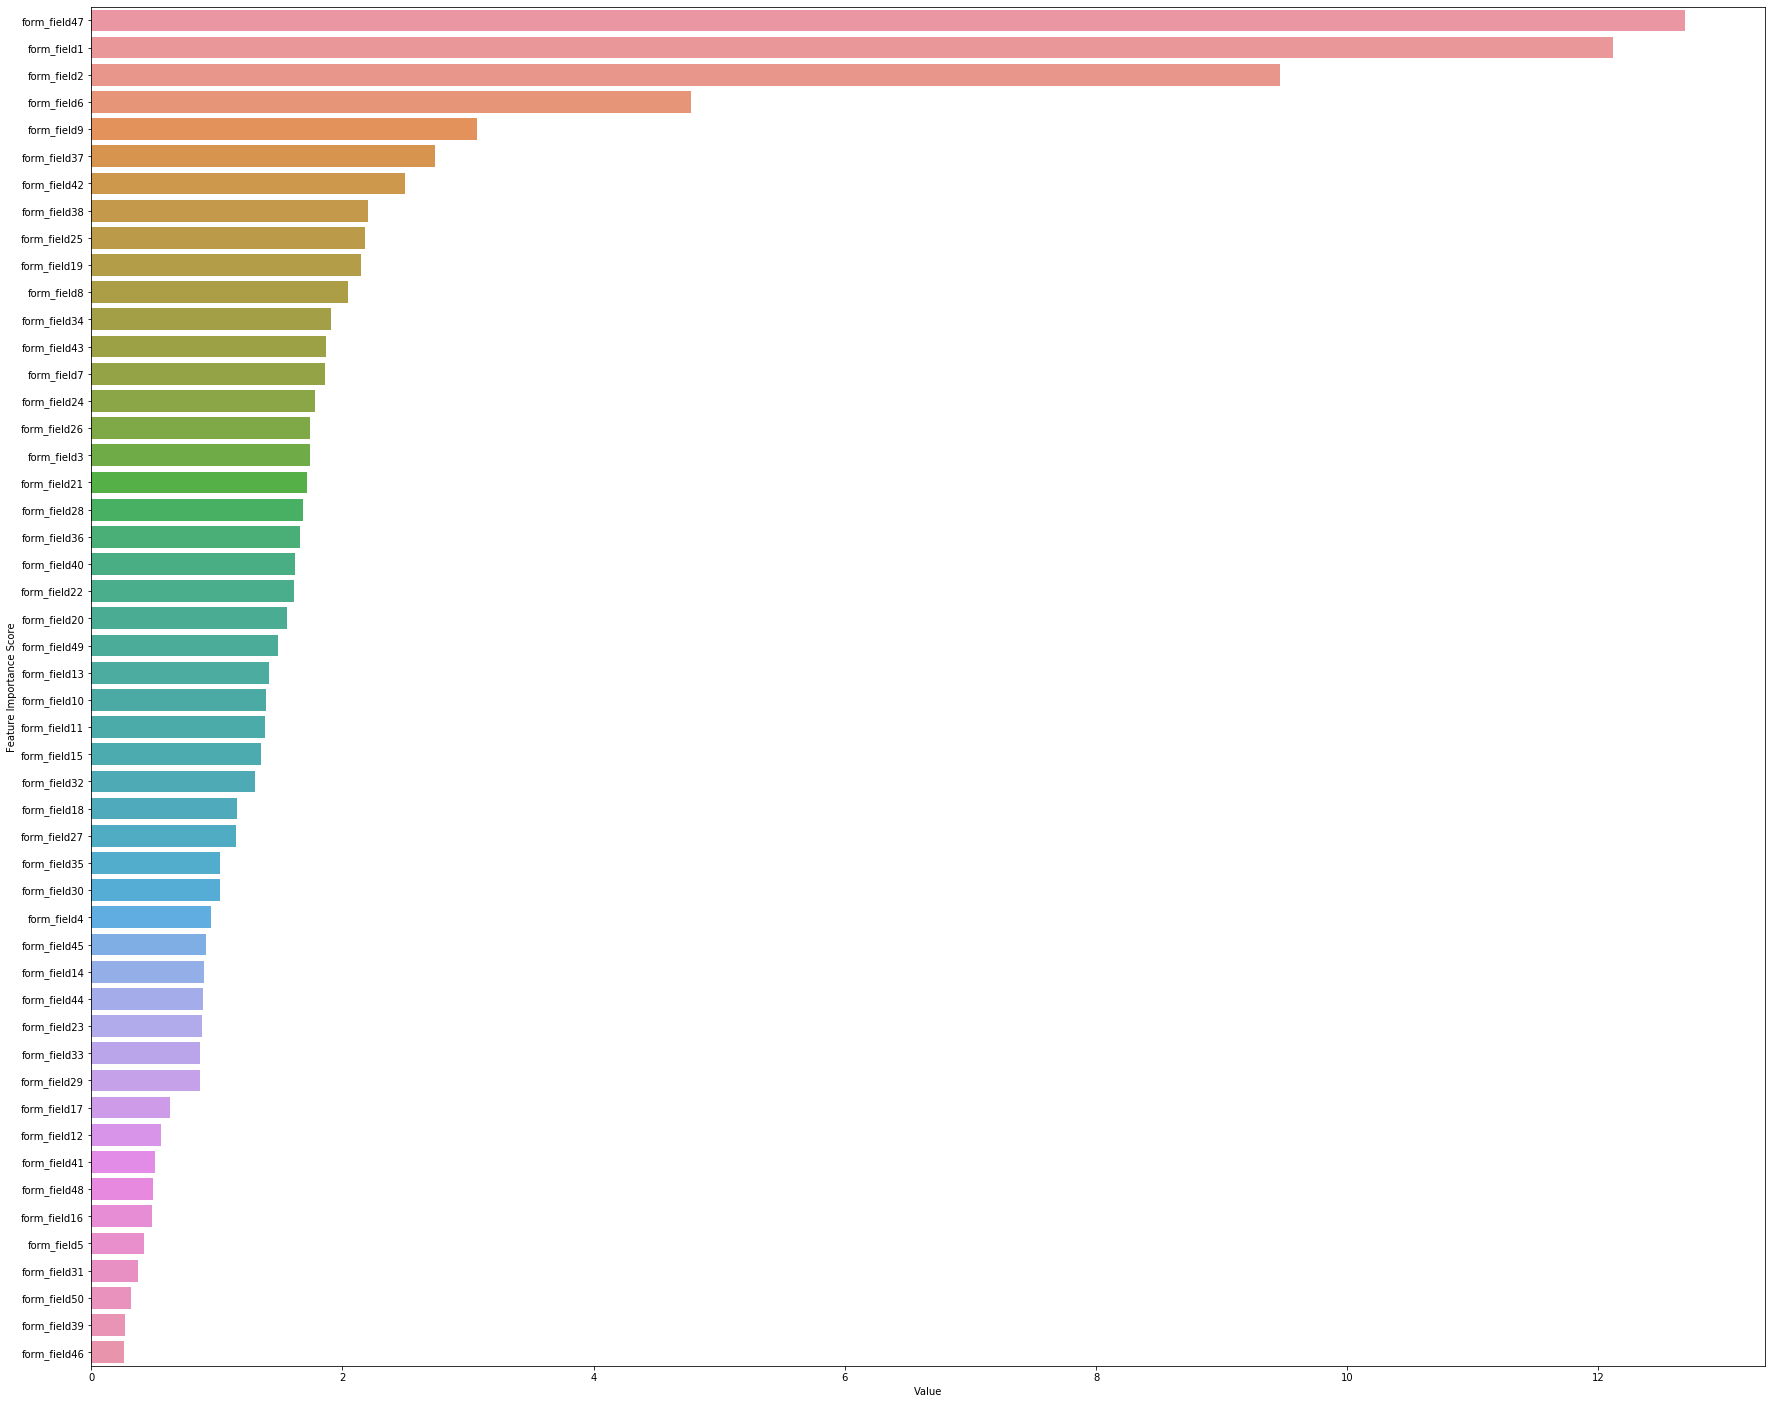

0.8406629044591819 0.8687609637112125 0.005740881026835105


In [16]:
catboost = cat_B.CatBoostClassifier(n_estimators=10000, max_depth=6, eval_metric='AUC', reg_lambda = 370)

function_result= function(X, y, test_df, catboost, 'catboost', 1000)
val_p1, test_p1, model1 = function_result()

================================Fold1====================================
[11:38:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.74365
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.79807
[2]	validation_0-auc:0.80990
[3]	validation_0-auc:0.81899
[4]	validation_0-auc:0.82177
[5]	validation_0-auc:0.82421
[6]	validation_0-auc:0.82508
[7]	validation_0-auc:0.82537
[8]	validation_0-auc:0.82668
[9]	validation_0-auc:0.82736
[10]	validation_0-auc:0.82828
[11]	validation_0-auc:0.82867
[12]	validation_0-auc:0.82881
[13]	validation_0-auc:0.82938
[14]	validation_0-auc:0.83026
[15]	validation_0-auc:0.83004
[16]

[16]	validation_0-auc:0.82359
[17]	validation_0-auc:0.82377
[18]	validation_0-auc:0.82393
[19]	validation_0-auc:0.82411
[20]	validation_0-auc:0.82415
[21]	validation_0-auc:0.82385
[22]	validation_0-auc:0.82380
[23]	validation_0-auc:0.82396
[24]	validation_0-auc:0.82383
[25]	validation_0-auc:0.82360
[26]	validation_0-auc:0.82307
[27]	validation_0-auc:0.82311
[28]	validation_0-auc:0.82339
[29]	validation_0-auc:0.82304
[30]	validation_0-auc:0.82245
[31]	validation_0-auc:0.82269
[32]	validation_0-auc:0.82288
[33]	validation_0-auc:0.82260
[34]	validation_0-auc:0.82278
[35]	validation_0-auc:0.82231
[36]	validation_0-auc:0.82278
[37]	validation_0-auc:0.82247
[38]	validation_0-auc:0.82284
[39]	validation_0-auc:0.82279
[40]	validation_0-auc:0.82251
[41]	validation_0-auc:0.82267
[42]	validation_0-auc:0.82263
[43]	validation_0-auc:0.82244
[44]	validation_0-auc:0.82256
[45]	validation_0-auc:0.82280
[46]	validation_0-auc:0.82298
[47]	validation_0-auc:0.82259
[48]	validation_0-auc:0.82258
[49]	valid

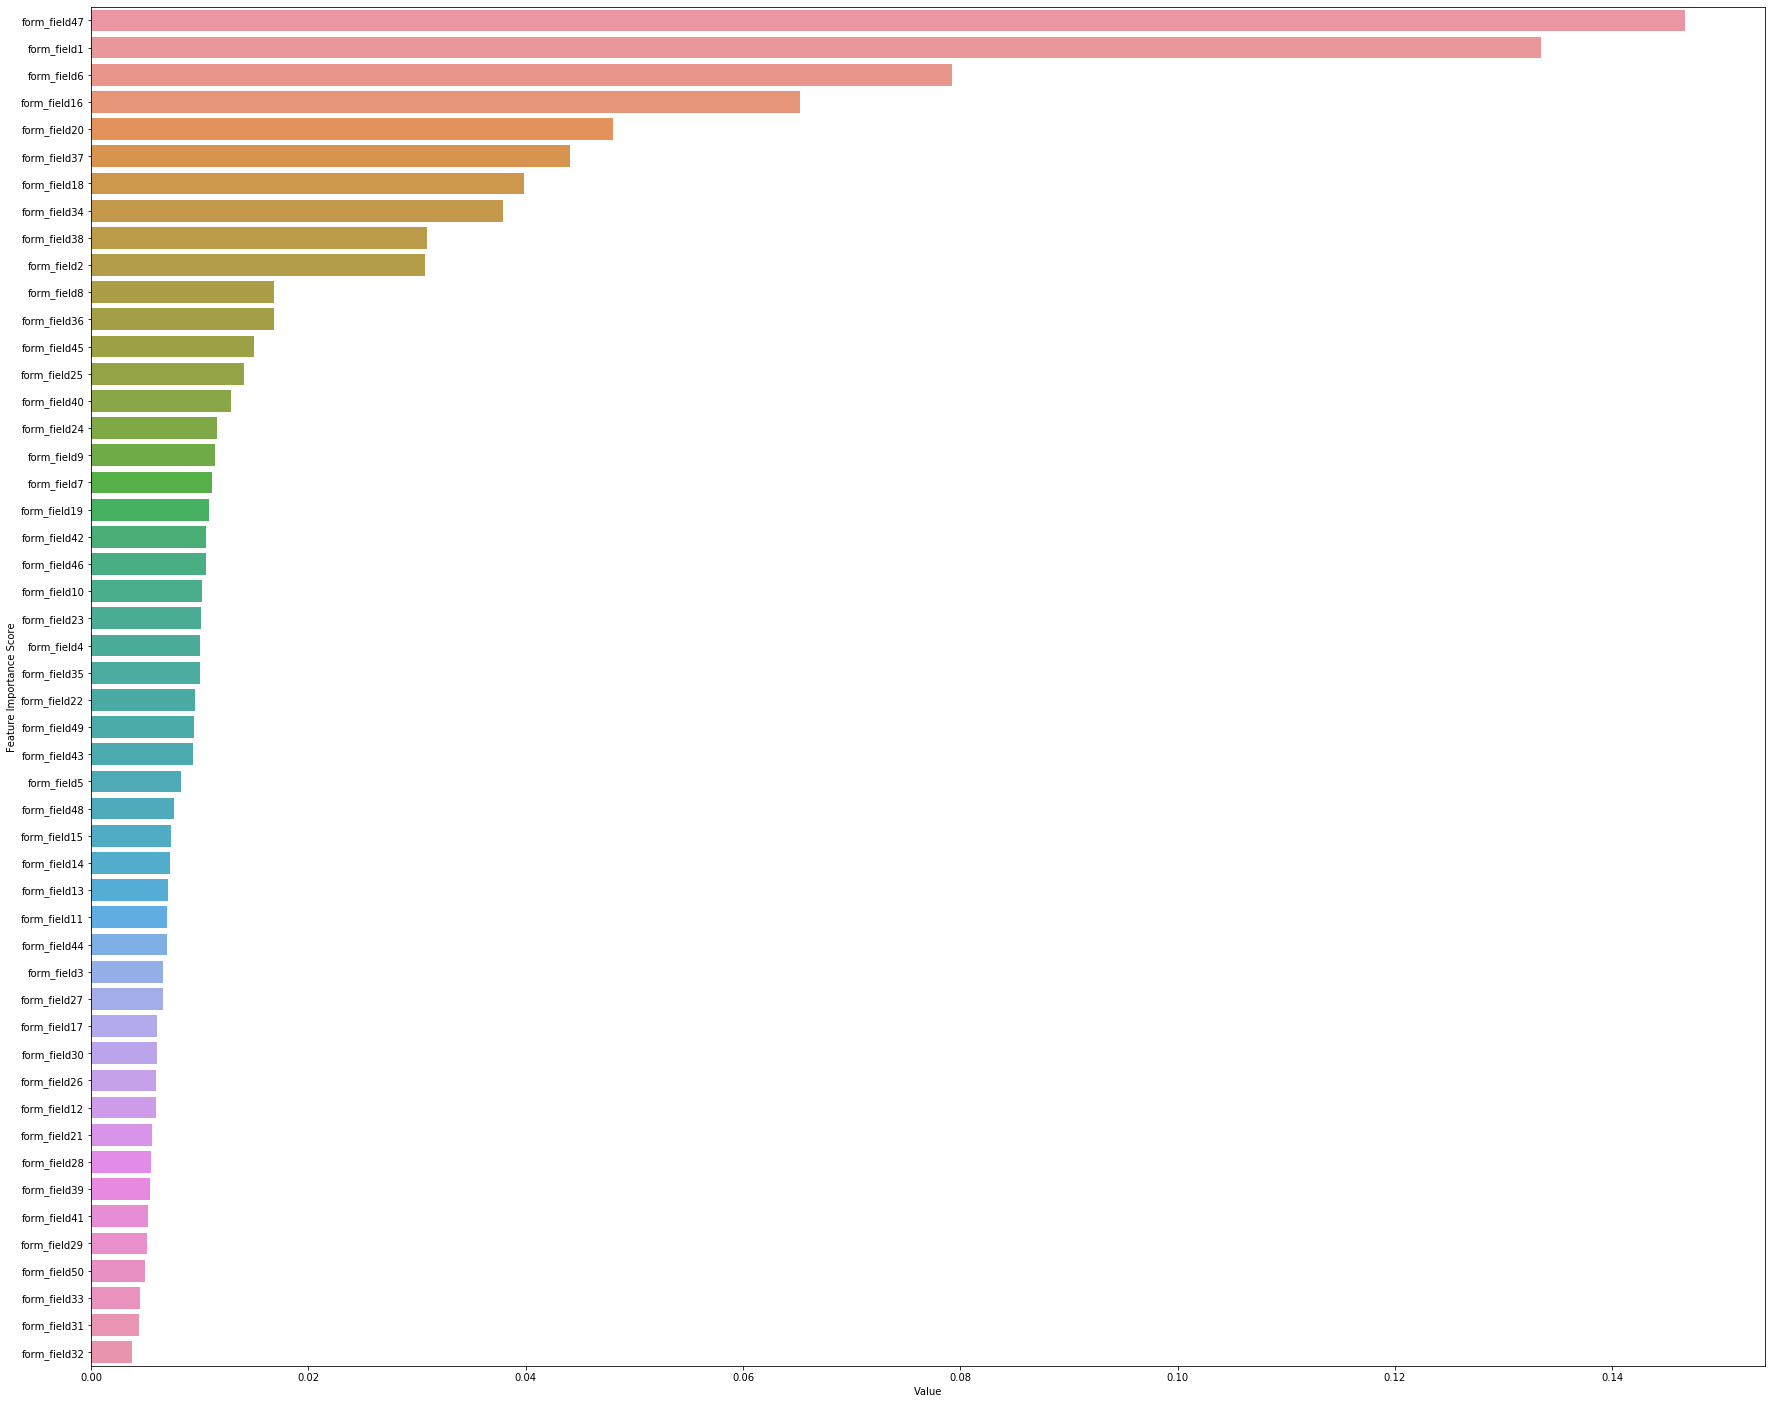

0.8318597984761409 0.8676164458049904 0.005920261974645421


In [17]:
xgboost = xgb.XGBClassifier(objective ='binary:logistic', 
                          eta = 0.99,
                          max_depth = 6, 
                          n_estimators = 5000,
                          reg_lambda = 500,
                          sub_sample = 0.8,
                          colsample_bytree = 0.8)

function_result= function(X, y, test_df, xgboost, 'xgboost', 1000)
val_p2, test_p2, model2 = function_result()

================================Fold1====================================
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0.0004912993970392775, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004912993970392775
[LightGBM] [Warning] bagging_fraction is set=0.9540416539312312, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9540416539312312
[LightGBM] [Warning] lambda_l2 is set=9.424350138808432, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.424350138808432
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's auc: 0.7968
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.804307
[3]	valid_0's auc: 0.807506
[4]	valid_0's auc: 0.809577
[5]	valid_0's auc: 0.811867
[6]	valid_0's auc: 0.815299
[7]	valid_0's auc: 0.818102
[8]	valid_0's auc: 0.

[81]	valid_0's auc: 0.834645
[82]	valid_0's auc: 0.834717
[83]	valid_0's auc: 0.834844
[84]	valid_0's auc: 0.834865
[85]	valid_0's auc: 0.834843
[86]	valid_0's auc: 0.834906
[87]	valid_0's auc: 0.834986
[88]	valid_0's auc: 0.834966
[89]	valid_0's auc: 0.834936
[90]	valid_0's auc: 0.835017
[91]	valid_0's auc: 0.835064
[92]	valid_0's auc: 0.835026
[93]	valid_0's auc: 0.835051
[94]	valid_0's auc: 0.835106
[95]	valid_0's auc: 0.835221
[96]	valid_0's auc: 0.83522
[97]	valid_0's auc: 0.835258
[98]	valid_0's auc: 0.835279
[99]	valid_0's auc: 0.835371
[100]	valid_0's auc: 0.835428
[101]	valid_0's auc: 0.835378
[102]	valid_0's auc: 0.83537
[103]	valid_0's auc: 0.835349
[104]	valid_0's auc: 0.835253
[105]	valid_0's auc: 0.835172
[106]	valid_0's auc: 0.835204
[107]	valid_0's auc: 0.835238
[108]	valid_0's auc: 0.835201
[109]	valid_0's auc: 0.835236
[110]	valid_0's auc: 0.835163
[111]	valid_0's auc: 0.835153
[112]	valid_0's auc: 0.835141
[113]	valid_0's auc: 0.83514
[114]	valid_0's auc: 0.835115
[1

[21]	valid_0's auc: 0.821043
[22]	valid_0's auc: 0.821279
[23]	valid_0's auc: 0.821794
[24]	valid_0's auc: 0.822033
[25]	valid_0's auc: 0.822386
[26]	valid_0's auc: 0.822731
[27]	valid_0's auc: 0.823361
[28]	valid_0's auc: 0.823614
[29]	valid_0's auc: 0.823922
[30]	valid_0's auc: 0.824341
[31]	valid_0's auc: 0.824458
[32]	valid_0's auc: 0.824802
[33]	valid_0's auc: 0.825073
[34]	valid_0's auc: 0.825185
[35]	valid_0's auc: 0.825366
[36]	valid_0's auc: 0.825775
[37]	valid_0's auc: 0.825893
[38]	valid_0's auc: 0.82607
[39]	valid_0's auc: 0.826208
[40]	valid_0's auc: 0.826391
[41]	valid_0's auc: 0.826613
[42]	valid_0's auc: 0.826899
[43]	valid_0's auc: 0.827143
[44]	valid_0's auc: 0.827414
[45]	valid_0's auc: 0.827601
[46]	valid_0's auc: 0.827749
[47]	valid_0's auc: 0.827931
[48]	valid_0's auc: 0.82809
[49]	valid_0's auc: 0.828177
[50]	valid_0's auc: 0.828313
[51]	valid_0's auc: 0.828391
[52]	valid_0's auc: 0.828495
[53]	valid_0's auc: 0.828563
[54]	valid_0's auc: 0.828625
[55]	valid_0's a

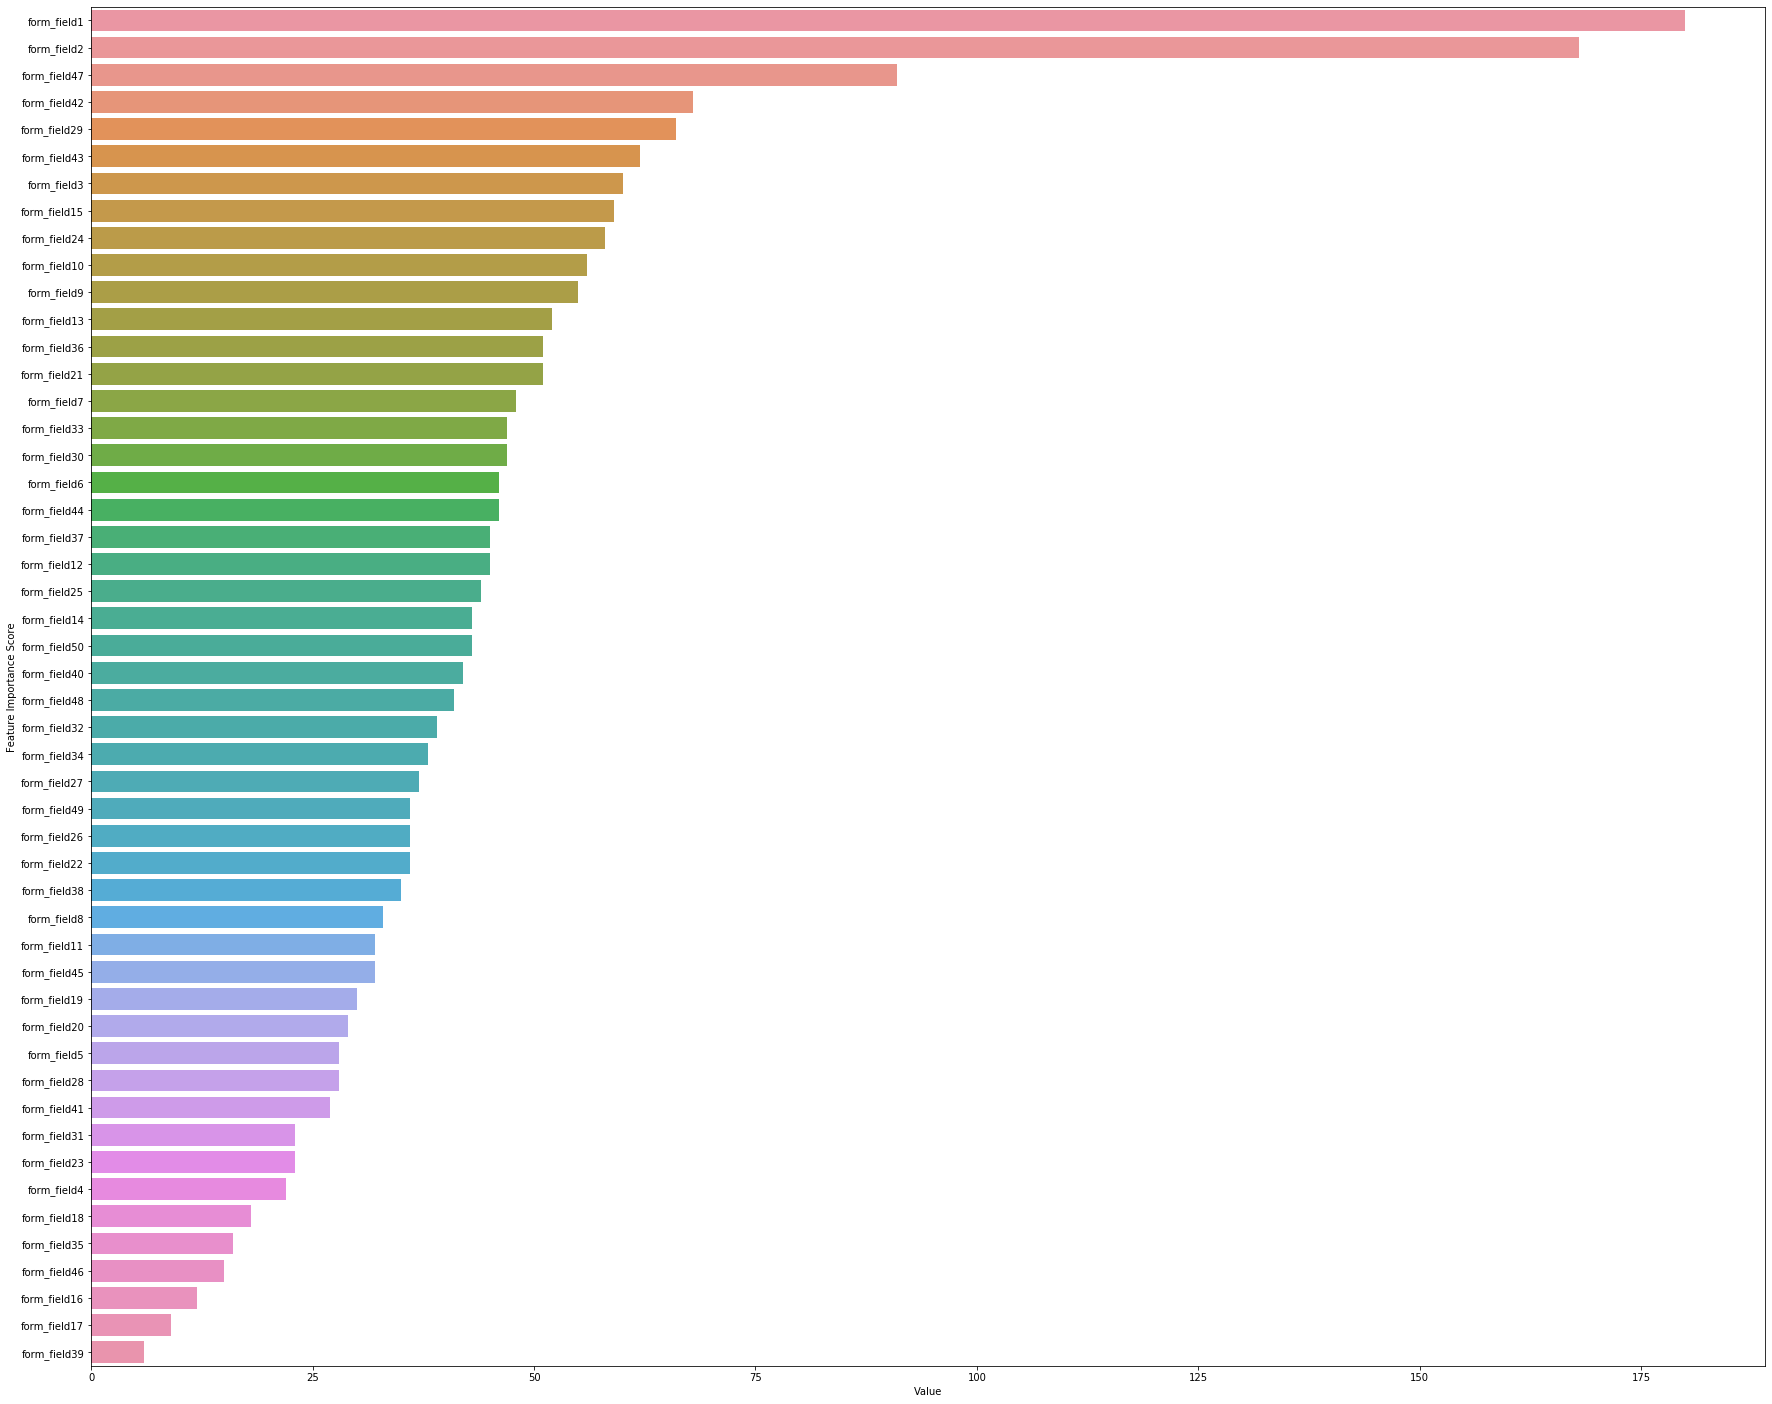

0.8385744081347207 0.8722287726622522 0.005922021370114682


In [18]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(objective =  'binary', 
                            metric= 'auc',
                            boosting_type= 'gbdt',
                            lambda_l1= 0.0004912993970392775,
                            lambda_l2= 9.424350138808432,
                            num_leaves= 24,
                            feature_fraction= 1.0,
                            bagging_fraction= 0.9540416539312312,
                            bagging_freq= 7,
                            min_child_samples= 100, n_estimators = 300)

function_result= function(X, y, test_df, lgb_model, 'lgbm', 1000)
val_p3, test_p3, model3 = function_result()

In [19]:
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
stack = np.column_stack((val_p1, val_p2, val_p3))
stack_p = np.column_stack((test_p1, test_p2, test_p3))
predict = LinearRegression().fit(stack, y).predict(stack_p)

# Submission

In [20]:
pd.DataFrame({"Applicant_ID": test_id, "default_status": predict}).to_csv("submission.csv", index = False)